In [1]:
!pip install git+https://github.com/stefan-jansen/alphalens-reloaded.git --user

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
  Cloning https://github.com/stefan-jansen/alphalens-reloaded.git to /tmp/pip-req-build-jgcyds3c
  Running command git clone --filter=blob:none --quiet https://github.com/stefan-jansen/alphalens-reloaded.git /tmp/pip-req-build-jgcyds3c
  Resolved https://github.com/stefan-jansen/alphalens-reloaded.git to commit 96adbaf5552aec2652d99a424089909c78d3076b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 110.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 132.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB

In [2]:
!pip install datas

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install baostock

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.0 MB/s eta 0:00:00
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --u

In [4]:
!pip install akshare

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 93.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 104.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for jsonpath: filename=jsonpath-0.82.2-py3-none-any.whl size=5616 sha256=46601b77cc477d9e09a921d608c866ed4ec1840861b63a7e43a37243bda04f73
  Stored in directory: /root/.cache/pip/wheels/cb/d5/36/5dc5903ac6f7997b3401d7b524a84260d54419c5233513d6d4
Successfully built jsonpath
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer v

In [1]:
import baostock as bs
import pandas as pd
from multiprocessing import Pool
import akshare as ak
import os

def download_date_data(code, flag):
    try:
        fg = '' if flag not in ['qfq', 'hfq'] else flag
        stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=code, period="daily", start_date='19901219', adjust=fg)
        stock_zh_a_hist_df.to_csv(f'./data_{flag}/{code}.csv')
    except Exception as e:
        print(f"download {flag} stock {code} error!!!")

def download_all_date_data(flag):
    # 获取所有股票代码，akshare接口
    stock_zh_a_spot_em_df = ak.stock_zh_a_spot_em()
    list_code = stock_zh_a_spot_em_df['代码'].to_list()

    fg = 'bfq' if flag not in ['qfq', 'hfq'] else flag # bfq: 不复权; qfq: 前复权; hfq: 后复权
    # 创建保存路径
    path = f'data_{fg}'
    if not os.path.isdir(path):
        os.makedirs(path)

    # 创建进程池来下载股票日数据
    count = os.cpu_count()
    pool = Pool(min(count*4, 60))
    for code in list_code:
        pool.apply_async(download_date_data, (code, flag))

    pool.close()
    pool.join()

def get_all_date_data(start_time, end_time, list_assets):
    data_path = 'data_bfq'

    # 从本地保存的数据中读出需要的股票日数据
    list_all = []
    for c in list_assets:
        df = pd.read_csv(f'{data_path}/{c}.csv')
        df['asset'] = c
        list_all.append(df[(df['日期'] >= start_time) & (df['日期'] <= end_time)])
        
    print(len(list_all))

    # 所有股票日数据拼接成一张表
    df_all = pd.concat(list_all)
        
    # 修改列名
    df_all = df_all.rename(columns={
        "日期": "date", 
        "开盘": "open", 
        "收盘": "close", 
        "最高": "high", 
        "最低": "low", 
        "成交量": "volume", 
        "成交额": "amount",
        "涨跌幅": "pctChg"})
    # 计算平均成交价
    df_all['vwap'] =  df_all.amount / df_all.volume / 100

    # 返回计算因子需要的列
    df_all = df_all.reset_index()
    df_all = df_all[['asset','date', "open", "close", "high", "low", "volume", 'vwap', "pctChg"]]
    return df_all

def get_zz500_stocks(time):
    # 登陆系统
    lg = bs.login()
    # 显示登陆返回信息
    print('login respond error_code:'+lg.error_code)
    print('login respond  error_msg:'+lg.error_msg)

    # 获取中证500成分股
    rs = bs.query_zz500_stocks('2019-01-01')
    print('query_zz500 error_code:'+rs.error_code)
    print('query_zz500  error_msg:'+rs.error_msg)

    # 打印结果集
    zz500_stocks = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        zz500_stocks.append(rs.get_row_data())
    result = pd.DataFrame(zz500_stocks, columns=rs.fields)

    lists = result['code'].to_list()
    lists = [x.split('.')[1] for x in lists]

    # 登出系统
    bs.logout()
    return lists, result

def get_hs300_stocks(time):
    # 登陆系统
    lg = bs.login()
    # 显示登陆返回信息
    print('login respond error_code:'+lg.error_code)
    print('login respond  error_msg:'+lg.error_msg)

    # 获取沪深300成分股
    rs = bs.query_hs300_stocks(time)
    print('query_hs300 error_code:'+rs.error_code)
    print('query_hs300  error_msg:'+rs.error_msg)

    # 打印结果集
    hs300_stocks = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        hs300_stocks.append(rs.get_row_data())
    result = pd.DataFrame(hs300_stocks, columns=rs.fields)
    
    lists = result['code'].to_list()
    lists = [x.split('.')[1] for x in lists]

    # 登出系统
    bs.logout()
    return lists, result

def download_index_data(code):
    path = 'index'
    stock_zh_index_daily_df = ak.stock_zh_index_daily(symbol=code)
    # 创建保存路径
    if not os.path.isdir(path):
        os.makedirs(path)
    stock_zh_index_daily_df.to_csv(f'{path}/{code}.csv')
if __name__ == '__main__':
    download_index_data("sh000300")
    download_all_date_data("bfq")


  0%|          | 0/57 [00:00<?, ?it/s]

In [2]:
import pandas as pd
from multiprocessing import Pool
from datas import *
import os
import traceback
import time

class Alphas(object):
    def __init__(self, df_data):
        pass

    @classmethod
    def calc_alpha(cls, path, func, data):
        try:
            t1 = time.time()
            res = func(data)
            res.to_csv(path)
            t2 = time.time()
            print(f"Factory {os.path.splitext(os.path.basename(path))[0]} time {t2-t1}")
        except Exception as e:
            print(f"generate {path} error!!!")
            # traceback.print_exc()

    @classmethod
    def get_stocks_data(cls, year, list_assets, benchmark):
        # list_assets,df_asserts = get_zz500_stocks(f'{year}-01-01')
        yer = int(year)
        start_time = f'{yer-1}-01-01'
        end_time = f'{yer+1}-01-01'

        index_path = 'index'
        df = pd.read_csv(f'{index_path}/{benchmark}.csv')
        bm_data =  df[(df['date'] >= start_time) & (df['date'] <= end_time)]

        # 修改列名
        bm_data = bm_data.rename(columns={
            "date": "benchmark_date", 
            "open": "benchmark_open", 
            "close": "benchmark_close", 
            "high": "benchmark_high", 
            "low": "benchmark_low", 
            "volume": "benchmark_vol"})

        data_path = 'data_bfq'

        # 从本地保存的数据中读出需要的股票日数据
        list_all = []
        for c in list_assets:
            df = pd.read_csv(f'{data_path}/{c}.csv')
            df['asset'] = c
            df = df[(df['日期'] >= start_time) & (df['日期'] <= end_time)]
            df = df.merge(bm_data, how='outer', left_on='日期', right_on='benchmark_date')
            list_all.append(df)
            
        print(len(list_all))

        # 所有股票日数据拼接成一张表
        df_all = pd.concat(list_all)
            
        # 修改列名
        df_all = df_all.rename(columns={
            "日期": "date", 
            "开盘": "open", 
            "收盘": "close", 
            "最高": "high", 
            "最低": "low", 
            "成交量": "volume", 
            "成交额": "amount",
            "涨跌幅": "pctChg",
            "换手率": "turnover"})
        # 计算平均成交价
        df_all['vwap'] =  df_all.amount / df_all.volume / 100
        df_all['turnover']  = df_all['turnover']/100

        # 返回计算因子需要的列
        df_all = df_all.reset_index()
        df_all = df_all[['asset','date', "open", "close", "high", "low", "volume", "amount", 'vwap', "pctChg", 'turnover', 'benchmark_open', 'benchmark_close']]
        # ddu = df_all[df_all.duplicated()]
        df_all=df_all[df_all['asset'].notnull()]
        return df_all.pivot(index='date', columns='asset') 
    
    @classmethod
    def get_benchmark(cls, year, code):
        yer = int(year)
        start_time = f'{yer-1}-01-01'
        end_time = f'{yer+1}-01-01'

        data_path = 'index'
        df = pd.read_csv(f'{data_path}/{code}.csv')
        return df[(df['date'] >= start_time) & (df['date'] <= end_time)]

    @classmethod
    def get_alpha_methods(cls, self):
        return (list(filter(lambda m: m.startswith("alpha") and callable(getattr(self, m)),
                            dir(self))))
    
    @classmethod
    def generate_alpha_single(cls, alpha_name, year, list_assets, benchmark, need_save=False):
        # 获取计算因子所需股票数据
        stock_data = cls.get_stocks_data(year, list_assets, benchmark)

        # 实例化因子计算的对象
        stock = cls(stock_data)

        factor = getattr(cls, alpha_name)
        if factor is None:
            print('alpha name is error!!!')
            return None
        
        alpha_data = factor(stock)

        if need_save:
            path = f'alphas/{cls.__name__}/{year}'
            if not os.path.isdir(path):
                os.makedirs(path)
            alpha_data.to_csv(f'{path}/{alpha_name}.csv')

        return alpha_data
            

    @classmethod
    def generate_alphas(cls, year, list_assets, benchmark):
        t1 = time.time()
        # 获取计算因子所需股票数据
        stock_data = cls.get_stocks_data(year, list_assets, benchmark)

        # 实例化因子计算的对象
        stock = cls(stock_data)
        
        # 因子计算结果的保存路径
        path = f'alphas/{cls.__name__}/{year}'

        # 创建保存路径
        if not os.path.isdir(path):
            os.makedirs(path)

        # 创建线程池
        count = os.cpu_count()
        pool = Pool(count)

        # 获取所有因子计算的方法
        methods = cls.get_alpha_methods(cls)

        # 在线程池中计算所有alpha
        for m in methods:
            factor = getattr(cls, m)
            try:
                pool.apply_async(cls.calc_alpha, (f'{path}/{m}.csv', factor, stock))
            except Exception as e:
                traceback.print_exc()

        pool.close()
        pool.join()
        t2 = time.time()
        print(f"Total time {t2-t1}")

In [ ]:
import numpy as np
from numpy import log
from scipy.stats import rankdata

from datas import *

def Log(sr):
    #自然对数函数
    return np.log(sr)

def Rank(sr):
    #列-升序排序并转化成百分比
    return sr.rank(axis=1, method='min', pct=True)

def Delta(sr,period):
    #period日差分
    return sr.diff(period)

def Delay(sr,period):
    #period阶滞后项
    return sr.shift(period)

def Corr(x,y,window):
    #window日滚动相关系数
    #当一个变量值为常量，另一个变量值可变化时，此时无法计算相关度，使用0 进行填充
    r = x.rolling(window).corr(y).fillna(0)
    #同时将起始 window-1 个窗口赋值为空
    r.iloc[:(window-1), :] = None
    return r

def Cov(x,y,window):
    #window日滚动协方差
    return x.rolling(window).cov(y)

def Sum(sr,window):
    #window日滚动求和
    return sr.rolling(window).sum()

def Prod(sr,window):
    #window日滚动求乘积
    return sr.rolling(window).apply(lambda x: np.prod(x))

def Mean(sr,window):
    #window日滚动求均值
    return sr.rolling(window).mean()

def Std(sr,window):
    #window日滚动求标准差
    return sr.rolling(window).std()

def Tsrank(sr, window):
    #window日序列末尾值的顺位
    return sr.rolling(window).apply(lambda x: rankdata(x)[-1])
               
def Tsmax(sr, window):
    #window日滚动求最大值    
    return sr.rolling(window).max()

def Tsmin(sr, window):
    #window日滚动求最小值    
    return sr.rolling(window).min()

def Sign(sr):
    #符号函数
    return np.sign(sr)

def Max(sr1,sr2):
    return np.maximum(sr1, sr2)

def Min(sr1,sr2):
    return np.minimum(sr1, sr2)

def Rowmax(sr):
    return sr.max(axis=1)

def Rowmin(sr):
    return sr.min(axis=1)

def Sma(sr,n,m):
    #sma均值
    return sr.ewm(alpha=m/n, adjust=False).mean()

def Abs(sr):
    #求绝对值
    return sr.abs()

def Sequence(n):
    #生成 1~n 的等差序列
    return np.arange(1,n+1)

def Regbeta(sr,x):
    window = len(x)
    return sr.rolling(window).apply(lambda y: np.polyfit(x, y, deg=1)[0])

def Decaylinear(sr, window):  
    weights = np.array(range(1, window+1))
    sum_weights = np.sum(weights)
    return sr.rolling(window).apply(lambda x: np.sum(weights*x) / sum_weights)

def Lowday(sr,window):
    return sr.rolling(window).apply(lambda x: len(x) - x.values.argmin())

def Highday(sr,window):
    return sr.rolling(window).apply(lambda x: len(x) - x.values.argmax())

def Wma(sr,window):
    weights = np.array(range(window-1,-1, -1))
    weights = np.power(0.9,weights)
    sum_weights = np.sum(weights)

    return sr.rolling(window).apply(lambda x: np.sum(weights*x) / sum_weights)

def Count(cond,window):
    return cond.rolling(window).apply(lambda x: x.sum())

def Sumif(sr,window,cond):
    sr[~cond] = 0
    return sr.rolling(window).sum()

def Returns(df):
    return df.rolling(2).apply(lambda x: x.iloc[-1] / x.iloc[0]) - 1


class Alphas191(Alphas):
    def __init__(self, df_data):
        self.open = df_data['open'] # 开盘价
        self.high = df_data['high'] # 最高价
        self.low = df_data['low'] # 最低价
        self.close = df_data['close'] # 收盘价
        self.volume = df_data['volume'] # 成交量
        self.returns = Returns(df_data['close']) # 日收益率
        self.vwap = df_data['vwap']  # 成交均价
        self.close_prev = df_data['close'].shift(1)#前一天收盘价        
        self.amount = df_data['amount']#交易额
        
        self.benchmark_open = df_data['benchmark_open']#指数开盘价series
        self.benchmark_close = df_data['benchmark_close']#指数收盘价series
        # self.value = df_data['value']#公司总市值

    def alpha001(self): #平均1751个数据
        ##### (-1 * CORR(RANK(DELTA(LOG(VOLUME), 1)), RANK(((CLOSE - OPEN) / OPEN)), 6))#### 
        return (-1 * Corr(Rank(Delta(log(self.volume), 1)), Rank(((self.close - self.open) / self.open)), 6))
    
    def alpha002(self): #1783
        ##### -1 * delta((((close-low)-(high-close))/(high-low)),1))####
        return -1*Delta((((self.close-self.low)-(self.high-self.close))/(self.high-self.low)),1) 
    
    def alpha003(self): 
        ##### SUM((CLOSE=DELAY(CLOSE,1)?0:CLOSE-(CLOSE>DELAY(CLOSE,1)?MIN(LOW,DELAY(CLOSE,1)):MAX(HIGH,DELAY(CLOSE,1)))),6) ####
        cond1 = (self.close == Delay(self.close,1))
        cond2 = (self.close > Delay(self.close,1))
        cond3 = (self.close < Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond1] = 0
        part[cond2] = self.close - Min(self.low,Delay(self.close,1))
        part[cond3] = self.close - Max(self.high,Delay(self.close,1))
        return Sum(part, 6)
    
    def alpha004(self):  
        #####((((SUM(CLOSE, 8) / 8) + STD(CLOSE, 8)) < (SUM(CLOSE, 2) / 2)) ? (-1 * 1) : (((SUM(CLOSE, 2) / 2) <((SUM(CLOSE, 8) / 8) - STD(CLOSE, 8))) ? 1 : (((1 < (VOLUME / MEAN(VOLUME,20))) || ((VOLUME /MEAN(VOLUME,20)) == 1)) ? 1 : (-1 * 1))))
        cond1 = ((Sum(self.close, 8)/8 + Std(self.close, 8)) < Sum(self.close, 2)/2)
        cond2 = ((Sum(self.close, 8)/8 + Std(self.close, 8)) > Sum(self.close, 2)/2)
        cond3 = ((Sum(self.close, 8)/8 + Std(self.close, 8)) == Sum(self.close, 2)/2)
        cond4 = (self.volume/Mean(self.volume, 20) >= 1)
        part = self.close.copy(deep=True) 
        part.loc[:, :] = None
        part[cond1] = -1
        part[cond2] = 1
        part[cond3] = -1
        part[cond3 & cond4] = 1
        
        return part
    
    def alpha005(self): #1447
        ####(-1 * TSMAX(CORR(TSRANK(VOLUME, 5), TSRANK(HIGH, 5), 5), 3))###
        return -1*Tsmax(Corr(Tsrank(self.volume, 5),Tsrank(self.high, 5),5), 3)
    
    def alpha006(self): #1779
        ####(RANK(SIGN(DELTA((((OPEN * 0.85) + (HIGH * 0.15))), 4)))* -1)### 
        return -1*Rank(Sign(Delta(((self.open * 0.85) + (self.high * 0.15)), 4)))
    
    def alpha007(self): #1782
        ####((RANK(MAX((VWAP - CLOSE), 3)) + RANK(MIN((VWAP - CLOSE), 3))) * RANK(DELTA(VOLUME, 3)))###
        return ((Rank(Tsmax((self.vwap - self.close), 3)) + Rank(Tsmin((self.vwap - self.close), 3))) * Rank(Delta(self.volume, 3)))
    
    def alpha008(self): #1779
        ####RANK(DELTA(((((HIGH + LOW) / 2) * 0.2) + (VWAP * 0.8)), 4) * -1)###    
        return Rank(Delta(((((self.high + self.low) / 2) * 0.2) + (self.vwap * 0.8)), 4) * -1)
    
    def alpha009(self): #1790
        ####SMA(((HIGH+LOW)/2-(DELAY(HIGH,1)+DELAY(LOW,1))/2)*(HIGH-LOW)/VOLUME,7,2)###  
        return Sma(((self.high+self.low)/2-(Delay(self.high,1)+Delay(self.low,1))/2)*(self.high-self.low)/self.volume,7,2)
    
    def alpha010(self):    
        ####(RANK(MAX(((RET < 0) ? STD(RET, 20) : CLOSE)^2),5))###
        cond = (self.returns < 0)
        part = self.returns.copy(deep=True) 
        part.loc[:, :] = None
        part[cond] = Std(self.returns, 20)
        part[~cond] = self.close
        part = part**2
        
        return Rank(Tsmax(part, 5))
    
    def alpha011(self): #1782
        ####SUM(((CLOSE-LOW)-(HIGH-CLOSE))/(HIGH-LOW)*VOLUME,6)###   
        return Sum(((self.close-self.low)-(self.high-self.close))/(self.high-self.low)*self.volume,6)
    
    def alpha012(self): #1779
        ####(RANK((OPEN - (SUM(VWAP, 10) / 10)))) * (-1 * (RANK(ABS((CLOSE - VWAP)))))###   
        return (Rank((self.open - (Sum(self.vwap, 10) / 10)))) * (-1 * (Rank(Abs((self.close - self.vwap)))))
    
    def alpha013(self): #1790
        ####(((HIGH * LOW)^0.5) - VWAP)###
        return (((self.high * self.low)**0.5) - self.vwap)
    
    def alpha014(self): #1776
        ####CLOSE-DELAY(CLOSE,5)###
        return self.close-Delay(self.close,5)
    
    def alpha015(self): #1790
        ####OPEN/DELAY(CLOSE,1)-1###
        return self.open/Delay(self.close,1)-1
    
    def alpha016(self): #1736   
        ####(-1 * TSMAX(RANK(CORR(RANK(VOLUME), RANK(VWAP), 5)), 5))###
        return (-1 * Tsmax(Rank(Corr(Rank(self.volume), Rank(self.vwap), 5)), 5))
        
    def alpha017(self): #1776   
        ####RANK((VWAP - MAX(VWAP, 15)))^DELTA(CLOSE, 5)###
        return Rank((self.vwap - Tsmax(self.vwap, 15)))**Delta(self.close, 5)
    
    def alpha018(self): #1776   
        ####CLOSE/DELAY(CLOSE,5)###
        return self.close/Delay(self.close,5)  
    
    def alpha019(self):  
        ####(CLOSE<DELAY(CLOSE,5)?(CLOSE-DELAY(CLOSE,5))/DELAY(CLOSE,5):(CLOSE=DELAY(CLOSE,5)?0:(CLOSE-DELAY(CLOSE,5))/CLOSE))###
        cond1 = (self.close < Delay(self.close,5))
        cond2 = (self.close == Delay(self.close,5))
        cond3 = (self.close > Delay(self.close,5))
        part = self.close.copy(deep=True) 
        part.loc[:, :] = None
        part[cond1] = (self.close-Delay(self.close,5))/Delay(self.close,5)
        part[cond2] = 0
        part[cond3] = (self.close-Delay(self.close,5))/self.close
        
        return part
       
    def alpha020(self): #1773      
        ####(CLOSE-DELAY(CLOSE,6))/DELAY(CLOSE,6)*100###
        return (self.close-Delay(self.close,6))/Delay(self.close,6)*100
    
    def alpha021(self):  #reg？
        ####REGBETA(MEAN(CLOSE,6),SEQUENCE(6))###        
        return Regbeta(Mean(self.close,6), Sequence(6))
    
    def alpha022(self): #1736  
        ####SMA(((CLOSE-MEAN(CLOSE,6))/MEAN(CLOSE,6)-DELAY((CLOSE-MEAN(CLOSE,6))/MEAN(CLOSE,6),3)),12,1)###
        return Sma(((self.close-Mean(self.close,6))/Mean(self.close,6)-Delay((self.close-Mean(self.close,6))/Mean(self.close,6),3)),12,1)
     
    def alpha023(self):  
        ####SMA((CLOSE>DELAY(CLOSE,1)?STD(CLOSE,20):0),20,1) / (SMA((CLOSE>DELAY(CLOSE,1)?STD(CLOSE,20):0),20,1) + SMA((CLOSE<=DELAY(CLOSE,1)?STD(CLOSE,20):0),20,1))*100###
        cond = (self.close > Delay(self.close,1))
        part1 = self.close.copy(deep=True) 
        part1.loc[:, :] = None
        part1[cond] = Std(self.close,20)
        part1[~cond] = 0
        part2 = self.close.copy(deep=True) 
        part2.loc[:, :] = None
        part2[~cond] = Std(self.close,20)
        part2[cond] = 0
        
        return 100*Sma(part1,20,1)/(Sma(part1,20,1) + Sma(part2,20,1))
        
    def alpha024(self): #1776  
        ####SMA(CLOSE-DELAY(CLOSE,5),5,1)###
        return Sma(self.close-Delay(self.close,5),5,1)
    
    def alpha025(self):  #886  
        ####((-1 * RANK((DELTA(CLOSE, 7) * (1 - RANK(DECAYLINEAR((VOLUME / MEAN(VOLUME,20)), 9)))))) * (1 + RANK(SUM(RET, 250))))###
        return ((-1 * Rank((Delta(self.close, 7) * (1 - Rank(Decaylinear((self.volume / Mean(self.volume,20)), 9)))))) * (1 + Rank(Sum(self.returns, 250))))
    
    def alpha026(self):   
        ####((((SUM(CLOSE, 7) / 7) - CLOSE)) + ((CORR(VWAP, DELAY(CLOSE, 5), 230))))###
        return ((((Sum(self.close, 7) / 7) - self.close)) + ((Corr(self.vwap, Delay(self.close, 5), 230))))
    
    def alpha027(self):  
        ####WMA((CLOSE-DELAY(CLOSE,3))/DELAY(CLOSE,3)*100+(CLOSE-DELAY(CLOSE,6))/DELAY(CLOSE,6)*100,12)###
        A = (self.close-Delay(self.close,3))/Delay(self.close,3)*100+(self.close-Delay(self.close,6))/Delay(self.close,6)*100
        return Wma(A, 12)
    
    def alpha028(self):   #1728 
        ####3*SMA((CLOSE-TSMIN(LOW,9))/(TSMAX(HIGH,9)-TSMIN(LOW,9))*100,3,1)-2*SMA(SMA((CLOSE-TSMIN(LOW,9))/(MAX(HIGH,9)-TSMAX(LOW,9))*100,3,1),3,1)###
        return 3*Sma((self.close-Tsmin(self.low,9))/(Tsmax(self.high,9)-Tsmin(self.low,9))*100,3,1)-2*Sma(Sma((self.close-Tsmin(self.low,9))/(Tsmax(self.high,9)-Tsmax(self.low,9))*100,3,1),3,1)
    
    def alpha029(self):   #1773 
        ####(CLOSE-DELAY(CLOSE,6))/DELAY(CLOSE,6)*VOLUME###
        return (self.close-Delay(self.close,6))/Delay(self.close,6)*self.volume
    
    def alpha030(self):  #reg？
        ####WMA((REGRESI(CLOSE/DELAY(CLOSE)-1,MKT,SMB,HML， 60))^2,20)###
        return 0
    
    def alpha031(self):   #1714
        ####(CLOSE-MEAN(CLOSE,12))/MEAN(CLOSE,12)*100###
        return (self.close-Mean(self.close,12))/Mean(self.close,12)*100
    
    def alpha032(self):   #1505
        ####(-1 * SUM(RANK(CORR(RANK(HIGH), RANK(VOLUME), 3)), 3))###
        return (-1 * Sum(Rank(Corr(Rank(self.high), Rank(self.volume), 3)), 3))
    
    def alpha033(self):   #904  数据量较少
        ####((((-1 * TSMIN(LOW, 5)) + DELAY(TSMIN(LOW, 5), 5)) * RANK(((SUM(RET, 240) - SUM(RET, 20)) / 220))) *TSRANK(VOLUME, 5))###
        return ((((-1 * Tsmin(self.low, 5)) + Delay(Tsmin(self.low, 5), 5)) * Rank(((Sum(self.returns, 240) - Sum(self.returns, 20)) / 220))) *Tsrank(self.volume, 5))
    
    def alpha034(self):   #1714
        ####MEAN(CLOSE,12)/CLOSE###
        return Mean(self.close,12)/self.close
    
    def alpha035(self):   #1790    (OPEN * 0.65) +(OPEN *0.35)有问题
        ####(MIN(RANK(DECAYLINEAR(DELTA(OPEN, 1), 15)), RANK(DECAYLINEAR(CORR((VOLUME), ((OPEN * 0.65) +(OPEN *0.35)), 17),7))) * -1)###
        return (Min(Rank(Decaylinear(Delta(self.open, 1), 15)), Rank(Decaylinear(Corr((self.volume), ((self.open * 0.65) +(self.open *0.35)), 17),7))) * -1)
     
    def alpha036(self):   #1714
        ####RANK(SUM(CORR(RANK(VOLUME), RANK(VWAP),6), 2))###
        return Rank(Sum(Corr(Rank(self.volume), Rank(self.vwap),6 ), 2))
    
    def alpha037(self):   #1713
        ####(-1 * RANK(((SUM(OPEN, 5) * SUM(RET, 5)) - DELAY((SUM(OPEN, 5) * SUM(RET, 5)), 10))))###
        return (-1 * Rank(((Sum(self.open, 5) * Sum(self.returns, 5)) - Delay((Sum(self.open, 5) * Sum(self.returns, 5)), 10))))
    
    def alpha038(self):  
        ####(((SUM(HIGH, 20) / 20) < HIGH) ? (-1 * DELTA(HIGH, 2)) : 0)
        cond = ((Sum(self.high, 20) / 20) < self.high)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = -1 * Delta(self.high, 2)
        part[~cond] = 0
        
        return part
    
    def alpha039(self):   #1666
        ####((RANK(DECAYLINEAR(DELTA((CLOSE), 2),8)) - RANK(DECAYLINEAR(CORR(((VWAP * 0.3) + (OPEN * 0.7)),SUM(MEAN(VOLUME,180), 37), 14), 12))) * -1)###
        return ((Rank(Decaylinear(Delta((self.close), 2),8)) - Rank(Decaylinear(Corr(((self.vwap * 0.3) + (self.open * 0.7)),Sum(Mean(self.volume,180), 37), 14), 12))) * -1)
    
    def alpha040(self):  
        ####SUM((CLOSE>DELAY(CLOSE,1)?VOLUME:0),26)/SUM((CLOSE<=DELAY(CLOSE,1)?VOLUME:0),26)*100###
        cond = (self.close > Delay(self.close,1))
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond] = self.volume
        part1[~cond] = 0
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[~cond] = self.volume
        part2[cond] = 0

        return Sum(part1,26)/Sum(part2,26)*100
    
    def alpha041(self):   #1782
        ####(RANK(MAX(DELTA((VWAP), 3), 5))* -1)###
        return (Rank(Tsmax(Delta((self.vwap), 3), 5))* -1)
    
    def alpha042(self):   #1399  数据量较少
        ####((-1 * RANK(STD(HIGH, 10))) * CORR(HIGH, VOLUME, 10))###
        return ((-1 * Rank(Std(self.high, 10))) * Corr(self.high, self.volume, 10))
    
    def alpha043(self):  
        ####SUM((CLOSE>DELAY(CLOSE,1)?VOLUME:(CLOSE<DELAY(CLOSE,1)?-VOLUME:0)),6)###
        cond1 = (self.close > Delay(self.close,1))
        cond2 = (self.close < Delay(self.close,1))
        cond3 = (self.close == Delay(self.close,1))
        part = self.close.copy(deep=True) # pd.Series(np.zeros(self.close.shape))
        part.loc[:, :] = None
        part[cond1] = self.volume
        part[cond2] = -self.volume
        part[cond3] = 0
        
        return Sum(part,6)
    
    def alpha044(self):   #1748
        ####(TSRANK(DECAYLINEAR(CORR(((LOW )), MEAN(VOLUME,10), 7), 6),4) + TSRANK(DECAYLINEAR(DELTA((VWAP),3), 10), 15))###
        return (Tsrank(Decaylinear(Corr(((self.low)), Mean(self.volume,10), 7), 6),4) + Tsrank(Decaylinear(Delta((self.vwap),3), 10), 15))
    
    def alpha045(self):   #1070  数据量较少
        ####(RANK(DELTA((((CLOSE * 0.6) + (OPEN *0.4))), 1)) * RANK(CORR(VWAP, MEAN(VOLUME,150), 15)))###
        return (Rank(Delta((((self.close * 0.6) + (self.open *0.4))), 1)) * Rank(Corr(self.vwap, Mean(self.volume,150), 15)))
    
    def alpha046(self):   #1630
        ####(MEAN(CLOSE,3)+MEAN(CLOSE,6)+MEAN(CLOSE,12)+MEAN(CLOSE,24))/(4*CLOSE)###
        return (Mean(self.close,3)+Mean(self.close,6)+Mean(self.close,12)+Mean(self.close,24))/(4*self.close)
    
    def alpha047(self):   #1759
        ####SMA((TSMAX(HIGH,6)-CLOSE)/(TSMAX(HIGH,6)-TSMIN(LOW,6))*100,9,1)###
        return Sma((Tsmax(self.high,6)-self.close)/(Tsmax(self.high,6)-Tsmin(self.low,6))*100,9,1)
    
    def alpha048(self):   #1657
        ####(-1*((RANK(((SIGN((CLOSE - DELAY(CLOSE, 1))) + SIGN((DELAY(CLOSE, 1) - DELAY(CLOSE, 2)))) + SIGN((DELAY(CLOSE, 2) - DELAY(CLOSE, 3)))))) * SUM(VOLUME, 5)) / SUM(VOLUME, 20))###
        return (-1*((Rank(((Sign((self.close - Delay(self.close, 1))) + Sign((Delay(self.close, 1) - Delay(self.close, 2)))) + Sign((Delay(self.close, 2) - Delay(self.close, 3)))))) * Sum(self.volume, 5)) / Sum(self.volume, 20))
    
    def alpha049(self):  
        ####SUM(((HIGH+LOW)>=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12) / (SUM(((HIGH+LOW)>=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12) + SUM(((HIGH+LOW)<=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12))
        cond = ((self.high + self.low) > (Delay(self.high,1) + Delay(self.low,1)))
        part1 = self.close.copy(deep=True) # pd.Series(np.zeros(self.close.shape))
        part1.loc[:, :] = None
        part1[cond] = 0
        part1[~cond] = Max(Abs(self.high - Delay(self.high,1)), Abs(self.low - Delay(self.low,1)))
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[~cond] = 0
        part2[cond] = Max(Abs(self.high - Delay(self.high,1)), Abs(self.low - Delay(self.low,1)))
        
        return Sum(part1, 12) / (Sum(part1, 12) + Sum(part2, 12))
    
    def alpha050(self):  
        ####SUM(((HIGH+LOW)<=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12)/(SUM(((HIGH+LOW)<=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12)+SUM(((HIGH+LOW)>=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12))-SUM(((HIGH+LOW)>=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12)/(SUM(((HIGH+LOW)>=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12)+SUM(((HIGH+LOW)<=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12))###
        cond = ((self.high + self.low) <= (Delay(self.high,1) + Delay(self.low,1)))
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond] = 0
        part1[~cond] = Max(Abs(self.high - Delay(self.high,1)), Abs(self.low - Delay(self.low,1)))
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[~cond] = 0
        part2[cond] = Max(Abs(self.high - Delay(self.high,1)), Abs(self.low - Delay(self.low,1)))
        
        return (Sum(part1, 12) - Sum(part2, 12)) / (Sum(part1, 12) + Sum(part2, 12)) 

    def alpha051(self):  
        ####SUM(((HIGH+LOW)<=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12) / (SUM(((HIGH+LOW)<=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12)+SUM(((HIGH+LOW)>=(DELAY(HIGH,1)+DELAY(LOW,1))?0:MAX(ABS(HIGH-DELAY(HIGH,1)),ABS(LOW-DELAY(LOW,1)))),12))###
        cond = ((self.high + self.low) <= (Delay(self.high,1) + Delay(self.low,1)))
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond] = 0
        part1[~cond] = Max(Abs(self.high - Delay(self.high,1)), Abs(self.low - Delay(self.low,1)))
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[~cond] = 0
        part2[cond] = Max(Abs(self.high - Delay(self.high,1)), Abs(self.low - Delay(self.low,1)))
        
        return Sum(part1, 12) / (Sum(part1, 12) + Sum(part2, 12))
    
    def alpha052(self):   #1611
        ####SUM(MAX(0,HIGH-DELAY((HIGH+LOW+CLOSE)/3,1)),26)/SUM(MAX(0,DELAY((HIGH+LOW+CLOSE)/3,1)-L),26)*100###
        return Sum(Max(self.high-Delay((self.high+self.low+self.close)/3,1),0),26)/Sum(Max(Delay((self.high+self.low+self.close)/3,1)-self.low, 0),26)*100
    
    def alpha053(self):  
        ####COUNT(CLOSE>DELAY(CLOSE,1),12)/12*100###
        cond = (self.close > Delay(self.close,1))
        return Count(cond, 12) / 12 * 100
    
    def alpha054(self):   #1729
        ####(-1 * RANK((STD(ABS(CLOSE - OPEN)) + (CLOSE - OPEN)) + CORR(CLOSE, OPEN,10)))###
        return (-1 * Rank(((Abs(self.close - self.open)).std() + (self.close - self.open)) + Corr(self.close, self.open,10)))
    
    def alpha055(self):  #公式有问题
        ###SUM(16*(CLOSE-DELAY(CLOSE,1)+(CLOSE-OPEN)/2+DELAY(CLOSE,1)-DELAY(OPEN,1))/((ABS(HIGH-DELAY(CLOSE,1))>ABS(LOW-DELAY(CLOSE,1)) & ABS(HIGH-DELAY(CLOSE,1))>ABS(HIGH-DELAY(LOW,1))?ABS(HIGH-DELAY(CLOSE,1))+ABS(LOW-DELAY(CLOSE,1))/2 + ABS(DELAY(CLOSE,1)-DELAY(OPEN,1))/4:(ABS(LOW-DELAY(CLOSE,1))>ABS(HIGH-DELAY(LOW,1)) & ABS(LOW-DELAY(CLOSE,1))>ABS(HIGH-DELAY(CLOSE,1))?ABS(LOW-DELAY(CLOSE,1))+ABS(HIGH-DELAY(CLOSE,1))/2+ABS(DELAY(CLOSE,1)-DELAY(OPEN,1))/4:ABS(HIGH-DELAY(LOW,1))+ABS(DELAY(CLOSE,1)-DELAY(OPEN,1))/4)))*MAX(ABS(HIGH-DELAY(CLOSE,1)),ABS(LOW-DELAY(CLOSE,1))),20)
        A = Abs(self.high - Delay(self.close, 1))
        B = Abs(self.low - Delay(self.close, 1))
        C = Abs(self.high - Delay(self.low, 1))
        cond1 = ((A > B) & (A > C))
        cond2 = ((B > C) & (B > A))
        cond3 = ((C >= A) & (C >= B))
        part0 = 16*(self.close + (self.close - self.open)/2 - Delay(self.open,1))
        part1 = self.close.copy(deep=True)
        part1.loc[:,:] = 0
        part1[cond1] = Abs(self.high - Delay(self.close, 1)) + Abs(self.low - Delay(self.close, 1))/2 + Abs(Delay(self.close, 1)-Delay(self.open, 1))/4
        part1[cond2] = Abs(self.low - Delay(self.close, 1)) + Abs(self.high - Delay(self.close, 1))/2 + Abs(Delay(self.close, 1)-Delay(self.open, 1))/4
        part1[cond3] = Abs(self.high - Delay(self.low, 1)) + Abs(Delay(self.close, 1)-Delay(self.open, 1))/4
        part2=Max(Abs(self.high-Delay(self.close,1)),Abs(self.low-Delay(self.close,1)))
        
        return Sum(part0/part1*part2,20)
    
    def alpha056(self):  
        ####(RANK((OPEN - TSMIN(OPEN, 12))) < RANK((RANK(CORR(SUM(((HIGH + LOW) / 2), 19),SUM(MEAN(VOLUME,40), 19), 13))^5)))###
        A = Rank((self.open - Tsmin(self.open, 12)))
        B = Rank((Rank(Corr(Sum(((self.high + self.low) / 2), 19),Sum(Mean(self.volume,40), 19), 13))**5))
        cond = (A < B)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = 1
        part[~cond] = 0
        return part
    
    def alpha057(self):   #1736
        ####SMA((CLOSE-TSMIN(LOW,9))/(TSMAX(HIGH,9)-TSMIN(LOW,9))*100,3,1)###
        return Sma((self.close-Tsmin(self.low,9))/(Tsmax(self.high,9)-Tsmin(self.low,9))*100,3,1)
    
    def alpha058(self):  
        ####COUNT(CLOSE>DELAY(CLOSE,1),20)/20*100###
        cond = (self.close > Delay(self.close,1))

        return Count(cond,20)/20*100
        
    
    def alpha059(self):  
        ####SUM((CLOSE=DELAY(CLOSE,1)?0:CLOSE-(CLOSE>DELAY(CLOSE,1)?MIN(LOW,DELAY(CLOSE,1)):MAX(HIGH,DELAY(CLOSE,1)))),20)###
        cond1 = (self.close == Delay(self.close,1))
        cond2 = (self.close > Delay(self.close,1))
        cond3 = (self.close < Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond1] = 0
        part[cond2] = self.close - Min(self.low,Delay(self.close,1))
        part[cond3] = self.close - Max(self.low,Delay(self.close,1))
        
        return Sum(part, 20)
    
    def alpha060(self):   #1635
        ####SUM(((CLOSE-LOW)-(HIGH-CLOSE))/(HIGH-LOW)*VOLUME,20)###
        return Sum(((self.close-self.low)-(self.high-self.close))/(self.high-self.low)*self.volume,20)

    def alpha061(self):   #1790
        ####(MAX(RANK(DECAYLINEAR(DELTA(VWAP, 1), 12)),RANK(DECAYLINEAR(RANK(CORR((LOW),MEAN(VOLUME,80), 8)), 17))) * -1)###
        return (Max(Rank(Decaylinear(Delta(self.vwap, 1), 12)),Rank(Decaylinear(Rank(Corr((self.low),Mean(self.volume,80), 8)), 17))) * -1)
    
    def alpha062(self):   #1479
        ####(-1 * CORR(HIGH, RANK(VOLUME), 5))###
        return (-1 * Corr(self.high, Rank(self.volume), 5))
    
    def alpha063(self):   #1789
        ####SMA(MAX(CLOSE-DELAY(CLOSE,1),0),6,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),6,1)*100###
        return Sma(Max(self.close-Delay(self.close,1),0),6,1)/Sma(Abs(self.close-Delay(self.close,1)),6,1)*100
    
    def alpha064(self):   #1774
        ####(MAX(RANK(DECAYLINEAR(CORR(RANK(VWAP), RANK(VOLUME), 4), 4)),RANK(DECAYLINEAR(MAX(CORR(RANK(CLOSE), RANK(MEAN(VOLUME,60)), 4), 13), 14))) * -1)###
        return (Max(Rank(Decaylinear(Corr(Rank(self.vwap), Rank(self.volume), 4), 4)),Rank(Decaylinear(Tsmax(Corr(Rank(self.close), Rank(Mean(self.volume,60)), 4), 13), 14))) * -1)
    
    def alpha065(self):   #1759
        ####MEAN(CLOSE,6)/CLOSE###
        return Mean(self.close,6)/self.close
    
    def alpha066(self):   #1759
        ####(CLOSE-MEAN(CLOSE,6))/MEAN(CLOSE,6)*100###
        return (self.close-Mean(self.close,6))/Mean(self.close,6)*100
    
    def alpha067(self):   #1759
        ####SMA(MAX(CLOSE-DELAY(CLOSE,1),0),24,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),24,1)*100###
        a1 = Sma(Max(self.close-Delay(self.close,1),0),24,1)
        a2 = Sma(Abs(self.close-Delay(self.close,1)),24,1)
        return a1/a2*100
    
    def alpha068(self):   #1790
        ####SMA(((HIGH+LOW)/2-(DELAY(HIGH,1)+DELAY(LOW,1))/2)*(HIGH-LOW)/VOLUME,15,2)###
        return Sma(((self.high+self.low)/2-(Delay(self.high,1)+Delay(self.low,1))/2)*(self.high-self.low)/self.volume,15,2)
    
    def alpha069(self):  
        ####(SUM(DTM,20)>SUM(DBM,20)？ (SUM(DTM,20)-SUM(DBM,20))/SUM(DTM,20)： (SUM(DTM,20)=SUM(DBM,20)？0： (SUM(DTM,20)-SUM(DBM,20))/SUM(DBM,20)))###
        ####DTM (OPEN<=DELAY(OPEN,1)?0:MAX((HIGH-OPEN),(OPEN-DELAY(OPEN,1))))
        ####DBM (OPEN>=DELAY(OPEN,1)?0:MAX((OPEN-LOW),(OPEN-DELAY(OPEN,1))))
        cond1 = (self.open <= Delay(self.open,1))
        cond2 = (self.open >= Delay(self.open,1))
        
        DTM = self.close.copy(deep=True)
        DTM.loc[:, :] = None
        DTM[cond1] = 0
        DTM[~cond1] = Max((self.high-self.open),(self.open-Delay(self.open,1)))
        
        DBM = self.close.copy(deep=True)
        DBM.loc[:, :] = None
        DBM[cond2] = 0
        DBM[~cond2] = Max((self.open-self.low),(self.open-Delay(self.open,1)))
        
        cond3 = (Sum(DTM,20) > Sum(DBM,20))
        cond4 = (Sum(DTM,20)== Sum(DBM,20))
        cond5 = (Sum(DTM,20) < Sum(DBM,20))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond3] = (Sum(DTM,20)-Sum(DBM,20))/Sum(DTM,20)
        part[cond4] = 0
        part[cond5] = (Sum(DTM,20)-Sum(DBM,20))/Sum(DBM,20)
        return part
    
    def alpha070(self):   #1759
        ####STD(AMOUNT,6)###
        return Std(self.amount,6)
    
    def alpha071(self):   #1630
        ####(CLOSE-MEAN(CLOSE,24))/MEAN(CLOSE,24)*100###
        return (self.close-Mean(self.close,24))/Mean(self.close,24)*100
    
    def alpha072(self):   #1759
        ####SMA((TSMAX(HIGH,6)-CLOSE)/(TSMAX(HIGH,6)-TSMIN(LOW,6))*100,15,1)###
        return Sma((Tsmax(self.high,6)-self.close)/(Tsmax(self.high,6)-Tsmin(self.low,6))*100,15,1)
    
    def alpha073(self):   #1729
        ####((TSRANK(DECAYLINEAR(DECAYLINEAR(CORR((CLOSE), VOLUME, 10), 16), 4), 5) - RANK(DECAYLINEAR(CORR(VWAP, MEAN(VOLUME,30), 4),3))) * -1)###
        return ((Tsrank(Decaylinear(Decaylinear(Corr((self.close), self.volume, 10), 16), 4), 5) - Rank(Decaylinear(Corr(self.vwap, Mean(self.volume,30), 4),3))) * -1) 
    
    def alpha074(self):   #1402
        ####(RANK(CORR(SUM(((LOW * 0.35) + (VWAP * 0.65)), 20), SUM(MEAN(VOLUME,40), 20), 7)) + RANK(CORR(RANK(VWAP), RANK(VOLUME), 6)))###
        return (Rank(Corr(Sum(((self.low * 0.35) + (self.vwap * 0.65)), 20), Sum(Mean(self.volume,40), 20), 7)) + Rank(Corr(Rank(self.vwap), Rank(self.volume), 6)))
    
    def alpha075(self):  
        ####COUNT(CLOSE>OPEN & BANCHMARKINDEXCLOSE<BANCHMARKINDEXOPEN,50)/COUNT(BANCHMARKINDEXCLOSE<BANCHMARKINDEXOPEN,50)###
        return Count(((self.close>self.open)&(self.benchmark_close<self.benchmark_open)),50)/Count((self.benchmark_close<self.benchmark_open),50)
    
    def alpha076(self):   #1650
        ####STD(ABS((CLOSE/DELAY(CLOSE,1)-1))/VOLUME,20)/MEAN(ABS((CLOSE/DELAY(CLOSE,1)-1))/VOLUME,20)###
        return Std(Abs((self.close/Delay(self.close,1)-1))/self.volume,20)/Mean(Abs((self.close/Delay(self.close,1)-1))/self.volume,20)
    
    def alpha077(self):   #1797
        #### MIN(RANK(DECAYLINEAR(((((HIGH + LOW) / 2) + HIGH) - (VWAP + HIGH)), 20)),RANK(DECAYLINEAR(CORR(((HIGH + LOW) / 2), MEAN(VOLUME,40), 3), 6)))###
        return  Min(Rank(Decaylinear(((((self.high + self.low) / 2) + self.high) - (self.vwap + self.high)), 20)),Rank(Decaylinear(Corr(((self.high + self.low) / 2), Mean(self.volume,40), 3), 6)))
       
    def alpha078(self):   #1637
        ####((HIGH+LOW+CLOSE)/3-MA((HIGH+LOW+CLOSE)/3,12))/(0.015*MEAN(ABS(CLOSE-MEAN((HIGH+LOW+CLOSE)/3,12)),12))###
        return ((self.high+self.low+self.close)/3-Mean((self.high+self.low+self.close)/3,12))/(0.015*Mean(Abs(self.close-Mean((self.high+self.low+self.close)/3,12)),12))
    
    def alpha079(self):   #1789
        ####SMA(MAX(CLOSE-DELAY(CLOSE,1),0),12,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),12,1)*100###
        return Sma(Max(self.close-Delay(self.close,1),0),12,1)/Sma(Abs(self.close-Delay(self.close,1)),12,1)*100
    
    def alpha080(self):   #1776
        ####(VOLUME-DELAY(VOLUME,5))/DELAY(VOLUME,5)*100###
        return (self.volume-Delay(self.volume,5))/Delay(self.volume,5)*100
    
    def alpha081(self):   #1797
        ####SMA(VOLUME,21,2)###
        return Sma(self.volume,21,2)
    
    def alpha082(self):   #1759
        ####SMA((TSMAX(HIGH,6)-CLOSE)/(TSMAX(HIGH,6)-TSMIN(LOW,6))*100,20,1)###
        return Sma((Tsmax(self.high,6)-self.close)/(Tsmax(self.high,6)-Tsmin(self.low,6))*100,20,1)
    
    def alpha083(self):   #1766
        ####(-1 * RANK(COVIANCE(RANK(HIGH), RANK(VOLUME), 5)))###
        return (-1 * Rank(Cov(Rank(self.high), Rank(self.volume), 5)))
    
    def alpha084(self):  
        ####SUM((CLOSE>DELAY(CLOSE,1)?VOLUME:(CLOSE<DELAY(CLOSE,1)?-VOLUME:0)),20)###
        cond1 = (self.close > Delay(self.close,1))
        cond2 = (self.close < Delay(self.close,1))
        cond3 = (self.close == Delay(self.close,1))  
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond1] = self.volume
        part[cond2] = 0
        part[cond3] = -self.volume 
        return Sum(part, 20)
    
    def alpha085(self):   #1657
        ####(TSRANK((VOLUME / MEAN(VOLUME,20)), 20) * TSRANK((-1 * DELTA(CLOSE, 7)), 8))###
        return (Tsrank((self.volume / Mean(self.volume,20)), 20) * Tsrank((-1 * Delta(self.close, 7)), 8))
    
    def alpha086(self):  
        ####((0.25 < (((DELAY(CLOSE, 20) - DELAY(CLOSE, 10)) / 10) - ((DELAY(CLOSE, 10) - CLOSE) / 10))) ? (-1 * 1) :(((((DELAY(CLOSE, 20) - DELAY(CLOSE, 10)) / 10) - ((DELAY(CLOSE, 10) - CLOSE) / 10)) < 0) ?1 : ((-1 * 1) *(CLOSE - DELAY(CLOSE, 1)))))
        A = (((Delay(self.close, 20) - Delay(self.close, 10)) / 10) - ((Delay(self.close, 10) - self.close) / 10))
        cond1 = (A > 0.25)
        cond2 = (A < 0.0)
        cond3 = ((0 <= A) & (A <= 0.25))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond1] = -1
        part[cond2] = 1
        part[cond3] = -1*(self.close - Delay(self.close, 1))
        return part

    def alpha087(self):   #1741
        ####((RANK(DECAYLINEAR(DELTA(VWAP, 4), 7)) + TSRANK(DECAYLINEAR(((((LOW * 0.9) + (LOW * 0.1)) - VWAP) /(OPEN - ((HIGH + LOW) / 2))), 11), 7)) * -1)###
        return ((Rank(Decaylinear(Delta(self.vwap, 4), 7)) + Tsrank(Decaylinear(((((self.low * 0.9) + (self.low * 0.1)) - self.vwap) /(self.open - ((self.high + self.low) / 2))), 11), 7)) * -1)
  
    def alpha088(self):   #1745
        ####(CLOSE-DELAY(CLOSE,20))/DELAY(CLOSE,20)*100###
        return (self.close-Delay(self.close,20))/Delay(self.close,20)*100
    
    def alpha089(self):   #1797
        ####2*(SMA(CLOSE,13,2)-SMA(CLOSE,27,2)-SMA(SMA(CLOSE,13,2)-SMA(CLOSE,27,2),10,2))###
        return 2*(Sma(self.close,13,2)-Sma(self.close,27,2)-Sma(Sma(self.close,13,2)-Sma(self.close,27,2),10,2))
    
    def alpha090(self):   #1745
        ####(RANK(CORR(RANK(VWAP), RANK(VOLUME), 5)) * -1)###
        return (Rank(Corr(Rank(self.vwap), Rank(self.volume), 5)) * -1)
    
    def alpha091(self):   #1745
        ####((RANK((CLOSE - MAX(CLOSE, 5)))*RANK(CORR((MEAN(VOLUME,40)), LOW, 5))) * -1)###
        return ((Rank((self.close - Tsmax(self.close, 5)))*Rank(Corr((Mean(self.volume,40)), self.low, 5))) * -1)
    
    def alpha092(self):   #1786
        ####(MAX(RANK(DECAYLINEAR(DELTA(((CLOSE * 0.35) + (VWAP *0.65)), 2), 3)),TSRANK(DECAYLINEAR(ABS(CORR((MEAN(VOLUME,180)), CLOSE, 13)), 5), 15)) * -1)###
        return (Max(Rank(Decaylinear(Delta(((self.close * 0.35) + (self.vwap *0.65)), 2), 3)),Tsrank(Decaylinear(Abs(Corr((Mean(self.volume,180)), self.close, 13)), 5), 15)) * -1)
    
    def alpha093(self):  
        ####SUM((OPEN>=DELAY(OPEN,1)?0:MAX((OPEN-LOW),(OPEN-DELAY(OPEN,1)))),20)###
        cond = (self.open >= Delay(self.open,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = 0
        part[~cond] = Max((self.open-self.low),(self.open-Delay(self.open,1)))
        return Sum(part, 20)
    
    def alpha094(self):  
        ####SUM((CLOSE>DELAY(CLOSE,1)?VOLUME:(CLOSE<DELAY(CLOSE,1)?-VOLUME:0)),30)###
        cond1 = (self.close > Delay(self.close,1))
        cond2 = (self.close < Delay(self.close,1))
        cond3 = (self.close == Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond1] = self.volume
        part[cond2] = -1*self.volume
        part[cond3] = 0
        return Sum(part, 30)
    
    def alpha095(self):   #1657
        ####STD(AMOUNT,20)###
        return Std(self.amount,20)
    
    def alpha096(self):   #1736
        ####SMA(SMA((CLOSE-TSMIN(LOW,9))/(TSMAX(HIGH,9)-TSMIN(LOW,9))*100,3,1),3,1)###
        return Sma(Sma((self.close-Tsmin(self.low,9))/(Tsmax(self.high,9)-Tsmin(self.low,9))*100,3,1),3,1)
    
    def alpha097(self):   #1729
        ####STD(VOLUME,10)###
        return Std(self.volume,10)
    
    def alpha098(self):  
        ####((((DELTA((SUM(CLOSE, 100) / 100), 100) / DELAY(CLOSE, 100)) < 0.05) || ((DELTA((SUM(CLOSE, 100) / 100), 100) /DELAY(CLOSE, 100)) == 0.05)) ? (-1 * (CLOSE - TSMIN(CLOSE, 100))) : (-1 * DELTA(CLOSE, 3)))###
        cond = (Delta(Sum(self.close,100)/100, 100)/Delay(self.close, 100) <= 0.05)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = -1 * (self.close - Tsmin(self.close, 100))
        part[~cond] = -1 * Delta(self.close, 3)
        return part
    
    def alpha099(self):   #1766
        ####(-1 * Rank(Cov(Rank(self.close), Rank(self.volume), 5)))###
        return (-1 * Rank(Cov(Rank(self.close), Rank(self.volume), 5)))
    
    def alpha100(self):   #1657
        ####Std(self.volume,20)###
        return Std(self.volume,20)
    
    def alpha101(self):  
        ###((RANK(CORR(CLOSE, SUM(MEAN(VOLUME,30), 37), 15)) < RANK(CORR(RANK(((HIGH * 0.1) + (VWAP * 0.9))),RANK(VOLUME), 11))) * -1)
        rank1 = Rank(Corr(self.close, Sum(Mean(self.volume,30), 37), 15))
        rank2 = Rank(Corr(Rank(((self.high * 0.1) + (self.vwap * 0.9))),Rank(self.volume), 11))
        cond = (rank1<rank2)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = 1
        part[~cond] = 0
        return part
    
    def alpha102(self):   #1790
        ####SMA(MAX(VOLUME-DELAY(VOLUME,1),0),6,1)/SMA(ABS(VOLUME-DELAY(VOLUME,1)),6,1)*100###
        return Sma(Max(self.volume-Delay(self.volume,1),0),6,1)/Sma(Abs(self.volume-Delay(self.volume,1)),6,1)*100
    
    def alpha103(self):  
        ####((20-LOWDAY(LOW,20))/20)*100###
        return ((20-Lowday(self.low,20))/20)*100
    
    def alpha104(self):   #1657
        ####(-1 * (DELTA(CORR(HIGH, VOLUME, 5), 5) * RANK(STD(CLOSE, 20))))###
        return (-1 * (Delta(Corr(self.high, self.volume, 5), 5) * Rank(Std(self.close, 20))))
    
    def alpha105(self):   #1729
        ####(-1 * CORR(RANK(OPEN), RANK(VOLUME), 10))###
        return (-1 * Corr(Rank(self.open), Rank(self.volume), 10))
    
    def alpha106(self):   #1745
        ####CLOSE-DELAY(CLOSE,20)###
        return self.close-Delay(self.close,20)
    
    def alpha107(self):   #1790
        ####(((-1 * RANK((OPEN - DELAY(HIGH, 1)))) * RANK((OPEN - DELAY(CLOSE, 1)))) * RANK((OPEN - DELAY(LOW, 1))))###
        return (((-1 * Rank((self.open - Delay(self.high, 1)))) * Rank((self.open - Delay(self.close, 1)))) * Rank((self.open - Delay(self.low, 1))))
    
    def alpha108(self):   #1178   
        ####((RANK((HIGH - MIN(HIGH, 2)))^RANK(CORR((VWAP), (MEAN(VOLUME,120)), 6))) * -1)###
        return ((Rank((self.high - Tsmin(self.high, 2)))**Rank(Corr((self.vwap), (Mean(self.volume,120)), 6))) * -1)
    
    def alpha109(self):   #1797
        ####SMA(HIGH-LOW,10,2)/SMA(SMA(HIGH-LOW,10,2),10,2)###
        return Sma(self.high-self.low,10,2)/Sma(Sma(self.high-self.low,10,2),10,2)
    
    def alpha110(self):   #1650
        ####SUM(MAX(0,HIGH-DELAY(CLOSE,1)),20)/SUM(MAX(0,DELAY(CLOSE,1)-LOW),20)*100###
        return Sum(Max(self.high-Delay(self.close,1),0),20)/Sum(Max(Delay(self.close,1)-self.low,0),20)*100
      
    def alpha111(self):   #1789
        ####SMA(VOL*((CLOSE-LOW)-(HIGH-CLOSE))/(HIGH-LOW),11,2)-SMA(VOL*((CLOSE-LOW)-(HIGH-CLOSE))/(HIGH-LOW),4,2)###
        return Sma(self.volume*((self.close-self.low)-(self.high-self.close))/(self.high-self.low),11,2)-Sma(self.volume*((self.close-self.low)-(self.high-self.close))/(self.high-self.low),4,2)
    
    def alpha112(self):  
        ####(SUM((CLOSE-DELAY(CLOSE,1)>0? CLOSE-DELAY(CLOSE,1):0),12) - SUM((CLOSE-DELAY(CLOSE,1)<0?ABS(CLOSE-DELAY(CLOSE,1)):0),12))/(SUM((CLOSE-DELAY(CLOSE,1)>0?CLOSE-DELAY(CLOSE,1):0),12) + SUM((CLOSE-DELAY(CLOSE,1)<0?ABS(CLOSE-DELAY(CLOSE,1)):0),12))*100     
        cond = (self.close-Delay(self.close,1) > 0)
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond] = self.close-Delay(self.close,1)
        part1[~cond] = 0
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[~cond] = Abs(self.close-Delay(self.close,1))
        part2[cond] = 0
        return (Sum(part1,12) - Sum(part2,12))/(Sum(part1,12) + Sum(part2,12))*100
    
    def alpha113(self):   #1587
        ####(-1 * ((RANK((SUM(DELAY(CLOSE, 5), 20) / 20)) * CORR(CLOSE, VOLUME, 2)) * RANK(CORR(SUM(CLOSE, 5),SUM(CLOSE, 20), 2))))###
        return (-1 * ((Rank((Sum(Delay(self.close, 5), 20) / 20)) * Corr(self.close, self.volume, 2)) * Rank(Corr(Sum(self.close, 5),Sum(self.close, 20), 2))))
    
    def alpha114(self):   #1751
        ####((RANK(DELAY(((HIGH - LOW) / (SUM(CLOSE, 5) / 5)), 2)) * RANK(RANK(VOLUME))) / (((HIGH - LOW) /(SUM(CLOSE, 5) / 5)) / (VWAP - CLOSE)))###
        return ((Rank(Delay(((self.high - self.low) / (Sum(self.close, 5) / 5)), 2)) * Rank(Rank(self.volume))) / (((self.high - self.low) /(Sum(self.close, 5) / 5)) / (self.vwap - self.close)))
    
    def alpha115(self):   #1527
        ####(RANK(CORR(((HIGH * 0.9) + (CLOSE * 0.1)), MEAN(VOLUME,30), 10))^RANK(CORR(TSRANK(((HIGH + LOW) /2), 4), TSRANK(VOLUME, 10), 7)))###
        return (Rank(Corr(((self.high * 0.9) + (self.close * 0.1)), Mean(self.volume,30), 10))**Rank(Corr(Tsrank(((self.high + self.low) /2), 4), Tsrank(self.volume, 10), 7)))
    
    def alpha116(self):  
        ####REGBETA(CLOSE,SEQUENCE,20)###        
        return Regbeta(self.close, Sequence(20))
    
    def alpha117(self):   #1786
        ####((TSRANK(VOLUME, 32) * (1 - TSRANK(((CLOSE + HIGH) - LOW), 16))) * (1 - TSRANK(RET, 32)))###
        return ((Tsrank(self.volume, 32) * (1 - Tsrank(((self.close + self.high) - self.low), 16))) * (1 - Tsrank(self.returns, 32)))
    
    def alpha118(self):   #1657
        ####SUM(HIGH-OPEN,20)/SUM(OPEN-LOW,20)*100###
        return Sum(self.high-self.open,20)/Sum(self.open-self.low,20)*100
    
    def alpha119(self):   #1626
        ####(RANK(DECAYLINEAR(CORR(VWAP, SUM(MEAN(VOLUME,5), 26), 5), 7)) - RANK(DECAYLINEAR(TSRANK(MIN(CORR(RANK(OPEN), RANK(MEAN(VOLUME,15)), 21), 9), 7), 8)))###
        return (Rank(Decaylinear(Corr(self.vwap, Sum(Mean(self.volume,5), 26), 5), 7)) - Rank(Decaylinear(Tsrank(Tsmin(Corr(Rank(self.open), Rank(Mean(self.volume,15)), 21), 9), 7), 8)))
    
    def alpha120(self):   #1797
        ####(RANK((VWAP - CLOSE)) / RANK((VWAP + CLOSE)))###
        return (Rank((self.vwap - self.close)) / Rank((self.vwap + self.close)))
    
    def alpha121(self):   #972   数据量较少
        ####((RANK((VWAP - MIN(VWAP, 12)))^TSRANK(CORR(TSRANK(VWAP, 20), TSRANK(MEAN(VOLUME,60), 2), 18), 3)) *-1)###
        return ((Rank((self.vwap - Tsmin(self.vwap, 12)))**Tsrank(Corr(Tsrank(self.vwap, 20), Tsrank(Mean(self.volume,60), 2), 18), 3)) *-1)
    
    def alpha122(self):   #1790
        ####(SMA(SMA(SMA(LOG(CLOSE),13,2),13,2),13,2)-DELAY(SMA(SMA(SMA(LOG(CLOSE),13,2),13,2),13,2),1))/DELAY(SMA(SMA(SMA(LOG(CLOSE),13,2),13,2),13,2),1)###
        return (Sma(Sma(Sma(Log(self.close),13,2),13,2),13,2)-Delay(Sma(Sma(Sma(Log(self.close),13,2),13,2),13,2),1))/Delay(Sma(Sma(Sma(Log(self.close),13,2),13,2),13,2),1)
    
    def alpha123(self):  
        ####((RANK(CORR(SUM(((HIGH + LOW) / 2), 20), SUM(MEAN(VOLUME,60), 20), 9)) < RANK(CORR(LOW, VOLUME,6))) * -1)###
        A = Rank(Corr(Sum(((self.high + self.low) / 2), 20), Sum(Mean(self.volume,60), 20), 9))
        B = Rank(Corr(self.low, self.volume,6))
        cond = (A < B)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = -1
        part[~cond] = 0
        return part
    
    def alpha124(self):   #1592
        ####(CLOSE - VWAP) / DECAYLINEAR(RANK(TSMAX(CLOSE, 30)),2)###
        return (self.close - self.vwap) / Decaylinear(Rank(Tsmax(self.close, 30)),2)
     
    def alpha125(self):   #1678
        ####(RANK(DECAYLINEAR(CORR((VWAP), MEAN(VOLUME,80),17), 20)) / RANK(DECAYLINEAR(DELTA(((CLOSE * 0.5) + (VWAP * 0.5)), 3), 16)))###
        return (Rank(Decaylinear(Corr((self.vwap), Mean(self.volume,80),17), 20)) / Rank(Decaylinear(Delta(((self.close * 0.5) + (self.vwap * 0.5)), 3), 16)))
    
    def alpha126(self):   #1797
        ####(CLOSE+HIGH+LOW)/3###
        return (self.close+self.high+self.low)/3
    
    def alpha127(self):  #公式有问题，我们假设mean周期为12
        ####(MEAN((100*(CLOSE-MAX(CLOSE,12))/(MAX(CLOSE,12)))^2),12)^(1/2)###
        return (Mean((100*(self.close-Tsmax(self.close,12))/(Tsmax(self.close,12)))**2,12))**(1/2)
    
    def alpha128(self):  
        #### 100-(100/(1+SUM(((HIGH+LOW+CLOSE)/3>DELAY((HIGH+LOW+CLOSE)/3,1)?(HIGH+LOW+CLOSE)/3*VOLUME:0),14)/SUM(((HIGH+LOW+CLOSE)/3<DELAY((HIGH+LOW+CLOSE)/3,1)?(HIGH+LOW+CLOSE)/3*VOLUME:0),14)))
        A = (self.high+self.low+self.close)/3
        cond = (A > Delay(A,1))        
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond] = A*self.volume
        part1[~cond] = 0
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[~cond] = A*self.volume
        part2[cond] = 0
        return 100-(100/(1+Sum(part1,14)/Sum(part2,14)))

    def alpha129(self):  
        ####SUM((CLOSE-DELAY(CLOSE,1)<0?ABS(CLOSE-DELAY(CLOSE,1)):0),12)###
        cond = ((self.close-Delay(self.close,1)) < 0)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = Abs(self.close-Delay(self.close,1))
        part[~cond] = 0
        return Sum(part, 12)
    
    def alpha130(self):   #1657
        ####(RANK(DECAYLINEAR(CORR(((HIGH + LOW) / 2), MEAN(VOLUME,40), 9), 10)) / RANK(DECAYLINEAR(CORR(RANK(VWAP), RANK(VOLUME), 7),3)))###
        return (Rank(Decaylinear(Corr(((self.high + self.low) / 2), Mean(self.volume,40), 9), 10)) / Rank(Decaylinear(Corr(Rank(self.vwap), Rank(self.volume), 7),3)))
    
    def alpha131(self):   #1030   
        ####(RANK(DELAT(VWAP, 1))^TSRANK(CORR(CLOSE,MEAN(VOLUME,50), 18), 18))###
        return (Rank(Delta(self.vwap, 1))**Tsrank(Corr(self.close,Mean(self.volume,50), 18), 18))
       
    def alpha132(self):   #1657
        ####MEAN(AMOUNT,20)###
        return Mean(self.amount,20)
    
    def alpha133(self):  
        ####((20-HIGHDAY(HIGH,20))/20)*100-((20-LOWDAY(LOW,20))/20)*100###
        return ((20-Highday(self.high,20))/20)*100-((20-Lowday(self.low,20))/20)*100
    
    def alpha134(self):   #1760
        ####(CLOSE-DELAY(CLOSE,12))/DELAY(CLOSE,12)*VOLUME###
        return (self.close-Delay(self.close,12))/Delay(self.close,12)*self.volume
    
    def alpha135(self):   #1744
        ####SMA(DELAY(CLOSE/DELAY(CLOSE,20),1),20,1)###
        return Sma(Delay(self.close/Delay(self.close,20),1),20,1)
    
    def alpha136(self):   #1729
        ####((-1 * RANK(DELTA(RET, 3))) * CORR(OPEN, VOLUME, 10))###
        return ((-1 * Rank(Delta(self.returns, 3))) * Corr(self.open, self.volume, 10))
    
    def alpha137(self):  
        ####16*(CLOSE-DELAY(CLOSE,1)+(CLOSE-OPEN)/2+DELAY(CLOSE,1)-DELAY(OPEN,1))/((ABS(HIGH-DELAY(CLOSE,1))>ABS(LOW-DELAY(CLOSE,1)) & ABS(HIGH-DELAY(CLOSE,1))>ABS(HIGH-DELAY(LOW,1))?ABS(HIGH-DELAY(CLOSE,1))+ABS(LOW-DELAY(CLOSE,1))/2+ABS(DELAY(CLOSE,1)-DELAY(OPEN,1))/4:(ABS(LOW-DELAY(CLOSE,1))>ABS(HIGH-DELAY(LOW,1)) & ABS(LOW-DELAY(CLOSE,1))>ABS(HIGH-DELAY(CLOSE,1))?ABS(LOW-DELAY(CLOSE,1))+ABS(HIGH-DELAY(CLOSE,1))/2+ABS(DELAY(CLOSE,1)-DELAY(OPEN,1))/4:ABS(HIGH-DELAY(LOW,1))+ABS(DELAY(CLOSE,1)-DELAY(OPEN,1))/4)))*MAX(ABS(HIGH-DELAY(CLOSE,1)),ABS(LOW-DELAY(CLOSE,1)))
        A = Abs(self.high- Delay(self.close,1))
        B = Abs(self.low - Delay(self.close,1))
        C = Abs(self.high- Delay(self.low,1))
        D = Abs(Delay(self.close,1)-Delay(self.open,1))          
        cond1 = ((A>B) & (A>C))
        cond2 = ((B>C) & (B>A))
        cond3 = ~cond1 & ~cond2       
        part0 = 16*(self.close + (self.close - self.open)/2 - Delay(self.open,1))
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond1] = A + B/2 + D/4
        part1[cond2] = B + A/2 + D/4
        part1[cond3] = C + D/4  
        part1.replace({0: None}, inplace=True)
        return part0/part1*Max(A,B)

    def alpha138(self):   #1448
        ####((RANK(DECAYLINEAR(DELTA((((LOW * 0.7) + (VWAP *0.3))), 3), 20)) - TSRANK(DECAYLINEAR(TSRANK(CORR(TSRANK(LOW, 8), TSRANK(MEAN(VOLUME,60), 17), 5), 19), 16), 7)) * -1)###
        return ((Rank(Decaylinear(Delta((((self.low * 0.7) + (self.vwap *0.3))), 3), 20)) - Tsrank(Decaylinear(Tsrank(Corr(Tsrank(self.low, 8), Tsrank(Mean(self.volume,60), 17), 5), 19), 16), 7)) * -1)
    
    def alpha139(self):   #1729
        ####(-1 * CORR(OPEN, VOLUME, 10))###
        return (-1 * Corr(self.open, self.volume, 10))
    
    def alpha140(self):   #1797
        ####MIN(RANK(DECAYLINEAR(((RANK(OPEN) + RANK(LOW)) - (RANK(HIGH) + RANK(CLOSE))), 8)), TSRANK(DECAYLINEAR(CORR(TSRANK(CLOSE, 8), TSRANK(MEAN(VOLUME,60), 20), 8), 7), 3))###
        return Min(Rank(Decaylinear(((Rank(self.open) + Rank(self.low)) - (Rank(self.high) + Rank(self.close))), 8)), Tsrank(Decaylinear(Corr(Tsrank(self.close, 8), Tsrank(Mean(self.volume,60), 20), 8), 7), 3))
    
    def alpha141(self):   #1637
        ####(RANK(CORR(RANK(HIGH), RANK(MEAN(VOLUME,15)), 9))* -1)###
        return (Rank(Corr(Rank(self.high), Rank(Mean(self.volume,15)), 9))* -1)
    
    def alpha142(self):   #1657
        ####(((-1 * RANK(TSRANK(CLOSE, 10))) * RANK(DELTA(DELTA(CLOSE, 1), 1))) * RANK(TSRANK((VOLUME/MEAN(VOLUME,20)), 5)))###
        return (((-1 * Rank(Tsrank(self.close, 10))) * Rank(Delta(Delta(self.close, 1), 1))) * Rank(Tsrank((self.volume/Mean(self.volume,20)), 5)))
    
    def alpha143(self):   # what fuck
        ####CLOSE>DELAY(CLOSE,1)?(CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1)*SELF:SELF###

        return 0
    
    def alpha144(self):  
        ####SUMIF(ABS(CLOSE/DELAY(CLOSE,1)-1)/AMOUNT,20,CLOSE<DELAY(CLOSE,1))/COUNT(CLOSE<DELAY(CLOSE,1),20)###
        cond = (self.close<Delay(self.close,1))
        part1 = Abs(self.close/Delay(self.close,1)-1)/self.amount
        return Sumif(part1,20,cond)/Count(cond,20)
    
    def alpha145(self):   #1617
        ####(MEAN(VOLUME,9)-MEAN(VOLUME,26))/MEAN(VOLUME,12)*100###
        return (Mean(self.volume,9)-Mean(self.volume,26))/Mean(self.volume,12)*100
    
    def alpha146(self):   #1650  
        ####MEAN((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1)-SMA((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1),61,2),20)*((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1)-SMA((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1),61,2))/SMA(((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1)-((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1)-SMA((CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1),61,2)))^2,61,2)###
        return Mean((self.close-Delay(self.close,1))/Delay(self.close,1)-Sma((self.close-Delay(self.close,1))/Delay(self.close,1),61,2),20)*((self.close-Delay(self.close,1))/Delay(self.close,1)-Sma((self.close-Delay(self.close,1))/Delay(self.close,1),61,2))/Sma(((self.close-Delay(self.close,1))/Delay(self.close,1)-((self.close-Delay(self.close,1))/Delay(self.close,1)-Sma((self.close-Delay(self.close,1))/Delay(self.close,1),61,2)))**2,61,2)

    def alpha147(self):  
        ####REGBETA(MEAN(CLOSE,12),SEQUENCE(12))###
        return Regbeta(Mean(self.close, 12), Sequence(12))
    
    def alpha148(self):  
        ####((RANK(CORR((OPEN), SUM(MEAN(VOLUME,60), 9), 6)) < RANK((OPEN - TSMIN(OPEN, 14)))) * -1)###
        cond = (Rank(Corr((self.open), Sum(Mean(self.volume,60), 9), 6)) < Rank((self.open - Tsmin(self.open, 14))))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = -1
        part[~cond] = 0
        return part
    
    def alpha149(self):  
        ####REGBETA(FILTER(CLOSE/DELAY(CLOSE,1)-1,BANCHMARKINDEXCLOSE<DELAY(BANCHMARKINDEXCLOSE,1)),FILTER(BANCHMARKINDEXCLOSE/DELAY(BANCHMARKINDEXCLOSE,1)-1,BANCHMARKINDEXCLOSE<DELAY(BANCHMARKINDEXCLOSE,1)),252)
        return 0
    
    def alpha150(self):   #1797
        ####(CLOSE+HIGH+LOW)/3*VOLUME###
        return (self.close+self.high+self.low)/3*self.volume
    
    def alpha151(self):   #1745
        ####SMA(CLOSE-DELAY(CLOSE,20),20,1)###
        return Sma(self.close-Delay(self.close,20),20,1)
    
    def alpha152(self):   #1559
        ####SMA(MEAN(DELAY(SMA(DELAY(CLOSE/DELAY(CLOSE,9),1),9,1),1),12)-MEAN(DELAY(SMA(DELAY(CLOSE/DELAY(CLOSE,9),1),9,1),1),26),9,1)###
        return Sma(Mean(Delay(Sma(Delay(self.close/Delay(self.close,9),1),9,1),1),12)-Mean(Delay(Sma(Delay(self.close/Delay(self.close,9),1),9,1),1),26),9,1)
    
    def alpha153(self):   #1630
        ####(MEAN(CLOSE,3)+MEAN(CLOSE,6)+MEAN(CLOSE,12)+MEAN(CLOSE,24))/4###
        return (Mean(self.close,3)+Mean(self.close,6)+Mean(self.close,12)+Mean(self.close,24))/4
    
    def alpha154(self):  
        ####(((VWAP - MIN(VWAP, 16))) < (CORR(VWAP, MEAN(VOLUME,180), 18)))###
        cond = (((self.vwap - Tsmin(self.vwap, 16))) < (Corr(self.vwap, Mean(self.volume,180), 18)))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = 1
        part[~cond] = 0
        return part
    
    def alpha155(self):   #1797
        ####SMA(VOLUME,13,2)-SMA(VOLUME,27,2)-SMA(SMA(VOLUME,13,2)-SMA(VOLUME,27,2),10,2)###
        return Sma(self.volume,13,2)-Sma(self.volume,27,2)-Sma(Sma(self.volume,13,2)-Sma(self.volume,27,2),10,2)
    
    def alpha156(self):   #1776
        ####(MAX(RANK(DECAYLINEAR(DELTA(VWAP, 5), 3)), RANK(DECAYLINEAR(((DELTA(((OPEN * 0.15) + (LOW *0.85)),2) / ((OPEN * 0.15) + (LOW * 0.85))) * -1), 3))) * -1)###
        return (Max(Rank(Decaylinear(Delta(self.vwap, 5), 3)), Rank(Decaylinear(((Delta(((self.open * 0.15) + (self.low *0.85)),2) / ((self.open * 0.15) + (self.low * 0.85))) * -1), 3))) * -1)
    
    def alpha157(self):   #1764
        ####(MIN(PROD(RANK(RANK(LOG(SUM(TSMIN(RANK(RANK((-1 * RANK(DELTA((CLOSE - 1), 5))))), 2), 1)))), 1), 5) + TSRANK(DELAY((-1 * RET), 6), 5))###
        return (Tsmin(Prod(Rank(Rank(Log(Sum(Tsmin(Rank(Rank((-1 * Rank(Delta((self.close - 1), 5))))), 2), 1)))), 1), 5) + Tsrank(Delay((-1 * self.returns), 6), 5))
    
    def alpha158(self):   #1797
        ####((HIGH-SMA(CLOSE,15,2))-(LOW-SMA(CLOSE,15,2)))/CLOSE###
        return ((self.high-Sma(self.close,15,2))-(self.low-Sma(self.close,15,2)))/self.close
    
    def alpha159(self):   #1630
        ####((CLOSE-SUM(MIN(LOW,DELAY(CLOSE,1)),6))/SUM(MAX(HGIH,DELAY(CLOSE,1))-MIN(LOW,DELAY(CLOSE,1)),6)*12*24+(CLOSE-SUM(MIN(LOW,DELAY(CLOSE,1)),12))/SUM(MAX(HGIH,DELAY(CLOSE,1))-MIN(LOW,DELAY(CLOSE,1)),12)*6*24+(CLOSE-SUM(MIN(LOW,DELAY(CLOSE,1)),24))/SUM(MAX(HGIH,DELAY(CLOSE,1))-MIN(LOW,DELAY(CLOSE,1)),24)*6*24)*100/(6*12+6*24+12*24)###
        return ((self.close-Sum(Min(self.low,Delay(self.close,1)),6))/Sum(Max(self.high,Delay(self.close,1))-Min(self.low,Delay(self.close,1)),6)*12*24+(self.close-Sum(Min(self.low,Delay(self.close,1)),12))/Sum(Max(self.high,Delay(self.close,1))-Min(self.low,Delay(self.close,1)),12)*6*24+(self.close-Sum(Min(self.low,Delay(self.close,1)),24))/Sum(Max(self.high,Delay(self.close,1))-Min(self.low,Delay(self.close,1)),24)*6*24)*100/(6*12+6*24+12*24)
    
    def alpha160(self):  
        ####SMA((CLOSE<=DELAY(CLOSE,1)?STD(CLOSE,20):0),20,1)###
        cond = (self.close<=Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = Std(self.close,20)
        part[~cond] = 0
        return Sma(part, 20, 1)
    
    def alpha161(self):   #1714
        ####MEAN(MAX(MAX((HIGH-LOW),ABS(DELAY(CLOSE,1)-HIGH)),ABS(DELAY(CLOSE,1)-LOW)),12)###
        return Mean(Max(Max((self.high-self.low),Abs(Delay(self.close,1)-self.high)),Abs(Delay(self.close,1)-self.low)),12)
    
    def alpha162(self):   #1789
        ####(SMA(MAX(CLOSE-DELAY(CLOSE,1),0),12,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),12,1)*100-MIN(SMA(MAX(CLOSE-DELAY(CLOSE,1),0),12,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),12,1)*100,12))/(MAX(SMA(MAX(CLOSE-DELAY(CLOSE,1),0),12,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),12,1)*100,12)-MIN(SMA(MAX(CLOSE-DELAY(CLOSE,1),0),12,1)/SMA(ABS(CLOSE-DELAY(CLOSE,1)),12,1)*100,12))###
        return (Sma(Max(self.close-Delay(self.close,1),0),12,1)/Sma(Abs(self.close-Delay(self.close,1)),12,1)*100-Tsmin(Sma(Max(self.close-Delay(self.close,1),0),12,1)/Sma(Abs(self.close-Delay(self.close,1)),12,1)*100,12))/(Sma(Sma(Max(self.close-Delay(self.close,1),0),12,1)/Sma(Abs(self.close-Delay(self.close,1)),12,1)*100,12,1)-Tsmin(Sma(Max(self.close-Delay(self.close,1),0),12,1)/Sma(Abs(self.close-Delay(self.close,1)),12,1)*100,12))
    
    def alpha163(self):   #1657
        ####RANK(((((-1 * RET) * MEAN(VOLUME,20)) * VWAP) * (HIGH - CLOSE)))###
        return Rank(((((-1 * self.returns) * Mean(self.volume,20)) * self.vwap) * (self.high - self.close)))
    
    def alpha164(self):  
        ####SMA(( ((CLOSE>DELAY(CLOSE,1))?1/(CLOSE-DELAY(CLOSE,1)):1) - MIN( ((CLOSE>DELAY(CLOSE,1))?1/(CLOSE-DELAY(CLOSE,1)):1) ,12) )/(HIGH-LOW)*100,13,2)###
        cond = (self.close>Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = 1/(self.close-Delay(self.close,1))
        part[~cond] = 1

        # 部分无交易或涨停跌停情况下，HIGH=LOW, 此时会有除零问题，使用空值解决
        part2 = self.high-self.low
        part2.replace({0: None}, inplace=True)

        return Sma((part - Tsmin(part,12))/(part2)*100, 13, 2)
    
    def alpha165(self):  # rowmax
        ####MAX(SUMAC(CLOSE-MEAN(CLOSE,48)))-MIN(SUMAC(CLOSE-MEAN(CLOSE,48)))/STD(CLOSE,48)###
        p1 = Rowmax(Sum(self.close-Mean(self.close,48), 48))
        p2 = Rowmin(Sum(self.close-Mean(self.close,48), 48))
        p3 = Std(self.close,48)
        return -1*(1/p3.div(p2, axis = 0)).sub(p1, axis=0)
    
    def alpha166(self):  #公式有问题
        ####-20* ( 20-1 ) ^1.5*SUM(CLOSE/DELAY(CLOSE,1)-1-MEAN(CLOSE/DELAY(CLOSE,1)-1,20),20)/((20-1)*(20-2)(SUM((CLOSE/DELAY(CLOSE,1),20)^2,20))^1.5)
        p1 = -20* ( 20-1 )**1.5*Sum(self.close/Delay(self.close,1)-1-Mean(self.close/Delay(self.close,1)-1,20),20)
        p2 = ((20-1)*(20-2)*(Sum(Mean(self.close/Delay(self.close,1),20)**2,20))**1.5)
        return p1/p2

    def alpha167(self):  
        ####SUM((CLOSE-DELAY(CLOSE,1)>0?CLOSE-DELAY(CLOSE,1):0),12)###
        cond = (self.close > Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = self.close-Delay(self.close,1)
        part[~cond] = 0
        return Sum(part,12)
    
    def alpha168(self):   #1657
        ####(-1*VOLUME/MEAN(VOLUME,20))###
        return (-1*self.volume/Mean(self.volume,20))
    
    def alpha169(self):   #1610
        ####SMA(MEAN(DELAY(SMA(CLOSE-DELAY(CLOSE,1),9,1),1),12)-MEAN(DELAY(SMA(CLOSE-DELAY(CLOSE,1),9,1),1),26),10,1)###
        return Sma(Mean(Delay(Sma(self.close-Delay(self.close,1),9,1),1),12)-Mean(Delay(Sma(self.close-Delay(self.close,1),9,1),1),26),10,1)
    
    def alpha170(self):   #1657
        ####((((RANK((1 / CLOSE)) * VOLUME) / MEAN(VOLUME,20)) * ((HIGH * RANK((HIGH - CLOSE))) / (SUM(HIGH, 5) /5))) - RANK((VWAP - DELAY(VWAP, 5))))###
        return ((((Rank((1 / self.close)) * self.volume) / Mean(self.volume,20)) * ((self.high * Rank((self.high - self.close))) / (Sum(self.high, 5) /5))) - Rank((self.vwap - Delay(self.vwap, 5))))
   
    def alpha171(self):   #1789
        ####((-1 * ((LOW - CLOSE) * (OPEN^5))) / ((CLOSE - HIGH) * (CLOSE^5)))###
        return ((-1 * ((self.low - self.close) * (self.open**5))) / ((self.close - self.high) * (self.close**5)))
    
    def alpha172(self):  
        ####MEAN(ABS(SUM((LD>0 & LD>HD)?LD:0,14)*100/SUM(TR,14)-SUM((HD>0 &HD>LD)?HD:0,14)*100/SUM(TR,14))/(SUM((LD>0 & LD>HD)?LD:0,14)*100/SUM(TR,14)+SUM((HD>0 &HD>LD)?HD:0,14)*100/SUM(TR,14))*100,6)
        TR = Max(Max(self.high-self.low,Abs(self.high-Delay(self.close,1))),Abs(self.low-Delay(self.close,1)))
        HD = self.high-Delay(self.high,1)
        LD = Delay(self.low,1)-self.low
        cond1 = ((LD>0) & (LD>HD))
        cond2 = ((HD>0) & (HD>LD)) 
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond1] = LD
        part1[~cond1] = 0
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[cond2] = HD
        part2[~cond2] = 0
        return Mean(Abs(Sum(part1,14)*100/Sum(TR,14)-Sum(part2,14)*100/Sum(TR,14))/(Sum(part1,14)*100/Sum(TR,14)+Sum(part2,14)*100/Sum(TR,14))*100,6)
    
    def alpha173(self):   #1797
        ####3*SMA(CLOSE,13,2)-2*SMA(SMA(CLOSE,13,2),13,2)+SMA(SMA(SMA(LOG(CLOSE),13,2),13,2),13,2)###
        return 3*Sma(self.close,13,2)-2*Sma(Sma(self.close,13,2),13,2)+Sma(Sma(Sma(Log(self.close),13,2),13,2),13,2)
    
    def alpha174(self):  
        ####SMA((CLOSE>DELAY(CLOSE,1)?STD(CLOSE,20):0),20,1)###
        cond = (self.close>Delay(self.close,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = Std(self.close,20)
        part[~cond] = 0
        return Sma(part,20,1)
    
    def alpha175(self):   #1759
        ####MEAN(MAX(MAX((HIGH-LOW),ABS(DELAY(CLOSE,1)-HIGH)),ABS(DELAY(CLOSE,1)-LOW)),6)###
        return Mean(Max(Max((self.high-self.low),Abs(Delay(self.close,1)-self.high)),Abs(Delay(self.close,1)-self.low)),6)
    
    def alpha176(self):   #1678
        ####CORR(RANK(((CLOSE - TSMIN(LOW, 12)) / (TSMAX(HIGH, 12) - TSMIN(LOW,12)))), RANK(VOLUME), 6)###
        return Corr(Rank(((self.close - Tsmin(self.low, 12)) / (Tsmax(self.high, 12) - Tsmin(self.low,12)))), Rank(self.volume), 6)
    
    def alpha177(self):  
        ####((20-HIGHDAY(HIGH,20))/20)*100###
        return ((20-Highday(self.high,20))/20)*100
    
    def alpha178(self):   #1790
        ####(CLOSE-DELAY(CLOSE,1))/DELAY(CLOSE,1)*VOLUME###
        return (self.close-Delay(self.close,1))/Delay(self.close,1)*self.volume
    
    def alpha179(self):   #1421   数据量较少
        ####(RANK(CORR(VWAP, VOLUME, 4)) *RANK(CORR(RANK(LOW), RANK(MEAN(VOLUME,50)), 12)))###
        return (Rank(Corr(self.vwap, self.volume, 4)) *Rank(Corr(Rank(self.low), Rank(Mean(self.volume,50)), 12)))
    
    def alpha180(self):  #指标有问题
        ####((MEAN(VOLUME,20) < VOLUME) ? ((-1 * TSRANK(ABS(DELTA(CLOSE, 7)), 60)) * SIGN(DELTA(CLOSE, 7)) : (-1 *VOLUME)))
        cond = (Mean(self.volume,20) < self.volume)
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = (-1 * Tsrank(Abs(Delta(self.close, 7)), 60)) * Sign(Delta(self.close, 7)) 
        part[~cond] = -1 * self.volume
        return part
    
    def alpha181(self):   #1532  公式有问题，假设后面的sum周期为20
        ####SUM(((CLOSE/DELAY(CLOSE,1)-1)-MEAN((CLOSE/DELAY(CLOSE,1)-1),20))-(BANCHMARKINDEXCLOSE-MEAN(BANCHMARKINDEXCLOSE,20))^2,20)/SUM((BANCHMARKINDEXCLOSE-MEAN(BANCHMARKINDEXCLOSE,20))^3)###
        return Sum(((self.close/Delay(self.close,1)-1)-Mean((self.close/Delay(self.close,1)-1),20))-(self.benchmark_close-Mean(self.benchmark_close,20))**2,20)/Sum(((self.benchmark_close-Mean(self.benchmark_close,20))**3),20)
    
    def alpha182(self):  
        ####COUNT((CLOSE>OPEN & BANCHMARKINDEXCLOSE>BANCHMARKINDEXOPEN)OR(CLOSE<OPEN & BANCHMARKINDEXCLOSE<BANCHMARKINDEXOPEN),20)/20###
        return Count((((self.close>self.open) & (self.benchmark_close>self.benchmark_open)) | ((self.close<self.open) & (self.benchmark_close<self.benchmark_open))),20)/20
    
    def alpha183(self):  
        ###MAX(SUMAC(CLOSE-MEAN(CLOSE,24)))-MIN(SUMAC(CLOSE-MEAN(CLOSE,24)))/STD(CLOSE,24)###
        p1 = Rowmax(Sum(self.close-Mean(self.close,24), 24))
        p2 = Rowmin(Sum(self.close-Mean(self.close,24), 24))
        p3 = Std(self.close,24)
        return -1*(1/p3.div(p2, axis = 0)).sub(p1, axis=0)
    
    def alpha184(self):   #983   数据量较少
        ####(RANK(CORR(DELAY((OPEN - CLOSE), 1), CLOSE, 200)) + RANK((OPEN - CLOSE)))###
        return (Rank(Corr(Delay((self.open - self.close), 1), self.close, 200)) + Rank((self.open - self.close)))
    
    def alpha185(self):   #1797
        ####RANK((-1 * ((1 - (OPEN / CLOSE))^2)))###
        return Rank((-1 * ((1 - (self.open / self.close))**2)))
    
    def alpha186(self):  
        ####(MEAN(ABS(SUM((LD>0 & LD>HD)?LD:0,14)*100/SUM(TR,14)-SUM((HD>0 & HD>LD)?HD:0,14)*100/SUM(TR,14))/(SUM((LD>0 & LD>HD)?LD:0,14)*100/SUM(TR,14)+SUM((HD>0 & HD>LD)?HD:0,14)*100/SUM(TR,14))*100,6)+DELAY(MEAN(ABS(SUM((LD>0 & LD>HD)?LD:0,14)*100/SUM(TR,14)-SUM((HD>0 & HD>LD)?HD:0,14)*100/SUM(TR,14))/(SUM((LD>0 & LD>HD)?LD:0,14)*100/SUM(TR,14)+SUM((HD>0 & HD>LD)?HD:0,14)*100/SUM(TR,14))*100,6),6))/2
        TR = Max(Max(self.high-self.low,Abs(self.high-Delay(self.close,1))),Abs(self.low-Delay(self.close,1)))
        HD = self.high-Delay(self.high,1)
        LD = Delay(self.low,1)-self.low
        cond1 = ((LD>0) & (LD>HD))
        cond2 = ((HD>0) & (HD>LD)) 
        part1 = self.close.copy(deep=True)
        part1.loc[:, :] = None
        part1[cond1] = LD
        part1[~cond1] = 0
        part2 = self.close.copy(deep=True)
        part2.loc[:, :] = None
        part2[cond2] = HD
        part2[~cond2] = 0
        return (Mean(Abs(Sum(part1,14)*100/Sum(TR,14)-Sum(part2,14)*100/Sum(TR,14))/(Sum(part1,14)*100/Sum(TR,14)+Sum(part2,14)*100/Sum(TR,14))*100,6)+Delay(Mean(Abs(Sum(part1,14)*100/Sum(TR,14)-Sum(part2,14)*100/Sum(TR,14))/(Sum(part1,14)*100/Sum(TR,14)+Sum(part2,14)*100/Sum(TR,14))*100,6),6))/2
    
    def alpha187(self):  
        ####SUM((OPEN<=DELAY(OPEN,1)?0:MAX((HIGH-OPEN),(OPEN-DELAY(OPEN,1)))),20)###
        cond = (self.open<=Delay(self.open,1))
        part = self.close.copy(deep=True)
        part.loc[:, :] = None
        part[cond] = 0
        part[~cond] = Max((self.high-self.open),(self.open-Delay(self.open,1)))
        return Sum(part,20) 
    
    def alpha188(self):   #1797
        ####((HIGH-LOW–SMA(HIGH-LOW,11,2))/SMA(HIGH-LOW,11,2))*100###
        return ((self.high-self.low-Sma(self.high-self.low,11,2))/Sma(self.high-self.low,11,2))*100
    
    def alpha189(self):   #1721
        ####MEAN(ABS(CLOSE-MEAN(CLOSE,6)),6)###
        return Mean(Abs(self.close-Mean(self.close,6)),6)
    
    def alpha190(self):  
        ####LOG((COUNT( CLOSE/DELAY(CLOSE,1)>((CLOSE/DELAY(CLOSE,19))^(1/20)-1) ,20)-1)*(SUMIF((CLOSE/DELAY(CLOSE,1)-((CLOSE/DELAY(CLOSE,19))^(1/20)-1))^2,20,CLOSE/DELAY(CLOSE,1)<(CLOSE/DELAY(CLOSE,19))^(1/20)-1))/((COUNT((CLOSE/DELAY(CLOSE,1)<(CLOSE/DELAY(CLOSE,19))^(1/20)-1),20))*(SUMIF((CLOSE/DELAY(CLOSE,1)-((CLOSE/DELAY(CLOSE,19))^(1/20)-1))^2,20,CLOSE/DELAY(CLOSE,1)>(CLOSE/DELAY(CLOSE,19))^(1/20)-1))))
        return 0
    
    def alpha191(self):   #1721
        ####((CORR(MEAN(VOLUME,20), LOW, 5) + ((HIGH + LOW) / 2)) - CLOSE)###
        return ((Corr(Mean(self.volume,20), self.low, 5) + ((self.high + self.low) / 2)) - self.close)
    
if __name__ == '__main__':
    year = '2019'
    list_assets,df_asserts = get_hs300_stocks(f'{year}-01-01')

    ################ 计算所有 #################    
    Alphas191.generate_alphas(year, list_assets,"sh000300")

    ################ 计算单个 #################
    # ret = Alphas191.generate_alpha_single('alpha170', year, list_assets, "sh000300", True)
    # print(ret)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300


/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha002 time 0.1889500617980957

/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha001 time 0.33464717864990234

/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha006 time 0.24768781661987305

/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha007 time 0.29743075370788574

/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha008 time 0.29580259323120117

/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha009 time 0.3412916660308838

/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha011 time 0.323136568069458

/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha004 time 0.6657741069793701


/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha003 time 0.7483482360839844
Factory alpha012 time 0.33411216735839844
Factory alpha013 time 0.31392502784729004
Factory alpha014 time 0.31752777099609375


/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha015 time 0.30812692642211914

/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha017 time 0.2371053695678711

/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha010 time 0.7539360523223877


/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha018 time 0.23666644096374512

/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


Factory alpha016 time 0.3623030185699463

/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype in

Factory alpha020 time 0.23703718185424805

/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha022 time 0.3340778350830078

/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


Factory alpha024 time 0.27638912200927734

/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

generate alphas/Alphas191/2019/alpha030.csv error!!!


/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

Factory alpha026 time 0.3784162998199463
Factory alpha029 time 0.2541944980621338
Factory alpha019 time 0.788562536239624


/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

Factory alpha031 time 0.3263731002807617

/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

Factory alpha028 time 0.609147310256958


/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

Factory alpha034 time 0.3668391704559326

/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype in

Factory alpha032 time 0.6081545352935791

/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha037 time 0.4159665107727051

/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha036 time 0.6213502883911133

/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype in

Factory alpha041 time 0.4526357650756836

/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:352: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha023 time 1.7701356410980225


/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype inc

Factory alpha038 time 1.0708858966827393

/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha042 time 0.7770707607269287

/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:376: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype i

Factory alpha045 time 0.8658099174499512

/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:421: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:435: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:421: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:435: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

Factory alpha047 time 0.7587292194366455

/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


Factory alpha048 time 0.5461206436157227

/tmp/ipykernel_392/2467749156.py:421: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:435: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None


/tmp/ipykernel_392/2467749156.py:421: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:356: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part2.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:407: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  part1.loc[:, :] = None
/tmp/ipykernel_392/2467749156.py:435: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype 

In [6]:
import pandas as pd
from datas import *

year = 2019
list_assets, df_assets = get_hs300_stocks(f'{year}-01-01')
dfs= get_all_date_data(f'{year}-01-01', f'{year+1}-01-01', list_assets)


df_all = dfs[['date', 'asset', "close"]]
df_all['date'] = pd.to_datetime(df_all['date'])
# print(df_all)

close = df_all.pivot(index='date', columns='asset', values='close')
# close.index = pd.to_datetime(close.index)
print(close)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300
asset       000001  000002  000063  000069  000100  000157  000166  000333  \
date                                                                         
2019-01-02    9.19   23.90   19.56    5.97    2.51    3.47    4.04   36.44   
2019-01-03    9.28   24.07   18.78    5.98    2.53    3.52    4.13   36.20   
2019-01-04    9.75   24.93   19.20    6.13    2.57    3.56    4.42   36.99   
2019-01-07    9.74   25.05   20.02    6.19    2.66    3.61    4.38   36.99   
2019-01-08    9.66   25.00   19.90    6.12    2.84    3.63    4.40   36.86   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2019-12-25   16.30   30.29   33.75    7.37    4.48    6.53    4.94   57.20   
2019-12-26   16.47   31.12   33.90    7.53    4.69    6.52    5.01   57.60   
2019-12-27   16.63   31.00   33.64    7.59    4.52    6.54    4.94   

/tmp/ipykernel_4566/3135499195.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['date'] = pd.to_datetime(df_all['date'])


                     factor
date       asset           
2019-01-02 000001 -0.459732
           000002 -0.755034
           000063 -0.573826
           000069 -0.731544
           000100 -0.285235
...                     ...
2019-12-31 603799       NaN
           603833 -0.299663
           603858 -0.639731
           603986 -0.276094
           603993 -0.239057

[73200 rows x 1 columns]


/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill

Dropped 4.7% entries from factor data: 4.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -1.000000 -0.800000 -0.901021  0.058110  14037  20.130503
2               -0.800000 -0.599327 -0.700778  0.057497  13887  19.915388
3               -0.600671 -0.354515 -0.501095  0.057984  13939  19.989961
4               -0.401361 -0.193980 -0.300789  0.057448  13852  19.865194
5               -0.202020 -0.003333 -0.102153  0.058003  14015  20.098953

Returns Analysis


1D      5D     10D
Ann. alpha                                      0.039   0.034   0.029
beta                                           -1.032  -1.038  -1.036
Mean Period Wise Return Top Quantile (bps)     14.884  12.702  11.836
Mean Period Wise Return Bottom Quantile (bps)   8.592   7.361   7.684
Mean Period Wise Spread (bps)                   6.292   5.606   4.483

<Figure size 640x480 with 0 Axes>

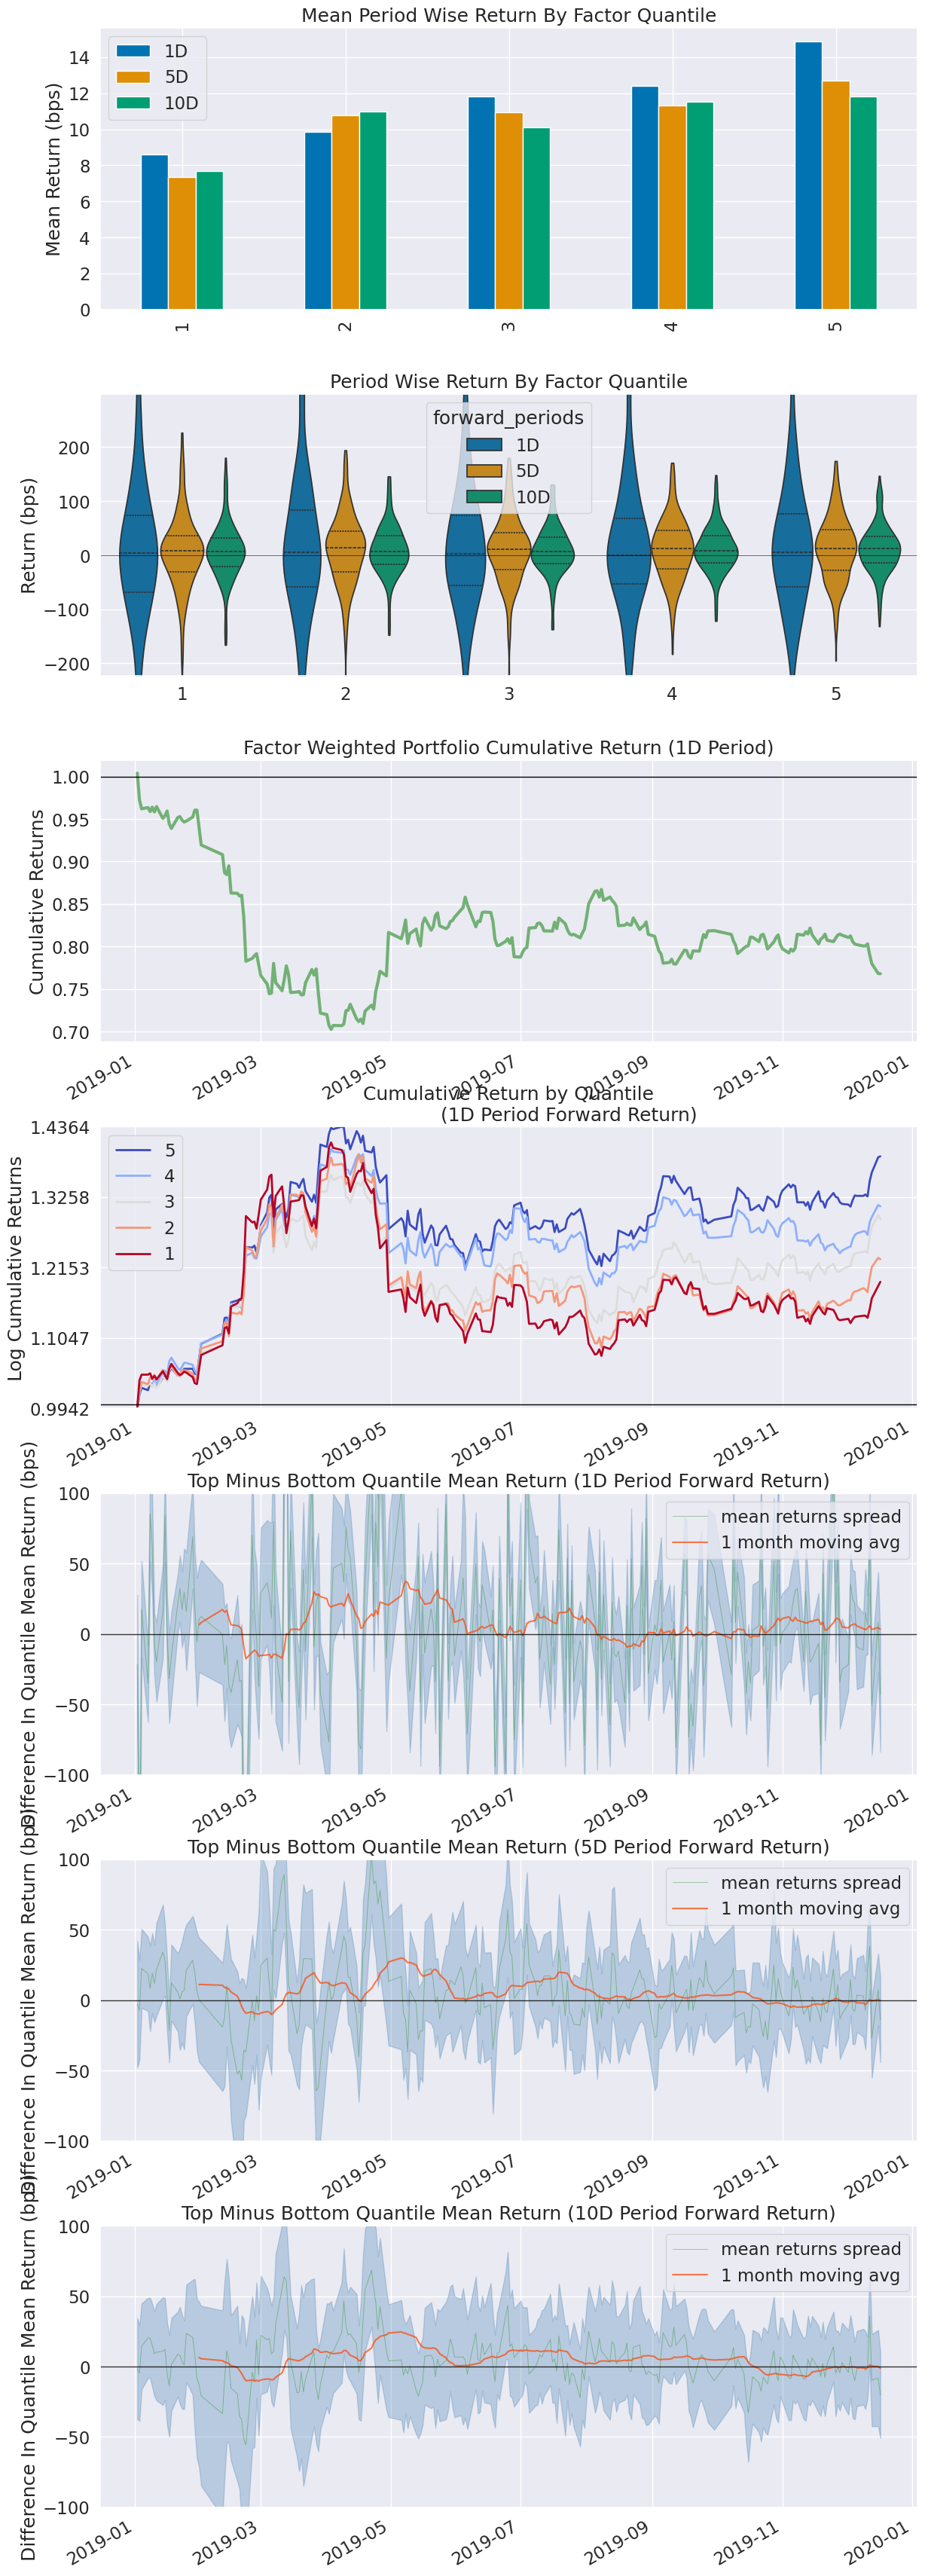

Information Analysis


1D     5D    10D
IC Mean           0.024  0.030  0.036
IC Std.           0.093  0.085  0.090
Risk-Adjusted IC  0.252  0.357  0.395
t-stat(IC)        3.854  5.459  6.043
p-value(IC)       0.000  0.000  0.000
IC Skew           0.218  0.387  0.548
IC Kurtosis       0.399  0.730  0.425

/root/.local/lib/python3.11/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


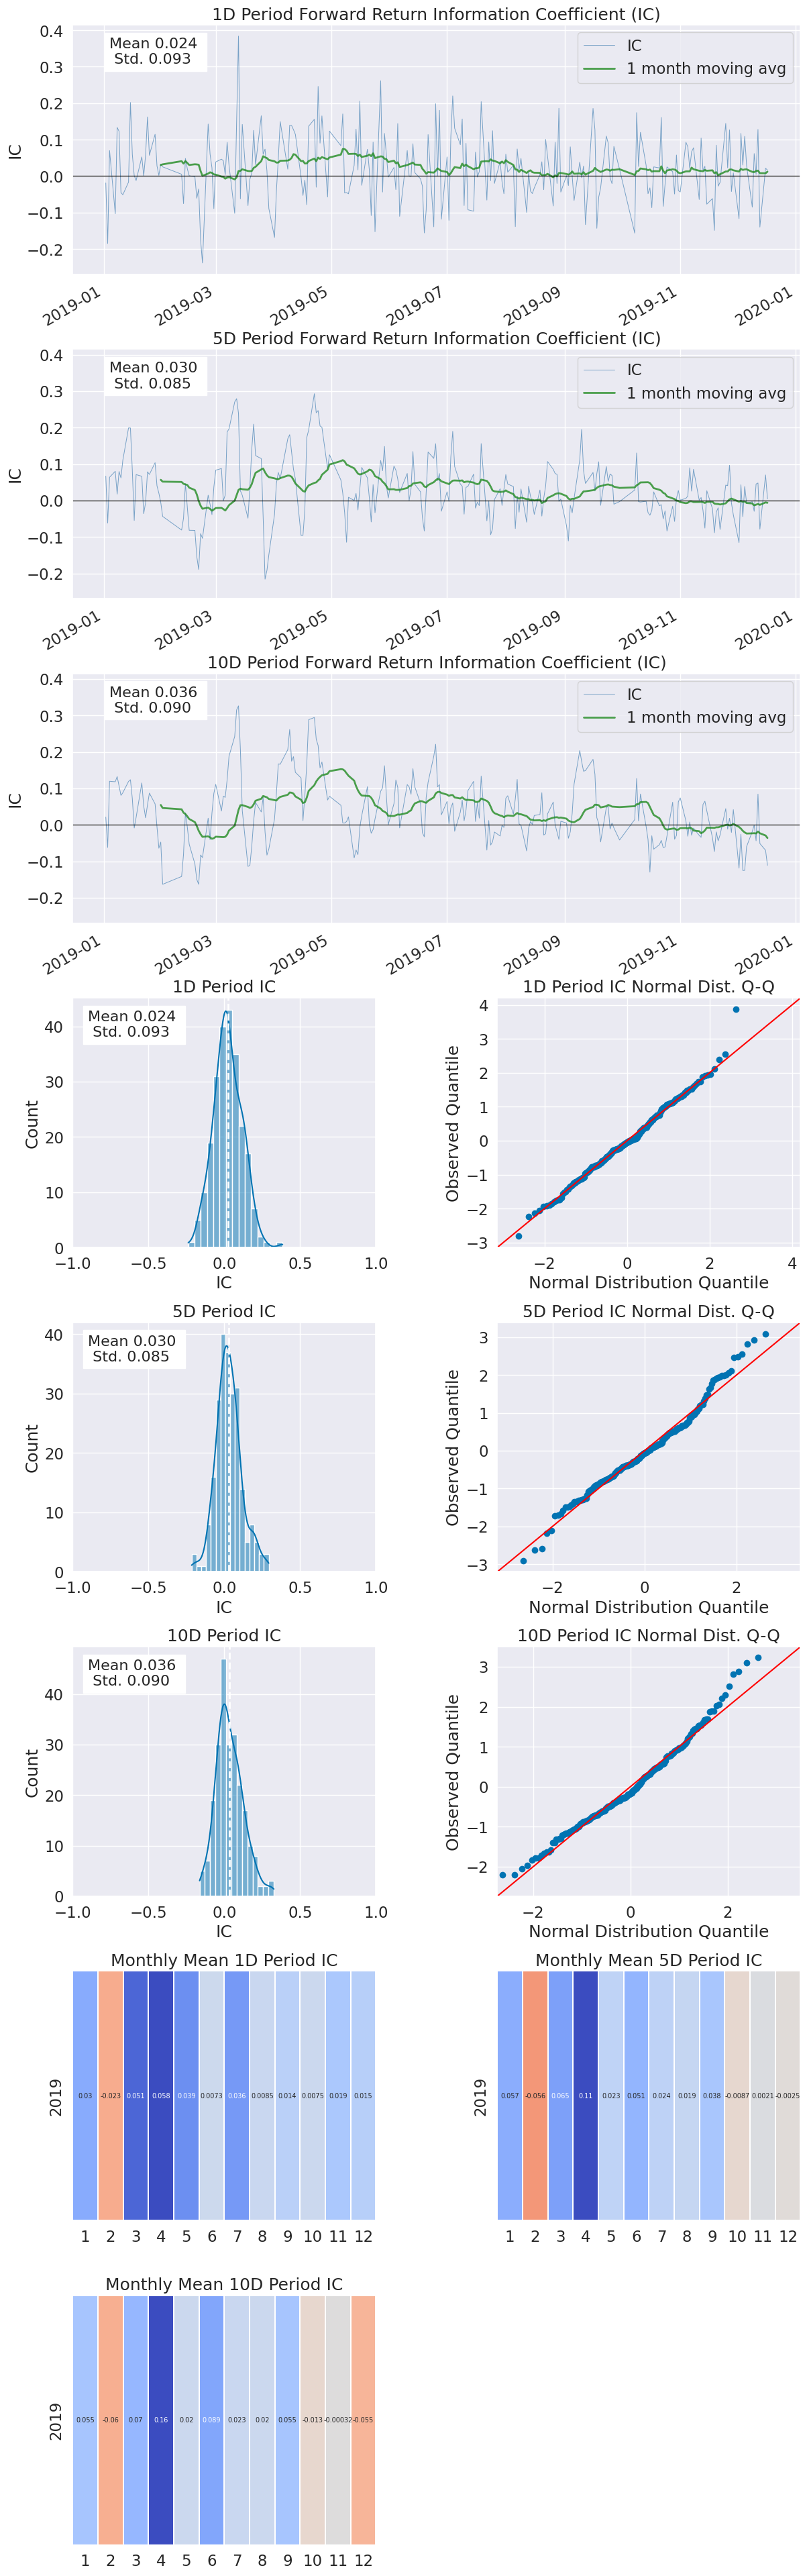

/root/.local/lib/python3.11/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.313  0.676  0.700
Quantile 2 Mean Turnover   0.533  0.778  0.782
Quantile 3 Mean Turnover   0.568  0.766  0.768
Quantile 4 Mean Turnover   0.438  0.599  0.616
Quantile 5 Mean Turnover   0.411  0.762  0.765

1D     5D    10D
Mean Factor Rank Autocorrelation  0.681  0.135  0.109

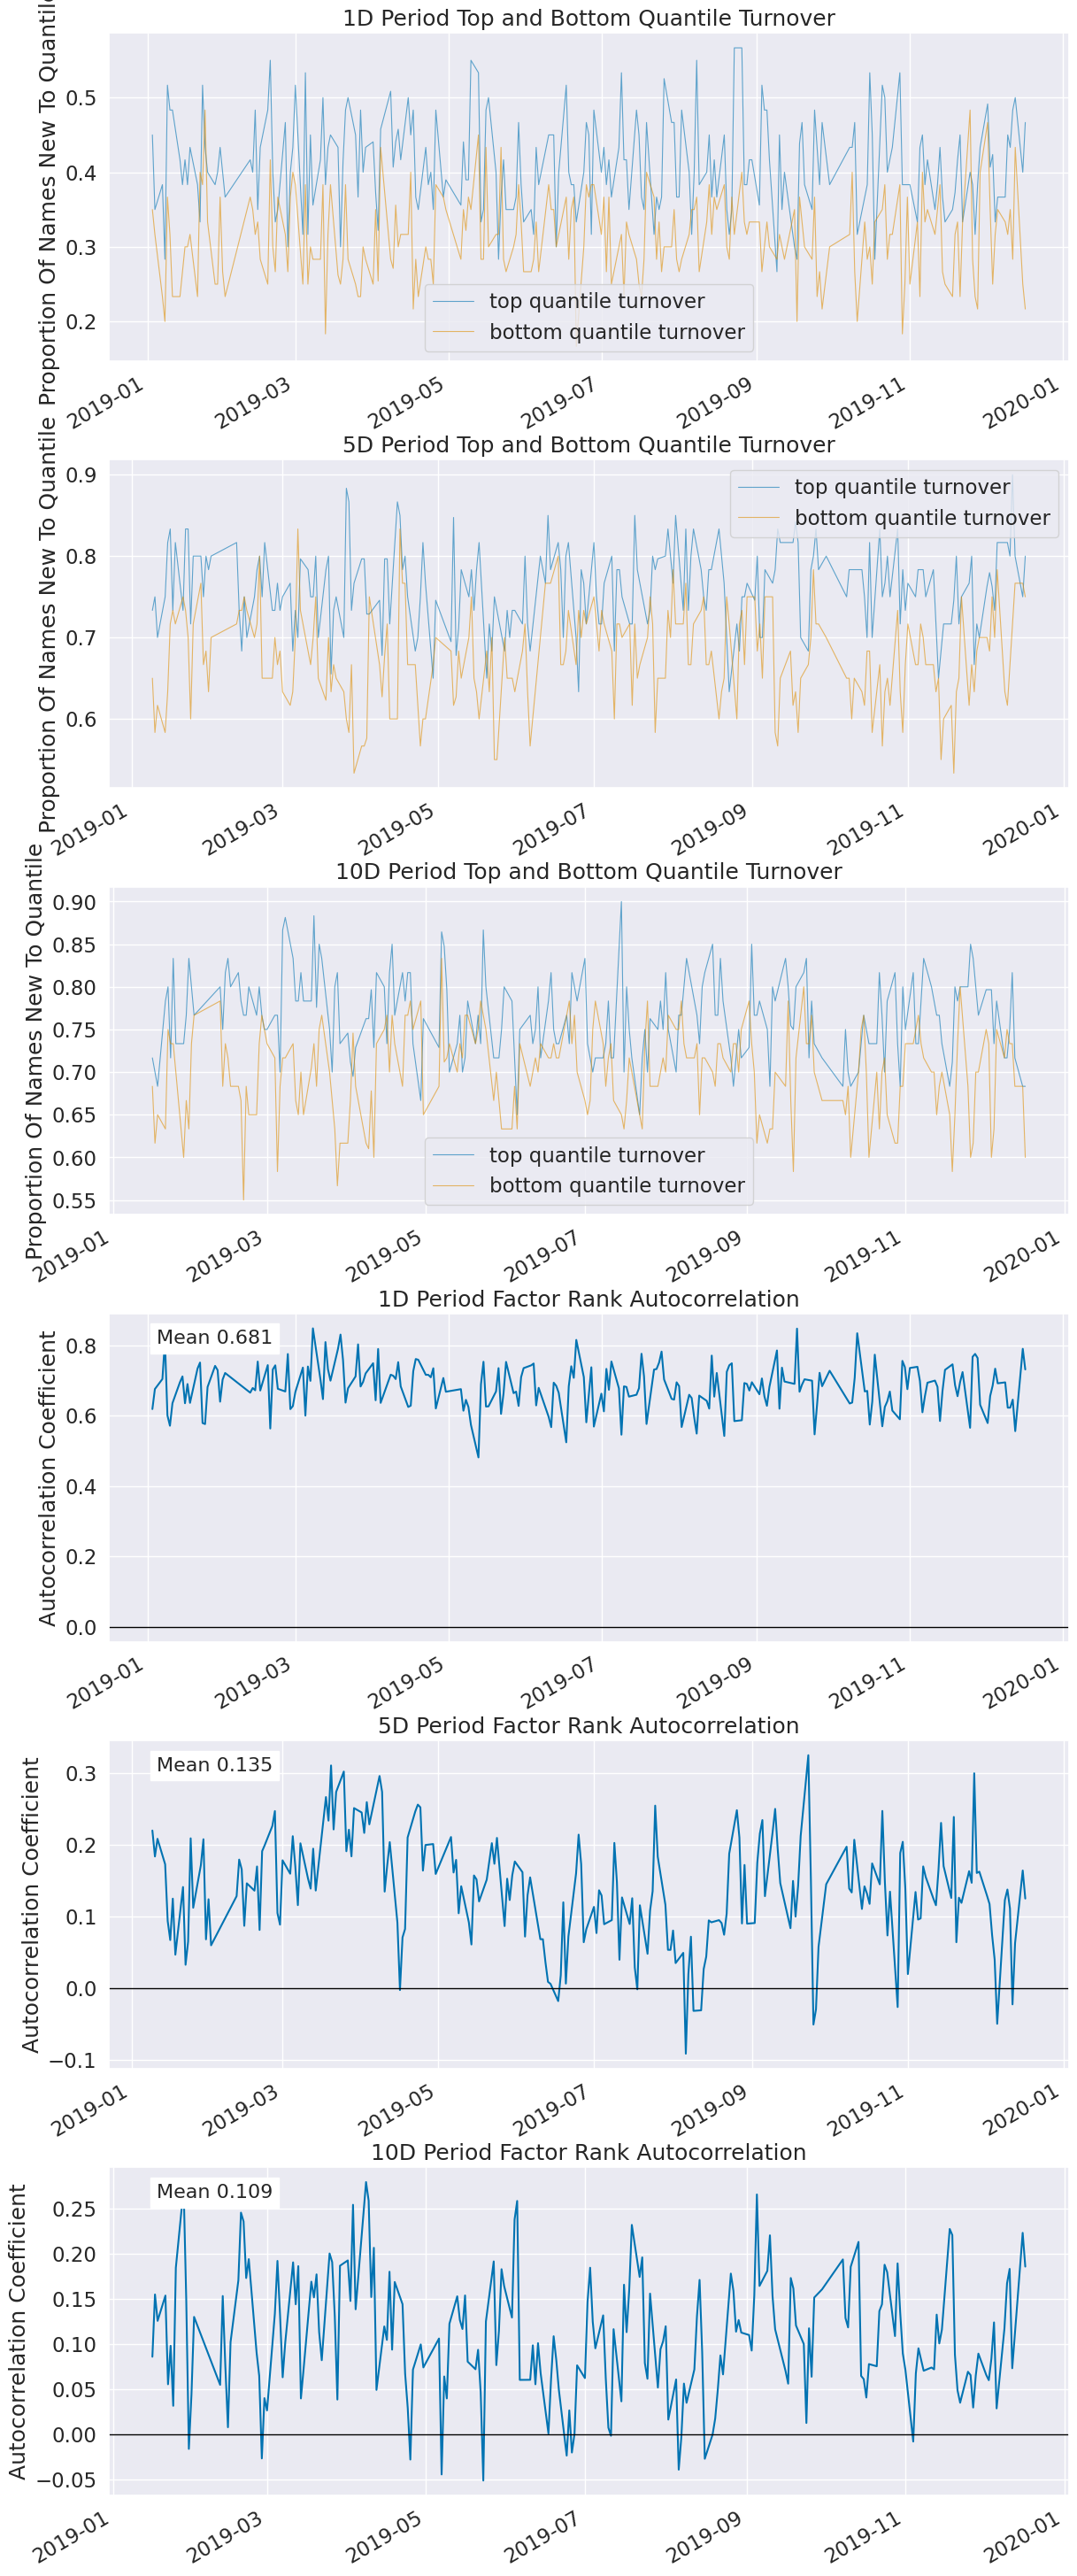

In [7]:
###########################简单现计算的因子#######################################
# alpha = dfs[['date', 'asset', "pctChg"]]
# alpha = alpha.rename(columns={
#         "pctChg": "factor"})
# alpha['date'] = pd.to_datetime(alpha['date'])
# alpha = alpha.set_index(['date', 'asset'], drop=True)
# alpha.sort_index(inplace=True)
# print(alpha)

############################已计算好存在文件中的因子######################################

alpha_num = 83

alpha_name = 'Alphas191'

# 读取已经计算好的因子
alpha = pd.read_csv('alphas/{}/{}/alpha{:03d}.csv'.format(alpha_name, year, alpha_num))

# 筛选出今年的数据，需与股票收盘日期区间一致
alpha = alpha[(alpha['date'] >= f'{year}-01-01') & (alpha['date'] <= f'{year+1}-01-01')]

# 因子矩阵转换为一维数据(alphalens需要的格式)
alpha = alpha.melt(id_vars=['date'], var_name='asset', value_name='factor' )

# date列转为日期格式
alpha['date'] = pd.to_datetime(alpha['date'])
alpha = alpha[['date', 'asset', 'factor']]

# 设置二级索引
alpha = alpha.set_index(['date', 'asset'], drop=True)
alpha.sort_index(inplace=True)
print(alpha)

#############################因子分析#######################################

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

ret = get_clean_factor_and_forward_returns(alpha, close,quantiles=5)
create_full_tear_sheet(ret, long_short=False)

In [3]:
!pip install backtrader
import backtrader as bt
import pandas as pd
import numpy as np
import datetime
from copy import deepcopy
from datas import *

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 21.8 MB/s eta 0:00:00
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --

In [4]:
year = 2019
list_assets, df_assets = get_hs300_stocks(f'{year}-01-01')
df_org= get_all_date_data(f'{year}-01-01', f'{year+1}-01-01', list_assets)
df1 = df_org.rename(columns={
        "date": "datetime", 
        "asset": "sec_code"})
df1["openinterest"] = 0
daily_price=df1[['sec_code','datetime', "open", "close", "high", "low", "volume", 'openinterest']]
daily_price['datetime'] = pd.to_datetime(daily_price['datetime'])

# 以 datetime 为 index，类型为 datetime 或 date 类型，Datafeeds 默认情况下是将 index 匹配给 datetime 字段；
daily_price = daily_price.set_index(['datetime'])
daily_price

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300


/tmp/ipykernel_4399/2865555437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_price['datetime'] = pd.to_datetime(daily_price['datetime'])


sec_code   open  close   high    low  volume  openinterest
datetime                                                             
2019-01-02   600000   9.74   9.70   9.79   9.58  237628             0
2019-01-03   600000   9.70   9.81   9.82   9.66  186543             0
2019-01-04   600000   9.73   9.96  10.00   9.70  271728             0
2019-01-07   600000  10.09   9.98  10.09   9.92  235974             0
2019-01-08   600000  10.03   9.96  10.03   9.91  151049             0
...             ...    ...    ...    ...    ...     ...           ...
2019-12-25   300433  14.20  14.19  14.38  14.09  353685             0
2019-12-26   300433  14.19  14.11  14.36  13.96  383715             0
2019-12-27   300433  14.13  13.64  14.38  13.64  523975             0
2019-12-30   300433  13.52  13.79  13.99  13.12  484200             0
2019-12-31   300433  13.80  13.82  13.96  13.57  317300             0

[72886 rows x 7 columns]

In [5]:
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

df_2 = df_org[['date', 'asset', "close"]]
df_2['date'] = pd.to_datetime(df_2['date'])
# print(df_all)

close = df_2.pivot(index='date', columns='asset', values='close')

alpha_name = 'Alphas191'

# 1. 先定义需要合成的因子编号列表
alpha_nums = [1,2]  # 比如要合并的因子编号
factor_dfs = []

for num in alpha_nums:
    path = f'alphas/{alpha_name}/{year}/alpha{num:03d}.csv'
    df = pd.read_csv(path)
    df = df[(df['date'] >= f'{year}-01-01') & (df['date'] < f'{year+1}-01-01')]
    df['date'] = pd.to_datetime(df['date'])
    df = df.melt(id_vars=['date'], var_name='asset', value_name=f'factor{num}')
    factor_dfs.append(df)

# 2. 把这些因子按 (date,asset) 合并到一个 DataFrame
from functools import reduce
df_all = reduce(lambda left, right: pd.merge(left, right, on=['date','asset']), factor_dfs)

# 3. 对每列因子做 z-score 归一化（可以加行业/市值中性化，这里简化演示）
for num in alpha_nums:
    col = f'factor{num}'
    df_all[col] = (df_all[col] - df_all.groupby('date')[col].transform('mean')) \
                  / df_all.groupby('date')[col].transform('std')

# 4. 计算等权复合因子：各因子归一化后求平均
df_all['composite_factor'] = df_all[[f'factor{num}' for num in alpha_nums]].mean(axis=1)

# 5. 准备给 Alphalens 用的格式
df_factor = df_all[['date','asset','composite_factor']].set_index(['date','asset']).sort_index()
# 注意列名要叫 'factor'
df_factor = df_factor.rename(columns={'composite_factor':'factor'})

# 6. 取所有股票的 close 矩阵（和你原来的 close 一样）
#    之后调用 Alphalens 生成 forward_returns
ret0 = get_clean_factor_and_forward_returns(df_factor, close, quantiles=5)

# 7. 拿到 5 组里第 5 组（最强势组合），按你原来那样取 top 60 支
ret0 = ret0.reset_index()
top_q = ret0[ret0['factor_quantile']==5]
trade_info0 = (
    top_q[['date','asset']]
    .rename(columns={'date':'trade_date','asset':'sec_code'})
)
trade_info0['weight'] = 1.0 / 60
alpha_num1 = 1


# 读取已经计算好的因子
alpha1 = pd.read_csv('alphas/{}/{}/alpha{:03d}.csv'.format(alpha_name, year, alpha_num1))

# 筛选出今年的数据，需与股票收盘日期区间一致
alpha1 = alpha1[(alpha1['date'] >= f'{year}-01-01') & (alpha1['date'] <= f'{year+1}-01-01')]

# 因子矩阵转换为一维数据(alphalens需要的格式)
alpha1 = alpha1.melt(id_vars=['date'], var_name='asset', value_name='factor' )

# date列转为日期格式
alpha1['date'] = pd.to_datetime(alpha1['date'])
alpha1 = alpha1[['date', 'asset', 'factor']]

# 设置二级索引
alpha1 = alpha1.set_index(['date', 'asset'], drop=True)
alpha1.sort_index(inplace=True)


ret1 = get_clean_factor_and_forward_returns(alpha1, close,quantiles=5)
ret1 = ret1.reset_index()
ret1 = ret1[ret1['factor_quantile'] == 5]
# ret['week'] =  pd.to_datetime(ret['date']).dt.weekday
# ret = ret[ret['week'] == 4]
ret1 = ret1[['date','asset']]
ret1['weight'] = 1/60
trade_info1 = ret1.rename(columns={
        "date": "trade_date", 
        "asset": "sec_code"})
trade_info1

/tmp/ipykernel_4399/3615102064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['date'] = pd.to_datetime(df_2['date'])
/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_met

Dropped 4.1% entries from factor data: 4.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/.local/lib/python3.11/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill

Dropped 4.1% entries from factor data: 4.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


trade_date sec_code    weight
1     2019-01-02   000002  0.016667
5     2019-01-02   000157  0.016667
7     2019-01-02   000333  0.016667
13    2019-01-02   000423  0.016667
18    2019-01-02   000568  0.016667
...          ...      ...       ...
70181 2019-12-17   601992  0.016667
70184 2019-12-17   603156  0.016667
70188 2019-12-17   603288  0.016667
70189 2019-12-17   603799  0.016667
70190 2019-12-17   603833  0.016667

[14038 rows x 3 columns]

In [6]:
# 回测策略
class TestStrategy(bt.Strategy):
    params = (
        ('buy_stocks', None), # 传入各个调仓日的股票列表和相应的权重
    )
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')

    def __init__(self):
         
        self.trade_dates = [x.date() for x in pd.to_datetime(self.p.buy_stocks['trade_date'].unique()).tolist()]
        self.buy_stock = self.p.buy_stocks # 保留调仓信息
        self.order_list = []  # 记录以往订单，在调仓日要全部取消未成交的订单
        self.buy_stocks_pre = [] # 记录上一期持仓
    
    def next(self):
        # 获取当前的回测时间点
        dt = self.datas[0].datetime.date(0)
        # 打印当前时刻的总资产
        self.log('当前总资产 %.2f' %(self.broker.getvalue()))
        # 如果是调仓日，则进行调仓操作
        if dt in self.trade_dates:
            print(f"--------------{dt} 为调仓日----------")
            #取消之前所下的没成交也未到期的订单
            if len(self.order_list) > 0:
                print("--------------- 撤销未完成的订单 -----------------")
                for od in self.order_list:
                    # 如果订单未完成，则撤销订单
                    self.cancel(od) 
                 #重置订单列表
                self.order_list = [] 

            # 提取当前调仓日的持仓列表
            buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
            long_list = buy_stocks_data['sec_code'].tolist()
            print('long_list', long_list)  # 打印持仓列表

            # 对现有持仓中，调仓后不再继续持有的股票进行卖出平仓
            sell_stock = [i for i in self.buy_stocks_pre if i not in long_list]
            print('sell_stock', sell_stock)
            if sell_stock:
                print("-----------对不再持有的股票进行平仓--------------")
                for stock in sell_stock:
                    data = self.getdatabyname(stock)
                    if self.getposition(data).size > 0 :
                        od = self.close(data=data)  
                        self.order_list.append(od) # 记录卖出订单

            # 买入此次调仓的股票：多退少补原则
            print("-----------买入此次调仓期的股票--------------")
            for stock in long_list:
                w = buy_stocks_data.query(f"sec_code=='{stock}'")['weight'].iloc[0] # 提取持仓权重
                data = self.getdatabyname(stock)
                order = self.order_target_percent(data=data, target=w*0.95) # 为减少可用资金不足的情况，留 5% 的现金做备用
                self.order_list.append(order)

            self.buy_stocks_pre = long_list  # 保存此次调仓的股票列表
        
    #订单日志    
    def notify_order(self, order):
        # 未被处理的订单
        if order.status in [order.Submitted, order.Accepted]:
            return
        # 已被处理的订单
        if order.status in [order.Completed, order.Canceled, order.Margin]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, ref:%.0f, Price: %.2f, Cost: %.2f, Comm %.2f, Size: %.2f, Stock: %s' %
                    (order.ref,
                     order.executed.price,
                     order.executed.value,
                     order.executed.comm,
                     order.executed.size,
                     order.data._name))
            else:  # Sell
                self.log('SELL EXECUTED, ref:%.0f, Price: %.2f, Cost: %.2f, Comm %.2f, Size: %.2f, Stock: %s' %
                        (order.ref,
                         order.executed.price,
                         order.executed.value,
                         order.executed.comm,
                         order.executed.size,
                         order.data._name))

# 实例化大脑
cerebro_ = bt.Cerebro() 

# 按股票代码，依次循环传入数据
for stock in daily_price['sec_code'].unique():
    # 日期对齐
    data = pd.DataFrame(index=daily_price.index.unique())
    df = daily_price.query(f"sec_code=='{stock}'")[['open','high','low','close','volume','openinterest']]
    data_ = pd.merge(data, df, left_index=True, right_index=True, how='left')
    data_.loc[:,['volume','openinterest']] = data_.loc[:,['volume','openinterest']].fillna(0)
    data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
    # data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(0)
    datafeed = bt.feeds.PandasData(dataname=data_, fromdate=datetime.datetime(year,1,1), todate=datetime.datetime(year+1,1,1))
    cerebro_.adddata(datafeed, name=stock)
    print(f"{stock} Done !") 

/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

600000 Done !
600004 Done !
600009 Done !
600010 Done !
600011 Done !
600015 Done !
600016 Done !
600018 Done !
600019 Done !
600023 Done !
600025 Done !
600027 Done !
600028 Done !
600029 Done !
600030 Done !
600031 Done !
600036 Done !
600038 Done !
600048 Done !
600050 Done !
600061 Done !
600066 Done !
600068 Done !
600085 Done !
600089 Done !
600100 Done !
600104 Done !
600109 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

600111 Done !
600115 Done !
600118 Done !
600153 Done !
600157 Done !
600170 Done !
600176 Done !
600177 Done !
600188 Done !
600196 Done !
600208 Done !
600219 Done !
600221 Done !
600233 Done !
600271 Done !
600276 Done !
600297 Done !
600309 Done !
600332 Done !
600339 Done !
600340 Done !
600346 Done !
600352 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

600362 Done !
600369 Done !
600372 Done !
600383 Done !
600390 Done !
600398 Done !
600406 Done !
600415 Done !
600436 Done !
600438 Done !
600482 Done !
600487 Done !
600489 Done !
600498 Done !
600516 Done !
600518 Done !
600519 Done !
600522 Done !
600535 Done !
600547 Done !
600549 Done !
600566 Done !
600570 Done !
600583 Done !
600585 Done !
600588 Done !
600606 Done !
600637 Done !
600660 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

600674 Done !
600688 Done !
600690 Done !
600703 Done !
600704 Done !
600705 Done !
600739 Done !
600741 Done !
600760 Done !
600795 Done !
600809 Done !
600816 Done !
600837 Done !
600867 Done !
600886 Done !
600887 Done !
600893 Done !
600900 Done !
600909 Done !
600919 Done !
600926 Done !
600958 Done !
600977 Done !
600998 Done !
600999 Done !
601006 Done !
601009 Done !
601012 Done !
601018 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

601021 Done !
601066 Done !
601088 Done !
601108 Done !
601111 Done !
601117 Done !
601138 Done !
601155 Done !
601166 Done !
601169 Done !
601186 Done !
601198 Done !
601211 Done !
601212 Done !
601216 Done !
601225 Done !
601228 Done !
601229 Done !
601238 Done !
601288 Done !
601318 Done !
601328 Done !
601333 Done !
601336 Done !
601360 Done !
601377 Done !
601390 Done !
601398 Done !
601555 Done !
601600 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

601601 Done !
601607 Done !
601611 Done !
601618 Done !
601628 Done !
601633 Done !
601668 Done !
601669 Done !
601688 Done !
601727 Done !
601766 Done !
601788 Done !
601800 Done !
601808 Done !
601818 Done !
601828 Done !
601838 Done !
601857 Done !
601877 Done !
601878 Done !
601881 Done !
601888 Done !
601898 Done !
601899 Done !
601901 Done !
601919 Done !
601933 Done !
601939 Done !
601985 Done !
601988 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

601989 Done !
601991 Done !
601992 Done !
601997 Done !
601998 Done !
603156 Done !
603160 Done !
603259 Done !
603260 Done !
603288 Done !
603799 Done !
603833 Done !
603858 Done !
603986 Done !
603993 Done !
000001 Done !
000002 Done !
000063 Done !
000069 Done !
000100 Done !
000157 Done !
000166 Done !
000333 Done !
000338 Done !
000402 Done !
000408 Done !
000413 Done !
000415 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

000423 Done !
000425 Done !
000503 Done !
000538 Done !
000553 Done !
000568 Done !
000625 Done !
000627 Done !
000630 Done !
000651 Done !
000661 Done !
000671 Done !
000703 Done !
000709 Done !
000725 Done !
000728 Done !
000768 Done !
000776 Done !
000783 Done !
000786 Done !
000792 Done !
000826 Done !
000839 Done !
000858 Done !
000876 Done !
000895 Done !
000898 Done !
000938 Done !
000959 Done !
000961 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

000963 Done !
000983 Done !
001965 Done !
001979 Done !
002001 Done !
002007 Done !
002008 Done !
002024 Done !
002027 Done !
002032 Done !
002044 Done !
002050 Done !
002065 Done !
002081 Done !
002085 Done !
002120 Done !
002142 Done !
002146 Done !
002153 Done !
002179 Done !
002202 Done !
002230 Done !
002236 Done !
002241 Done !
002252 Done !
002271 Done !
002294 Done !
002304 Done !
002310 Done !
002311 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

002352 Done !
002411 Done !
002415 Done !
002422 Done !
002450 Done !
002456 Done !
002460 Done !
002466 Done !
002468 Done !
002475 Done !
002493 Done !
002508 Done !
002555 Done !
002558 Done !
002572 Done !
002594 Done !
002601 Done !
002602 Done !
002624 Done !
002625 Done !
002673 Done !
002714 Done !
002736 Done !
002773 Done !
002797 Done !
002925 Done !
300003 Done !
300015 Done !
300017 Done !
300024 Done !
300033 Done !
300059 Done !
300070 Done !
300072 Done !
300122 Done !
300124 Done !
300136 Done !
300142 Done !
300144 Done !
300251 Done !
300296 Done !
300408 Done !
300433 Done !


/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
/tmp/ipykernel_4399/3516388847.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

In [7]:
cerebro = deepcopy(cerebro_)  # 深度复制已经导入数据的 cerebro_，避免重复导入数据 
# 初始资金 100,000,000    
cerebro.broker.setcash(100000.0) 
# cerebro.broker.setcommission(commission=0.0015)
# 添加策略
cerebro.addstrategy(TestStrategy, buy_stocks=trade_info0) # 通过修改参数 buy_stocks ，使用同一策略回测不同的持仓列表

# 添加分析指标
# 返回年初至年末的年度收益率
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='_AnnualReturn')
# 计算最大回撤相关指标
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='_DrawDown')
# 计算年化收益
cerebro.addanalyzer(bt.analyzers.Returns, _name='_Returns', tann=252)
# 计算年化夏普比率
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='_SharpeRatio', timeframe=bt.TimeFrame.Days, annualize=True, riskfreerate=0) # 计算夏普比率
cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='_SharpeRatio_A')
# 返回收益率时序
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')

# 启动回测
result0 = cerebro.run()
cerebro = deepcopy(cerebro_)  # 深度复制已经导入数据的 cerebro_，避免重复导入数据 
# 初始资金 100,000,000    
cerebro.broker.setcash(100000.0) 
# cerebro.broker.setcommission(commission=0.0015)
# 添加策略
cerebro.addstrategy(TestStrategy, buy_stocks=trade_info1) # 通过修改参数 buy_stocks ，使用同一策略回测不同的持仓列表

# 添加分析指标
# 返回年初至年末的年度收益率
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='_AnnualReturn')
# 计算最大回撤相关指标
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='_DrawDown')
# 计算年化收益
cerebro.addanalyzer(bt.analyzers.Returns, _name='_Returns', tann=252)
# 计算年化夏普比率
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='_SharpeRatio', timeframe=bt.TimeFrame.Days, annualize=True, riskfreerate=0) # 计算夏普比率
cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='_SharpeRatio_A')
# 返回收益率时序
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')

# 启动回测
result1 = cerebro.run()

2019-01-02, 当前总资产 100000.00
--------------2019-01-02 为调仓日----------
long_list ['000157', '000333', '000568', '000630', '000776', '000858', '000898', '002001', '002008', '002027', '002065', '002081', '002153', '002179', '002294', '002304', '002422', '002456', '002466', '002594', '300003', '300015', '300072', '300122', '300144', '600004', '600010', '600038', '600068', '600111', '600176', '600208', '600221', '600276', '600340', '600436', '600518', '600535', '600549', '600566', '600705', '600739', '600809', '600977', '601117', '601228', '601229', '601600', '601607', '601611', '601828', '601838', '601857', '601888', '601899', '601991', '603160', '603259', '603858', '603986']
sell_stock []
-----------买入此次调仓期的股票--------------
2019-01-03, BUY EXECUTED, ref:1, Price: 3.46, Cost: 1577.76, Comm 0.00, Size: 456.00, Stock: 000157
2019-01-03, BUY EXECUTED, ref:2, Price: 36.26, Cost: 1559.18, Comm 0.00, Size: 43.00, Stock: 000333
2019-01-03, BUY EXECUTED, ref:3, Price: 39.60, Cost: 1544.40, Comm 0.00

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-04, SELL EXECUTED, ref:61, Price: 3.50, Cost: 1577.76, Comm 0.00, Size: -456.00, Stock: 000157
2019-01-04, SELL EXECUTED, ref:62, Price: 35.99, Cost: 1559.18, Comm 0.00, Size: -43.00, Stock: 000333
2019-01-04, SELL EXECUTED, ref:63, Price: 1.95, Cost: 1589.56, Comm 0.00, Size: -811.00, Stock: 000630
2019-01-04, SELL EXECUTED, ref:64, Price: 12.20, Cost: 1573.80, Comm 0.00, Size: -129.00, Stock: 000776
2019-01-04, SELL EXECUTED, ref:65, Price: 48.23, Cost: 1551.24, Comm 0.00, Size: -31.00, Stock: 000858
2019-01-04, SELL EXECUTED, ref:66, Price: 4.93, Cost: 1583.16, Comm 0.00, Size: -316.00, Stock: 000898
2019-01-04, SELL EXECUTED, ref:67, Price: 13.93, Cost: 1584.00, Comm 0.00, Size: -110.00, Stock: 002001
2019-01-04, SELL EXECUTED, ref:68, Price: 5.03, Cost: 1565.55, Comm 0.00, Size: -315.00, Stock: 002027
2019-01-04, SELL EXECUTED, ref:69, Price: 34.19, Cost: 1564.00, Comm 0.00, Size: -46.00, Stock: 002179
2019-01-04, SELL EXECUTED, ref:70, Price: 19.89, Cost: 1577.63, Comm 0.

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-08, SELL EXECUTED, ref:268, Price: 3.62, Cost: 1621.74, Comm 0.00, Size: -453.00, Stock: 000157
2019-01-08, SELL EXECUTED, ref:269, Price: 2.02, Cost: 1622.07, Comm 0.00, Size: -807.00, Stock: 000630
2019-01-08, SELL EXECUTED, ref:270, Price: 175.48, Cost: 1510.92, Comm 0.00, Size: -9.00, Stock: 000661
2019-01-08, SELL EXECUTED, ref:271, Price: 7.78, Cost: 1615.40, Comm 0.00, Size: -205.00, Stock: 002085
2019-01-08, SELL EXECUTED, ref:272, Price: 7.10, Cost: 1625.32, Comm 0.00, Size: -227.00, Stock: 002310
2019-01-08, SELL EXECUTED, ref:273, Price: 10.24, Cost: 1620.24, Comm 0.00, Size: -157.00, Stock: 002493
2019-01-08, SELL EXECUTED, ref:274, Price: 9.46, Cost: 1682.92, Comm 0.00, Size: -171.00, Stock: 300072
2019-01-08, SELL EXECUTED, ref:275, Price: 8.35, Cost: 1512.72, Comm 0.00, Size: -191.00, Stock: 300251
2019-01-08, SELL EXECUTED, ref:276, Price: 5.30, Cost: 1624.03, Comm 0.00, Size: -307.00, Stock: 600018
2019-01-08, SELL EXECUTED, ref:277, Price: 6.61, Cost: 1629.36,

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-10, SELL EXECUTED, ref:450, Price: 19.90, Cost: 1615.95, Comm 0.00, Size: -81.00, Stock: 000063
2019-01-10, SELL EXECUTED, ref:451, Price: 178.70, Cost: 1584.00, Comm 0.00, Size: -9.00, Stock: 000661
2019-01-10, SELL EXECUTED, ref:452, Price: 13.40, Cost: 1620.16, Comm 0.00, Size: -122.00, Stock: 000776
2019-01-10, SELL EXECUTED, ref:453, Price: 24.66, Cost: 1625.00, Comm 0.00, Size: -65.00, Stock: 000895
2019-01-10, SELL EXECUTED, ref:454, Price: 28.87, Cost: 1615.60, Comm 0.00, Size: -56.00, Stock: 002008
2019-01-10, SELL EXECUTED, ref:455, Price: 51.40, Cost: 1573.25, Comm 0.00, Size: -31.00, Stock: 002032
2019-01-10, SELL EXECUTED, ref:456, Price: 26.69, Cost: 1602.00, Comm 0.00, Size: -60.00, Stock: 002153
2019-01-10, SELL EXECUTED, ref:457, Price: 11.98, Cost: 1638.80, Comm 0.00, Size: -136.00, Stock: 002236
2019-01-10, SELL EXECUTED, ref:458, Price: 20.50, Cost: 1611.60, Comm 0.00, Size: -79.00, Stock: 002294
2019-01-10, SELL EXECUTED, ref:459, Price: 19.22, Cost: 1614.3

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-14, SELL EXECUTED, ref:643, Price: 25.13, Cost: 1639.18, Comm 0.00, Size: -65.00, Stock: 000002
2019-01-14, SELL EXECUTED, ref:644, Price: 2.74, Cost: 1687.46, Comm 0.00, Size: -607.00, Stock: 000100
2019-01-14, SELL EXECUTED, ref:645, Price: 39.18, Cost: 1653.92, Comm 0.00, Size: -42.00, Stock: 000568
2019-01-14, SELL EXECUTED, ref:646, Price: 5.28, Cost: 1629.32, Comm 0.00, Size: -308.00, Stock: 000671
2019-01-14, SELL EXECUTED, ref:647, Price: 5.77, Cost: 1647.22, Comm 0.00, Size: -287.00, Stock: 000961
2019-01-14, SELL EXECUTED, ref:648, Price: 8.25, Cost: 1633.85, Comm 0.00, Size: -205.00, Stock: 002146
2019-01-14, SELL EXECUTED, ref:649, Price: 7.08, Cost: 1647.21, Comm 0.00, Size: -233.00, Stock: 002241
2019-01-14, SELL EXECUTED, ref:650, Price: 7.30, Cost: 1613.30, Comm 0.00, Size: -221.00, Stock: 002252
2019-01-14, SELL EXECUTED, ref:651, Price: 7.53, Cost: 1657.76, Comm 0.00, Size: -208.00, Stock: 002450
2019-01-14, SELL EXECUTED, ref:652, Price: 9.22, Cost: 1625.32, 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-16, SELL EXECUTED, ref:824, Price: 41.00, Cost: 1619.50, Comm 0.00, Size: -41.00, Stock: 000333
2019-01-16, SELL EXECUTED, ref:825, Price: 75.64, Cost: 1585.76, Comm 0.00, Size: -22.00, Stock: 000538
2019-01-16, SELL EXECUTED, ref:826, Price: 14.97, Cost: 1649.20, Comm 0.00, Size: -111.00, Stock: 002001
2019-01-16, SELL EXECUTED, ref:827, Price: 31.40, Cost: 1622.86, Comm 0.00, Size: -53.00, Stock: 002007
2019-01-16, SELL EXECUTED, ref:828, Price: 29.14, Cost: 1691.40, Comm 0.00, Size: -59.00, Stock: 002008
2019-01-16, SELL EXECUTED, ref:829, Price: 7.02, Cost: 1651.75, Comm 0.00, Size: -235.00, Stock: 002065
2019-01-16, SELL EXECUTED, ref:830, Price: 9.18, Cost: 1618.20, Comm 0.00, Size: -180.00, Stock: 002456
2019-01-16, SELL EXECUTED, ref:831, Price: 29.69, Cost: 1603.80, Comm 0.00, Size: -55.00, Stock: 002466
2019-01-16, SELL EXECUTED, ref:832, Price: 6.25, Cost: 1616.50, Comm 0.00, Size: -265.00, Stock: 002797
2019-01-16, SELL EXECUTED, ref:833, Price: 43.70, Cost: 1598.66

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-18, SELL EXECUTED, ref:1020, Price: 12.18, Cost: 1658.35, Comm 0.00, Size: -133.00, Stock: 000703
2019-01-18, SELL EXECUTED, ref:1021, Price: 3.24, Cost: 1773.82, Comm 0.00, Size: -499.00, Stock: 000839
2019-01-18, SELL EXECUTED, ref:1022, Price: 31.85, Cost: 1640.00, Comm 0.00, Size: -50.00, Stock: 000938
2019-01-18, SELL EXECUTED, ref:1023, Price: 8.02, Cost: 1654.39, Comm 0.00, Size: -203.00, Stock: 001965
2019-01-18, SELL EXECUTED, ref:1024, Price: 14.83, Cost: 1627.37, Comm 0.00, Size: -109.00, Stock: 002001
2019-01-18, SELL EXECUTED, ref:1025, Price: 29.02, Cost: 1641.60, Comm 0.00, Size: -57.00, Stock: 002008
2019-01-18, SELL EXECUTED, ref:1026, Price: 8.33, Cost: 1648.89, Comm 0.00, Size: -197.00, Stock: 002146
2019-01-18, SELL EXECUTED, ref:1027, Price: 6.98, Cost: 1640.24, Comm 0.00, Size: -232.00, Stock: 002241
2019-01-18, SELL EXECUTED, ref:1028, Price: 14.90, Cost: 1628.00, Comm 0.00, Size: -110.00, Stock: 002271
2019-01-18, SELL EXECUTED, ref:1029, Price: 20.71, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-22, SELL EXECUTED, ref:1218, Price: 2.74, Cost: 1673.04, Comm 0.00, Size: -622.00, Stock: 000100
2019-01-22, SELL EXECUTED, ref:1219, Price: 11.36, Cost: 1655.90, Comm 0.00, Size: -145.00, Stock: 000408
2019-01-22, SELL EXECUTED, ref:1220, Price: 5.33, Cost: 1637.70, Comm 0.00, Size: -309.00, Stock: 000671
2019-01-22, SELL EXECUTED, ref:1221, Price: 6.57, Cost: 1664.79, Comm 0.00, Size: -263.00, Stock: 000792
2019-01-22, SELL EXECUTED, ref:1222, Price: 3.28, Cost: 1649.94, Comm 0.00, Size: -514.00, Stock: 000839
2019-01-22, SELL EXECUTED, ref:1223, Price: 30.05, Cost: 1655.50, Comm 0.00, Size: -55.00, Stock: 002008
2019-01-22, SELL EXECUTED, ref:1224, Price: 50.65, Cost: 1625.60, Comm 0.00, Size: -32.00, Stock: 002032
2019-01-22, SELL EXECUTED, ref:1225, Price: 7.12, Cost: 1666.15, Comm 0.00, Size: -235.00, Stock: 002252
2019-01-22, SELL EXECUTED, ref:1226, Price: 21.08, Cost: 1661.40, Comm 0.00, Size: -78.00, Stock: 002294
2019-01-22, SELL EXECUTED, ref:1227, Price: 19.47, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-24, SELL EXECUTED, ref:1404, Price: 6.77, Cost: 1668.40, Comm 0.00, Size: -245.00, Stock: 000402
2019-01-24, SELL EXECUTED, ref:1405, Price: 15.19, Cost: 1620.00, Comm 0.00, Size: -108.00, Stock: 000503
2019-01-24, SELL EXECUTED, ref:1406, Price: 7.34, Cost: 1710.36, Comm 0.00, Size: -226.00, Stock: 000625
2019-01-24, SELL EXECUTED, ref:1407, Price: 3.27, Cost: 1652.82, Comm 0.00, Size: -507.00, Stock: 000839
2019-01-24, SELL EXECUTED, ref:1408, Price: 8.05, Cost: 1648.00, Comm 0.00, Size: -206.00, Stock: 001965
2019-01-24, SELL EXECUTED, ref:1409, Price: 16.97, Cost: 1668.15, Comm 0.00, Size: -99.00, Stock: 002142
2019-01-24, SELL EXECUTED, ref:1410, Price: 36.40, Cost: 1691.98, Comm 0.00, Size: -46.00, Stock: 002179
2019-01-24, SELL EXECUTED, ref:1411, Price: 6.84, Cost: 1651.49, Comm 0.00, Size: -239.00, Stock: 002241
2019-01-24, SELL EXECUTED, ref:1412, Price: 15.88, Cost: 1686.92, Comm 0.00, Size: -111.00, Stock: 002271
2019-01-24, SELL EXECUTED, ref:1413, Price: 18.55, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-28, SELL EXECUTED, ref:1599, Price: 6.33, Cost: 1659.73, Comm 0.00, Size: -269.00, Stock: 000069
2019-01-28, SELL EXECUTED, ref:1600, Price: 10.99, Cost: 1647.94, Comm 0.00, Size: -149.00, Stock: 000408
2019-01-28, SELL EXECUTED, ref:1601, Price: 4.50, Cost: 1682.40, Comm 0.00, Size: -375.00, Stock: 000413
2019-01-28, SELL EXECUTED, ref:1602, Price: 6.20, Cost: 1652.00, Comm 0.00, Size: -295.00, Stock: 000627
2019-01-28, SELL EXECUTED, ref:1603, Price: 3.61, Cost: 1738.92, Comm 0.00, Size: -516.00, Stock: 000839
2019-01-28, SELL EXECUTED, ref:1604, Price: 15.20, Cost: 1659.90, Comm 0.00, Size: -110.00, Stock: 002001
2019-01-28, SELL EXECUTED, ref:1605, Price: 5.85, Cost: 1681.33, Comm 0.00, Size: -294.00, Stock: 002027
2019-01-28, SELL EXECUTED, ref:1606, Price: 8.63, Cost: 1668.00, Comm 0.00, Size: -200.00, Stock: 002146
2019-01-28, SELL EXECUTED, ref:1607, Price: 6.67, Cost: 1741.85, Comm 0.00, Size: -253.00, Stock: 002252
2019-01-28, SELL EXECUTED, ref:1608, Price: 15.99, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-30, SELL EXECUTED, ref:1797, Price: 42.79, Cost: 1631.76, Comm 0.00, Size: -39.00, Stock: 000333
2019-01-30, SELL EXECUTED, ref:1798, Price: 4.23, Cost: 1655.64, Comm 0.00, Size: -378.00, Stock: 000413
2019-01-30, SELL EXECUTED, ref:1799, Price: 40.50, Cost: 1656.40, Comm 0.00, Size: -41.00, Stock: 000423
2019-01-30, SELL EXECUTED, ref:1800, Price: 3.25, Cost: 1673.93, Comm 0.00, Size: -512.00, Stock: 000425
2019-01-30, SELL EXECUTED, ref:1801, Price: 5.71, Cost: 1666.98, Comm 0.00, Size: -294.00, Stock: 000627
2019-01-30, SELL EXECUTED, ref:1802, Price: 1.98, Cost: 1668.00, Comm 0.00, Size: -834.00, Stock: 000630
2019-01-30, SELL EXECUTED, ref:1803, Price: 12.70, Cost: 1687.36, Comm 0.00, Size: -128.00, Stock: 000776
2019-01-30, SELL EXECUTED, ref:1804, Price: 26.25, Cost: 1705.31, Comm 0.00, Size: -63.00, Stock: 000963
2019-01-30, SELL EXECUTED, ref:1805, Price: 17.28, Cost: 1667.43, Comm 0.00, Size: -97.00, Stock: 002142
2019-01-30, SELL EXECUTED, ref:1806, Price: 35.15, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-01, SELL EXECUTED, ref:1991, Price: 20.22, Cost: 1640.08, Comm 0.00, Size: -83.00, Stock: 000063
2019-02-01, SELL EXECUTED, ref:1992, Price: 44.35, Cost: 1672.32, Comm 0.00, Size: -39.00, Stock: 000333
2019-02-01, SELL EXECUTED, ref:1993, Price: 4.12, Cost: 1659.00, Comm 0.00, Size: -395.00, Stock: 000413
2019-02-01, SELL EXECUTED, ref:1994, Price: 78.32, Cost: 1628.76, Comm 0.00, Size: -21.00, Stock: 000538
2019-02-01, SELL EXECUTED, ref:1995, Price: 43.00, Cost: 1644.24, Comm 0.00, Size: -39.00, Stock: 000568
2019-02-01, SELL EXECUTED, ref:1996, Price: 1.97, Cost: 1657.26, Comm 0.00, Size: -837.00, Stock: 000630
2019-02-01, SELL EXECUTED, ref:1997, Price: 60.80, Cost: 1615.88, Comm 0.00, Size: -28.00, Stock: 000858
2019-02-01, SELL EXECUTED, ref:1998, Price: 25.08, Cost: 1626.09, Comm 0.00, Size: -67.00, Stock: 000895
2019-02-01, SELL EXECUTED, ref:1999, Price: 33.71, Cost: 1640.00, Comm 0.00, Size: -50.00, Stock: 002007
2019-02-01, SELL EXECUTED, ref:2000, Price: 27.81, Cost

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-12, SELL EXECUTED, ref:2194, Price: 27.45, Cost: 1663.47, Comm 0.00, Size: -61.00, Stock: 000002
2019-02-12, SELL EXECUTED, ref:2195, Price: 46.00, Cost: 1670.48, Comm 0.00, Size: -38.00, Stock: 000333
2019-02-12, SELL EXECUTED, ref:2196, Price: 46.80, Cost: 1662.50, Comm 0.00, Size: -38.00, Stock: 000568
2019-02-12, SELL EXECUTED, ref:2197, Price: 43.07, Cost: 1674.80, Comm 0.00, Size: -40.00, Stock: 000651
2019-02-12, SELL EXECUTED, ref:2198, Price: 64.85, Cost: 1670.49, Comm 0.00, Size: -27.00, Stock: 000858
2019-02-12, SELL EXECUTED, ref:2199, Price: 8.48, Cost: 1691.76, Comm 0.00, Size: -212.00, Stock: 000876
2019-02-12, SELL EXECUTED, ref:2200, Price: 25.55, Cost: 1679.69, Comm 0.00, Size: -67.00, Stock: 000895
2019-02-12, SELL EXECUTED, ref:2201, Price: 19.21, Cost: 1674.98, Comm 0.00, Size: -89.00, Stock: 001979
2019-02-12, SELL EXECUTED, ref:2202, Price: 34.47, Cost: 1645.91, Comm 0.00, Size: -49.00, Stock: 002007
2019-02-12, SELL EXECUTED, ref:2203, Price: 54.98, Cost

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-14, SELL EXECUTED, ref:2383, Price: 11.30, Cost: 1745.64, Comm 0.00, Size: -156.00, Stock: 000001
2019-02-14, SELL EXECUTED, ref:2384, Price: 4.65, Cost: 1752.44, Comm 0.00, Size: -386.00, Stock: 000166
2019-02-14, SELL EXECUTED, ref:2385, Price: 47.44, Cost: 1709.28, Comm 0.00, Size: -36.00, Stock: 000568
2019-02-14, SELL EXECUTED, ref:2386, Price: 13.79, Cost: 1746.50, Comm 0.00, Size: -132.00, Stock: 000776
2019-02-14, SELL EXECUTED, ref:2387, Price: 65.95, Cost: 1767.96, Comm 0.00, Size: -27.00, Stock: 000858
2019-02-14, SELL EXECUTED, ref:2388, Price: 25.36, Cost: 1745.01, Comm 0.00, Size: -69.00, Stock: 000895
2019-02-14, SELL EXECUTED, ref:2389, Price: 19.84, Cost: 1742.40, Comm 0.00, Size: -90.00, Stock: 001979
2019-02-14, SELL EXECUTED, ref:2390, Price: 31.74, Cost: 1760.73, Comm 0.00, Size: -57.00, Stock: 002153
2019-02-14, SELL EXECUTED, ref:2391, Price: 30.91, Cost: 1746.40, Comm 0.00, Size: -59.00, Stock: 002230
2019-02-14, SELL EXECUTED, ref:2392, Price: 6.74, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-18, SELL EXECUTED, ref:2578, Price: 3.24, Cost: 1768.08, Comm 0.00, Size: -556.00, Stock: 000100
2019-02-18, SELL EXECUTED, ref:2579, Price: 11.18, Cost: 1804.81, Comm 0.00, Size: -161.00, Stock: 000408
2019-02-18, SELL EXECUTED, ref:2580, Price: 5.33, Cost: 1786.95, Comm 0.00, Size: -361.00, Stock: 000413
2019-02-18, SELL EXECUTED, ref:2581, Price: 10.31, Cost: 1785.36, Comm 0.00, Size: -172.00, Stock: 000553
2019-02-18, SELL EXECUTED, ref:2582, Price: 5.80, Cost: 1798.72, Comm 0.00, Size: -308.00, Stock: 000627
2019-02-18, SELL EXECUTED, ref:2583, Price: 3.62, Cost: 1764.60, Comm 0.00, Size: -510.00, Stock: 000725
2019-02-18, SELL EXECUTED, ref:2584, Price: 6.62, Cost: 1794.80, Comm 0.00, Size: -280.00, Stock: 000792
2019-02-18, SELL EXECUTED, ref:2585, Price: 30.73, Cost: 1802.45, Comm 0.00, Size: -59.00, Stock: 002230
2019-02-18, SELL EXECUTED, ref:2586, Price: 15.89, Cost: 1792.65, Comm 0.00, Size: -111.00, Stock: 002271
2019-02-18, SELL EXECUTED, ref:2587, Price: 19.97, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-20, SELL EXECUTED, ref:2768, Price: 3.23, Cost: 1823.68, Comm 0.00, Size: -556.00, Stock: 000100
2019-02-20, SELL EXECUTED, ref:2769, Price: 5.46, Cost: 1845.48, Comm 0.00, Size: -338.00, Stock: 000413
2019-02-20, SELL EXECUTED, ref:2770, Price: 10.52, Cost: 1837.44, Comm 0.00, Size: -174.00, Stock: 000553
2019-02-20, SELL EXECUTED, ref:2771, Price: 3.69, Cost: 1816.51, Comm 0.00, Size: -487.00, Stock: 000725
2019-02-20, SELL EXECUTED, ref:2772, Price: 8.78, Cost: 1830.40, Comm 0.00, Size: -208.00, Stock: 000876
2019-02-20, SELL EXECUTED, ref:2773, Price: 8.59, Cost: 1855.45, Comm 0.00, Size: -215.00, Stock: 001965
2019-02-20, SELL EXECUTED, ref:2774, Price: 20.44, Cost: 1803.12, Comm 0.00, Size: -88.00, Stock: 002411
2019-02-20, SELL EXECUTED, ref:2775, Price: 5.25, Cost: 1790.67, Comm 0.00, Size: -373.00, Stock: 002450
2019-02-20, SELL EXECUTED, ref:2776, Price: 13.70, Cost: 1818.28, Comm 0.00, Size: -131.00, Stock: 002601
2019-02-20, SELL EXECUTED, ref:2777, Price: 21.91, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-22, SELL EXECUTED, ref:2943, Price: 11.53, Cost: 1848.42, Comm 0.00, Size: -163.00, Stock: 000408
2019-02-22, SELL EXECUTED, ref:2944, Price: 5.30, Cost: 1847.28, Comm 0.00, Size: -344.00, Stock: 000413
2019-02-22, SELL EXECUTED, ref:2945, Price: 3.12, Cost: 1849.46, Comm 0.00, Size: -589.00, Stock: 000709
2019-02-22, SELL EXECUTED, ref:2946, Price: 15.00, Cost: 1887.60, Comm 0.00, Size: -121.00, Stock: 000768
2019-02-22, SELL EXECUTED, ref:2947, Price: 5.40, Cost: 1841.40, Comm 0.00, Size: -341.00, Stock: 000898
2019-02-22, SELL EXECUTED, ref:2948, Price: 8.50, Cost: 1848.84, Comm 0.00, Size: -217.00, Stock: 001965
2019-02-22, SELL EXECUTED, ref:2949, Price: 8.68, Cost: 1834.75, Comm 0.00, Size: -205.00, Stock: 002252
2019-02-22, SELL EXECUTED, ref:2950, Price: 12.05, Cost: 1857.96, Comm 0.00, Size: -156.00, Stock: 002555
2019-02-22, SELL EXECUTED, ref:2951, Price: 20.13, Cost: 1832.64, Comm 0.00, Size: -92.00, Stock: 002558
2019-02-22, SELL EXECUTED, ref:2952, Price: 21.80, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-26, SELL EXECUTED, ref:3141, Price: 12.55, Cost: 1818.72, Comm 0.00, Size: -162.00, Stock: 000001
2019-02-26, SELL EXECUTED, ref:3142, Price: 6.95, Cost: 1881.00, Comm 0.00, Size: -285.00, Stock: 000069
2019-02-26, SELL EXECUTED, ref:3143, Price: 3.50, Cost: 1837.58, Comm 0.00, Size: -585.00, Stock: 000100
2019-02-26, SELL EXECUTED, ref:3144, Price: 4.24, Cost: 1865.50, Comm 0.00, Size: -455.00, Stock: 000157
2019-02-26, SELL EXECUTED, ref:3145, Price: 20.40, Cost: 1855.00, Comm 0.00, Size: -100.00, Stock: 000503
2019-02-26, SELL EXECUTED, ref:3146, Price: 10.33, Cost: 1852.56, Comm 0.00, Size: -186.00, Stock: 000876
2019-02-26, SELL EXECUTED, ref:3147, Price: 24.59, Cost: 1848.00, Comm 0.00, Size: -77.00, Stock: 000895
2019-02-26, SELL EXECUTED, ref:3148, Price: 7.40, Cost: 1872.56, Comm 0.00, Size: -263.00, Stock: 000961
2019-02-26, SELL EXECUTED, ref:3149, Price: 8.94, Cost: 1874.64, Comm 0.00, Size: -219.00, Stock: 001965
2019-02-26, SELL EXECUTED, ref:3150, Price: 35.12, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-28, SELL EXECUTED, ref:3322, Price: 5.70, Cost: 1915.35, Comm 0.00, Size: -339.00, Stock: 000166
2019-02-28, SELL EXECUTED, ref:3323, Price: 47.65, Cost: 1933.15, Comm 0.00, Size: -41.00, Stock: 000333
2019-02-28, SELL EXECUTED, ref:3324, Price: 13.64, Cost: 1965.18, Comm 0.00, Size: -141.00, Stock: 000703
2019-02-28, SELL EXECUTED, ref:3325, Price: 9.87, Cost: 1924.65, Comm 0.00, Size: -195.00, Stock: 000728
2019-02-28, SELL EXECUTED, ref:3326, Price: 16.93, Cost: 1933.12, Comm 0.00, Size: -112.00, Stock: 000776
2019-02-28, SELL EXECUTED, ref:3327, Price: 7.30, Cost: 1922.53, Comm 0.00, Size: -263.00, Stock: 000783
2019-02-28, SELL EXECUTED, ref:3328, Price: 17.80, Cost: 1960.00, Comm 0.00, Size: -112.00, Stock: 000786
2019-02-28, SELL EXECUTED, ref:3329, Price: 69.80, Cost: 1985.47, Comm 0.00, Size: -28.00, Stock: 000858
2019-02-28, SELL EXECUTED, ref:3330, Price: 30.70, Cost: 1833.30, Comm 0.00, Size: -63.00, Stock: 000963
2019-02-28, SELL EXECUTED, ref:3331, Price: 37.78, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-04, SELL EXECUTED, ref:3490, Price: 7.01, Cost: 1937.66, Comm 0.00, Size: -278.00, Stock: 000069
2019-03-04, SELL EXECUTED, ref:3491, Price: 3.48, Cost: 1934.28, Comm 0.00, Size: -597.00, Stock: 000100
2019-03-04, SELL EXECUTED, ref:3492, Price: 5.69, Cost: 1942.50, Comm 0.00, Size: -350.00, Stock: 000166
2019-03-04, SELL EXECUTED, ref:3493, Price: 8.08, Cost: 1940.05, Comm 0.00, Size: -241.00, Stock: 000402
2019-03-04, SELL EXECUTED, ref:3494, Price: 46.51, Cost: 1946.28, Comm 0.00, Size: -42.00, Stock: 000423
2019-03-04, SELL EXECUTED, ref:3495, Price: 20.39, Cost: 1919.00, Comm 0.00, Size: -95.00, Stock: 000503
2019-03-04, SELL EXECUTED, ref:3496, Price: 8.75, Cost: 1943.60, Comm 0.00, Size: -226.00, Stock: 000625
2019-03-04, SELL EXECUTED, ref:3497, Price: 16.37, Cost: 1975.40, Comm 0.00, Size: -119.00, Stock: 000768
2019-03-04, SELL EXECUTED, ref:3498, Price: 7.28, Cost: 1950.88, Comm 0.00, Size: -274.00, Stock: 000783
2019-03-04, SELL EXECUTED, ref:3499, Price: 12.40, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-06, SELL EXECUTED, ref:3679, Price: 4.00, Cost: 2002.19, Comm 0.00, Size: -577.00, Stock: 000100
2019-03-06, SELL EXECUTED, ref:3680, Price: 5.64, Cost: 1965.60, Comm 0.00, Size: -351.00, Stock: 000166
2019-03-06, SELL EXECUTED, ref:3681, Price: 43.15, Cost: 1988.00, Comm 0.00, Size: -50.00, Stock: 000938
2019-03-06, SELL EXECUTED, ref:3682, Price: 17.94, Cost: 1989.90, Comm 0.00, Size: -112.00, Stock: 002001
2019-03-06, SELL EXECUTED, ref:3683, Price: 7.06, Cost: 1984.32, Comm 0.00, Size: -288.00, Stock: 002027
2019-03-06, SELL EXECUTED, ref:3684, Price: 8.15, Cost: 1984.00, Comm 0.00, Size: -248.00, Stock: 002085
2019-03-06, SELL EXECUTED, ref:3685, Price: 33.20, Cost: 1928.40, Comm 0.00, Size: -61.00, Stock: 002153
2019-03-06, SELL EXECUTED, ref:3686, Price: 43.00, Cost: 1964.20, Comm 0.00, Size: -47.00, Stock: 002179
2019-03-06, SELL EXECUTED, ref:3687, Price: 37.54, Cost: 1961.00, Comm 0.00, Size: -53.00, Stock: 002466
2019-03-06, SELL EXECUTED, ref:3688, Price: 13.60, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-07, SELL EXECUTED, ref:3778, Price: 21.31, Cost: 2000.32, Comm 0.00, Size: -94.00, Stock: 000503
2019-03-07, SELL EXECUTED, ref:3779, Price: 53.01, Cost: 1998.00, Comm 0.00, Size: -37.00, Stock: 000568
2019-03-07, SELL EXECUTED, ref:3780, Price: 8.87, Cost: 2003.79, Comm 0.00, Size: -229.00, Stock: 000625
2019-03-07, SELL EXECUTED, ref:3781, Price: 7.71, Cost: 1994.15, Comm 0.00, Size: -275.00, Stock: 000783
2019-03-07, SELL EXECUTED, ref:3782, Price: 20.00, Cost: 2017.56, Comm 0.00, Size: -102.00, Stock: 000786
2019-03-07, SELL EXECUTED, ref:3783, Price: 12.90, Cost: 1987.62, Comm 0.00, Size: -157.00, Stock: 000876
2019-03-07, SELL EXECUTED, ref:3784, Price: 24.49, Cost: 2008.80, Comm 0.00, Size: -81.00, Stock: 000895
2019-03-07, SELL EXECUTED, ref:3785, Price: 21.65, Cost: 2007.44, Comm 0.00, Size: -92.00, Stock: 001979
2019-03-07, SELL EXECUTED, ref:3786, Price: 12.69, Cost: 2020.82, Comm 0.00, Size: -158.00, Stock: 002024
2019-03-07, SELL EXECUTED, ref:3787, Price: 64.23, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-11, SELL EXECUTED, ref:3978, Price: 12.30, Cost: 2010.89, Comm 0.00, Size: -161.00, Stock: 000001
2019-03-11, SELL EXECUTED, ref:3979, Price: 7.87, Cost: 2018.24, Comm 0.00, Size: -238.00, Stock: 000625
2019-03-11, SELL EXECUTED, ref:3980, Price: 71.60, Cost: 1936.98, Comm 0.00, Size: -27.00, Stock: 000858
2019-03-11, SELL EXECUTED, ref:3981, Price: 62.75, Cost: 2016.00, Comm 0.00, Size: -32.00, Stock: 002032
2019-03-11, SELL EXECUTED, ref:3982, Price: 19.08, Cost: 2018.80, Comm 0.00, Size: -103.00, Stock: 002142
2019-03-11, SELL EXECUTED, ref:3983, Price: 112.00, Cost: 1887.00, Comm 0.00, Size: -17.00, Stock: 002304
2019-03-11, SELL EXECUTED, ref:3984, Price: 10.70, Cost: 2057.12, Comm 0.00, Size: -184.00, Stock: 002493
2019-03-11, SELL EXECUTED, ref:3985, Price: 56.90, Cost: 2061.36, Comm 0.00, Size: -39.00, Stock: 002714
2019-03-11, SELL EXECUTED, ref:3986, Price: 30.69, Cost: 2007.04, Comm 0.00, Size: -64.00, Stock: 300015
2019-03-11, SELL EXECUTED, ref:3987, Price: 19.90, 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-13, SELL EXECUTED, ref:4171, Price: 12.34, Cost: 2060.85, Comm 0.00, Size: -165.00, Stock: 000001
2019-03-13, SELL EXECUTED, ref:4172, Price: 10.49, Cost: 2027.30, Comm 0.00, Size: -194.00, Stock: 000338
2019-03-13, SELL EXECUTED, ref:4173, Price: 50.66, Cost: 2019.03, Comm 0.00, Size: -39.00, Stock: 000568
2019-03-13, SELL EXECUTED, ref:4174, Price: 14.07, Cost: 1978.10, Comm 0.00, Size: -151.00, Stock: 000876
2019-03-13, SELL EXECUTED, ref:4175, Price: 6.95, Cost: 2102.24, Comm 0.00, Size: -306.00, Stock: 002027
2019-03-13, SELL EXECUTED, ref:4176, Price: 62.12, Cost: 2009.60, Comm 0.00, Size: -32.00, Stock: 002032
2019-03-13, SELL EXECUTED, ref:4177, Price: 17.07, Cost: 2046.80, Comm 0.00, Size: -119.00, Stock: 002044
2019-03-13, SELL EXECUTED, ref:4178, Price: 10.68, Cost: 1893.08, Comm 0.00, Size: -194.00, Stock: 002252
2019-03-13, SELL EXECUTED, ref:4179, Price: 111.94, Cost: 1944.29, Comm 0.00, Size: -17.00, Stock: 002304
2019-03-13, SELL EXECUTED, ref:4180, Price: 28.97

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-15, SELL EXECUTED, ref:4349, Price: 28.55, Cost: 1995.00, Comm 0.00, Size: -70.00, Stock: 000063
2019-03-15, SELL EXECUTED, ref:4350, Price: 10.25, Cost: 2019.60, Comm 0.00, Size: -198.00, Stock: 000338
2019-03-15, SELL EXECUTED, ref:4351, Price: 7.73, Cost: 2111.88, Comm 0.00, Size: -263.00, Stock: 000625
2019-03-15, SELL EXECUTED, ref:4352, Price: 3.85, Cost: 2016.30, Comm 0.00, Size: -517.00, Stock: 000725
2019-03-15, SELL EXECUTED, ref:4353, Price: 17.00, Cost: 2017.80, Comm 0.00, Size: -118.00, Stock: 000768
2019-03-15, SELL EXECUTED, ref:4354, Price: 7.17, Cost: 2097.76, Comm 0.00, Size: -280.00, Stock: 000792
2019-03-15, SELL EXECUTED, ref:4355, Price: 12.33, Cost: 1943.40, Comm 0.00, Size: -158.00, Stock: 000876
2019-03-15, SELL EXECUTED, ref:4356, Price: 44.00, Cost: 2019.60, Comm 0.00, Size: -45.00, Stock: 000938
2019-03-15, SELL EXECUTED, ref:4357, Price: 9.55, Cost: 1975.68, Comm 0.00, Size: -196.00, Stock: 002252
2019-03-15, SELL EXECUTED, ref:4358, Price: 24.26, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-19, SELL EXECUTED, ref:4535, Price: 29.00, Cost: 2014.98, Comm 0.00, Size: -71.00, Stock: 000063
2019-03-19, SELL EXECUTED, ref:4536, Price: 12.84, Cost: 2008.16, Comm 0.00, Size: -163.00, Stock: 000408
2019-03-19, SELL EXECUTED, ref:4537, Price: 88.00, Cost: 2032.26, Comm 0.00, Size: -24.00, Stock: 000538
2019-03-19, SELL EXECUTED, ref:4538, Price: 21.00, Cost: 2004.08, Comm 0.00, Size: -104.00, Stock: 000786
2019-03-19, SELL EXECUTED, ref:4539, Price: 43.65, Cost: 1981.52, Comm 0.00, Size: -47.00, Stock: 002008
2019-03-19, SELL EXECUTED, ref:4540, Price: 6.97, Cost: 2026.40, Comm 0.00, Size: -298.00, Stock: 002027
2019-03-19, SELL EXECUTED, ref:4541, Price: 18.70, Cost: 2002.46, Comm 0.00, Size: -118.00, Stock: 002044
2019-03-19, SELL EXECUTED, ref:4542, Price: 19.95, Cost: 2021.74, Comm 0.00, Size: -103.00, Stock: 002142
2019-03-19, SELL EXECUTED, ref:4543, Price: 36.36, Cost: 1974.00, Comm 0.00, Size: -56.00, Stock: 002230
2019-03-19, SELL EXECUTED, ref:4544, Price: 20.72, 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-21, SELL EXECUTED, ref:4718, Price: 5.69, Cost: 2078.88, Comm 0.00, Size: -366.00, Stock: 000166
2019-03-21, SELL EXECUTED, ref:4719, Price: 3.50, Cost: 2053.17, Comm 0.00, Size: -585.00, Stock: 000709
2019-03-21, SELL EXECUTED, ref:4720, Price: 16.78, Cost: 2065.17, Comm 0.00, Size: -123.00, Stock: 000776
2019-03-21, SELL EXECUTED, ref:4721, Price: 19.36, Cost: 2018.58, Comm 0.00, Size: -102.00, Stock: 000786
2019-03-21, SELL EXECUTED, ref:4722, Price: 5.92, Cost: 2052.75, Comm 0.00, Size: -345.00, Stock: 000898
2019-03-21, SELL EXECUTED, ref:4723, Price: 9.49, Cost: 2036.15, Comm 0.00, Size: -223.00, Stock: 001965
2019-03-21, SELL EXECUTED, ref:4724, Price: 13.85, Cost: 2088.27, Comm 0.00, Size: -153.00, Stock: 600066
2019-03-21, SELL EXECUTED, ref:4725, Price: 10.83, Cost: 2053.25, Comm 0.00, Size: -191.00, Stock: 600176
2019-03-21, SELL EXECUTED, ref:4726, Price: 5.57, Cost: 2052.88, Comm 0.00, Size: -383.00, Stock: 600369
2019-03-21, SELL EXECUTED, ref:4727, Price: 9.87, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-25, SELL EXECUTED, ref:4911, Price: 28.84, Cost: 2056.60, Comm 0.00, Size: -70.00, Stock: 000002
2019-03-25, SELL EXECUTED, ref:4912, Price: 8.29, Cost: 2073.26, Comm 0.00, Size: -251.00, Stock: 000402
2019-03-25, SELL EXECUTED, ref:4913, Price: 11.80, Cost: 2079.00, Comm 0.00, Size: -180.00, Stock: 000553
2019-03-25, SELL EXECUTED, ref:4914, Price: 2.61, Cost: 2084.93, Comm 0.00, Size: -778.00, Stock: 000630
2019-03-25, SELL EXECUTED, ref:4915, Price: 6.79, Cost: 2079.75, Comm 0.00, Size: -295.00, Stock: 002027
2019-03-25, SELL EXECUTED, ref:4916, Price: 10.70, Cost: 2058.60, Comm 0.00, Size: -188.00, Stock: 002146
2019-03-25, SELL EXECUTED, ref:4917, Price: 27.80, Cost: 2049.06, Comm 0.00, Size: -74.00, Stock: 002294
2019-03-25, SELL EXECUTED, ref:4918, Price: 34.52, Cost: 2137.08, Comm 0.00, Size: -59.00, Stock: 002352
2019-03-25, SELL EXECUTED, ref:4919, Price: 6.35, Cost: 2084.38, Comm 0.00, Size: -307.00, Stock: 002450
2019-03-25, SELL EXECUTED, ref:4920, Price: 23.88, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-27, SELL EXECUTED, ref:5082, Price: 28.55, Cost: 2052.72, Comm 0.00, Size: -72.00, Stock: 000002
2019-03-27, SELL EXECUTED, ref:5083, Price: 46.98, Cost: 2025.30, Comm 0.00, Size: -43.00, Stock: 000333
2019-03-27, SELL EXECUTED, ref:5084, Price: 8.06, Cost: 2055.92, Comm 0.00, Size: -248.00, Stock: 000402
2019-03-27, SELL EXECUTED, ref:5085, Price: 27.95, Cost: 2068.30, Comm 0.00, Size: -74.00, Stock: 000503
2019-03-27, SELL EXECUTED, ref:5086, Price: 42.70, Cost: 2034.24, Comm 0.00, Size: -48.00, Stock: 002007
2019-03-27, SELL EXECUTED, ref:5087, Price: 10.76, Cost: 2067.00, Comm 0.00, Size: -195.00, Stock: 002146
2019-03-27, SELL EXECUTED, ref:5088, Price: 15.15, Cost: 1939.20, Comm 0.00, Size: -128.00, Stock: 002202
2019-03-27, SELL EXECUTED, ref:5089, Price: 9.72, Cost: 2055.04, Comm 0.00, Size: -208.00, Stock: 002241
2019-03-27, SELL EXECUTED, ref:5090, Price: 26.40, Cost: 2059.60, Comm 0.00, Size: -76.00, Stock: 002294
2019-03-27, SELL EXECUTED, ref:5091, Price: 34.32, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-29, SELL EXECUTED, ref:5270, Price: 28.50, Cost: 2080.50, Comm 0.00, Size: -76.00, Stock: 000063
2019-03-29, SELL EXECUTED, ref:5271, Price: 12.58, Cost: 2027.25, Comm 0.00, Size: -159.00, Stock: 000876
2019-03-29, SELL EXECUTED, ref:5272, Price: 41.54, Cost: 2048.45, Comm 0.00, Size: -49.00, Stock: 000938
2019-03-29, SELL EXECUTED, ref:5273, Price: 44.00, Cost: 2034.16, Comm 0.00, Size: -47.00, Stock: 002007
2019-03-29, SELL EXECUTED, ref:5274, Price: 7.91, Cost: 2037.08, Comm 0.00, Size: -254.00, Stock: 002085
2019-03-29, SELL EXECUTED, ref:5275, Price: 26.10, Cost: 2021.96, Comm 0.00, Size: -78.00, Stock: 002311
2019-03-29, SELL EXECUTED, ref:5276, Price: 26.84, Cost: 1977.57, Comm 0.00, Size: -73.00, Stock: 002460
2019-03-29, SELL EXECUTED, ref:5277, Price: 33.80, Cost: 2086.38, Comm 0.00, Size: -58.00, Stock: 002466
2019-03-29, SELL EXECUTED, ref:5278, Price: 12.33, Cost: 2021.20, Comm 0.00, Size: -163.00, Stock: 002493
2019-03-29, SELL EXECUTED, ref:5279, Price: 19.48, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-02, SELL EXECUTED, ref:5482, Price: 87.32, Cost: 1996.32, Comm 0.00, Size: -24.00, Stock: 000538
2019-04-02, SELL EXECUTED, ref:5483, Price: 66.55, Cost: 2046.00, Comm 0.00, Size: -31.00, Stock: 000568
2019-04-02, SELL EXECUTED, ref:5484, Price: 45.66, Cost: 2009.04, Comm 0.00, Size: -44.00, Stock: 000651
2019-04-02, SELL EXECUTED, ref:5485, Price: 96.00, Cost: 2090.00, Comm 0.00, Size: -22.00, Stock: 000858
2019-04-02, SELL EXECUTED, ref:5486, Price: 19.40, Cost: 2100.67, Comm 0.00, Size: -113.00, Stock: 002001
2019-04-02, SELL EXECUTED, ref:5487, Price: 45.28, Cost: 2066.78, Comm 0.00, Size: -46.00, Stock: 002007
2019-04-02, SELL EXECUTED, ref:5488, Price: 42.90, Cost: 2017.82, Comm 0.00, Size: -49.00, Stock: 002008
2019-04-02, SELL EXECUTED, ref:5489, Price: 6.66, Cost: 2097.52, Comm 0.00, Size: -334.00, Stock: 002027
2019-04-02, SELL EXECUTED, ref:5490, Price: 19.38, Cost: 2072.00, Comm 0.00, Size: -112.00, Stock: 002044
2019-04-02, SELL EXECUTED, ref:5491, Price: 39.39, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-04, SELL EXECUTED, ref:5678, Price: 5.94, Cost: 2145.44, Comm 0.00, Size: -368.00, Stock: 000898
2019-04-04, SELL EXECUTED, ref:5679, Price: 6.73, Cost: 2151.60, Comm 0.00, Size: -326.00, Stock: 002027
2019-04-04, SELL EXECUTED, ref:5680, Price: 9.26, Cost: 2154.95, Comm 0.00, Size: -235.00, Stock: 002065
2019-04-04, SELL EXECUTED, ref:5681, Price: 17.31, Cost: 2142.00, Comm 0.00, Size: -126.00, Stock: 002236
2019-04-04, SELL EXECUTED, ref:5682, Price: 8.34, Cost: 2133.28, Comm 0.00, Size: -268.00, Stock: 002310
2019-04-04, SELL EXECUTED, ref:5683, Price: 15.70, Cost: 2124.25, Comm 0.00, Size: -145.00, Stock: 002456
2019-04-04, SELL EXECUTED, ref:5684, Price: 25.60, Cost: 2134.35, Comm 0.00, Size: -85.00, Stock: 002475
2019-04-04, SELL EXECUTED, ref:5685, Price: 19.78, Cost: 2154.90, Comm 0.00, Size: -110.00, Stock: 300024
2019-04-04, SELL EXECUTED, ref:5686, Price: 125.00, Cost: 2142.06, Comm 0.00, Size: -19.00, Stock: 300033
2019-04-04, SELL EXECUTED, ref:5687, Price: 9.70, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-09, SELL EXECUTED, ref:5869, Price: 8.98, Cost: 2233.90, Comm 0.00, Size: -253.00, Stock: 000069
2019-04-09, SELL EXECUTED, ref:5870, Price: 4.88, Cost: 2215.56, Comm 0.00, Size: -444.00, Stock: 000415
2019-04-09, SELL EXECUTED, ref:5871, Price: 4.71, Cost: 2216.16, Comm 0.00, Size: -486.00, Stock: 000959
2019-04-09, SELL EXECUTED, ref:5872, Price: 11.95, Cost: 2226.30, Comm 0.00, Size: -181.00, Stock: 002081
2019-04-09, SELL EXECUTED, ref:5873, Price: 22.50, Cost: 2221.00, Comm 0.00, Size: -100.00, Stock: 002271
2019-04-09, SELL EXECUTED, ref:5874, Price: 19.30, Cost: 2203.35, Comm 0.00, Size: -111.00, Stock: 300024
2019-04-09, SELL EXECUTED, ref:5875, Price: 126.00, Cost: 2192.40, Comm 0.00, Size: -18.00, Stock: 300033
2019-04-09, SELL EXECUTED, ref:5876, Price: 28.40, Cost: 2221.45, Comm 0.00, Size: -77.00, Stock: 300124
2019-04-09, SELL EXECUTED, ref:5877, Price: 28.57, Cost: 2208.90, Comm 0.00, Size: -74.00, Stock: 300136
2019-04-09, SELL EXECUTED, ref:5878, Price: 8.97, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-11, SELL EXECUTED, ref:6061, Price: 8.94, Cost: 2190.30, Comm 0.00, Size: -245.00, Stock: 000069
2019-04-11, SELL EXECUTED, ref:6062, Price: 13.77, Cost: 2178.30, Comm 0.00, Size: -159.00, Stock: 000338
2019-04-11, SELL EXECUTED, ref:6063, Price: 28.75, Cost: 2174.52, Comm 0.00, Size: -78.00, Stock: 000503
2019-04-11, SELL EXECUTED, ref:6064, Price: 13.02, Cost: 2194.50, Comm 0.00, Size: -165.00, Stock: 000553
2019-04-11, SELL EXECUTED, ref:6065, Price: 7.27, Cost: 2196.75, Comm 0.00, Size: -303.00, Stock: 000627
2019-04-11, SELL EXECUTED, ref:6066, Price: 315.00, Cost: 2149.98, Comm 0.00, Size: -7.00, Stock: 000661
2019-04-11, SELL EXECUTED, ref:6067, Price: 3.55, Cost: 2189.90, Comm 0.00, Size: -610.00, Stock: 000709
2019-04-11, SELL EXECUTED, ref:6068, Price: 3.89, Cost: 2196.34, Comm 0.00, Size: -569.00, Stock: 000725
2019-04-11, SELL EXECUTED, ref:6069, Price: 6.01, Cost: 2196.15, Comm 0.00, Size: -363.00, Stock: 000898
2019-04-11, SELL EXECUTED, ref:6070, Price: 4.53, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-15, SELL EXECUTED, ref:6243, Price: 5.28, Cost: 2154.41, Comm 0.00, Size: -437.00, Stock: 000425
2019-04-15, SELL EXECUTED, ref:6244, Price: 7.56, Cost: 2173.60, Comm 0.00, Size: -304.00, Stock: 000627
2019-04-15, SELL EXECUTED, ref:6245, Price: 55.76, Cost: 1780.74, Comm 0.00, Size: -39.00, Stock: 000651
2019-04-15, SELL EXECUTED, ref:6246, Price: 3.87, Cost: 2171.40, Comm 0.00, Size: -564.00, Stock: 000725
2019-04-15, SELL EXECUTED, ref:6247, Price: 14.70, Cost: 2172.94, Comm 0.00, Size: -154.00, Stock: 000876
2019-04-15, SELL EXECUTED, ref:6248, Price: 44.71, Cost: 2149.00, Comm 0.00, Size: -50.00, Stock: 000938
2019-04-15, SELL EXECUTED, ref:6249, Price: 8.99, Cost: 2187.85, Comm 0.00, Size: -245.00, Stock: 001965
2019-04-15, SELL EXECUTED, ref:6250, Price: 44.37, Cost: 2146.20, Comm 0.00, Size: -49.00, Stock: 002007
2019-04-15, SELL EXECUTED, ref:6251, Price: 11.97, Cost: 2215.35, Comm 0.00, Size: -187.00, Stock: 002081
2019-04-15, SELL EXECUTED, ref:6252, Price: 31.75, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-17, SELL EXECUTED, ref:6432, Price: 11.84, Cost: 2169.36, Comm 0.00, Size: -184.00, Stock: 000408
2019-04-17, SELL EXECUTED, ref:6433, Price: 5.10, Cost: 2146.22, Comm 0.00, Size: -449.00, Stock: 000415
2019-04-17, SELL EXECUTED, ref:6434, Price: 5.09, Cost: 2159.34, Comm 0.00, Size: -438.00, Stock: 000425
2019-04-17, SELL EXECUTED, ref:6435, Price: 100.98, Cost: 2070.60, Comm 0.00, Size: -21.00, Stock: 000858
2019-04-17, SELL EXECUTED, ref:6436, Price: 8.93, Cost: 2161.84, Comm 0.00, Size: -244.00, Stock: 001965
2019-04-17, SELL EXECUTED, ref:6437, Price: 12.96, Cost: 2161.51, Comm 0.00, Size: -169.00, Stock: 002202
2019-04-17, SELL EXECUTED, ref:6438, Price: 121.08, Cost: 2148.12, Comm 0.00, Size: -18.00, Stock: 002304
2019-04-17, SELL EXECUTED, ref:6439, Price: 34.55, Cost: 2135.70, Comm 0.00, Size: -63.00, Stock: 002415
2019-04-17, SELL EXECUTED, ref:6440, Price: 14.50, Cost: 2135.90, Comm 0.00, Size: -155.00, Stock: 002456
2019-04-17, SELL EXECUTED, ref:6441, Price: 32.87,

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-19, SELL EXECUTED, ref:6595, Price: 5.56, Cost: 2211.29, Comm 0.00, Size: -397.00, Stock: 000166
2019-04-19, SELL EXECUTED, ref:6596, Price: 20.30, Cost: 2205.07, Comm 0.00, Size: -109.00, Stock: 000786
2019-04-19, SELL EXECUTED, ref:6597, Price: 5.18, Cost: 2231.82, Comm 0.00, Size: -388.00, Stock: 000839
2019-04-19, SELL EXECUTED, ref:6598, Price: 42.71, Cost: 2212.38, Comm 0.00, Size: -51.00, Stock: 002007
2019-04-19, SELL EXECUTED, ref:6599, Price: 42.17, Cost: 2187.90, Comm 0.00, Size: -51.00, Stock: 002008
2019-04-19, SELL EXECUTED, ref:6600, Price: 6.78, Cost: 2242.30, Comm 0.00, Size: -323.00, Stock: 002027
2019-04-19, SELL EXECUTED, ref:6601, Price: 11.57, Cost: 2209.87, Comm 0.00, Size: -191.00, Stock: 002081
2019-04-19, SELL EXECUTED, ref:6602, Price: 11.26, Cost: 2209.92, Comm 0.00, Size: -192.00, Stock: 002146
2019-04-19, SELL EXECUTED, ref:6603, Price: 35.12, Cost: 2178.90, Comm 0.00, Size: -63.00, Stock: 002230
2019-04-19, SELL EXECUTED, ref:6604, Price: 14.16, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-23, SELL EXECUTED, ref:6779, Price: 12.13, Cost: 2220.41, Comm 0.00, Size: -182.00, Stock: 000553
2019-04-23, SELL EXECUTED, ref:6780, Price: 299.68, Cost: 2177.00, Comm 0.00, Size: -7.00, Stock: 000661
2019-04-23, SELL EXECUTED, ref:6781, Price: 15.60, Cost: 2222.16, Comm 0.00, Size: -141.00, Stock: 000703
2019-04-23, SELL EXECUTED, ref:6782, Price: 19.11, Cost: 2197.80, Comm 0.00, Size: -110.00, Stock: 000786
2019-04-23, SELL EXECUTED, ref:6783, Price: 4.88, Cost: 2211.84, Comm 0.00, Size: -432.00, Stock: 000839
2019-04-23, SELL EXECUTED, ref:6784, Price: 25.76, Cost: 2233.80, Comm 0.00, Size: -82.00, Stock: 000895
2019-04-23, SELL EXECUTED, ref:6785, Price: 21.75, Cost: 2182.50, Comm 0.00, Size: -97.00, Stock: 001979
2019-04-23, SELL EXECUTED, ref:6786, Price: 31.83, Cost: 2183.48, Comm 0.00, Size: -68.00, Stock: 002153
2019-04-23, SELL EXECUTED, ref:6787, Price: 19.50, Cost: 2208.60, Comm 0.00, Size: -108.00, Stock: 002271
2019-04-23, SELL EXECUTED, ref:6788, Price: 121.50,

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-25, SELL EXECUTED, ref:6970, Price: 92.31, Cost: 2095.30, Comm 0.00, Size: -23.00, Stock: 000538
2019-04-25, SELL EXECUTED, ref:6971, Price: 3.43, Cost: 2197.37, Comm 0.00, Size: -628.00, Stock: 000709
2019-04-25, SELL EXECUTED, ref:6972, Price: 16.87, Cost: 2163.33, Comm 0.00, Size: -129.00, Stock: 000768
2019-04-25, SELL EXECUTED, ref:6973, Price: 14.81, Cost: 2162.28, Comm 0.00, Size: -148.00, Stock: 000876
2019-04-25, SELL EXECUTED, ref:6974, Price: 43.60, Cost: 2176.00, Comm 0.00, Size: -50.00, Stock: 000938
2019-04-25, SELL EXECUTED, ref:6975, Price: 40.84, Cost: 2150.74, Comm 0.00, Size: -53.00, Stock: 002008
2019-04-25, SELL EXECUTED, ref:6976, Price: 8.51, Cost: 2267.36, Comm 0.00, Size: -259.00, Stock: 002065
2019-04-25, SELL EXECUTED, ref:6977, Price: 8.47, Cost: 2196.33, Comm 0.00, Size: -257.00, Stock: 002085
2019-04-25, SELL EXECUTED, ref:6978, Price: 37.99, Cost: 2137.88, Comm 0.00, Size: -58.00, Stock: 002120
2019-04-25, SELL EXECUTED, ref:6979, Price: 24.70, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-29, SELL EXECUTED, ref:7167, Price: 22.30, Cost: 2283.45, Comm 0.00, Size: -91.00, Stock: 000503
2019-04-29, SELL EXECUTED, ref:7168, Price: 2.50, Cost: 2127.50, Comm 0.00, Size: -851.00, Stock: 000630
2019-04-29, SELL EXECUTED, ref:7169, Price: 16.19, Cost: 2135.30, Comm 0.00, Size: -131.00, Stock: 000768
2019-04-29, SELL EXECUTED, ref:7170, Price: 5.35, Cost: 2109.15, Comm 0.00, Size: -387.00, Stock: 000898
2019-04-29, SELL EXECUTED, ref:7171, Price: 37.76, Cost: 2104.38, Comm 0.00, Size: -54.00, Stock: 002008
2019-04-29, SELL EXECUTED, ref:7172, Price: 15.66, Cost: 2128.40, Comm 0.00, Size: -136.00, Stock: 002050
2019-04-29, SELL EXECUTED, ref:7173, Price: 38.66, Cost: 2088.80, Comm 0.00, Size: -56.00, Stock: 002120
2019-04-29, SELL EXECUTED, ref:7174, Price: 11.49, Cost: 2117.50, Comm 0.00, Size: -175.00, Stock: 002202
2019-04-29, SELL EXECUTED, ref:7175, Price: 24.02, Cost: 2126.96, Comm 0.00, Size: -88.00, Stock: 002294
2019-04-29, SELL EXECUTED, ref:7176, Price: 5.06, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-06, SELL EXECUTED, ref:7357, Price: 7.55, Cost: 2302.80, Comm 0.00, Size: -268.00, Stock: 000069
2019-05-06, SELL EXECUTED, ref:7358, Price: 4.26, Cost: 2096.22, Comm 0.00, Size: -483.00, Stock: 000415
2019-05-06, SELL EXECUTED, ref:7359, Price: 10.83, Cost: 2086.33, Comm 0.00, Size: -193.00, Stock: 000553
2019-05-06, SELL EXECUTED, ref:7360, Price: 2.45, Cost: 2093.52, Comm 0.00, Size: -858.00, Stock: 000630
2019-05-06, SELL EXECUTED, ref:7361, Price: 3.15, Cost: 2150.22, Comm 0.00, Size: -654.00, Stock: 000709
2019-05-06, SELL EXECUTED, ref:7362, Price: 9.22, Cost: 2084.36, Comm 0.00, Size: -214.00, Stock: 000728
2019-05-06, SELL EXECUTED, ref:7363, Price: 10.99, Cost: 2509.02, Comm 0.00, Size: -184.00, Stock: 000826
2019-05-06, SELL EXECUTED, ref:7364, Price: 18.19, Cost: 2091.01, Comm 0.00, Size: -110.00, Stock: 002001
2019-05-06, SELL EXECUTED, ref:7365, Price: 66.03, Cost: 2055.00, Comm 0.00, Size: -30.00, Stock: 002032
2019-05-06, SELL EXECUTED, ref:7366, Price: 7.50, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-08, SELL EXECUTED, ref:7573, Price: 27.91, Cost: 1985.60, Comm 0.00, Size: -68.00, Stock: 000063
2019-05-08, SELL EXECUTED, ref:7574, Price: 4.70, Cost: 2005.52, Comm 0.00, Size: -424.00, Stock: 000166
2019-05-08, SELL EXECUTED, ref:7575, Price: 50.30, Cost: 1996.00, Comm 0.00, Size: -40.00, Stock: 000333
2019-05-08, SELL EXECUTED, ref:7576, Price: 4.30, Cost: 2087.76, Comm 0.00, Size: -475.00, Stock: 000425
2019-05-08, SELL EXECUTED, ref:7577, Price: 82.20, Cost: 1977.36, Comm 0.00, Size: -24.00, Stock: 000538
2019-05-08, SELL EXECUTED, ref:7578, Price: 2.31, Cost: 2001.47, Comm 0.00, Size: -859.00, Stock: 000630
2019-05-08, SELL EXECUTED, ref:7579, Price: 13.77, Cost: 1986.58, Comm 0.00, Size: -142.00, Stock: 000703
2019-05-08, SELL EXECUTED, ref:7580, Price: 37.40, Cost: 2011.90, Comm 0.00, Size: -55.00, Stock: 002008
2019-05-08, SELL EXECUTED, ref:7581, Price: 7.10, Cost: 2009.28, Comm 0.00, Size: -276.00, Stock: 002085
2019-05-08, SELL EXECUTED, ref:7582, Price: 9.55, Cost

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-10, SELL EXECUTED, ref:7776, Price: 27.27, Cost: 1964.16, Comm 0.00, Size: -72.00, Stock: 000002
2019-05-10, SELL EXECUTED, ref:7777, Price: 7.34, Cost: 1968.40, Comm 0.00, Size: -266.00, Stock: 000069
2019-05-10, SELL EXECUTED, ref:7778, Price: 2.99, Cost: 1984.67, Comm 0.00, Size: -666.00, Stock: 000709
2019-05-10, SELL EXECUTED, ref:7779, Price: 10.85, Cost: 1965.60, Comm 0.00, Size: -182.00, Stock: 000826
2019-05-10, SELL EXECUTED, ref:7780, Price: 25.17, Cost: 1955.48, Comm 0.00, Size: -76.00, Stock: 000895
2019-05-10, SELL EXECUTED, ref:7781, Price: 8.10, Cost: 1949.56, Comm 0.00, Size: -244.00, Stock: 000961
2019-05-10, SELL EXECUTED, ref:7782, Price: 35.88, Cost: 1938.60, Comm 0.00, Size: -54.00, Stock: 000963
2019-05-10, SELL EXECUTED, ref:7783, Price: 64.32, Cost: 2033.13, Comm 0.00, Size: -30.00, Stock: 002032
2019-05-10, SELL EXECUTED, ref:7784, Price: 14.37, Cost: 1993.12, Comm 0.00, Size: -134.00, Stock: 002044
2019-05-10, SELL EXECUTED, ref:7785, Price: 29.38, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-14, SELL EXECUTED, ref:7981, Price: 7.29, Cost: 1994.56, Comm 0.00, Size: -271.00, Stock: 000069
2019-05-14, SELL EXECUTED, ref:7982, Price: 4.71, Cost: 1969.30, Comm 0.00, Size: -419.00, Stock: 000166
2019-05-14, SELL EXECUTED, ref:7983, Price: 69.50, Cost: 1926.40, Comm 0.00, Size: -28.00, Stock: 000568
2019-05-14, SELL EXECUTED, ref:7984, Price: 53.25, Cost: 1915.92, Comm 0.00, Size: -36.00, Stock: 000651
2019-05-14, SELL EXECUTED, ref:7985, Price: 13.10, Cost: 1973.45, Comm 0.00, Size: -145.00, Stock: 000703
2019-05-14, SELL EXECUTED, ref:7986, Price: 19.51, Cost: 1988.48, Comm 0.00, Size: -104.00, Stock: 000786
2019-05-14, SELL EXECUTED, ref:7987, Price: 101.00, Cost: 1986.39, Comm 0.00, Size: -21.00, Stock: 000858
2019-05-14, SELL EXECUTED, ref:7988, Price: 17.32, Cost: 1972.20, Comm 0.00, Size: -114.00, Stock: 000876
2019-05-14, SELL EXECUTED, ref:7989, Price: 14.10, Cost: 2002.00, Comm 0.00, Size: -140.00, Stock: 002044
2019-05-14, SELL EXECUTED, ref:7990, Price: 10.90,

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-16, SELL EXECUTED, ref:8179, Price: 27.87, Cost: 2005.20, Comm 0.00, Size: -72.00, Stock: 000002
2019-05-16, SELL EXECUTED, ref:8180, Price: 7.45, Cost: 2000.70, Comm 0.00, Size: -270.00, Stock: 000069
2019-05-16, SELL EXECUTED, ref:8181, Price: 5.31, Cost: 2013.44, Comm 0.00, Size: -352.00, Stock: 000413
2019-05-16, SELL EXECUTED, ref:8182, Price: 41.24, Cost: 1965.60, Comm 0.00, Size: -48.00, Stock: 000423
2019-05-16, SELL EXECUTED, ref:8183, Price: 78.70, Cost: 1967.50, Comm 0.00, Size: -25.00, Stock: 000538
2019-05-16, SELL EXECUTED, ref:8184, Price: 79.30, Cost: 2010.40, Comm 0.00, Size: -28.00, Stock: 000568
2019-05-16, SELL EXECUTED, ref:8185, Price: 309.00, Cost: 1769.10, Comm 0.00, Size: -6.00, Stock: 000661
2019-05-16, SELL EXECUTED, ref:8186, Price: 108.76, Cost: 1979.80, Comm 0.00, Size: -19.00, Stock: 000858
2019-05-16, SELL EXECUTED, ref:8187, Price: 8.77, Cost: 2030.10, Comm 0.00, Size: -240.00, Stock: 000961
2019-05-16, SELL EXECUTED, ref:8188, Price: 11.00, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-20, SELL EXECUTED, ref:8372, Price: 12.35, Cost: 2042.93, Comm 0.00, Size: -158.00, Stock: 000001
2019-05-20, SELL EXECUTED, ref:8373, Price: 3.42, Cost: 2040.34, Comm 0.00, Size: -578.00, Stock: 000100
2019-05-20, SELL EXECUTED, ref:8374, Price: 77.00, Cost: 2000.25, Comm 0.00, Size: -25.00, Stock: 000568
2019-05-20, SELL EXECUTED, ref:8375, Price: 306.00, Cost: 1901.76, Comm 0.00, Size: -6.00, Stock: 000661
2019-05-20, SELL EXECUTED, ref:8376, Price: 13.21, Cost: 2037.01, Comm 0.00, Size: -151.00, Stock: 000703
2019-05-20, SELL EXECUTED, ref:8377, Price: 3.32, Cost: 2032.38, Comm 0.00, Size: -596.00, Stock: 000725
2019-05-20, SELL EXECUTED, ref:8378, Price: 105.80, Cost: 1962.36, Comm 0.00, Size: -18.00, Stock: 000858
2019-05-20, SELL EXECUTED, ref:8379, Price: 17.25, Cost: 2105.15, Comm 0.00, Size: -115.00, Stock: 000876
2019-05-20, SELL EXECUTED, ref:8380, Price: 25.10, Cost: 2028.00, Comm 0.00, Size: -78.00, Stock: 000895
2019-05-20, SELL EXECUTED, ref:8381, Price: 38.59, 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-22, SELL EXECUTED, ref:8570, Price: 7.99, Cost: 2301.96, Comm 0.00, Size: -273.00, Stock: 000408
2019-05-22, SELL EXECUTED, ref:8571, Price: 7.28, Cost: 1974.72, Comm 0.00, Size: -272.00, Stock: 000625
2019-05-22, SELL EXECUTED, ref:8572, Price: 55.60, Cost: 1938.24, Comm 0.00, Size: -36.00, Stock: 000651
2019-05-22, SELL EXECUTED, ref:8573, Price: 305.77, Cost: 1782.30, Comm 0.00, Size: -6.00, Stock: 000661
2019-05-22, SELL EXECUTED, ref:8574, Price: 17.97, Cost: 1980.04, Comm 0.00, Size: -118.00, Stock: 000876
2019-05-22, SELL EXECUTED, ref:8575, Price: 12.40, Cost: 1969.04, Comm 0.00, Size: -151.00, Stock: 002236
2019-05-22, SELL EXECUTED, ref:8576, Price: 7.48, Cost: 1940.32, Comm 0.00, Size: -268.00, Stock: 002252
2019-05-22, SELL EXECUTED, ref:8577, Price: 19.14, Cost: 1961.46, Comm 0.00, Size: -102.00, Stock: 002411
2019-05-22, SELL EXECUTED, ref:8578, Price: 24.95, Cost: 1955.67, Comm 0.00, Size: -73.00, Stock: 002415
2019-05-22, SELL EXECUTED, ref:8579, Price: 8.49, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-24, SELL EXECUTED, ref:8759, Price: 4.59, Cost: 2025.34, Comm 0.00, Size: -431.00, Stock: 000166
2019-05-24, SELL EXECUTED, ref:8760, Price: 11.25, Cost: 1981.86, Comm 0.00, Size: -174.00, Stock: 000338
2019-05-24, SELL EXECUTED, ref:8761, Price: 7.49, Cost: 2022.59, Comm 0.00, Size: -261.00, Stock: 000402
2019-05-24, SELL EXECUTED, ref:8762, Price: 7.59, Cost: 2025.30, Comm 0.00, Size: -258.00, Stock: 000408
2019-05-24, SELL EXECUTED, ref:8763, Price: 4.29, Cost: 1983.14, Comm 0.00, Size: -458.00, Stock: 000425
2019-05-24, SELL EXECUTED, ref:8764, Price: 2.95, Cost: 2007.67, Comm 0.00, Size: -667.00, Stock: 000709
2019-05-24, SELL EXECUTED, ref:8765, Price: 7.13, Cost: 1986.74, Comm 0.00, Size: -279.00, Stock: 000783
2019-05-24, SELL EXECUTED, ref:8766, Price: 7.38, Cost: 2012.12, Comm 0.00, Size: -269.00, Stock: 000792
2019-05-24, SELL EXECUTED, ref:8767, Price: 9.72, Cost: 2031.49, Comm 0.00, Size: -199.00, Stock: 000826
2019-05-24, SELL EXECUTED, ref:8768, Price: 17.26, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-28, SELL EXECUTED, ref:8965, Price: 3.37, Cost: 1958.73, Comm 0.00, Size: -599.00, Stock: 000100
2019-05-28, SELL EXECUTED, ref:8966, Price: 7.60, Cost: 1975.77, Comm 0.00, Size: -261.00, Stock: 000408
2019-05-28, SELL EXECUTED, ref:8967, Price: 19.29, Cost: 2047.23, Comm 0.00, Size: -104.00, Stock: 000503
2019-05-28, SELL EXECUTED, ref:8968, Price: 15.70, Cost: 1964.69, Comm 0.00, Size: -127.00, Stock: 000768
2019-05-28, SELL EXECUTED, ref:8969, Price: 7.25, Cost: 1958.39, Comm 0.00, Size: -277.00, Stock: 000783
2019-05-28, SELL EXECUTED, ref:8970, Price: 19.19, Cost: 1935.96, Comm 0.00, Size: -102.00, Stock: 000786
2019-05-28, SELL EXECUTED, ref:8971, Price: 3.99, Cost: 1962.09, Comm 0.00, Size: -507.00, Stock: 000839
2019-05-28, SELL EXECUTED, ref:8972, Price: 69.50, Cost: 1890.81, Comm 0.00, Size: -27.00, Stock: 002032
2019-05-28, SELL EXECUTED, ref:8973, Price: 22.29, Cost: 1953.55, Comm 0.00, Size: -89.00, Stock: 002294
2019-05-28, SELL EXECUTED, ref:8974, Price: 30.75, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-30, SELL EXECUTED, ref:9161, Price: 7.42, Cost: 2010.00, Comm 0.00, Size: -268.00, Stock: 000408
2019-05-30, SELL EXECUTED, ref:9162, Price: 3.94, Cost: 1975.47, Comm 0.00, Size: -513.00, Stock: 000415
2019-05-30, SELL EXECUTED, ref:9163, Price: 18.89, Cost: 1989.75, Comm 0.00, Size: -105.00, Stock: 000503
2019-05-30, SELL EXECUTED, ref:9164, Price: 9.96, Cost: 2005.86, Comm 0.00, Size: -202.00, Stock: 000826
2019-05-30, SELL EXECUTED, ref:9165, Price: 19.02, Cost: 1870.00, Comm 0.00, Size: -110.00, Stock: 000876
2019-05-30, SELL EXECUTED, ref:9166, Price: 5.11, Cost: 1988.68, Comm 0.00, Size: -393.00, Stock: 000898
2019-05-30, SELL EXECUTED, ref:9167, Price: 3.55, Cost: 2009.91, Comm 0.00, Size: -563.00, Stock: 000959
2019-05-30, SELL EXECUTED, ref:9168, Price: 8.01, Cost: 2016.41, Comm 0.00, Size: -253.00, Stock: 001965
2019-05-30, SELL EXECUTED, ref:9169, Price: 20.00, Cost: 1994.08, Comm 0.00, Size: -103.00, Stock: 002001
2019-05-30, SELL EXECUTED, ref:9170, Price: 7.25, Co

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-03, SELL EXECUTED, ref:9358, Price: 7.33, Cost: 1996.48, Comm 0.00, Size: -272.00, Stock: 000402
2019-06-03, SELL EXECUTED, ref:9359, Price: 3.84, Cost: 1994.10, Comm 0.00, Size: -510.00, Stock: 000415
2019-06-03, SELL EXECUTED, ref:9360, Price: 7.05, Cost: 2018.98, Comm 0.00, Size: -282.00, Stock: 000625
2019-06-03, SELL EXECUTED, ref:9361, Price: 52.71, Cost: 1957.30, Comm 0.00, Size: -37.00, Stock: 000651
2019-06-03, SELL EXECUTED, ref:9362, Price: 315.00, Cost: 1816.56, Comm 0.00, Size: -6.00, Stock: 000661
2019-06-03, SELL EXECUTED, ref:9363, Price: 6.22, Cost: 2052.89, Comm 0.00, Size: -326.00, Stock: 000671
2019-06-03, SELL EXECUTED, ref:9364, Price: 3.00, Cost: 2002.56, Comm 0.00, Size: -672.00, Stock: 000709
2019-06-03, SELL EXECUTED, ref:9365, Price: 15.80, Cost: 2003.31, Comm 0.00, Size: -129.00, Stock: 000768
2019-06-03, SELL EXECUTED, ref:9366, Price: 19.22, Cost: 1978.80, Comm 0.00, Size: -102.00, Stock: 000786
2019-06-03, SELL EXECUTED, ref:9367, Price: 101.30, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-05, SELL EXECUTED, ref:9553, Price: 11.97, Cost: 1985.63, Comm 0.00, Size: -167.00, Stock: 000001
2019-06-05, SELL EXECUTED, ref:9554, Price: 7.33, Cost: 1991.00, Comm 0.00, Size: -275.00, Stock: 000402
2019-06-05, SELL EXECUTED, ref:9555, Price: 40.66, Cost: 2000.13, Comm 0.00, Size: -49.00, Stock: 000423
2019-06-05, SELL EXECUTED, ref:9556, Price: 18.55, Cost: 2011.40, Comm 0.00, Size: -113.00, Stock: 000503
2019-06-05, SELL EXECUTED, ref:9557, Price: 6.00, Cost: 2006.40, Comm 0.00, Size: -330.00, Stock: 000671
2019-06-05, SELL EXECUTED, ref:9558, Price: 12.99, Cost: 1985.94, Comm 0.00, Size: -153.00, Stock: 000703
2019-06-05, SELL EXECUTED, ref:9559, Price: 15.26, Cost: 1973.70, Comm 0.00, Size: -129.00, Stock: 000768
2019-06-05, SELL EXECUTED, ref:9560, Price: 27.12, Cost: 1977.50, Comm 0.00, Size: -70.00, Stock: 000938
2019-06-05, SELL EXECUTED, ref:9561, Price: 8.82, Cost: 2024.64, Comm 0.00, Size: -222.00, Stock: 000961
2019-06-05, SELL EXECUTED, ref:9562, Price: 6.12, C

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-10, SELL EXECUTED, ref:9746, Price: 49.56, Cost: 1953.90, Comm 0.00, Size: -39.00, Stock: 000333
2019-06-10, SELL EXECUTED, ref:9747, Price: 3.79, Cost: 1954.56, Comm 0.00, Size: -509.00, Stock: 000415
2019-06-10, SELL EXECUTED, ref:9748, Price: 6.70, Cost: 2092.54, Comm 0.00, Size: -301.00, Stock: 000625
2019-06-10, SELL EXECUTED, ref:9749, Price: 2.96, Cost: 1955.46, Comm 0.00, Size: -654.00, Stock: 000709
2019-06-10, SELL EXECUTED, ref:9750, Price: 24.11, Cost: 1950.48, Comm 0.00, Size: -81.00, Stock: 000895
2019-06-10, SELL EXECUTED, ref:9751, Price: 27.69, Cost: 2034.61, Comm 0.00, Size: -71.00, Stock: 000963
2019-06-10, SELL EXECUTED, ref:9752, Price: 6.05, Cost: 1950.92, Comm 0.00, Size: -323.00, Stock: 000983
2019-06-10, SELL EXECUTED, ref:9753, Price: 13.00, Cost: 1962.00, Comm 0.00, Size: -150.00, Stock: 002044
2019-06-10, SELL EXECUTED, ref:9754, Price: 6.90, Cost: 1959.60, Comm 0.00, Size: -276.00, Stock: 002065
2019-06-10, SELL EXECUTED, ref:9755, Price: 19.16, Cos

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-12, SELL EXECUTED, ref:9948, Price: 3.91, Cost: 1965.96, Comm 0.00, Size: -516.00, Stock: 000415
2019-06-12, SELL EXECUTED, ref:9949, Price: 6.65, Cost: 1956.96, Comm 0.00, Size: -302.00, Stock: 000625
2019-06-12, SELL EXECUTED, ref:9950, Price: 13.05, Cost: 1972.95, Comm 0.00, Size: -156.00, Stock: 000776
2019-06-12, SELL EXECUTED, ref:9951, Price: 19.19, Cost: 1955.88, Comm 0.00, Size: -108.00, Stock: 000786
2019-06-12, SELL EXECUTED, ref:9952, Price: 7.19, Cost: 1959.90, Comm 0.00, Size: -278.00, Stock: 000792
2019-06-12, SELL EXECUTED, ref:9953, Price: 5.48, Cost: 1961.00, Comm 0.00, Size: -370.00, Stock: 002027
2019-06-12, SELL EXECUTED, ref:9954, Price: 25.04, Cost: 1936.29, Comm 0.00, Size: -79.00, Stock: 002468
2019-06-12, SELL EXECUTED, ref:9955, Price: 11.40, Cost: 1956.50, Comm 0.00, Size: -175.00, Stock: 002493
2019-06-12, SELL EXECUTED, ref:9956, Price: 12.58, Cost: 1945.60, Comm 0.00, Size: -160.00, Stock: 002555
2019-06-12, SELL EXECUTED, ref:9957, Price: 51.56, 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-14, SELL EXECUTED, ref:10141, Price: 7.26, Cost: 1999.25, Comm 0.00, Size: -275.00, Stock: 000402
2019-06-14, SELL EXECUTED, ref:10142, Price: 6.92, Cost: 1987.44, Comm 0.00, Size: -294.00, Stock: 000408
2019-06-14, SELL EXECUTED, ref:10143, Price: 3.89, Cost: 1993.05, Comm 0.00, Size: -515.00, Stock: 000415
2019-06-14, SELL EXECUTED, ref:10144, Price: 39.60, Cost: 1991.00, Comm 0.00, Size: -50.00, Stock: 000423
2019-06-14, SELL EXECUTED, ref:10145, Price: 19.10, Cost: 2017.60, Comm 0.00, Size: -104.00, Stock: 000876
2019-06-14, SELL EXECUTED, ref:10146, Price: 28.46, Cost: 1934.10, Comm 0.00, Size: -70.00, Stock: 000963
2019-06-14, SELL EXECUTED, ref:10147, Price: 19.75, Cost: 2014.50, Comm 0.00, Size: -102.00, Stock: 002001
2019-06-14, SELL EXECUTED, ref:10148, Price: 10.13, Cost: 2020.05, Comm 0.00, Size: -195.00, Stock: 002050
2019-06-14, SELL EXECUTED, ref:10149, Price: 7.11, Cost: 1990.92, Comm 0.00, Size: -282.00, Stock: 002065
2019-06-14, SELL EXECUTED, ref:10150, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-18, SELL EXECUTED, ref:10338, Price: 50.76, Cost: 1999.92, Comm 0.00, Size: -39.00, Stock: 000333
2019-06-18, SELL EXECUTED, ref:10339, Price: 3.83, Cost: 1994.04, Comm 0.00, Size: -522.00, Stock: 000415
2019-06-18, SELL EXECUTED, ref:10340, Price: 6.42, Cost: 1990.56, Comm 0.00, Size: -312.00, Stock: 000627
2019-06-18, SELL EXECUTED, ref:10341, Price: 2.99, Cost: 1990.64, Comm 0.00, Size: -668.00, Stock: 000709
2019-06-18, SELL EXECUTED, ref:10342, Price: 10.17, Cost: 1997.82, Comm 0.00, Size: -198.00, Stock: 002050
2019-06-18, SELL EXECUTED, ref:10343, Price: 7.16, Cost: 2027.76, Comm 0.00, Size: -284.00, Stock: 002085
2019-06-18, SELL EXECUTED, ref:10344, Price: 9.55, Cost: 1980.16, Comm 0.00, Size: -208.00, Stock: 002146
2019-06-18, SELL EXECUTED, ref:10345, Price: 29.11, Cost: 1980.30, Comm 0.00, Size: -69.00, Stock: 002230
2019-06-18, SELL EXECUTED, ref:10346, Price: 21.63, Cost: 2001.00, Comm 0.00, Size: -92.00, Stock: 002294
2019-06-18, SELL EXECUTED, ref:10347, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-20, SELL EXECUTED, ref:10531, Price: 3.21, Cost: 2030.67, Comm 0.00, Size: -621.00, Stock: 000100
2019-06-20, SELL EXECUTED, ref:10532, Price: 3.86, Cost: 2012.40, Comm 0.00, Size: -520.00, Stock: 000415
2019-06-20, SELL EXECUTED, ref:10533, Price: 6.33, Cost: 2051.63, Comm 0.00, Size: -312.00, Stock: 000625
2019-06-20, SELL EXECUTED, ref:10534, Price: 6.40, Cost: 2021.76, Comm 0.00, Size: -312.00, Stock: 000627
2019-06-20, SELL EXECUTED, ref:10535, Price: 9.00, Cost: 2067.75, Comm 0.00, Size: -225.00, Stock: 000728
2019-06-20, SELL EXECUTED, ref:10536, Price: 5.08, Cost: 1999.20, Comm 0.00, Size: -392.00, Stock: 000898
2019-06-20, SELL EXECUTED, ref:10537, Price: 32.07, Cost: 2004.03, Comm 0.00, Size: -63.00, Stock: 002179
2019-06-20, SELL EXECUTED, ref:10538, Price: 11.21, Cost: 2013.18, Comm 0.00, Size: -178.00, Stock: 002202
2019-06-20, SELL EXECUTED, ref:10539, Price: 5.91, Cost: 1993.57, Comm 0.00, Size: -335.00, Stock: 002310
2019-06-20, SELL EXECUTED, ref:10540, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-24, SELL EXECUTED, ref:10726, Price: 7.16, Cost: 2044.80, Comm 0.00, Size: -288.00, Stock: 000069
2019-06-24, SELL EXECUTED, ref:10727, Price: 5.20, Cost: 1952.87, Comm 0.00, Size: -401.00, Stock: 000166
2019-06-24, SELL EXECUTED, ref:10728, Price: 7.15, Cost: 2005.49, Comm 0.00, Size: -251.00, Stock: 000408
2019-06-24, SELL EXECUTED, ref:10729, Price: 78.95, Cost: 2051.14, Comm 0.00, Size: -26.00, Stock: 000538
2019-06-24, SELL EXECUTED, ref:10730, Price: 6.30, Cost: 2099.44, Comm 0.00, Size: -322.00, Stock: 000792
2019-06-24, SELL EXECUTED, ref:10731, Price: 5.65, Cost: 2014.83, Comm 0.00, Size: -371.00, Stock: 002027
2019-06-24, SELL EXECUTED, ref:10732, Price: 76.35, Cost: 2001.48, Comm 0.00, Size: -26.00, Stock: 002032
2019-06-24, SELL EXECUTED, ref:10733, Price: 31.20, Cost: 2065.14, Comm 0.00, Size: -66.00, Stock: 002352
2019-06-24, SELL EXECUTED, ref:10734, Price: 17.04, Cost: 2037.28, Comm 0.00, Size: -119.00, Stock: 002411
2019-06-24, SELL EXECUTED, ref:10735, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-26, SELL EXECUTED, ref:10916, Price: 27.85, Cost: 2052.81, Comm 0.00, Size: -73.00, Stock: 000002
2019-06-26, SELL EXECUTED, ref:10917, Price: 5.01, Cost: 2053.12, Comm 0.00, Size: -401.00, Stock: 000166
2019-06-26, SELL EXECUTED, ref:10918, Price: 13.57, Cost: 2041.83, Comm 0.00, Size: -147.00, Stock: 000776
2019-06-26, SELL EXECUTED, ref:10919, Price: 12.26, Cost: 2052.60, Comm 0.00, Size: -165.00, Stock: 000826
2019-06-26, SELL EXECUTED, ref:10920, Price: 8.78, Cost: 2057.92, Comm 0.00, Size: -236.00, Stock: 000961
2019-06-26, SELL EXECUTED, ref:10921, Price: 20.99, Cost: 2039.91, Comm 0.00, Size: -97.00, Stock: 001979
2019-06-26, SELL EXECUTED, ref:10922, Price: 33.81, Cost: 2028.84, Comm 0.00, Size: -58.00, Stock: 002008
2019-06-26, SELL EXECUTED, ref:10923, Price: 76.02, Cost: 2001.74, Comm 0.00, Size: -26.00, Stock: 002032
2019-06-26, SELL EXECUTED, ref:10924, Price: 7.12, Cost: 2067.61, Comm 0.00, Size: -286.00, Stock: 002085
2019-06-26, SELL EXECUTED, ref:10925, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-28, SELL EXECUTED, ref:11118, Price: 32.73, Cost: 2041.60, Comm 0.00, Size: -64.00, Stock: 000063
2019-06-28, SELL EXECUTED, ref:11119, Price: 6.97, Cost: 2090.81, Comm 0.00, Size: -295.00, Stock: 000069
2019-06-28, SELL EXECUTED, ref:11120, Price: 6.07, Cost: 2042.59, Comm 0.00, Size: -341.00, Stock: 000157
2019-06-28, SELL EXECUTED, ref:11121, Price: 5.05, Cost: 2052.24, Comm 0.00, Size: -408.00, Stock: 000166
2019-06-28, SELL EXECUTED, ref:11122, Price: 13.84, Cost: 2061.00, Comm 0.00, Size: -150.00, Stock: 000776
2019-06-28, SELL EXECUTED, ref:11123, Price: 6.28, Cost: 2044.25, Comm 0.00, Size: -325.00, Stock: 000792
2019-06-28, SELL EXECUTED, ref:11124, Price: 12.03, Cost: 2045.10, Comm 0.00, Size: -170.00, Stock: 000826
2019-06-28, SELL EXECUTED, ref:11125, Price: 6.07, Cost: 2050.20, Comm 0.00, Size: -335.00, Stock: 000983
2019-06-28, SELL EXECUTED, ref:11126, Price: 21.04, Cost: 2046.24, Comm 0.00, Size: -98.00, Stock: 001979
2019-06-28, SELL EXECUTED, ref:11127, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-02, SELL EXECUTED, ref:11319, Price: 28.50, Cost: 2085.32, Comm 0.00, Size: -74.00, Stock: 000002
2019-07-02, SELL EXECUTED, ref:11320, Price: 7.14, Cost: 2089.76, Comm 0.00, Size: -296.00, Stock: 000069
2019-07-02, SELL EXECUTED, ref:11321, Price: 53.66, Cost: 2060.58, Comm 0.00, Size: -40.00, Stock: 000333
2019-07-02, SELL EXECUTED, ref:11322, Price: 4.04, Cost: 2109.26, Comm 0.00, Size: -526.00, Stock: 000415
2019-07-02, SELL EXECUTED, ref:11323, Price: 19.84, Cost: 2075.48, Comm 0.00, Size: -106.00, Stock: 002001
2019-07-02, SELL EXECUTED, ref:11324, Price: 31.68, Cost: 2087.05, Comm 0.00, Size: -67.00, Stock: 002007
2019-07-02, SELL EXECUTED, ref:11325, Price: 36.93, Cost: 2088.60, Comm 0.00, Size: -59.00, Stock: 002008
2019-07-02, SELL EXECUTED, ref:11326, Price: 78.00, Cost: 2072.25, Comm 0.00, Size: -27.00, Stock: 002032
2019-07-02, SELL EXECUTED, ref:11327, Price: 11.14, Cost: 2106.00, Comm 0.00, Size: -195.00, Stock: 002050
2019-07-02, SELL EXECUTED, ref:11328, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-04, SELL EXECUTED, ref:11518, Price: 12.45, Cost: 2104.20, Comm 0.00, Size: -167.00, Stock: 000338
2019-07-04, SELL EXECUTED, ref:11519, Price: 336.80, Cost: 2076.66, Comm 0.00, Size: -6.00, Stock: 000661
2019-07-04, SELL EXECUTED, ref:11520, Price: 3.02, Cost: 2107.96, Comm 0.00, Size: -698.00, Stock: 000709
2019-07-04, SELL EXECUTED, ref:11521, Price: 3.69, Cost: 2092.44, Comm 0.00, Size: -564.00, Stock: 000725
2019-07-04, SELL EXECUTED, ref:11522, Price: 16.07, Cost: 2094.84, Comm 0.00, Size: -132.00, Stock: 000768
2019-07-04, SELL EXECUTED, ref:11523, Price: 4.06, Cost: 2121.80, Comm 0.00, Size: -515.00, Stock: 000839
2019-07-04, SELL EXECUTED, ref:11524, Price: 3.56, Cost: 2113.44, Comm 0.00, Size: -592.00, Stock: 000959
2019-07-04, SELL EXECUTED, ref:11525, Price: 8.59, Cost: 2104.05, Comm 0.00, Size: -249.00, Stock: 001965
2019-07-04, SELL EXECUTED, ref:11526, Price: 11.31, Cost: 2131.56, Comm 0.00, Size: -191.00, Stock: 002050
2019-07-04, SELL EXECUTED, ref:11527, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-08, SELL EXECUTED, ref:11700, Price: 5.66, Cost: 2099.61, Comm 0.00, Size: -369.00, Stock: 000157
2019-07-08, SELL EXECUTED, ref:11701, Price: 16.92, Cost: 2167.47, Comm 0.00, Size: -122.00, Stock: 000503
2019-07-08, SELL EXECUTED, ref:11702, Price: 10.76, Cost: 2134.47, Comm 0.00, Size: -195.00, Stock: 000553
2019-07-08, SELL EXECUTED, ref:11703, Price: 332.12, Cost: 1972.80, Comm 0.00, Size: -6.00, Stock: 000661
2019-07-08, SELL EXECUTED, ref:11704, Price: 3.66, Cost: 2087.80, Comm 0.00, Size: -572.00, Stock: 000725
2019-07-08, SELL EXECUTED, ref:11705, Price: 3.53, Cost: 2087.40, Comm 0.00, Size: -588.00, Stock: 000959
2019-07-08, SELL EXECUTED, ref:11706, Price: 8.96, Cost: 2088.40, Comm 0.00, Size: -227.00, Stock: 000961
2019-07-08, SELL EXECUTED, ref:11707, Price: 5.32, Cost: 2112.27, Comm 0.00, Size: -389.00, Stock: 002027
2019-07-08, SELL EXECUTED, ref:11708, Price: 74.71, Cost: 2074.14, Comm 0.00, Size: -27.00, Stock: 002032
2019-07-08, SELL EXECUTED, ref:11709, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-10, SELL EXECUTED, ref:11903, Price: 4.85, Cost: 2037.64, Comm 0.00, Size: -421.00, Stock: 000166
2019-07-10, SELL EXECUTED, ref:11904, Price: 16.14, Cost: 2024.82, Comm 0.00, Size: -126.00, Stock: 000503
2019-07-10, SELL EXECUTED, ref:11905, Price: 2.85, Cost: 2149.51, Comm 0.00, Size: -713.00, Stock: 000709
2019-07-10, SELL EXECUTED, ref:11906, Price: 13.70, Cost: 2085.00, Comm 0.00, Size: -150.00, Stock: 000776
2019-07-10, SELL EXECUTED, ref:11907, Price: 3.91, Cost: 2030.58, Comm 0.00, Size: -522.00, Stock: 000839
2019-07-10, SELL EXECUTED, ref:11908, Price: 3.41, Cost: 2023.70, Comm 0.00, Size: -590.00, Stock: 000959
2019-07-10, SELL EXECUTED, ref:11909, Price: 5.91, Cost: 2091.34, Comm 0.00, Size: -344.00, Stock: 000983
2019-07-10, SELL EXECUTED, ref:11910, Price: 11.07, Cost: 2020.20, Comm 0.00, Size: -182.00, Stock: 002024
2019-07-10, SELL EXECUTED, ref:11911, Price: 6.13, Cost: 2027.20, Comm 0.00, Size: -362.00, Stock: 002310
2019-07-10, SELL EXECUTED, ref:11912, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-12, SELL EXECUTED, ref:12107, Price: 5.49, Cost: 2029.37, Comm 0.00, Size: -371.00, Stock: 000157
2019-07-12, SELL EXECUTED, ref:12108, Price: 11.87, Cost: 2036.60, Comm 0.00, Size: -170.00, Stock: 000338
2019-07-12, SELL EXECUTED, ref:12109, Price: 17.11, Cost: 2037.10, Comm 0.00, Size: -130.00, Stock: 000503
2019-07-12, SELL EXECUTED, ref:12110, Price: 7.50, Cost: 2033.10, Comm 0.00, Size: -270.00, Stock: 000783
2019-07-12, SELL EXECUTED, ref:12111, Price: 5.91, Cost: 2028.60, Comm 0.00, Size: -345.00, Stock: 000983
2019-07-12, SELL EXECUTED, ref:12112, Price: 5.18, Cost: 2033.20, Comm 0.00, Size: -391.00, Stock: 002027
2019-07-12, SELL EXECUTED, ref:12113, Price: 10.28, Cost: 2038.02, Comm 0.00, Size: -205.00, Stock: 002044
2019-07-12, SELL EXECUTED, ref:12114, Price: 6.66, Cost: 2035.48, Comm 0.00, Size: -302.00, Stock: 002065
2019-07-12, SELL EXECUTED, ref:12115, Price: 34.99, Cost: 2015.50, Comm 0.00, Size: -58.00, Stock: 002179
2019-07-12, SELL EXECUTED, ref:12116, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-16, SELL EXECUTED, ref:12307, Price: 8.70, Cost: 1926.91, Comm 0.00, Size: -233.00, Stock: 000408
2019-07-16, SELL EXECUTED, ref:12308, Price: 5.03, Cost: 2043.52, Comm 0.00, Size: -412.00, Stock: 000413
2019-07-16, SELL EXECUTED, ref:12309, Price: 17.07, Cost: 2030.38, Comm 0.00, Size: -121.00, Stock: 000503
2019-07-16, SELL EXECUTED, ref:12310, Price: 6.64, Cost: 2024.04, Comm 0.00, Size: -303.00, Stock: 000671
2019-07-16, SELL EXECUTED, ref:12311, Price: 13.12, Cost: 2079.42, Comm 0.00, Size: -154.00, Stock: 000703
2019-07-16, SELL EXECUTED, ref:12312, Price: 9.40, Cost: 2040.48, Comm 0.00, Size: -218.00, Stock: 000728
2019-07-16, SELL EXECUTED, ref:12313, Price: 10.99, Cost: 2047.65, Comm 0.00, Size: -187.00, Stock: 000826
2019-07-16, SELL EXECUTED, ref:12314, Price: 3.93, Cost: 2119.17, Comm 0.00, Size: -551.00, Stock: 000839
2019-07-16, SELL EXECUTED, ref:12315, Price: 5.19, Cost: 2038.20, Comm 0.00, Size: -395.00, Stock: 002027
2019-07-16, SELL EXECUTED, ref:12316, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-18, SELL EXECUTED, ref:12506, Price: 29.97, Cost: 2033.20, Comm 0.00, Size: -68.00, Stock: 000002
2019-07-18, SELL EXECUTED, ref:12507, Price: 8.42, Cost: 2068.22, Comm 0.00, Size: -238.00, Stock: 000408
2019-07-18, SELL EXECUTED, ref:12508, Price: 16.64, Cost: 2006.34, Comm 0.00, Size: -119.00, Stock: 000503
2019-07-18, SELL EXECUTED, ref:12509, Price: 83.82, Cost: 2078.47, Comm 0.00, Size: -24.00, Stock: 000568
2019-07-18, SELL EXECUTED, ref:12510, Price: 54.49, Cost: 2070.72, Comm 0.00, Size: -37.00, Stock: 000651
2019-07-18, SELL EXECUTED, ref:12511, Price: 2.81, Cost: 2058.60, Comm 0.00, Size: -730.00, Stock: 000709
2019-07-18, SELL EXECUTED, ref:12512, Price: 18.28, Cost: 2058.83, Comm 0.00, Size: -111.00, Stock: 000786
2019-07-18, SELL EXECUTED, ref:12513, Price: 3.88, Cost: 2052.75, Comm 0.00, Size: -525.00, Stock: 000839
2019-07-18, SELL EXECUTED, ref:12514, Price: 123.51, Cost: 2001.60, Comm 0.00, Size: -16.00, Stock: 000858
2019-07-18, SELL EXECUTED, ref:12515, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-22, SELL EXECUTED, ref:12693, Price: 12.58, Cost: 2050.76, Comm 0.00, Size: -167.00, Stock: 000338
2019-07-22, SELL EXECUTED, ref:12694, Price: 84.56, Cost: 2022.00, Comm 0.00, Size: -24.00, Stock: 000568
2019-07-22, SELL EXECUTED, ref:12695, Price: 2.39, Cost: 2041.40, Comm 0.00, Size: -865.00, Stock: 000630
2019-07-22, SELL EXECUTED, ref:12696, Price: 13.07, Cost: 2011.90, Comm 0.00, Size: -155.00, Stock: 000703
2019-07-22, SELL EXECUTED, ref:12697, Price: 2.80, Cost: 2016.56, Comm 0.00, Size: -728.00, Stock: 000709
2019-07-22, SELL EXECUTED, ref:12698, Price: 17.65, Cost: 2035.50, Comm 0.00, Size: -115.00, Stock: 000786
2019-07-22, SELL EXECUTED, ref:12699, Price: 24.25, Cost: 2011.09, Comm 0.00, Size: -83.00, Stock: 000895
2019-07-22, SELL EXECUTED, ref:12700, Price: 9.07, Cost: 2048.42, Comm 0.00, Size: -241.00, Stock: 000961
2019-07-22, SELL EXECUTED, ref:12701, Price: 34.27, Cost: 2001.41, Comm 0.00, Size: -61.00, Stock: 002153
2019-07-22, SELL EXECUTED, ref:12702, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-24, SELL EXECUTED, ref:12876, Price: 9.00, Cost: 2025.00, Comm 0.00, Size: -225.00, Stock: 000408
2019-07-24, SELL EXECUTED, ref:12877, Price: 77.98, Cost: 1992.12, Comm 0.00, Size: -26.00, Stock: 000538
2019-07-24, SELL EXECUTED, ref:12878, Price: 7.02, Cost: 2029.20, Comm 0.00, Size: -285.00, Stock: 000671
2019-07-24, SELL EXECUTED, ref:12879, Price: 12.13, Cost: 1928.64, Comm 0.00, Size: -164.00, Stock: 000703
2019-07-24, SELL EXECUTED, ref:12880, Price: 2.76, Cost: 2028.60, Comm 0.00, Size: -735.00, Stock: 000709
2019-07-24, SELL EXECUTED, ref:12881, Price: 15.94, Cost: 2009.82, Comm 0.00, Size: -129.00, Stock: 000768
2019-07-24, SELL EXECUTED, ref:12882, Price: 8.64, Cost: 2047.26, Comm 0.00, Size: -229.00, Stock: 000961
2019-07-24, SELL EXECUTED, ref:12883, Price: 6.98, Cost: 2077.83, Comm 0.00, Size: -294.00, Stock: 002085
2019-07-24, SELL EXECUTED, ref:12884, Price: 12.42, Cost: 2029.50, Comm 0.00, Size: -165.00, Stock: 002202
2019-07-24, SELL EXECUTED, ref:12885, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-26, SELL EXECUTED, ref:13066, Price: 53.10, Cost: 2036.42, Comm 0.00, Size: -38.00, Stock: 000333
2019-07-26, SELL EXECUTED, ref:13067, Price: 3.88, Cost: 2100.10, Comm 0.00, Size: -528.00, Stock: 000415
2019-07-26, SELL EXECUTED, ref:13068, Price: 54.71, Cost: 2026.12, Comm 0.00, Size: -37.00, Stock: 000651
2019-07-26, SELL EXECUTED, ref:13069, Price: 10.42, Cost: 2055.24, Comm 0.00, Size: -198.00, Stock: 000826
2019-07-26, SELL EXECUTED, ref:13070, Price: 3.38, Cost: 2044.17, Comm 0.00, Size: -603.00, Stock: 000959
2019-07-26, SELL EXECUTED, ref:13071, Price: 28.01, Cost: 2031.84, Comm 0.00, Size: -72.00, Stock: 000963
2019-07-26, SELL EXECUTED, ref:13072, Price: 6.10, Cost: 2058.42, Comm 0.00, Size: -338.00, Stock: 000983
2019-07-26, SELL EXECUTED, ref:13073, Price: 20.80, Cost: 2060.00, Comm 0.00, Size: -100.00, Stock: 002001
2019-07-26, SELL EXECUTED, ref:13074, Price: 69.45, Cost: 2062.20, Comm 0.00, Size: -30.00, Stock: 002032
2019-07-26, SELL EXECUTED, ref:13075, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-30, SELL EXECUTED, ref:13271, Price: 54.28, Cost: 2038.32, Comm 0.00, Size: -38.00, Stock: 000333
2019-07-30, SELL EXECUTED, ref:13272, Price: 75.81, Cost: 2022.54, Comm 0.00, Size: -26.00, Stock: 000538
2019-07-30, SELL EXECUTED, ref:13273, Price: 82.93, Cost: 2066.50, Comm 0.00, Size: -25.00, Stock: 000568
2019-07-30, SELL EXECUTED, ref:13274, Price: 7.82, Cost: 2077.00, Comm 0.00, Size: -268.00, Stock: 000625
2019-07-30, SELL EXECUTED, ref:13275, Price: 3.87, Cost: 2076.35, Comm 0.00, Size: -545.00, Stock: 000839
2019-07-30, SELL EXECUTED, ref:13276, Price: 124.10, Cost: 2065.50, Comm 0.00, Size: -17.00, Stock: 000858
2019-07-30, SELL EXECUTED, ref:13277, Price: 19.40, Cost: 2054.80, Comm 0.00, Size: -110.00, Stock: 000876
2019-07-30, SELL EXECUTED, ref:13278, Price: 27.72, Cost: 2062.98, Comm 0.00, Size: -73.00, Stock: 000963
2019-07-30, SELL EXECUTED, ref:13279, Price: 120.81, Cost: 2056.32, Comm 0.00, Size: -17.00, Stock: 002304
2019-07-30, SELL EXECUTED, ref:13280, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-01, SELL EXECUTED, ref:13464, Price: 28.50, Cost: 2093.88, Comm 0.00, Size: -70.00, Stock: 000002
2019-08-01, SELL EXECUTED, ref:13465, Price: 80.23, Cost: 2048.50, Comm 0.00, Size: -25.00, Stock: 000568
2019-08-01, SELL EXECUTED, ref:13466, Price: 4.03, Cost: 2070.50, Comm 0.00, Size: -505.00, Stock: 000725
2019-08-01, SELL EXECUTED, ref:13467, Price: 9.07, Cost: 2070.16, Comm 0.00, Size: -229.00, Stock: 000728
2019-08-01, SELL EXECUTED, ref:13468, Price: 17.86, Cost: 2006.00, Comm 0.00, Size: -118.00, Stock: 000786
2019-08-01, SELL EXECUTED, ref:13469, Price: 120.03, Cost: 1955.20, Comm 0.00, Size: -16.00, Stock: 000858
2019-08-01, SELL EXECUTED, ref:13470, Price: 19.16, Cost: 2093.99, Comm 0.00, Size: -107.00, Stock: 000876
2019-08-01, SELL EXECUTED, ref:13471, Price: 3.47, Cost: 2087.25, Comm 0.00, Size: -605.00, Stock: 000959
2019-08-01, SELL EXECUTED, ref:13472, Price: 21.00, Cost: 2063.19, Comm 0.00, Size: -97.00, Stock: 002001
2019-08-01, SELL EXECUTED, ref:13473, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-05, SELL EXECUTED, ref:13649, Price: 7.36, Cost: 2081.74, Comm 0.00, Size: -274.00, Stock: 000402
2019-08-05, SELL EXECUTED, ref:13650, Price: 3.62, Cost: 2018.50, Comm 0.00, Size: -550.00, Stock: 000415
2019-08-05, SELL EXECUTED, ref:13651, Price: 53.40, Cost: 2087.00, Comm 0.00, Size: -38.00, Stock: 000651
2019-08-05, SELL EXECUTED, ref:13652, Price: 8.80, Cost: 2004.62, Comm 0.00, Size: -226.00, Stock: 000728
2019-08-05, SELL EXECUTED, ref:13653, Price: 17.67, Cost: 2017.80, Comm 0.00, Size: -114.00, Stock: 000786
2019-08-05, SELL EXECUTED, ref:13654, Price: 10.07, Cost: 1981.98, Comm 0.00, Size: -198.00, Stock: 000826
2019-08-05, SELL EXECUTED, ref:13655, Price: 26.37, Cost: 2074.40, Comm 0.00, Size: -76.00, Stock: 000963
2019-08-05, SELL EXECUTED, ref:13656, Price: 19.54, Cost: 2089.20, Comm 0.00, Size: -102.00, Stock: 001979
2019-08-05, SELL EXECUTED, ref:13657, Price: 10.55, Cost: 1977.90, Comm 0.00, Size: -190.00, Stock: 002050
2019-08-05, SELL EXECUTED, ref:13658, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-07, SELL EXECUTED, ref:13850, Price: 27.15, Cost: 1945.45, Comm 0.00, Size: -73.00, Stock: 000002
2019-08-07, SELL EXECUTED, ref:13851, Price: 11.17, Cost: 1915.74, Comm 0.00, Size: -174.00, Stock: 000338
2019-08-07, SELL EXECUTED, ref:13852, Price: 74.69, Cost: 1957.80, Comm 0.00, Size: -26.00, Stock: 000538
2019-08-07, SELL EXECUTED, ref:13853, Price: 78.89, Cost: 1907.50, Comm 0.00, Size: -25.00, Stock: 000568
2019-08-07, SELL EXECUTED, ref:13854, Price: 25.68, Cost: 1950.16, Comm 0.00, Size: -76.00, Stock: 000963
2019-08-07, SELL EXECUTED, ref:13855, Price: 19.85, Cost: 1940.40, Comm 0.00, Size: -98.00, Stock: 002001
2019-08-07, SELL EXECUTED, ref:13856, Price: 8.42, Cost: 1944.46, Comm 0.00, Size: -238.00, Stock: 002146
2019-08-07, SELL EXECUTED, ref:13857, Price: 11.65, Cost: 1932.30, Comm 0.00, Size: -171.00, Stock: 002202
2019-08-07, SELL EXECUTED, ref:13858, Price: 30.59, Cost: 1909.60, Comm 0.00, Size: -62.00, Stock: 002230
2019-08-07, SELL EXECUTED, ref:13859, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-09, SELL EXECUTED, ref:14051, Price: 30.33, Cost: 1937.92, Comm 0.00, Size: -64.00, Stock: 000063
2019-08-09, SELL EXECUTED, ref:14052, Price: 5.50, Cost: 1960.14, Comm 0.00, Size: -359.00, Stock: 000157
2019-08-09, SELL EXECUTED, ref:14053, Price: 11.26, Cost: 1966.47, Comm 0.00, Size: -177.00, Stock: 000338
2019-08-09, SELL EXECUTED, ref:14054, Price: 7.23, Cost: 1969.00, Comm 0.00, Size: -275.00, Stock: 000402
2019-08-09, SELL EXECUTED, ref:14055, Price: 80.00, Cost: 1968.50, Comm 0.00, Size: -25.00, Stock: 000568
2019-08-09, SELL EXECUTED, ref:14056, Price: 51.03, Cost: 1923.30, Comm 0.00, Size: -38.00, Stock: 000651
2019-08-09, SELL EXECUTED, ref:14057, Price: 19.36, Cost: 1960.00, Comm 0.00, Size: -100.00, Stock: 000876
2019-08-09, SELL EXECUTED, ref:14058, Price: 22.15, Cost: 1939.50, Comm 0.00, Size: -90.00, Stock: 000895
2019-08-09, SELL EXECUTED, ref:14059, Price: 26.32, Cost: 1967.64, Comm 0.00, Size: -76.00, Stock: 000963
2019-08-09, SELL EXECUTED, ref:14060, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-13, SELL EXECUTED, ref:14250, Price: 5.48, Cost: 1940.32, Comm 0.00, Size: -362.00, Stock: 000157
2019-08-13, SELL EXECUTED, ref:14251, Price: 9.29, Cost: 1975.22, Comm 0.00, Size: -214.00, Stock: 000408
2019-08-13, SELL EXECUTED, ref:14252, Price: 4.42, Cost: 1953.55, Comm 0.00, Size: -445.00, Stock: 000413
2019-08-13, SELL EXECUTED, ref:14253, Price: 4.34, Cost: 1961.05, Comm 0.00, Size: -455.00, Stock: 000425
2019-08-13, SELL EXECUTED, ref:14254, Price: 2.56, Cost: 1966.05, Comm 0.00, Size: -765.00, Stock: 000709
2019-08-13, SELL EXECUTED, ref:14255, Price: 3.14, Cost: 1959.20, Comm 0.00, Size: -620.00, Stock: 000898
2019-08-13, SELL EXECUTED, ref:14256, Price: 34.50, Cost: 1949.40, Comm 0.00, Size: -60.00, Stock: 000938
2019-08-13, SELL EXECUTED, ref:14257, Price: 8.30, Cost: 1931.70, Comm 0.00, Size: -235.00, Stock: 002146
2019-08-13, SELL EXECUTED, ref:14258, Price: 30.63, Cost: 1934.40, Comm 0.00, Size: -65.00, Stock: 002230
2019-08-13, SELL EXECUTED, ref:14259, Price: 1

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-15, SELL EXECUTED, ref:14450, Price: 6.60, Cost: 1938.99, Comm 0.00, Size: -296.00, Stock: 000069
2019-08-15, SELL EXECUTED, ref:14451, Price: 49.30, Cost: 1992.51, Comm 0.00, Size: -39.00, Stock: 000333
2019-08-15, SELL EXECUTED, ref:14452, Price: 10.70, Cost: 1993.60, Comm 0.00, Size: -178.00, Stock: 000338
2019-08-15, SELL EXECUTED, ref:14453, Price: 30.35, Cost: 1970.36, Comm 0.00, Size: -62.00, Stock: 000423
2019-08-15, SELL EXECUTED, ref:14454, Price: 9.48, Cost: 2000.80, Comm 0.00, Size: -205.00, Stock: 000826
2019-08-15, SELL EXECUTED, ref:14455, Price: 26.26, Cost: 1992.75, Comm 0.00, Size: -75.00, Stock: 000963
2019-08-15, SELL EXECUTED, ref:14456, Price: 6.21, Cost: 2000.25, Comm 0.00, Size: -315.00, Stock: 002065
2019-08-15, SELL EXECUTED, ref:14457, Price: 8.20, Cost: 1990.66, Comm 0.00, Size: -241.00, Stock: 002146
2019-08-15, SELL EXECUTED, ref:14458, Price: 37.00, Cost: 1926.76, Comm 0.00, Size: -52.00, Stock: 002179
2019-08-15, SELL EXECUTED, ref:14459, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-19, SELL EXECUTED, ref:14640, Price: 32.20, Cost: 1979.52, Comm 0.00, Size: -64.00, Stock: 000423
2019-08-19, SELL EXECUTED, ref:14641, Price: 86.00, Cost: 1939.13, Comm 0.00, Size: -23.00, Stock: 000568
2019-08-19, SELL EXECUTED, ref:14642, Price: 2.22, Cost: 1986.90, Comm 0.00, Size: -895.00, Stock: 000630
2019-08-19, SELL EXECUTED, ref:14643, Price: 335.90, Cost: 1665.75, Comm 0.00, Size: -5.00, Stock: 000661
2019-08-19, SELL EXECUTED, ref:14644, Price: 15.02, Cost: 1952.80, Comm 0.00, Size: -133.00, Stock: 000768
2019-08-19, SELL EXECUTED, ref:14645, Price: 6.01, Cost: 1927.38, Comm 0.00, Size: -353.00, Stock: 000792
2019-08-19, SELL EXECUTED, ref:14646, Price: 18.34, Cost: 1977.86, Comm 0.00, Size: -110.00, Stock: 000876
2019-08-19, SELL EXECUTED, ref:14647, Price: 27.98, Cost: 1975.80, Comm 0.00, Size: -74.00, Stock: 000963
2019-08-19, SELL EXECUTED, ref:14648, Price: 8.56, Cost: 1984.76, Comm 0.00, Size: -236.00, Stock: 002146
2019-08-19, SELL EXECUTED, ref:14649, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-21, SELL EXECUTED, ref:14843, Price: 8.43, Cost: 2010.72, Comm 0.00, Size: -236.00, Stock: 000625
2019-08-21, SELL EXECUTED, ref:14844, Price: 6.42, Cost: 2009.60, Comm 0.00, Size: -314.00, Stock: 000671
2019-08-21, SELL EXECUTED, ref:14845, Price: 2.60, Cost: 2038.41, Comm 0.00, Size: -781.00, Stock: 000709
2019-08-21, SELL EXECUTED, ref:14846, Price: 18.45, Cost: 2088.00, Comm 0.00, Size: -116.00, Stock: 000786
2019-08-21, SELL EXECUTED, ref:14847, Price: 6.79, Cost: 2112.18, Comm 0.00, Size: -329.00, Stock: 000792
2019-08-21, SELL EXECUTED, ref:14848, Price: 9.91, Cost: 2007.88, Comm 0.00, Size: -202.00, Stock: 000826
2019-08-21, SELL EXECUTED, ref:14849, Price: 17.89, Cost: 2017.05, Comm 0.00, Size: -113.00, Stock: 000876
2019-08-21, SELL EXECUTED, ref:14850, Price: 31.30, Cost: 2008.80, Comm 0.00, Size: -62.00, Stock: 002008
2019-08-21, SELL EXECUTED, ref:14851, Price: 33.92, Cost: 2018.98, Comm 0.00, Size: -59.00, Stock: 002153
2019-08-21, SELL EXECUTED, ref:14852, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-23, SELL EXECUTED, ref:15023, Price: 14.37, Cost: 2016.00, Comm 0.00, Size: -140.00, Stock: 000001
2019-08-23, SELL EXECUTED, ref:15024, Price: 5.43, Cost: 2031.12, Comm 0.00, Size: -372.00, Stock: 000157
2019-08-23, SELL EXECUTED, ref:15025, Price: 4.36, Cost: 2041.60, Comm 0.00, Size: -464.00, Stock: 000425
2019-08-23, SELL EXECUTED, ref:15026, Price: 11.55, Cost: 2052.00, Comm 0.00, Size: -176.00, Stock: 000703
2019-08-23, SELL EXECUTED, ref:15027, Price: 2.59, Cost: 2035.80, Comm 0.00, Size: -783.00, Stock: 000709
2019-08-23, SELL EXECUTED, ref:15028, Price: 6.73, Cost: 2041.56, Comm 0.00, Size: -318.00, Stock: 000792
2019-08-23, SELL EXECUTED, ref:15029, Price: 3.19, Cost: 1984.79, Comm 0.00, Size: -634.00, Stock: 000898
2019-08-23, SELL EXECUTED, ref:15030, Price: 20.13, Cost: 2021.00, Comm 0.00, Size: -100.00, Stock: 001979
2019-08-23, SELL EXECUTED, ref:15031, Price: 22.55, Cost: 2053.49, Comm 0.00, Size: -91.00, Stock: 002142
2019-08-23, SELL EXECUTED, ref:15032, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-27, SELL EXECUTED, ref:15219, Price: 9.06, Cost: 2125.20, Comm 0.00, Size: -230.00, Stock: 000408
2019-08-27, SELL EXECUTED, ref:15220, Price: 15.27, Cost: 1980.52, Comm 0.00, Size: -134.00, Stock: 000503
2019-08-27, SELL EXECUTED, ref:15221, Price: 9.15, Cost: 1980.00, Comm 0.00, Size: -220.00, Stock: 000553
2019-08-27, SELL EXECUTED, ref:15222, Price: 8.18, Cost: 1993.29, Comm 0.00, Size: -247.00, Stock: 000625
2019-08-27, SELL EXECUTED, ref:15223, Price: 7.85, Cost: 2016.40, Comm 0.00, Size: -284.00, Stock: 000627
2019-08-27, SELL EXECUTED, ref:15224, Price: 6.03, Cost: 2093.17, Comm 0.00, Size: -331.00, Stock: 000671
2019-08-27, SELL EXECUTED, ref:15225, Price: 17.69, Cost: 1996.40, Comm 0.00, Size: -115.00, Stock: 000876
2019-08-27, SELL EXECUTED, ref:15226, Price: 22.54, Cost: 1989.04, Comm 0.00, Size: -92.00, Stock: 000895
2019-08-27, SELL EXECUTED, ref:15227, Price: 8.29, Cost: 1982.40, Comm 0.00, Size: -240.00, Stock: 002146
2019-08-27, SELL EXECUTED, ref:15228, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-29, SELL EXECUTED, ref:15417, Price: 11.20, Cost: 2042.04, Comm 0.00, Size: -182.00, Stock: 000338
2019-08-29, SELL EXECUTED, ref:15418, Price: 8.84, Cost: 2058.84, Comm 0.00, Size: -228.00, Stock: 000408
2019-08-29, SELL EXECUTED, ref:15419, Price: 4.69, Cost: 2042.94, Comm 0.00, Size: -431.00, Stock: 000413
2019-08-29, SELL EXECUTED, ref:15420, Price: 18.75, Cost: 2071.00, Comm 0.00, Size: -109.00, Stock: 000786
2019-08-29, SELL EXECUTED, ref:15421, Price: 6.90, Cost: 2036.00, Comm 0.00, Size: -298.00, Stock: 000792
2019-08-29, SELL EXECUTED, ref:15422, Price: 3.16, Cost: 2043.33, Comm 0.00, Size: -657.00, Stock: 000898
2019-08-29, SELL EXECUTED, ref:15423, Price: 5.93, Cost: 2040.85, Comm 0.00, Size: -343.00, Stock: 000983
2019-08-29, SELL EXECUTED, ref:15424, Price: 39.09, Cost: 2001.24, Comm 0.00, Size: -54.00, Stock: 002120
2019-08-29, SELL EXECUTED, ref:15425, Price: 32.16, Cost: 2014.38, Comm 0.00, Size: -62.00, Stock: 002153
2019-08-29, SELL EXECUTED, ref:15426, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-02, SELL EXECUTED, ref:15620, Price: 25.75, Cost: 2045.16, Comm 0.00, Size: -78.00, Stock: 000002
2019-09-02, SELL EXECUTED, ref:15621, Price: 53.70, Cost: 2051.40, Comm 0.00, Size: -39.00, Stock: 000333
2019-09-02, SELL EXECUTED, ref:15622, Price: 7.33, Cost: 2043.25, Comm 0.00, Size: -275.00, Stock: 000402
2019-09-02, SELL EXECUTED, ref:15623, Price: 8.60, Cost: 2036.68, Comm 0.00, Size: -236.00, Stock: 000408
2019-09-02, SELL EXECUTED, ref:15624, Price: 2.24, Cost: 2047.56, Comm 0.00, Size: -906.00, Stock: 000630
2019-09-02, SELL EXECUTED, ref:15625, Price: 8.49, Cost: 2055.40, Comm 0.00, Size: -239.00, Stock: 000728
2019-09-02, SELL EXECUTED, ref:15626, Price: 5.89, Cost: 2044.86, Comm 0.00, Size: -346.00, Stock: 000983
2019-09-02, SELL EXECUTED, ref:15627, Price: 19.83, Cost: 2095.37, Comm 0.00, Size: -103.00, Stock: 001979
2019-09-02, SELL EXECUTED, ref:15628, Price: 72.33, Cost: 2023.62, Comm 0.00, Size: -29.00, Stock: 002032
2019-09-02, SELL EXECUTED, ref:15629, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-04, SELL EXECUTED, ref:15829, Price: 7.12, Cost: 2068.12, Comm 0.00, Size: -298.00, Stock: 000069
2019-09-04, SELL EXECUTED, ref:15830, Price: 54.25, Cost: 2081.64, Comm 0.00, Size: -38.00, Stock: 000333
2019-09-04, SELL EXECUTED, ref:15831, Price: 7.39, Cost: 2062.76, Comm 0.00, Size: -278.00, Stock: 000402
2019-09-04, SELL EXECUTED, ref:15832, Price: 8.54, Cost: 2061.08, Comm 0.00, Size: -238.00, Stock: 000408
2019-09-04, SELL EXECUTED, ref:15833, Price: 57.79, Cost: 2044.35, Comm 0.00, Size: -35.00, Stock: 000651
2019-09-04, SELL EXECUTED, ref:15834, Price: 2.59, Cost: 2064.00, Comm 0.00, Size: -800.00, Stock: 000709
2019-09-04, SELL EXECUTED, ref:15835, Price: 22.20, Cost: 2052.52, Comm 0.00, Size: -92.00, Stock: 000895
2019-09-04, SELL EXECUTED, ref:15836, Price: 19.69, Cost: 2043.60, Comm 0.00, Size: -104.00, Stock: 001979
2019-09-04, SELL EXECUTED, ref:15837, Price: 10.56, Cost: 2055.45, Comm 0.00, Size: -193.00, Stock: 002024
2019-09-04, SELL EXECUTED, ref:15838, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-06, SELL EXECUTED, ref:16027, Price: 8.90, Cost: 2097.20, Comm 0.00, Size: -245.00, Stock: 000408
2019-09-06, SELL EXECUTED, ref:16028, Price: 5.03, Cost: 2096.58, Comm 0.00, Size: -421.00, Stock: 000413
2019-09-06, SELL EXECUTED, ref:16029, Price: 14.58, Cost: 2124.57, Comm 0.00, Size: -151.00, Stock: 000776
2019-09-06, SELL EXECUTED, ref:16030, Price: 19.67, Cost: 2095.50, Comm 0.00, Size: -110.00, Stock: 000786
2019-09-06, SELL EXECUTED, ref:16031, Price: 29.19, Cost: 2098.71, Comm 0.00, Size: -73.00, Stock: 000963
2019-09-06, SELL EXECUTED, ref:16032, Price: 43.02, Cost: 2151.36, Comm 0.00, Size: -48.00, Stock: 002179
2019-09-06, SELL EXECUTED, ref:16033, Price: 35.13, Cost: 2108.16, Comm 0.00, Size: -61.00, Stock: 002230
2019-09-06, SELL EXECUTED, ref:16034, Price: 14.96, Cost: 2094.73, Comm 0.00, Size: -139.00, Stock: 002241
2019-09-06, SELL EXECUTED, ref:16035, Price: 8.55, Cost: 2104.05, Comm 0.00, Size: -249.00, Stock: 002252
2019-09-06, SELL EXECUTED, ref:16036, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-10, SELL EXECUTED, ref:16221, Price: 9.00, Cost: 2139.62, Comm 0.00, Size: -238.00, Stock: 000408
2019-09-10, SELL EXECUTED, ref:16222, Price: 76.68, Cost: 2056.86, Comm 0.00, Size: -27.00, Stock: 000538
2019-09-10, SELL EXECUTED, ref:16223, Price: 8.76, Cost: 2144.90, Comm 0.00, Size: -241.00, Stock: 000625
2019-09-10, SELL EXECUTED, ref:16224, Price: 2.65, Cost: 2125.23, Comm 0.00, Size: -805.00, Stock: 000709
2019-09-10, SELL EXECUTED, ref:16225, Price: 3.28, Cost: 2138.56, Comm 0.00, Size: -652.00, Stock: 000898
2019-09-10, SELL EXECUTED, ref:16226, Price: 3.52, Cost: 2133.12, Comm 0.00, Size: -606.00, Stock: 000959
2019-09-10, SELL EXECUTED, ref:16227, Price: 7.93, Cost: 2163.83, Comm 0.00, Size: -275.00, Stock: 000961
2019-09-10, SELL EXECUTED, ref:16228, Price: 8.14, Cost: 2133.15, Comm 0.00, Size: -264.00, Stock: 001965
2019-09-10, SELL EXECUTED, ref:16229, Price: 12.18, Cost: 2152.38, Comm 0.00, Size: -174.00, Stock: 002044
2019-09-10, SELL EXECUTED, ref:16230, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-12, SELL EXECUTED, ref:16418, Price: 12.32, Cost: 2154.25, Comm 0.00, Size: -176.00, Stock: 000338
2019-09-12, SELL EXECUTED, ref:16419, Price: 10.01, Cost: 2127.87, Comm 0.00, Size: -213.00, Stock: 000826
2019-09-12, SELL EXECUTED, ref:16420, Price: 35.00, Cost: 2133.00, Comm 0.00, Size: -60.00, Stock: 000938
2019-09-12, SELL EXECUTED, ref:16421, Price: 6.21, Cost: 2155.14, Comm 0.00, Size: -351.00, Stock: 000983
2019-09-12, SELL EXECUTED, ref:16422, Price: 9.94, Cost: 2148.56, Comm 0.00, Size: -214.00, Stock: 002081
2019-09-12, SELL EXECUTED, ref:16423, Price: 38.88, Cost: 2166.45, Comm 0.00, Size: -55.00, Stock: 002352
2019-09-12, SELL EXECUTED, ref:16424, Price: 29.53, Cost: 2158.40, Comm 0.00, Size: -71.00, Stock: 002624
2019-09-12, SELL EXECUTED, ref:16425, Price: 43.86, Cost: 2156.00, Comm 0.00, Size: -49.00, Stock: 002925
2019-09-12, SELL EXECUTED, ref:16426, Price: 15.43, Cost: 2145.90, Comm 0.00, Size: -138.00, Stock: 300024
2019-09-12, SELL EXECUTED, ref:16427, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-17, SELL EXECUTED, ref:16602, Price: 5.83, Cost: 2162.39, Comm 0.00, Size: -361.00, Stock: 000157
2019-09-17, SELL EXECUTED, ref:16603, Price: 9.47, Cost: 2151.96, Comm 0.00, Size: -227.00, Stock: 000408
2019-09-17, SELL EXECUTED, ref:16604, Price: 20.10, Cost: 2130.60, Comm 0.00, Size: -106.00, Stock: 000503
2019-09-17, SELL EXECUTED, ref:16605, Price: 8.21, Cost: 2161.54, Comm 0.00, Size: -254.00, Stock: 000625
2019-09-17, SELL EXECUTED, ref:16606, Price: 3.33, Cost: 2147.35, Comm 0.00, Size: -641.00, Stock: 000898
2019-09-17, SELL EXECUTED, ref:16607, Price: 71.80, Cost: 2149.50, Comm 0.00, Size: -30.00, Stock: 002032
2019-09-17, SELL EXECUTED, ref:16608, Price: 13.19, Cost: 2156.71, Comm 0.00, Size: -165.00, Stock: 002050
2019-09-17, SELL EXECUTED, ref:16609, Price: 24.38, Cost: 2143.03, Comm 0.00, Size: -87.00, Stock: 002142
2019-09-17, SELL EXECUTED, ref:16610, Price: 41.95, Cost: 2172.49, Comm 0.00, Size: -51.00, Stock: 002179
2019-09-17, SELL EXECUTED, ref:16611, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-19, SELL EXECUTED, ref:16788, Price: 19.10, Cost: 2141.35, Comm 0.00, Size: -113.00, Stock: 000503
2019-09-19, SELL EXECUTED, ref:16789, Price: 6.13, Cost: 2135.00, Comm 0.00, Size: -350.00, Stock: 000671
2019-09-19, SELL EXECUTED, ref:16790, Price: 136.00, Cost: 2081.60, Comm 0.00, Size: -16.00, Stock: 000858
2019-09-19, SELL EXECUTED, ref:16791, Price: 18.34, Cost: 2141.36, Comm 0.00, Size: -116.00, Stock: 000876
2019-09-19, SELL EXECUTED, ref:16792, Price: 24.42, Cost: 2104.42, Comm 0.00, Size: -86.00, Stock: 000895
2019-09-19, SELL EXECUTED, ref:16793, Price: 73.23, Cost: 2059.58, Comm 0.00, Size: -29.00, Stock: 002032
2019-09-19, SELL EXECUTED, ref:16794, Price: 13.40, Cost: 2096.22, Comm 0.00, Size: -161.00, Stock: 002050
2019-09-19, SELL EXECUTED, ref:16795, Price: 37.32, Cost: 2092.64, Comm 0.00, Size: -58.00, Stock: 002120
2019-09-19, SELL EXECUTED, ref:16796, Price: 41.43, Cost: 2110.68, Comm 0.00, Size: -52.00, Stock: 002179
2019-09-19, SELL EXECUTED, ref:16797, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-23, SELL EXECUTED, ref:16982, Price: 5.88, Cost: 2143.28, Comm 0.00, Size: -367.00, Stock: 000157
2019-09-23, SELL EXECUTED, ref:16983, Price: 52.64, Cost: 2123.60, Comm 0.00, Size: -40.00, Stock: 000333
2019-09-23, SELL EXECUTED, ref:16984, Price: 11.76, Cost: 2138.50, Comm 0.00, Size: -182.00, Stock: 000338
2019-09-23, SELL EXECUTED, ref:16985, Price: 88.92, Cost: 2162.44, Comm 0.00, Size: -24.00, Stock: 000568
2019-09-23, SELL EXECUTED, ref:16986, Price: 7.25, Cost: 2121.05, Comm 0.00, Size: -295.00, Stock: 000627
2019-09-23, SELL EXECUTED, ref:16987, Price: 58.40, Cost: 2106.36, Comm 0.00, Size: -36.00, Stock: 000651
2019-09-23, SELL EXECUTED, ref:16988, Price: 383.50, Cost: 1925.00, Comm 0.00, Size: -5.00, Stock: 000661
2019-09-23, SELL EXECUTED, ref:16989, Price: 12.90, Cost: 2130.36, Comm 0.00, Size: -164.00, Stock: 000703
2019-09-23, SELL EXECUTED, ref:16990, Price: 136.72, Cost: 2032.50, Comm 0.00, Size: -15.00, Stock: 000858
2019-09-23, SELL EXECUTED, ref:16991, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-25, SELL EXECUTED, ref:17174, Price: 4.85, Cost: 2118.96, Comm 0.00, Size: -436.00, Stock: 000166
2019-09-25, SELL EXECUTED, ref:17175, Price: 52.00, Cost: 2081.60, Comm 0.00, Size: -40.00, Stock: 000333
2019-09-25, SELL EXECUTED, ref:17176, Price: 7.06, Cost: 2131.87, Comm 0.00, Size: -299.00, Stock: 000627
2019-09-25, SELL EXECUTED, ref:17177, Price: 5.95, Cost: 2116.92, Comm 0.00, Size: -354.00, Stock: 000671
2019-09-25, SELL EXECUTED, ref:17178, Price: 17.70, Cost: 2121.21, Comm 0.00, Size: -117.00, Stock: 000876
2019-09-25, SELL EXECUTED, ref:17179, Price: 21.65, Cost: 2102.96, Comm 0.00, Size: -97.00, Stock: 002001
2019-09-25, SELL EXECUTED, ref:17180, Price: 11.92, Cost: 2130.10, Comm 0.00, Size: -179.00, Stock: 002044
2019-09-25, SELL EXECUTED, ref:17181, Price: 9.19, Cost: 2111.40, Comm 0.00, Size: -230.00, Stock: 002081
2019-09-25, SELL EXECUTED, ref:17182, Price: 41.22, Cost: 2120.58, Comm 0.00, Size: -51.00, Stock: 002179
2019-09-25, SELL EXECUTED, ref:17183, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-27, SELL EXECUTED, ref:17372, Price: 7.20, Cost: 2092.02, Comm 0.00, Size: -293.00, Stock: 000069
2019-09-27, SELL EXECUTED, ref:17373, Price: 51.00, Cost: 2047.60, Comm 0.00, Size: -40.00, Stock: 000333
2019-09-27, SELL EXECUTED, ref:17374, Price: 9.17, Cost: 2115.36, Comm 0.00, Size: -226.00, Stock: 000553
2019-09-27, SELL EXECUTED, ref:17375, Price: 7.01, Cost: 2095.99, Comm 0.00, Size: -299.00, Stock: 000627
2019-09-27, SELL EXECUTED, ref:17376, Price: 57.62, Cost: 2088.00, Comm 0.00, Size: -36.00, Stock: 000651
2019-09-27, SELL EXECUTED, ref:17377, Price: 3.35, Cost: 2115.36, Comm 0.00, Size: -624.00, Stock: 000959
2019-09-27, SELL EXECUTED, ref:17378, Price: 21.62, Cost: 2093.26, Comm 0.00, Size: -97.00, Stock: 002001
2019-09-27, SELL EXECUTED, ref:17379, Price: 10.33, Cost: 2114.52, Comm 0.00, Size: -201.00, Stock: 002024
2019-09-27, SELL EXECUTED, ref:17380, Price: 6.84, Cost: 2103.88, Comm 0.00, Size: -298.00, Stock: 002065
2019-09-27, SELL EXECUTED, ref:17381, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-08, SELL EXECUTED, ref:17567, Price: 7.06, Cost: 2073.20, Comm 0.00, Size: -292.00, Stock: 000069
2019-10-08, SELL EXECUTED, ref:17568, Price: 9.01, Cost: 2079.32, Comm 0.00, Size: -227.00, Stock: 000553
2019-10-08, SELL EXECUTED, ref:17569, Price: 7.42, Cost: 2120.95, Comm 0.00, Size: -281.00, Stock: 000625
2019-10-08, SELL EXECUTED, ref:17570, Price: 57.50, Cost: 2048.40, Comm 0.00, Size: -36.00, Stock: 000651
2019-10-08, SELL EXECUTED, ref:17571, Price: 15.56, Cost: 2084.28, Comm 0.00, Size: -132.00, Stock: 000768
2019-10-08, SELL EXECUTED, ref:17572, Price: 17.90, Cost: 2106.61, Comm 0.00, Size: -116.00, Stock: 000786
2019-10-08, SELL EXECUTED, ref:17573, Price: 26.33, Cost: 2040.80, Comm 0.00, Size: -80.00, Stock: 000963
2019-10-08, SELL EXECUTED, ref:17574, Price: 5.89, Cost: 2094.40, Comm 0.00, Size: -352.00, Stock: 000983
2019-10-08, SELL EXECUTED, ref:17575, Price: 7.87, Cost: 2064.51, Comm 0.00, Size: -261.00, Stock: 001965
2019-10-08, SELL EXECUTED, ref:17576, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-10, SELL EXECUTED, ref:17777, Price: 11.20, Cost: 2084.70, Comm 0.00, Size: -186.00, Stock: 000338
2019-10-10, SELL EXECUTED, ref:17778, Price: 30.06, Cost: 2031.16, Comm 0.00, Size: -68.00, Stock: 000423
2019-10-10, SELL EXECUTED, ref:17779, Price: 3.75, Cost: 2049.72, Comm 0.00, Size: -551.00, Stock: 000725
2019-10-10, SELL EXECUTED, ref:17780, Price: 15.43, Cost: 2051.54, Comm 0.00, Size: -134.00, Stock: 000768
2019-10-10, SELL EXECUTED, ref:17781, Price: 6.93, Cost: 2076.85, Comm 0.00, Size: -298.00, Stock: 000783
2019-10-10, SELL EXECUTED, ref:17782, Price: 17.94, Cost: 2049.72, Comm 0.00, Size: -114.00, Stock: 000786
2019-10-10, SELL EXECUTED, ref:17783, Price: 3.63, Cost: 2058.50, Comm 0.00, Size: -575.00, Stock: 000839
2019-10-10, SELL EXECUTED, ref:17784, Price: 26.18, Cost: 2038.14, Comm 0.00, Size: -78.00, Stock: 000963
2019-10-10, SELL EXECUTED, ref:17785, Price: 39.14, Cost: 2048.28, Comm 0.00, Size: -52.00, Stock: 002179
2019-10-10, SELL EXECUTED, ref:17786, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-14, SELL EXECUTED, ref:17996, Price: 11.98, Cost: 2122.80, Comm 0.00, Size: -183.00, Stock: 000338
2019-10-14, SELL EXECUTED, ref:17997, Price: 78.10, Cost: 2054.16, Comm 0.00, Size: -27.00, Stock: 000538
2019-10-14, SELL EXECUTED, ref:17998, Price: 7.10, Cost: 2107.96, Comm 0.00, Size: -302.00, Stock: 000783
2019-10-14, SELL EXECUTED, ref:17999, Price: 18.32, Cost: 2105.40, Comm 0.00, Size: -116.00, Stock: 000786
2019-10-14, SELL EXECUTED, ref:18000, Price: 8.03, Cost: 2106.48, Comm 0.00, Size: -268.00, Stock: 001965
2019-10-14, SELL EXECUTED, ref:18001, Price: 19.22, Cost: 2101.52, Comm 0.00, Size: -109.00, Stock: 002294
2019-10-14, SELL EXECUTED, ref:18002, Price: 12.04, Cost: 2131.47, Comm 0.00, Size: -171.00, Stock: 002601
2019-10-14, SELL EXECUTED, ref:18003, Price: 9.07, Cost: 2111.67, Comm 0.00, Size: -237.00, Stock: 002602
2019-10-14, SELL EXECUTED, ref:18004, Price: 10.10, Cost: 2110.24, Comm 0.00, Size: -218.00, Stock: 002625
2019-10-14, SELL EXECUTED, ref:18005, Pri

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-16, SELL EXECUTED, ref:18188, Price: 7.79, Cost: 2148.03, Comm 0.00, Size: -273.00, Stock: 000625
2019-10-16, SELL EXECUTED, ref:18189, Price: 2.19, Cost: 2143.70, Comm 0.00, Size: -970.00, Stock: 000630
2019-10-16, SELL EXECUTED, ref:18190, Price: 396.50, Cost: 1975.20, Comm 0.00, Size: -5.00, Stock: 000661
2019-10-16, SELL EXECUTED, ref:18191, Price: 129.90, Cost: 2096.00, Comm 0.00, Size: -16.00, Stock: 000858
2019-10-16, SELL EXECUTED, ref:18192, Price: 27.11, Cost: 2133.30, Comm 0.00, Size: -78.00, Stock: 002142
2019-10-16, SELL EXECUTED, ref:18193, Price: 39.77, Cost: 2143.32, Comm 0.00, Size: -53.00, Stock: 002179
2019-10-16, SELL EXECUTED, ref:18194, Price: 41.43, Cost: 2040.00, Comm 0.00, Size: -51.00, Stock: 002352
2019-10-16, SELL EXECUTED, ref:18195, Price: 25.79, Cost: 2147.24, Comm 0.00, Size: -81.00, Stock: 002422
2019-10-16, SELL EXECUTED, ref:18196, Price: 9.02, Cost: 2136.42, Comm 0.00, Size: -234.00, Stock: 002673
2019-10-16, SELL EXECUTED, ref:18197, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-18, SELL EXECUTED, ref:18369, Price: 16.80, Cost: 2129.40, Comm 0.00, Size: -126.00, Stock: 000001
2019-10-18, SELL EXECUTED, ref:18370, Price: 3.87, Cost: 2140.32, Comm 0.00, Size: -546.00, Stock: 000415
2019-10-18, SELL EXECUTED, ref:18371, Price: 82.20, Cost: 2112.25, Comm 0.00, Size: -25.00, Stock: 000538
2019-10-18, SELL EXECUTED, ref:18372, Price: 7.07, Cost: 2090.90, Comm 0.00, Size: -290.00, Stock: 000627
2019-10-18, SELL EXECUTED, ref:18373, Price: 3.40, Cost: 2114.20, Comm 0.00, Size: -620.00, Stock: 000959
2019-10-18, SELL EXECUTED, ref:18374, Price: 38.83, Cost: 2100.06, Comm 0.00, Size: -54.00, Stock: 002153
2019-10-18, SELL EXECUTED, ref:18375, Price: 41.42, Cost: 2100.00, Comm 0.00, Size: -50.00, Stock: 002352
2019-10-18, SELL EXECUTED, ref:18376, Price: 24.95, Cost: 2118.16, Comm 0.00, Size: -83.00, Stock: 002422
2019-10-18, SELL EXECUTED, ref:18377, Price: 25.42, Cost: 2119.90, Comm 0.00, Size: -85.00, Stock: 002466
2019-10-18, SELL EXECUTED, ref:18378, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-22, SELL EXECUTED, ref:18559, Price: 5.21, Cost: 2069.55, Comm 0.00, Size: -405.00, Stock: 000413
2019-10-22, SELL EXECUTED, ref:18560, Price: 27.26, Cost: 2106.00, Comm 0.00, Size: -78.00, Stock: 002142
2019-10-22, SELL EXECUTED, ref:18561, Price: 12.27, Cost: 2077.40, Comm 0.00, Size: -170.00, Stock: 002202
2019-10-22, SELL EXECUTED, ref:18562, Price: 15.85, Cost: 2089.06, Comm 0.00, Size: -134.00, Stock: 002236
2019-10-22, SELL EXECUTED, ref:18563, Price: 17.81, Cost: 2066.55, Comm 0.00, Size: -115.00, Stock: 002241
2019-10-22, SELL EXECUTED, ref:18564, Price: 21.99, Cost: 2082.24, Comm 0.00, Size: -96.00, Stock: 002271
2019-10-22, SELL EXECUTED, ref:18565, Price: 29.25, Cost: 2098.05, Comm 0.00, Size: -71.00, Stock: 002508
2019-10-22, SELL EXECUTED, ref:18566, Price: 18.06, Cost: 2100.17, Comm 0.00, Size: -117.00, Stock: 002555
2019-10-22, SELL EXECUTED, ref:18567, Price: 9.72, Cost: 2094.10, Comm 0.00, Size: -215.00, Stock: 300017
2019-10-22, SELL EXECUTED, ref:18568, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-24, SELL EXECUTED, ref:18762, Price: 16.50, Cost: 2088.96, Comm 0.00, Size: -128.00, Stock: 000001
2019-10-24, SELL EXECUTED, ref:18763, Price: 3.34, Cost: 2134.61, Comm 0.00, Size: -628.00, Stock: 000100
2019-10-24, SELL EXECUTED, ref:18764, Price: 8.49, Cost: 2105.00, Comm 0.00, Size: -250.00, Stock: 000408
2019-10-24, SELL EXECUTED, ref:18765, Price: 5.18, Cost: 2098.74, Comm 0.00, Size: -399.00, Stock: 000413
2019-10-24, SELL EXECUTED, ref:18766, Price: 80.95, Cost: 2036.75, Comm 0.00, Size: -25.00, Stock: 000538
2019-10-24, SELL EXECUTED, ref:18767, Price: 8.40, Cost: 2110.91, Comm 0.00, Size: -251.00, Stock: 000728
2019-10-24, SELL EXECUTED, ref:18768, Price: 15.00, Cost: 2126.70, Comm 0.00, Size: -139.00, Stock: 000768
2019-10-24, SELL EXECUTED, ref:18769, Price: 19.04, Cost: 2109.24, Comm 0.00, Size: -108.00, Stock: 000786
2019-10-24, SELL EXECUTED, ref:18770, Price: 5.82, Cost: 2104.63, Comm 0.00, Size: -361.00, Stock: 000983
2019-10-24, SELL EXECUTED, ref:18771, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-28, SELL EXECUTED, ref:18949, Price: 16.73, Cost: 2138.18, Comm 0.00, Size: -128.00, Stock: 000503
2019-10-28, SELL EXECUTED, ref:18950, Price: 9.18, Cost: 2090.55, Comm 0.00, Size: -231.00, Stock: 000553
2019-10-28, SELL EXECUTED, ref:18951, Price: 82.99, Cost: 2100.39, Comm 0.00, Size: -25.00, Stock: 000568
2019-10-28, SELL EXECUTED, ref:18952, Price: 13.84, Cost: 2112.93, Comm 0.00, Size: -153.00, Stock: 000776
2019-10-28, SELL EXECUTED, ref:18953, Price: 128.22, Cost: 2040.80, Comm 0.00, Size: -16.00, Stock: 000858
2019-10-28, SELL EXECUTED, ref:18954, Price: 31.75, Cost: 2102.72, Comm 0.00, Size: -69.00, Stock: 000938
2019-10-28, SELL EXECUTED, ref:18955, Price: 38.40, Cost: 2071.95, Comm 0.00, Size: -57.00, Stock: 002007
2019-10-28, SELL EXECUTED, ref:18956, Price: 8.28, Cost: 2081.52, Comm 0.00, Size: -252.00, Stock: 002081
2019-10-28, SELL EXECUTED, ref:18957, Price: 12.80, Cost: 2115.84, Comm 0.00, Size: -174.00, Stock: 002202
2019-10-28, SELL EXECUTED, ref:18958, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


long_list ['000100', '000415', '000553', '000709', '000768', '000783', '000826', '000898', '000983', '002081', '002230', '002236', '002241', '002252', '002310', '002493', '002555', '300024', '300122', '300296', '600028', '600029', '600030', '600050', '600068', '600089', '600104', '600115', '600176', '600297', '600339', '600346', '600487', '600498', '600547', '600549', '600570', '600606', '600690', '600704', '600795', '600893', '600977', '601169', '601212', '601225', '601229', '601336', '601601', '601618', '601668', '601669', '601688', '601788', '601800', '601857', '601933', '601992', '603160', '603260']
sell_stock ['000001', '000333', '000538', '000568', '000858', '000938', '000959', '001979', '002001', '002007', '002024', '002202', '002352', '002558', '002624', '002714', '002773', '002925', '300017', '300142', '600004', '600009', '600016', '600031', '600048', '600066', '600188', '600271', '600398', '600415', '600535', '600583', '600886', '600887', '600900', '600919', '601009', '601012

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-31, SELL EXECUTED, ref:19248, Price: 3.32, Cost: 2097.52, Comm 0.00, Size: -628.00, Stock: 000100
2019-10-31, SELL EXECUTED, ref:19249, Price: 2.48, Cost: 2113.42, Comm 0.00, Size: -842.00, Stock: 000709
2019-10-31, SELL EXECUTED, ref:19250, Price: 14.93, Cost: 2100.29, Comm 0.00, Size: -139.00, Stock: 000768
2019-10-31, SELL EXECUTED, ref:19251, Price: 6.88, Cost: 2101.45, Comm 0.00, Size: -305.00, Stock: 000783
2019-10-31, SELL EXECUTED, ref:19252, Price: 3.01, Cost: 2104.50, Comm 0.00, Size: -690.00, Stock: 000898
2019-10-31, SELL EXECUTED, ref:19253, Price: 5.69, Cost: 2102.40, Comm 0.00, Size: -365.00, Stock: 000983
2019-10-31, SELL EXECUTED, ref:19254, Price: 33.08, Cost: 2056.95, Comm 0.00, Size: -63.00, Stock: 002230
2019-10-31, SELL EXECUTED, ref:19255, Price: 16.47, Cost: 2098.83, Comm 0.00, Size: -129.00, Stock: 002236
2019-10-31, SELL EXECUTED, ref:19256, Price: 18.97, Cost: 2132.30, Comm 0.00, Size: -117.00, Stock: 002241
2019-10-31, SELL EXECUTED, ref:19257, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-04, SELL EXECUTED, ref:19448, Price: 3.40, Cost: 2066.64, Comm 0.00, Size: -632.00, Stock: 000100
2019-11-04, SELL EXECUTED, ref:19449, Price: 4.85, Cost: 2075.36, Comm 0.00, Size: -436.00, Stock: 000413
2019-11-04, SELL EXECUTED, ref:19450, Price: 3.55, Cost: 2224.12, Comm 0.00, Size: -593.00, Stock: 000415
2019-11-04, SELL EXECUTED, ref:19451, Price: 88.52, Cost: 2019.40, Comm 0.00, Size: -23.00, Stock: 000568
2019-11-04, SELL EXECUTED, ref:19452, Price: 6.88, Cost: 2122.10, Comm 0.00, Size: -305.00, Stock: 000627
2019-11-04, SELL EXECUTED, ref:19453, Price: 133.90, Cost: 2034.90, Comm 0.00, Size: -15.00, Stock: 000858
2019-11-04, SELL EXECUTED, ref:19454, Price: 21.80, Cost: 2034.16, Comm 0.00, Size: -94.00, Stock: 000876
2019-11-04, SELL EXECUTED, ref:19455, Price: 5.70, Cost: 2077.22, Comm 0.00, Size: -367.00, Stock: 000983
2019-11-04, SELL EXECUTED, ref:19456, Price: 8.30, Cost: 2071.44, Comm 0.00, Size: -252.00, Stock: 001965
2019-11-04, SELL EXECUTED, ref:19457, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-06, SELL EXECUTED, ref:19657, Price: 7.24, Cost: 2117.61, Comm 0.00, Size: -297.00, Stock: 000069
2019-11-06, SELL EXECUTED, ref:19658, Price: 4.87, Cost: 2120.80, Comm 0.00, Size: -440.00, Stock: 000166
2019-11-06, SELL EXECUTED, ref:19659, Price: 3.58, Cost: 2125.32, Comm 0.00, Size: -597.00, Stock: 000415
2019-11-06, SELL EXECUTED, ref:19660, Price: 4.57, Cost: 2120.30, Comm 0.00, Size: -466.00, Stock: 000425
2019-11-06, SELL EXECUTED, ref:19661, Price: 87.09, Cost: 2100.48, Comm 0.00, Size: -24.00, Stock: 000568
2019-11-06, SELL EXECUTED, ref:19662, Price: 2.18, Cost: 2117.92, Comm 0.00, Size: -976.00, Stock: 000630
2019-11-06, SELL EXECUTED, ref:19663, Price: 2.47, Cost: 2119.26, Comm 0.00, Size: -858.00, Stock: 000709
2019-11-06, SELL EXECUTED, ref:19664, Price: 8.58, Cost: 2117.92, Comm 0.00, Size: -248.00, Stock: 000728
2019-11-06, SELL EXECUTED, ref:19665, Price: 6.87, Cost: 2121.02, Comm 0.00, Size: -311.00, Stock: 000783
2019-11-06, SELL EXECUTED, ref:19666, Price: 1

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-08, SELL EXECUTED, ref:19865, Price: 4.92, Cost: 2119.92, Comm 0.00, Size: -438.00, Stock: 000166
2019-11-08, SELL EXECUTED, ref:19866, Price: 5.06, Cost: 2144.40, Comm 0.00, Size: -444.00, Stock: 000413
2019-11-08, SELL EXECUTED, ref:19867, Price: 85.50, Cost: 2121.50, Comm 0.00, Size: -25.00, Stock: 000568
2019-11-08, SELL EXECUTED, ref:19868, Price: 134.30, Cost: 2122.24, Comm 0.00, Size: -16.00, Stock: 000858
2019-11-08, SELL EXECUTED, ref:19869, Price: 39.64, Cost: 2098.98, Comm 0.00, Size: -54.00, Stock: 002179
2019-11-08, SELL EXECUTED, ref:19870, Price: 12.86, Cost: 2130.15, Comm 0.00, Size: -165.00, Stock: 002202
2019-11-08, SELL EXECUTED, ref:19871, Price: 33.86, Cost: 2092.86, Comm 0.00, Size: -63.00, Stock: 002230
2019-11-08, SELL EXECUTED, ref:19872, Price: 19.03, Cost: 2107.84, Comm 0.00, Size: -112.00, Stock: 002294
2019-11-08, SELL EXECUTED, ref:19873, Price: 24.69, Cost: 2134.88, Comm 0.00, Size: -88.00, Stock: 002422
2019-11-08, SELL EXECUTED, ref:19874, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-12, SELL EXECUTED, ref:20057, Price: 32.21, Cost: 2078.72, Comm 0.00, Size: -64.00, Stock: 000063
2019-11-12, SELL EXECUTED, ref:20058, Price: 4.74, Cost: 2107.98, Comm 0.00, Size: -441.00, Stock: 000166
2019-11-12, SELL EXECUTED, ref:20059, Price: 4.44, Cost: 2110.84, Comm 0.00, Size: -467.00, Stock: 000425
2019-11-12, SELL EXECUTED, ref:20060, Price: 15.34, Cost: 2102.10, Comm 0.00, Size: -143.00, Stock: 000503
2019-11-12, SELL EXECUTED, ref:20061, Price: 13.95, Cost: 2126.23, Comm 0.00, Size: -149.00, Stock: 000703
2019-11-12, SELL EXECUTED, ref:20062, Price: 3.35, Cost: 2139.00, Comm 0.00, Size: -620.00, Stock: 000839
2019-11-12, SELL EXECUTED, ref:20063, Price: 22.38, Cost: 2160.68, Comm 0.00, Size: -94.00, Stock: 000876
2019-11-12, SELL EXECUTED, ref:20064, Price: 28.18, Cost: 2103.13, Comm 0.00, Size: -73.00, Stock: 000938
2019-11-12, SELL EXECUTED, ref:20065, Price: 17.31, Cost: 2104.19, Comm 0.00, Size: -121.00, Stock: 002236
2019-11-12, SELL EXECUTED, ref:20066, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-14, SELL EXECUTED, ref:20255, Price: 56.88, Cost: 2104.56, Comm 0.00, Size: -37.00, Stock: 000333
2019-11-14, SELL EXECUTED, ref:20256, Price: 8.26, Cost: 2107.31, Comm 0.00, Size: -253.00, Stock: 000408
2019-11-14, SELL EXECUTED, ref:20257, Price: 14.97, Cost: 2089.25, Comm 0.00, Size: -137.00, Stock: 000503
2019-11-14, SELL EXECUTED, ref:20258, Price: 8.17, Cost: 2096.10, Comm 0.00, Size: -255.00, Stock: 000625
2019-11-14, SELL EXECUTED, ref:20259, Price: 59.18, Cost: 2080.75, Comm 0.00, Size: -35.00, Stock: 000651
2019-11-14, SELL EXECUTED, ref:20260, Price: 3.28, Cost: 2094.92, Comm 0.00, Size: -631.00, Stock: 000839
2019-11-14, SELL EXECUTED, ref:20261, Price: 22.44, Cost: 2109.24, Comm 0.00, Size: -93.00, Stock: 000876
2019-11-14, SELL EXECUTED, ref:20262, Price: 27.95, Cost: 2082.75, Comm 0.00, Size: -75.00, Stock: 000938
2019-11-14, SELL EXECUTED, ref:20263, Price: 38.60, Cost: 2120.04, Comm 0.00, Size: -55.00, Stock: 002179
2019-11-14, SELL EXECUTED, ref:20264, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-18, SELL EXECUTED, ref:20454, Price: 6.90, Cost: 2090.70, Comm 0.00, Size: -303.00, Stock: 000069
2019-11-18, SELL EXECUTED, ref:20455, Price: 4.70, Cost: 2085.60, Comm 0.00, Size: -440.00, Stock: 000166
2019-11-18, SELL EXECUTED, ref:20456, Price: 12.43, Cost: 2077.35, Comm 0.00, Size: -165.00, Stock: 000338
2019-11-18, SELL EXECUTED, ref:20457, Price: 35.04, Cost: 2059.10, Comm 0.00, Size: -59.00, Stock: 000423
2019-11-18, SELL EXECUTED, ref:20458, Price: 84.73, Cost: 2075.04, Comm 0.00, Size: -24.00, Stock: 000568
2019-11-18, SELL EXECUTED, ref:20459, Price: 13.18, Cost: 2081.04, Comm 0.00, Size: -156.00, Stock: 000776
2019-11-18, SELL EXECUTED, ref:20460, Price: 8.90, Cost: 2090.01, Comm 0.00, Size: -233.00, Stock: 000792
2019-11-18, SELL EXECUTED, ref:20461, Price: 31.19, Cost: 2068.30, Comm 0.00, Size: -65.00, Stock: 000895
2019-11-18, SELL EXECUTED, ref:20462, Price: 5.52, Cost: 2088.75, Comm 0.00, Size: -375.00, Stock: 000983
2019-11-18, SELL EXECUTED, ref:20463, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-20, SELL EXECUTED, ref:20640, Price: 58.00, Cost: 2041.92, Comm 0.00, Size: -36.00, Stock: 000333
2019-11-20, SELL EXECUTED, ref:20641, Price: 8.27, Cost: 2088.96, Comm 0.00, Size: -256.00, Stock: 000408
2019-11-20, SELL EXECUTED, ref:20642, Price: 133.00, Cost: 1995.00, Comm 0.00, Size: -15.00, Stock: 000858
2019-11-20, SELL EXECUTED, ref:20643, Price: 29.37, Cost: 2083.85, Comm 0.00, Size: -71.00, Stock: 000938
2019-11-20, SELL EXECUTED, ref:20644, Price: 25.53, Cost: 2077.54, Comm 0.00, Size: -83.00, Stock: 000963
2019-11-20, SELL EXECUTED, ref:20645, Price: 8.09, Cost: 2080.00, Comm 0.00, Size: -260.00, Stock: 001965
2019-11-20, SELL EXECUTED, ref:20646, Price: 18.25, Cost: 2066.82, Comm 0.00, Size: -114.00, Stock: 001979
2019-11-20, SELL EXECUTED, ref:20647, Price: 22.60, Cost: 2072.98, Comm 0.00, Size: -91.00, Stock: 002001
2019-11-20, SELL EXECUTED, ref:20648, Price: 6.06, Cost: 2081.52, Comm 0.00, Size: -354.00, Stock: 002027
2019-11-20, SELL EXECUTED, ref:20649, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-22, SELL EXECUTED, ref:20840, Price: 7.61, Cost: 2087.88, Comm 0.00, Size: -274.00, Stock: 000402
2019-11-22, SELL EXECUTED, ref:20841, Price: 8.18, Cost: 2097.37, Comm 0.00, Size: -253.00, Stock: 000408
2019-11-22, SELL EXECUTED, ref:20842, Price: 2.12, Cost: 2088.20, Comm 0.00, Size: -985.00, Stock: 000630
2019-11-22, SELL EXECUTED, ref:20843, Price: 8.19, Cost: 2070.10, Comm 0.00, Size: -254.00, Stock: 000728
2019-11-22, SELL EXECUTED, ref:20844, Price: 15.60, Cost: 2066.85, Comm 0.00, Size: -135.00, Stock: 000768
2019-11-22, SELL EXECUTED, ref:20845, Price: 13.24, Cost: 2111.38, Comm 0.00, Size: -157.00, Stock: 000776
2019-11-22, SELL EXECUTED, ref:20846, Price: 6.31, Cost: 2088.28, Comm 0.00, Size: -332.00, Stock: 000783
2019-11-22, SELL EXECUTED, ref:20847, Price: 25.00, Cost: 2070.50, Comm 0.00, Size: -82.00, Stock: 000963
2019-11-22, SELL EXECUTED, ref:20848, Price: 18.49, Cost: 2078.22, Comm 0.00, Size: -114.00, Stock: 001979
2019-11-22, SELL EXECUTED, ref:20849, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-26, SELL EXECUTED, ref:21032, Price: 15.89, Cost: 2064.48, Comm 0.00, Size: -132.00, Stock: 000001
2019-11-26, SELL EXECUTED, ref:21033, Price: 6.30, Cost: 2069.10, Comm 0.00, Size: -330.00, Stock: 000783
2019-11-26, SELL EXECUTED, ref:21034, Price: 8.63, Cost: 2067.80, Comm 0.00, Size: -245.00, Stock: 000826
2019-11-26, SELL EXECUTED, ref:21035, Price: 18.92, Cost: 2078.07, Comm 0.00, Size: -113.00, Stock: 001979
2019-11-26, SELL EXECUTED, ref:21036, Price: 33.73, Cost: 2067.08, Comm 0.00, Size: -62.00, Stock: 002008
2019-11-26, SELL EXECUTED, ref:21037, Price: 12.12, Cost: 2141.24, Comm 0.00, Size: -172.00, Stock: 002202
2019-11-26, SELL EXECUTED, ref:21038, Price: 18.88, Cost: 2044.84, Comm 0.00, Size: -109.00, Stock: 002241
2019-11-26, SELL EXECUTED, ref:21039, Price: 99.20, Cost: 2047.71, Comm 0.00, Size: -21.00, Stock: 002304
2019-11-26, SELL EXECUTED, ref:21040, Price: 31.81, Cost: 2028.80, Comm 0.00, Size: -64.00, Stock: 002415
2019-11-26, SELL EXECUTED, ref:21041, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-28, SELL EXECUTED, ref:21227, Price: 55.74, Cost: 2050.91, Comm 0.00, Size: -37.00, Stock: 000333
2019-11-28, SELL EXECUTED, ref:21228, Price: 7.74, Cost: 2102.10, Comm 0.00, Size: -273.00, Stock: 000402
2019-11-28, SELL EXECUTED, ref:21229, Price: 3.47, Cost: 2107.00, Comm 0.00, Size: -602.00, Stock: 000415
2019-11-28, SELL EXECUTED, ref:21230, Price: 34.11, Cost: 2073.39, Comm 0.00, Size: -61.00, Stock: 000423
2019-11-28, SELL EXECUTED, ref:21231, Price: 16.45, Cost: 2104.39, Comm 0.00, Size: -127.00, Stock: 000503
2019-11-28, SELL EXECUTED, ref:21232, Price: 57.71, Cost: 2023.00, Comm 0.00, Size: -35.00, Stock: 000651
2019-11-28, SELL EXECUTED, ref:21233, Price: 13.28, Cost: 2082.60, Comm 0.00, Size: -156.00, Stock: 000776
2019-11-28, SELL EXECUTED, ref:21234, Price: 8.92, Cost: 2085.65, Comm 0.00, Size: -237.00, Stock: 000792
2019-11-28, SELL EXECUTED, ref:21235, Price: 8.48, Cost: 2092.09, Comm 0.00, Size: -247.00, Stock: 000826
2019-11-28, SELL EXECUTED, ref:21236, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-02, SELL EXECUTED, ref:21437, Price: 16.96, Cost: 2073.91, Comm 0.00, Size: -127.00, Stock: 000503
2019-12-02, SELL EXECUTED, ref:21438, Price: 8.51, Cost: 2109.64, Comm 0.00, Size: -250.00, Stock: 000625
2019-12-02, SELL EXECUTED, ref:21439, Price: 6.66, Cost: 2078.32, Comm 0.00, Size: -313.00, Stock: 000627
2019-12-02, SELL EXECUTED, ref:21440, Price: 3.94, Cost: 2081.28, Comm 0.00, Size: -542.00, Stock: 000725
2019-12-02, SELL EXECUTED, ref:21441, Price: 8.72, Cost: 2079.83, Comm 0.00, Size: -241.00, Stock: 000792
2019-12-02, SELL EXECUTED, ref:21442, Price: 3.33, Cost: 2075.70, Comm 0.00, Size: -629.00, Stock: 000839
2019-12-02, SELL EXECUTED, ref:21443, Price: 5.77, Cost: 2092.36, Comm 0.00, Size: -362.00, Stock: 000983
2019-12-02, SELL EXECUTED, ref:21444, Price: 9.89, Cost: 2095.72, Comm 0.00, Size: -210.00, Stock: 002024
2019-12-02, SELL EXECUTED, ref:21445, Price: 36.09, Cost: 2122.52, Comm 0.00, Size: -58.00, Stock: 002153
2019-12-02, SELL EXECUTED, ref:21446, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-04, SELL EXECUTED, ref:21611, Price: 8.68, Cost: 2045.16, Comm 0.00, Size: -247.00, Stock: 000625
2019-12-04, SELL EXECUTED, ref:21612, Price: 8.37, Cost: 2050.10, Comm 0.00, Size: -247.00, Stock: 000728
2019-12-04, SELL EXECUTED, ref:21613, Price: 6.25, Cost: 2059.20, Comm 0.00, Size: -330.00, Stock: 000783
2019-12-04, SELL EXECUTED, ref:21614, Price: 8.53, Cost: 2057.79, Comm 0.00, Size: -239.00, Stock: 000792
2019-12-04, SELL EXECUTED, ref:21615, Price: 8.50, Cost: 2049.74, Comm 0.00, Size: -242.00, Stock: 000826
2019-12-04, SELL EXECUTED, ref:21616, Price: 32.85, Cost: 2100.85, Comm 0.00, Size: -62.00, Stock: 002007
2019-12-04, SELL EXECUTED, ref:21617, Price: 9.91, Cost: 2062.83, Comm 0.00, Size: -209.00, Stock: 002024
2019-12-04, SELL EXECUTED, ref:21618, Price: 14.38, Cost: 2105.40, Comm 0.00, Size: -142.00, Stock: 002044
2019-12-04, SELL EXECUTED, ref:21619, Price: 26.55, Cost: 2111.08, Comm 0.00, Size: -78.00, Stock: 002142
2019-12-04, SELL EXECUTED, ref:21620, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-06, SELL EXECUTED, ref:21814, Price: 8.63, Cost: 2069.12, Comm 0.00, Size: -244.00, Stock: 000625
2019-12-06, SELL EXECUTED, ref:21815, Price: 8.66, Cost: 2072.79, Comm 0.00, Size: -243.00, Stock: 000826
2019-12-06, SELL EXECUTED, ref:21816, Price: 3.38, Cost: 2062.44, Comm 0.00, Size: -612.00, Stock: 000839
2019-12-06, SELL EXECUTED, ref:21817, Price: 3.41, Cost: 2069.87, Comm 0.00, Size: -607.00, Stock: 000959
2019-12-06, SELL EXECUTED, ref:21818, Price: 5.73, Cost: 2074.26, Comm 0.00, Size: -362.00, Stock: 000983
2019-12-06, SELL EXECUTED, ref:21819, Price: 9.92, Cost: 2069.10, Comm 0.00, Size: -209.00, Stock: 002024
2019-12-06, SELL EXECUTED, ref:21820, Price: 14.92, Cost: 2088.56, Comm 0.00, Size: -140.00, Stock: 002050
2019-12-06, SELL EXECUTED, ref:21821, Price: 36.21, Cost: 2075.24, Comm 0.00, Size: -58.00, Stock: 002153
2019-12-06, SELL EXECUTED, ref:21822, Price: 32.28, Cost: 2051.20, Comm 0.00, Size: -64.00, Stock: 002230
2019-12-06, SELL EXECUTED, ref:21823, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-10, SELL EXECUTED, ref:22008, Price: 15.36, Cost: 2070.91, Comm 0.00, Size: -135.00, Stock: 000001
2019-12-10, SELL EXECUTED, ref:22009, Price: 3.50, Cost: 2093.00, Comm 0.00, Size: -598.00, Stock: 000415
2019-12-10, SELL EXECUTED, ref:22010, Price: 8.13, Cost: 2071.44, Comm 0.00, Size: -252.00, Stock: 000625
2019-12-10, SELL EXECUTED, ref:22011, Price: 8.10, Cost: 2167.52, Comm 0.00, Size: -261.00, Stock: 000792
2019-12-10, SELL EXECUTED, ref:22012, Price: 3.50, Cost: 2099.16, Comm 0.00, Size: -612.00, Stock: 000959
2019-12-10, SELL EXECUTED, ref:22013, Price: 5.79, Cost: 2091.45, Comm 0.00, Size: -365.00, Stock: 000983
2019-12-10, SELL EXECUTED, ref:22014, Price: 5.60, Cost: 2096.15, Comm 0.00, Size: -371.00, Stock: 002027
2019-12-10, SELL EXECUTED, ref:22015, Price: 14.88, Cost: 2111.20, Comm 0.00, Size: -140.00, Stock: 002050
2019-12-10, SELL EXECUTED, ref:22016, Price: 10.42, Cost: 2104.96, Comm 0.00, Size: -208.00, Stock: 002065
2019-12-10, SELL EXECUTED, ref:22017, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-12, SELL EXECUTED, ref:22194, Price: 9.74, Cost: 2111.70, Comm 0.00, Size: -220.00, Stock: 000553
2019-12-12, SELL EXECUTED, ref:22195, Price: 8.17, Cost: 2098.20, Comm 0.00, Size: -260.00, Stock: 000792
2019-12-12, SELL EXECUTED, ref:22196, Price: 9.96, Cost: 2087.40, Comm 0.00, Size: -210.00, Stock: 002024
2019-12-12, SELL EXECUTED, ref:22197, Price: 36.93, Cost: 2082.08, Comm 0.00, Size: -56.00, Stock: 002153
2019-12-12, SELL EXECUTED, ref:22198, Price: 17.49, Cost: 2088.60, Comm 0.00, Size: -118.00, Stock: 002558
2019-12-12, SELL EXECUTED, ref:22199, Price: 11.99, Cost: 2090.88, Comm 0.00, Size: -176.00, Stock: 600000
2019-12-12, SELL EXECUTED, ref:22200, Price: 5.74, Cost: 2095.20, Comm 0.00, Size: -360.00, Stock: 600011
2019-12-12, SELL EXECUTED, ref:22201, Price: 6.21, Cost: 2098.98, Comm 0.00, Size: -338.00, Stock: 600016
2019-12-12, SELL EXECUTED, ref:22202, Price: 5.66, Cost: 2103.72, Comm 0.00, Size: -373.00, Stock: 600019
2019-12-12, SELL EXECUTED, ref:22203, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-16, SELL EXECUTED, ref:22377, Price: 3.55, Cost: 2103.68, Comm 0.00, Size: -608.00, Stock: 000415
2019-12-16, SELL EXECUTED, ref:22378, Price: 86.08, Cost: 2040.00, Comm 0.00, Size: -24.00, Stock: 000538
2019-12-16, SELL EXECUTED, ref:22379, Price: 2.22, Cost: 2091.45, Comm 0.00, Size: -955.00, Stock: 000630
2019-12-16, SELL EXECUTED, ref:22380, Price: 16.15, Cost: 2082.90, Comm 0.00, Size: -131.00, Stock: 000768
2019-12-16, SELL EXECUTED, ref:22381, Price: 7.95, Cost: 2056.00, Comm 0.00, Size: -257.00, Stock: 000792
2019-12-16, SELL EXECUTED, ref:22382, Price: 19.62, Cost: 2065.94, Comm 0.00, Size: -106.00, Stock: 000876
2019-12-16, SELL EXECUTED, ref:22383, Price: 23.35, Cost: 2124.59, Comm 0.00, Size: -92.00, Stock: 000963
2019-12-16, SELL EXECUTED, ref:22384, Price: 33.80, Cost: 2064.60, Comm 0.00, Size: -62.00, Stock: 002007
2019-12-16, SELL EXECUTED, ref:22385, Price: 37.22, Cost: 2085.44, Comm 0.00, Size: -56.00, Stock: 002153
2019-12-16, SELL EXECUTED, ref:22386, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-18, SELL EXECUTED, ref:22563, Price: 9.76, Cost: 2147.84, Comm 0.00, Size: -221.00, Stock: 000553
2019-12-18, SELL EXECUTED, ref:22564, Price: 2.22, Cost: 2138.40, Comm 0.00, Size: -972.00, Stock: 000630
2019-12-18, SELL EXECUTED, ref:22565, Price: 64.39, Cost: 2082.30, Comm 0.00, Size: -33.00, Stock: 000651
2019-12-18, SELL EXECUTED, ref:22566, Price: 13.23, Cost: 2133.54, Comm 0.00, Size: -162.00, Stock: 000703
2019-12-18, SELL EXECUTED, ref:22567, Price: 16.65, Cost: 2132.37, Comm 0.00, Size: -129.00, Stock: 000768
2019-12-18, SELL EXECUTED, ref:22568, Price: 7.84, Cost: 2114.10, Comm 0.00, Size: -270.00, Stock: 000792
2019-12-18, SELL EXECUTED, ref:22569, Price: 130.50, Cost: 2063.84, Comm 0.00, Size: -16.00, Stock: 000858
2019-12-18, SELL EXECUTED, ref:22570, Price: 19.69, Cost: 2145.00, Comm 0.00, Size: -110.00, Stock: 000876
2019-12-18, SELL EXECUTED, ref:22571, Price: 7.09, Cost: 2137.10, Comm 0.00, Size: -304.00, Stock: 002085
2019-12-18, SELL EXECUTED, ref:22572, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-04, SELL EXECUTED, ref:22709, Price: 48.23, Cost: 1551.24, Comm 0.00, Size: -31.00, Stock: 000858
2019-01-04, SELL EXECUTED, ref:22710, Price: 10.00, Cost: 1573.14, Comm 0.00, Size: -157.00, Stock: 002024
2019-01-04, SELL EXECUTED, ref:22711, Price: 19.30, Cost: 1574.04, Comm 0.00, Size: -78.00, Stock: 002422
2019-01-04, SELL EXECUTED, ref:22712, Price: 11.80, Cost: 1575.45, Comm 0.00, Size: -135.00, Stock: 600048
2019-01-04, SELL EXECUTED, ref:22713, Price: 8.41, Cost: 1581.12, Comm 0.00, Size: -183.00, Stock: 600188
2019-01-04, SELL EXECUTED, ref:22714, Price: 50.30, Cost: 1514.67, Comm 0.00, Size: -29.00, Stock: 600276
2019-01-04, SELL EXECUTED, ref:22715, Price: 17.01, Cost: 1575.20, Comm 0.00, Size: -88.00, Stock: 600535
2019-01-04, SELL EXECUTED, ref:22716, Price: 28.63, Cost: 1559.48, Comm 0.00, Size: -52.00, Stock: 600566
2019-01-04, SELL EXECUTED, ref:22717, Price: 4.86, Cost: 1590.88, Comm 0.00, Size: -326.00, Stock: 600583
2019-01-04, SELL EXECUTED, ref:22718, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-08, SELL EXECUTED, ref:22833, Price: 19.92, Cost: 1554.84, Comm 0.00, Size: -84.00, Stock: 000063
2019-01-08, SELL EXECUTED, ref:22834, Price: 6.66, Cost: 1625.97, Comm 0.00, Size: -249.00, Stock: 000402
2019-01-08, SELL EXECUTED, ref:22835, Price: 2.02, Cost: 1579.76, Comm 0.00, Size: -806.00, Stock: 000630
2019-01-08, SELL EXECUTED, ref:22836, Price: 36.41, Cost: 1585.84, Comm 0.00, Size: -43.00, Stock: 000651
2019-01-08, SELL EXECUTED, ref:22837, Price: 26.75, Cost: 1562.40, Comm 0.00, Size: -63.00, Stock: 002153
2019-01-08, SELL EXECUTED, ref:22838, Price: 21.10, Cost: 1630.53, Comm 0.00, Size: -81.00, Stock: 300136
2019-01-08, SELL EXECUTED, ref:22839, Price: 40.52, Cost: 1529.71, Comm 0.00, Size: -41.00, Stock: 600038
2019-01-08, SELL EXECUTED, ref:22840, Price: 2.93, Cost: 1572.98, Comm 0.00, Size: -550.00, Stock: 600208
2019-01-08, SELL EXECUTED, ref:22841, Price: 8.50, Cost: 1554.56, Comm 0.00, Size: -199.00, Stock: 600438
2019-01-08, SELL EXECUTED, ref:22842, Price: 1

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-10, SELL EXECUTED, ref:22954, Price: 6.82, Cost: 1632.96, Comm 0.00, Size: -243.00, Stock: 000402
2019-01-10, SELL EXECUTED, ref:22955, Price: 178.70, Cost: 1510.92, Comm 0.00, Size: -9.00, Stock: 000661
2019-01-10, SELL EXECUTED, ref:22956, Price: 8.03, Cost: 1617.45, Comm 0.00, Size: -205.00, Stock: 002146
2019-01-10, SELL EXECUTED, ref:22957, Price: 10.40, Cost: 1472.00, Comm 0.00, Size: -160.00, Stock: 002202
2019-01-10, SELL EXECUTED, ref:22958, Price: 32.89, Cost: 1599.04, Comm 0.00, Size: -49.00, Stock: 002352
2019-01-10, SELL EXECUTED, ref:22959, Price: 50.68, Cost: 1592.96, Comm 0.00, Size: -32.00, Stock: 600009
2019-01-10, SELL EXECUTED, ref:22960, Price: 1.51, Cost: 1586.96, Comm 0.00, Size: -1079.00, Stock: 600010
2019-01-10, SELL EXECUTED, ref:22961, Price: 85.21, Cost: 1586.74, Comm 0.00, Size: -19.00, Stock: 600436
2019-01-10, SELL EXECUTED, ref:22962, Price: 8.50, Cost: 1632.00, Comm 0.00, Size: -192.00, Stock: 600438
2019-01-10, SELL EXECUTED, ref:22963, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-14, SELL EXECUTED, ref:23053, Price: 30.91, Cost: 1653.19, Comm 0.00, Size: -53.00, Stock: 002007
2019-01-14, SELL EXECUTED, ref:23054, Price: 8.25, Cost: 1633.85, Comm 0.00, Size: -205.00, Stock: 002146
2019-01-14, SELL EXECUTED, ref:23055, Price: 7.08, Cost: 1638.05, Comm 0.00, Size: -233.00, Stock: 002241
2019-01-14, SELL EXECUTED, ref:23056, Price: 13.75, Cost: 1574.76, Comm 0.00, Size: -121.00, Stock: 002271
2019-01-14, SELL EXECUTED, ref:23057, Price: 35.78, Cost: 1586.25, Comm 0.00, Size: -45.00, Stock: 002773
2019-01-14, SELL EXECUTED, ref:23058, Price: 15.86, Cost: 1631.76, Comm 0.00, Size: -104.00, Stock: 300408
2019-01-14, SELL EXECUTED, ref:23059, Price: 10.03, Cost: 1630.16, Comm 0.00, Size: -164.00, Stock: 600000
2019-01-14, SELL EXECUTED, ref:23060, Price: 7.45, Cost: 1634.60, Comm 0.00, Size: -220.00, Stock: 600015
2019-01-14, SELL EXECUTED, ref:23061, Price: 2.19, Cost: 1651.16, Comm 0.00, Size: -754.00, Stock: 600219
2019-01-14, SELL EXECUTED, ref:23062, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-16, SELL EXECUTED, ref:23149, Price: 3.60, Cost: 1673.86, Comm 0.00, Size: -455.00, Stock: 000839
2019-01-16, SELL EXECUTED, ref:23150, Price: 6.25, Cost: 1622.60, Comm 0.00, Size: -266.00, Stock: 002797
2019-01-16, SELL EXECUTED, ref:23151, Price: 13.00, Cost: 1625.00, Comm 0.00, Size: -130.00, Stock: 300059
2019-01-16, SELL EXECUTED, ref:23152, Price: 9.77, Cost: 1639.89, Comm 0.00, Size: -171.00, Stock: 600061
2019-01-16, SELL EXECUTED, ref:23153, Price: 7.36, Cost: 1634.59, Comm 0.00, Size: -223.00, Stock: 600153
2019-01-16, SELL EXECUTED, ref:23154, Price: 14.66, Cost: 1639.17, Comm 0.00, Size: -117.00, Stock: 600690
2019-01-16, SELL EXECUTED, ref:23155, Price: 24.01, Cost: 1624.00, Comm 0.00, Size: -70.00, Stock: 600887
2019-01-16, SELL EXECUTED, ref:23156, Price: 14.26, Cost: 1629.81, Comm 0.00, Size: -117.00, Stock: 600999
2019-01-16, SELL EXECUTED, ref:23157, Price: 39.68, Cost: 1615.40, Comm 0.00, Size: -41.00, Stock: 601336
2019-01-16, SELL EXECUTED, ref:23158, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-18, SELL EXECUTED, ref:23269, Price: 31.00, Cost: 1618.62, Comm 0.00, Size: -53.00, Stock: 002120
2019-01-18, SELL EXECUTED, ref:23270, Price: 6.79, Cost: 1646.71, Comm 0.00, Size: -239.00, Stock: 002310
2019-01-18, SELL EXECUTED, ref:23271, Price: 28.98, Cost: 1688.58, Comm 0.00, Size: -56.00, Stock: 002466
2019-01-18, SELL EXECUTED, ref:23272, Price: 9.84, Cost: 1691.38, Comm 0.00, Size: -171.00, Stock: 600004
2019-01-18, SELL EXECUTED, ref:23273, Price: 8.89, Cost: 1652.05, Comm 0.00, Size: -185.00, Stock: 600111
2019-01-18, SELL EXECUTED, ref:23274, Price: 3.07, Cost: 1678.22, Comm 0.00, Size: -538.00, Stock: 600170
2019-01-18, SELL EXECUTED, ref:23275, Price: 26.24, Cost: 1609.40, Comm 0.00, Size: -62.00, Stock: 600340
2019-01-18, SELL EXECUTED, ref:23276, Price: 13.41, Cost: 1639.68, Comm 0.00, Size: -122.00, Stock: 600362
2019-01-18, SELL EXECUTED, ref:23277, Price: 8.21, Cost: 1675.86, Comm 0.00, Size: -201.00, Stock: 600489
2019-01-18, SELL EXECUTED, ref:23278, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-22, SELL EXECUTED, ref:23377, Price: 2.74, Cost: 1678.40, Comm 0.00, Size: -624.00, Stock: 000100
2019-01-22, SELL EXECUTED, ref:23378, Price: 15.76, Cost: 1651.32, Comm 0.00, Size: -108.00, Stock: 000503
2019-01-22, SELL EXECUTED, ref:23379, Price: 5.33, Cost: 1627.60, Comm 0.00, Size: -310.00, Stock: 000671
2019-01-22, SELL EXECUTED, ref:23380, Price: 10.84, Cost: 1659.72, Comm 0.00, Size: -159.00, Stock: 000826
2019-01-22, SELL EXECUTED, ref:23381, Price: 28.48, Cost: 1676.19, Comm 0.00, Size: -59.00, Stock: 002230
2019-01-22, SELL EXECUTED, ref:23382, Price: 21.08, Cost: 1580.00, Comm 0.00, Size: -79.00, Stock: 002294
2019-01-22, SELL EXECUTED, ref:23383, Price: 7.49, Cost: 1651.68, Comm 0.00, Size: -222.00, Stock: 600015
2019-01-22, SELL EXECUTED, ref:23384, Price: 3.28, Cost: 1669.84, Comm 0.00, Size: -517.00, Stock: 600025
2019-01-22, SELL EXECUTED, ref:23385, Price: 5.48, Cost: 1666.34, Comm 0.00, Size: -308.00, Stock: 600028
2019-01-22, SELL EXECUTED, ref:23386, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-24, SELL EXECUTED, ref:23509, Price: 5.65, Cost: 1687.40, Comm 0.00, Size: -290.00, Stock: 002027
2019-01-24, SELL EXECUTED, ref:23510, Price: 16.97, Cost: 1639.44, Comm 0.00, Size: -99.00, Stock: 002142
2019-01-24, SELL EXECUTED, ref:23511, Price: 6.84, Cost: 1658.40, Comm 0.00, Size: -240.00, Stock: 002241
2019-01-24, SELL EXECUTED, ref:23512, Price: 15.88, Cost: 1686.72, Comm 0.00, Size: -112.00, Stock: 002271
2019-01-24, SELL EXECUTED, ref:23513, Price: 9.35, Cost: 1529.28, Comm 0.00, Size: -177.00, Stock: 002456
2019-01-24, SELL EXECUTED, ref:23514, Price: 19.71, Cost: 1644.75, Comm 0.00, Size: -85.00, Stock: 002558
2019-01-24, SELL EXECUTED, ref:23515, Price: 48.93, Cost: 1707.95, Comm 0.00, Size: -35.00, Stock: 002594
2019-01-24, SELL EXECUTED, ref:23516, Price: 37.06, Cost: 1651.80, Comm 0.00, Size: -44.00, Stock: 300122
2019-01-24, SELL EXECUTED, ref:23517, Price: 7.00, Cost: 1708.60, Comm 0.00, Size: -235.00, Stock: 300296
2019-01-24, SELL EXECUTED, ref:23518, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-28, SELL EXECUTED, ref:23626, Price: 6.33, Cost: 1658.64, Comm 0.00, Size: -271.00, Stock: 000069
2019-01-28, SELL EXECUTED, ref:23627, Price: 10.99, Cost: 1651.55, Comm 0.00, Size: -150.00, Stock: 000408
2019-01-28, SELL EXECUTED, ref:23628, Price: 7.63, Cost: 1715.46, Comm 0.00, Size: -227.00, Stock: 000625
2019-01-28, SELL EXECUTED, ref:23629, Price: 6.67, Cost: 1800.35, Comm 0.00, Size: -254.00, Stock: 002252
2019-01-28, SELL EXECUTED, ref:23630, Price: 15.69, Cost: 1642.30, Comm 0.00, Size: -110.00, Stock: 002475
2019-01-28, SELL EXECUTED, ref:23631, Price: 18.98, Cost: 1672.00, Comm 0.00, Size: -88.00, Stock: 002602
2019-01-28, SELL EXECUTED, ref:23632, Price: 8.16, Cost: 1664.60, Comm 0.00, Size: -203.00, Stock: 002673
2019-01-28, SELL EXECUTED, ref:23633, Price: 8.65, Cost: 1959.58, Comm 0.00, Size: -203.00, Stock: 300072
2019-01-28, SELL EXECUTED, ref:23634, Price: 5.37, Cost: 1699.91, Comm 0.00, Size: -319.00, Stock: 600018
2019-01-28, SELL EXECUTED, ref:23635, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-01-30, SELL EXECUTED, ref:23752, Price: 15.21, Cost: 1603.83, Comm 0.00, Size: -107.00, Stock: 000503
2019-01-30, SELL EXECUTED, ref:23753, Price: 12.70, Cost: 1680.12, Comm 0.00, Size: -128.00, Stock: 000776
2019-01-30, SELL EXECUTED, ref:23754, Price: 5.40, Cost: 1652.06, Comm 0.00, Size: -302.00, Stock: 000783
2019-01-30, SELL EXECUTED, ref:23755, Price: 5.20, Cost: 1652.40, Comm 0.00, Size: -324.00, Stock: 000898
2019-01-30, SELL EXECUTED, ref:23756, Price: 5.32, Cost: 1674.78, Comm 0.00, Size: -309.00, Stock: 000983
2019-01-30, SELL EXECUTED, ref:23757, Price: 9.03, Cost: 1601.28, Comm 0.00, Size: -192.00, Stock: 002146
2019-01-30, SELL EXECUTED, ref:23758, Price: 6.61, Cost: 1702.20, Comm 0.00, Size: -244.00, Stock: 002241
2019-01-30, SELL EXECUTED, ref:23759, Price: 28.91, Cost: 1680.36, Comm 0.00, Size: -57.00, Stock: 002415
2019-01-30, SELL EXECUTED, ref:23760, Price: 6.93, Cost: 1659.69, Comm 0.00, Size: -243.00, Stock: 600019
2019-01-30, SELL EXECUTED, ref:23761, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-01, SELL EXECUTED, ref:23868, Price: 20.22, Cost: 1640.08, Comm 0.00, Size: -83.00, Stock: 000063
2019-02-01, SELL EXECUTED, ref:23869, Price: 15.15, Cost: 1664.30, Comm 0.00, Size: -110.00, Stock: 002001
2019-02-01, SELL EXECUTED, ref:23870, Price: 7.43, Cost: 1679.75, Comm 0.00, Size: -224.00, Stock: 300017
2019-02-01, SELL EXECUTED, ref:23871, Price: 7.14, Cost: 1673.74, Comm 0.00, Size: -230.00, Stock: 300070
2019-02-01, SELL EXECUTED, ref:23872, Price: 34.63, Cost: 1734.24, Comm 0.00, Size: -47.00, Stock: 300122
2019-02-01, SELL EXECUTED, ref:23873, Price: 7.06, Cost: 1647.15, Comm 0.00, Size: -237.00, Stock: 600019
2019-02-01, SELL EXECUTED, ref:23874, Price: 4.49, Cost: 1671.73, Comm 0.00, Size: -370.00, Stock: 600023
2019-02-01, SELL EXECUTED, ref:23875, Price: 7.66, Cost: 1648.71, Comm 0.00, Size: -224.00, Stock: 600177
2019-02-01, SELL EXECUTED, ref:23876, Price: 5.94, Cost: 1867.32, Comm 0.00, Size: -279.00, Stock: 600518
2019-02-01, SELL EXECUTED, ref:23877, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-12, SELL EXECUTED, ref:23990, Price: 46.80, Cost: 1634.00, Comm 0.00, Size: -38.00, Stock: 000568
2019-02-12, SELL EXECUTED, ref:23991, Price: 2.74, Cost: 1646.14, Comm 0.00, Size: -643.00, Stock: 000725
2019-02-12, SELL EXECUTED, ref:23992, Price: 33.09, Cost: 1663.14, Comm 0.00, Size: -53.00, Stock: 000938
2019-02-12, SELL EXECUTED, ref:23993, Price: 6.92, Cost: 1684.98, Comm 0.00, Size: -253.00, Stock: 002065
2019-02-12, SELL EXECUTED, ref:23994, Price: 29.90, Cost: 1647.00, Comm 0.00, Size: -61.00, Stock: 002466
2019-02-12, SELL EXECUTED, ref:23995, Price: 25.52, Cost: 1663.20, Comm 0.00, Size: -66.00, Stock: 002508
2019-02-12, SELL EXECUTED, ref:23996, Price: 39.24, Cost: 1580.68, Comm 0.00, Size: -43.00, Stock: 002773
2019-02-12, SELL EXECUTED, ref:23997, Price: 9.00, Cost: 1679.08, Comm 0.00, Size: -193.00, Stock: 600111
2019-02-12, SELL EXECUTED, ref:23998, Price: 1.68, Cost: 1807.21, Comm 0.00, Size: -1041.00, Stock: 600157
2019-02-12, SELL EXECUTED, ref:23999, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-14, SELL EXECUTED, ref:24122, Price: 14.75, Cost: 1720.77, Comm 0.00, Size: -123.00, Stock: 002050
2019-02-14, SELL EXECUTED, ref:24123, Price: 31.65, Cost: 1727.82, Comm 0.00, Size: -58.00, Stock: 002466
2019-02-14, SELL EXECUTED, ref:24124, Price: 6.10, Cost: 1743.45, Comm 0.00, Size: -295.00, Stock: 002797
2019-02-14, SELL EXECUTED, ref:24125, Price: 43.39, Cost: 1728.97, Comm 0.00, Size: -41.00, Stock: 600038
2019-02-14, SELL EXECUTED, ref:24126, Price: 18.96, Cost: 1746.54, Comm 0.00, Size: -94.00, Stock: 600118
2019-02-14, SELL EXECUTED, ref:24127, Price: 14.37, Cost: 1738.98, Comm 0.00, Size: -124.00, Stock: 600372
2019-02-14, SELL EXECUTED, ref:24128, Price: 4.72, Cost: 1751.75, Comm 0.00, Size: -385.00, Stock: 600705
2019-02-14, SELL EXECUTED, ref:24129, Price: 8.57, Cost: 1687.30, Comm 0.00, Size: -204.00, Stock: 600886
2019-02-14, SELL EXECUTED, ref:24130, Price: 5.28, Cost: 1749.33, Comm 0.00, Size: -341.00, Stock: 600909
2019-02-14, SELL EXECUTED, ref:24131, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-18, SELL EXECUTED, ref:24239, Price: 6.62, Cost: 1775.57, Comm 0.00, Size: -277.00, Stock: 000792
2019-02-18, SELL EXECUTED, ref:24240, Price: 10.62, Cost: 1774.80, Comm 0.00, Size: -170.00, Stock: 000826
2019-02-18, SELL EXECUTED, ref:24241, Price: 23.22, Cost: 1694.00, Comm 0.00, Size: -77.00, Stock: 002460
2019-02-18, SELL EXECUTED, ref:24242, Price: 17.59, Cost: 1646.30, Comm 0.00, Size: -101.00, Stock: 002572
2019-02-18, SELL EXECUTED, ref:24243, Price: 27.21, Cost: 1773.45, Comm 0.00, Size: -66.00, Stock: 002624
2019-02-18, SELL EXECUTED, ref:24244, Price: 8.65, Cost: 1759.08, Comm 0.00, Size: -214.00, Stock: 300072
2019-02-18, SELL EXECUTED, ref:24245, Price: 7.35, Cost: 1788.42, Comm 0.00, Size: -246.00, Stock: 300433
2019-02-18, SELL EXECUTED, ref:24246, Price: 1.55, Cost: 1786.20, Comm 0.00, Size: -1145.00, Stock: 600010
2019-02-18, SELL EXECUTED, ref:24247, Price: 6.97, Cost: 1809.18, Comm 0.00, Size: -267.00, Stock: 600011
2019-02-18, SELL EXECUTED, ref:24248, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-20, SELL EXECUTED, ref:24380, Price: 3.23, Cost: 1785.28, Comm 0.00, Size: -551.00, Stock: 000100
2019-02-20, SELL EXECUTED, ref:24381, Price: 8.59, Cost: 1838.19, Comm 0.00, Size: -213.00, Stock: 001965
2019-02-20, SELL EXECUTED, ref:24382, Price: 15.58, Cost: 1830.00, Comm 0.00, Size: -120.00, Stock: 002236
2019-02-20, SELL EXECUTED, ref:24383, Price: 34.01, Cost: 1817.10, Comm 0.00, Size: -54.00, Stock: 002415
2019-02-20, SELL EXECUTED, ref:24384, Price: 10.90, Cost: 1801.79, Comm 0.00, Size: -176.00, Stock: 002625
2019-02-20, SELL EXECUTED, ref:24385, Price: 8.42, Cost: 1884.00, Comm 0.00, Size: -220.00, Stock: 300251
2019-02-20, SELL EXECUTED, ref:24386, Price: 19.68, Cost: 1809.00, Comm 0.00, Size: -90.00, Stock: 600406
2019-02-20, SELL EXECUTED, ref:24387, Price: 11.55, Cost: 1748.64, Comm 0.00, Size: -161.00, Stock: 600837
2019-02-20, SELL EXECUTED, ref:24388, Price: 6.38, Cost: 1795.77, Comm 0.00, Size: -285.00, Stock: 600919
2019-02-20, SELL EXECUTED, ref:24389, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-22, SELL EXECUTED, ref:24482, Price: 6.55, Cost: 1751.75, Comm 0.00, Size: -275.00, Stock: 000069
2019-02-22, SELL EXECUTED, ref:24483, Price: 11.53, Cost: 1827.36, Comm 0.00, Size: -162.00, Stock: 000408
2019-02-22, SELL EXECUTED, ref:24484, Price: 7.03, Cost: 1816.56, Comm 0.00, Size: -261.00, Stock: 000961
2019-02-22, SELL EXECUTED, ref:24485, Price: 6.80, Cost: 1784.92, Comm 0.00, Size: -278.00, Stock: 002027
2019-02-22, SELL EXECUTED, ref:24486, Price: 13.30, Cost: 1822.10, Comm 0.00, Size: -133.00, Stock: 002202
2019-02-22, SELL EXECUTED, ref:24487, Price: 12.05, Cost: 1834.14, Comm 0.00, Size: -154.00, Stock: 002555
2019-02-22, SELL EXECUTED, ref:24488, Price: 8.04, Cost: 1826.37, Comm 0.00, Size: -223.00, Stock: 300251
2019-02-22, SELL EXECUTED, ref:24489, Price: 6.90, Cost: 1823.06, Comm 0.00, Size: -259.00, Stock: 600011
2019-02-22, SELL EXECUTED, ref:24490, Price: 4.59, Cost: 1783.73, Comm 0.00, Size: -396.00, Stock: 600023
2019-02-22, SELL EXECUTED, ref:24491, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-26, SELL EXECUTED, ref:24609, Price: 12.55, Cost: 1801.32, Comm 0.00, Size: -161.00, Stock: 000001
2019-02-26, SELL EXECUTED, ref:24610, Price: 3.50, Cost: 1866.92, Comm 0.00, Size: -580.00, Stock: 000100
2019-02-26, SELL EXECUTED, ref:24611, Price: 59.50, Cost: 1837.02, Comm 0.00, Size: -34.00, Stock: 002032
2019-02-26, SELL EXECUTED, ref:24612, Price: 19.17, Cost: 1831.13, Comm 0.00, Size: -101.00, Stock: 002142
2019-02-26, SELL EXECUTED, ref:24613, Price: 36.00, Cost: 1797.76, Comm 0.00, Size: -53.00, Stock: 002415
2019-02-26, SELL EXECUTED, ref:24614, Price: 7.02, Cost: 1828.53, Comm 0.00, Size: -280.00, Stock: 600068
2019-02-26, SELL EXECUTED, ref:24615, Price: 4.38, Cost: 1704.15, Comm 0.00, Size: -471.00, Stock: 600415
2019-02-26, SELL EXECUTED, ref:24616, Price: 16.68, Cost: 1897.50, Comm 0.00, Size: -115.00, Stock: 600690
2019-02-26, SELL EXECUTED, ref:24617, Price: 8.13, Cost: 2032.25, Comm 0.00, Size: -275.00, Stock: 600816
2019-02-26, SELL EXECUTED, ref:24618, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-02-28, SELL EXECUTED, ref:24719, Price: 6.99, Cost: 1855.20, Comm 0.00, Size: -281.00, Stock: 000069
2019-02-28, SELL EXECUTED, ref:24720, Price: 5.62, Cost: 1920.90, Comm 0.00, Size: -337.00, Stock: 000413
2019-02-28, SELL EXECUTED, ref:24721, Price: 86.53, Cost: 1870.00, Comm 0.00, Size: -22.00, Stock: 000538
2019-02-28, SELL EXECUTED, ref:24722, Price: 69.80, Cost: 1985.47, Comm 0.00, Size: -28.00, Stock: 000858
2019-02-28, SELL EXECUTED, ref:24723, Price: 30.70, Cost: 1841.82, Comm 0.00, Size: -63.00, Stock: 000963
2019-02-28, SELL EXECUTED, ref:24724, Price: 13.44, Cost: 1746.60, Comm 0.00, Size: -142.00, Stock: 002555
2019-02-28, SELL EXECUTED, ref:24725, Price: 4.42, Cost: 1931.26, Comm 0.00, Size: -433.00, Stock: 600027
2019-02-28, SELL EXECUTED, ref:24726, Price: 16.65, Cost: 1922.40, Comm 0.00, Size: -120.00, Stock: 600372
2019-02-28, SELL EXECUTED, ref:24727, Price: 20.29, Cost: 1857.25, Comm 0.00, Size: -95.00, Stock: 600535
2019-02-28, SELL EXECUTED, ref:24728, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-04, SELL EXECUTED, ref:24845, Price: 3.48, Cost: 1950.48, Comm 0.00, Size: -602.00, Stock: 000100
2019-03-04, SELL EXECUTED, ref:24846, Price: 16.37, Cost: 1867.72, Comm 0.00, Size: -120.00, Stock: 000768
2019-03-04, SELL EXECUTED, ref:24847, Price: 64.50, Cost: 1906.19, Comm 0.00, Size: -31.00, Stock: 002032
2019-03-04, SELL EXECUTED, ref:24848, Price: 36.83, Cost: 1934.50, Comm 0.00, Size: -53.00, Stock: 002352
2019-03-04, SELL EXECUTED, ref:24849, Price: 37.30, Cost: 1932.84, Comm 0.00, Size: -52.00, Stock: 002466
2019-03-04, SELL EXECUTED, ref:24850, Price: 13.15, Cost: 1817.46, Comm 0.00, Size: -157.00, Stock: 600004
2019-03-04, SELL EXECUTED, ref:24851, Price: 59.58, Cost: 1890.90, Comm 0.00, Size: -33.00, Stock: 600009
2019-03-04, SELL EXECUTED, ref:24852, Price: 10.52, Cost: 1847.81, Comm 0.00, Size: -188.00, Stock: 600100
2019-03-04, SELL EXECUTED, ref:24853, Price: 11.51, Cost: 1919.28, Comm 0.00, Size: -178.00, Stock: 600176
2019-03-04, SELL EXECUTED, ref:24854, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-06, SELL EXECUTED, ref:24981, Price: 4.00, Cost: 2016.07, Comm 0.00, Size: -581.00, Stock: 000100
2019-03-06, SELL EXECUTED, ref:24982, Price: 43.15, Cost: 1989.96, Comm 0.00, Size: -50.00, Stock: 000938
2019-03-06, SELL EXECUTED, ref:24983, Price: 40.79, Cost: 1971.60, Comm 0.00, Size: -53.00, Stock: 002120
2019-03-06, SELL EXECUTED, ref:24984, Price: 15.00, Cost: 1990.84, Comm 0.00, Size: -142.00, Stock: 002456
2019-03-06, SELL EXECUTED, ref:24985, Price: 4.88, Cost: 1977.01, Comm 0.00, Size: -411.00, Stock: 600023
2019-03-06, SELL EXECUTED, ref:24986, Price: 6.08, Cost: 1879.77, Comm 0.00, Size: -328.00, Stock: 600028
2019-03-06, SELL EXECUTED, ref:24987, Price: 10.15, Cost: 1966.06, Comm 0.00, Size: -197.00, Stock: 600109
2019-03-06, SELL EXECUTED, ref:24988, Price: 19.10, Cost: 2067.11, Comm 0.00, Size: -105.00, Stock: 600406
2019-03-06, SELL EXECUTED, ref:24989, Price: 23.32, Cost: 1990.56, Comm 0.00, Size: -88.00, Stock: 600516
2019-03-06, SELL EXECUTED, ref:24990, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-08, SELL EXECUTED, ref:25123, Price: 8.48, Cost: 2061.25, Comm 0.00, Size: -235.00, Stock: 000625
2019-03-08, SELL EXECUTED, ref:25124, Price: 10.10, Cost: 1949.01, Comm 0.00, Size: -227.00, Stock: 001965
2019-03-08, SELL EXECUTED, ref:25125, Price: 18.99, Cost: 1997.01, Comm 0.00, Size: -114.00, Stock: 002001
2019-03-08, SELL EXECUTED, ref:25126, Price: 34.40, Cost: 2069.10, Comm 0.00, Size: -57.00, Stock: 002415
2019-03-08, SELL EXECUTED, ref:25127, Price: 31.59, Cost: 2122.56, Comm 0.00, Size: -67.00, Stock: 002624
2019-03-08, SELL EXECUTED, ref:25128, Price: 26.80, Cost: 2044.00, Comm 0.00, Size: -73.00, Stock: 300124
2019-03-08, SELL EXECUTED, ref:25129, Price: 22.05, Cost: 2003.25, Comm 0.00, Size: -94.00, Stock: 300144
2019-03-08, SELL EXECUTED, ref:25130, Price: 8.56, Cost: 2053.36, Comm 0.00, Size: -240.00, Stock: 600177
2019-03-08, SELL EXECUTED, ref:25131, Price: 4.02, Cost: 1993.03, Comm 0.00, Size: -544.00, Stock: 600208
2019-03-08, SELL EXECUTED, ref:25132, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-12, SELL EXECUTED, ref:25268, Price: 20.50, Cost: 2137.66, Comm 0.00, Size: -106.00, Stock: 000503
2019-03-12, SELL EXECUTED, ref:25269, Price: 11.32, Cost: 2031.30, Comm 0.00, Size: -183.00, Stock: 000553
2019-03-12, SELL EXECUTED, ref:25270, Price: 75.88, Cost: 2004.80, Comm 0.00, Size: -28.00, Stock: 000858
2019-03-12, SELL EXECUTED, ref:25271, Price: 5.79, Cost: 2015.54, Comm 0.00, Size: -358.00, Stock: 000898
2019-03-12, SELL EXECUTED, ref:25272, Price: 32.00, Cost: 1997.94, Comm 0.00, Size: -67.00, Stock: 000963
2019-03-12, SELL EXECUTED, ref:25273, Price: 19.60, Cost: 2058.00, Comm 0.00, Size: -105.00, Stock: 002142
2019-03-12, SELL EXECUTED, ref:25274, Price: 11.23, Cost: 2159.21, Comm 0.00, Size: -189.00, Stock: 002493
2019-03-12, SELL EXECUTED, ref:25275, Price: 32.19, Cost: 1994.85, Comm 0.00, Size: -65.00, Stock: 300015
2019-03-12, SELL EXECUTED, ref:25276, Price: 21.68, Cost: 2018.75, Comm 0.00, Size: -95.00, Stock: 300144
2019-03-12, SELL EXECUTED, ref:25277, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-14, SELL EXECUTED, ref:25391, Price: 12.33, Cost: 2123.15, Comm 0.00, Size: -170.00, Stock: 000001
2019-03-14, SELL EXECUTED, ref:25392, Price: 8.12, Cost: 2130.48, Comm 0.00, Size: -264.00, Stock: 000402
2019-03-14, SELL EXECUTED, ref:25393, Price: 12.45, Cost: 2043.54, Comm 0.00, Size: -165.00, Stock: 000408
2019-03-14, SELL EXECUTED, ref:25394, Price: 84.41, Cost: 2121.28, Comm 0.00, Size: -25.00, Stock: 000538
2019-03-14, SELL EXECUTED, ref:25395, Price: 7.18, Cost: 2057.44, Comm 0.00, Size: -281.00, Stock: 000792
2019-03-14, SELL EXECUTED, ref:25396, Price: 21.66, Cost: 2083.95, Comm 0.00, Size: -99.00, Stock: 001979
2019-03-14, SELL EXECUTED, ref:25397, Price: 29.80, Cost: 2120.04, Comm 0.00, Size: -78.00, Stock: 002460
2019-03-14, SELL EXECUTED, ref:25398, Price: 37.95, Cost: 2124.84, Comm 0.00, Size: -57.00, Stock: 002466
2019-03-14, SELL EXECUTED, ref:25399, Price: 11.11, Cost: 2098.14, Comm 0.00, Size: -187.00, Stock: 002493
2019-03-14, SELL EXECUTED, ref:25400, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-18, SELL EXECUTED, ref:25516, Price: 4.53, Cost: 2026.82, Comm 0.00, Size: -487.00, Stock: 000157
2019-03-18, SELL EXECUTED, ref:25517, Price: 47.50, Cost: 2131.78, Comm 0.00, Size: -45.00, Stock: 000333
2019-03-18, SELL EXECUTED, ref:25518, Price: 10.98, Cost: 2080.75, Comm 0.00, Size: -203.00, Stock: 000338
2019-03-18, SELL EXECUTED, ref:25519, Price: 46.90, Cost: 2102.75, Comm 0.00, Size: -46.00, Stock: 000651
2019-03-18, SELL EXECUTED, ref:25520, Price: 3.82, Cost: 2121.00, Comm 0.00, Size: -544.00, Stock: 000725
2019-03-18, SELL EXECUTED, ref:25521, Price: 7.21, Cost: 2086.47, Comm 0.00, Size: -291.00, Stock: 000792
2019-03-18, SELL EXECUTED, ref:25522, Price: 10.79, Cost: 2067.80, Comm 0.00, Size: -196.00, Stock: 002081
2019-03-18, SELL EXECUTED, ref:25523, Price: 20.18, Cost: 2074.68, Comm 0.00, Size: -108.00, Stock: 002271
2019-03-18, SELL EXECUTED, ref:25524, Price: 113.11, Cost: 1994.40, Comm 0.00, Size: -18.00, Stock: 002304
2019-03-18, SELL EXECUTED, ref:25525, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-20, SELL EXECUTED, ref:25648, Price: 7.18, Cost: 2192.79, Comm 0.00, Size: -308.00, Stock: 000627
2019-03-20, SELL EXECUTED, ref:25649, Price: 44.80, Cost: 2121.60, Comm 0.00, Size: -48.00, Stock: 000938
2019-03-20, SELL EXECUTED, ref:25650, Price: 37.59, Cost: 2145.24, Comm 0.00, Size: -59.00, Stock: 002230
2019-03-20, SELL EXECUTED, ref:25651, Price: 7.72, Cost: 2135.67, Comm 0.00, Size: -277.00, Stock: 002797
2019-03-20, SELL EXECUTED, ref:25652, Price: 13.80, Cost: 2103.80, Comm 0.00, Size: -157.00, Stock: 600061
2019-03-20, SELL EXECUTED, ref:25653, Price: 2.27, Cost: 2098.85, Comm 0.00, Size: -954.00, Stock: 600157
2019-03-20, SELL EXECUTED, ref:25654, Price: 31.02, Cost: 2122.59, Comm 0.00, Size: -69.00, Stock: 600547
2019-03-20, SELL EXECUTED, ref:25655, Price: 9.76, Cost: 2103.14, Comm 0.00, Size: -227.00, Stock: 600674
2019-03-20, SELL EXECUTED, ref:25656, Price: 5.76, Cost: 2140.89, Comm 0.00, Size: -371.00, Stock: 600704
2019-03-20, SELL EXECUTED, ref:25657, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-22, SELL EXECUTED, ref:25776, Price: 28.80, Cost: 2158.58, Comm 0.00, Size: -74.00, Stock: 000063
2019-03-22, SELL EXECUTED, ref:25777, Price: 7.97, Cost: 2156.23, Comm 0.00, Size: -274.00, Stock: 000625
2019-03-22, SELL EXECUTED, ref:25778, Price: 20.48, Cost: 2028.41, Comm 0.00, Size: -104.00, Stock: 002142
2019-03-22, SELL EXECUTED, ref:25779, Price: 26.86, Cost: 2202.52, Comm 0.00, Size: -82.00, Stock: 300124
2019-03-22, SELL EXECUTED, ref:25780, Price: 22.41, Cost: 2135.60, Comm 0.00, Size: -95.00, Stock: 300408
2019-03-22, SELL EXECUTED, ref:25781, Price: 13.61, Cost: 2105.96, Comm 0.00, Size: -157.00, Stock: 600066
2019-03-22, SELL EXECUTED, ref:25782, Price: 10.77, Cost: 2107.00, Comm 0.00, Size: -196.00, Stock: 600176
2019-03-22, SELL EXECUTED, ref:25783, Price: 16.15, Cost: 2173.33, Comm 0.00, Size: -135.00, Stock: 600362
2019-03-22, SELL EXECUTED, ref:25784, Price: 4.78, Cost: 2186.88, Comm 0.00, Size: -461.00, Stock: 600415
2019-03-22, SELL EXECUTED, ref:25785, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-26, SELL EXECUTED, ref:25904, Price: 40.67, Cost: 2223.58, Comm 0.00, Size: -51.00, Stock: 002008
2019-03-26, SELL EXECUTED, ref:25905, Price: 36.01, Cost: 2142.29, Comm 0.00, Size: -59.00, Stock: 002120
2019-03-26, SELL EXECUTED, ref:25906, Price: 20.50, Cost: 2123.68, Comm 0.00, Size: -104.00, Stock: 002142
2019-03-26, SELL EXECUTED, ref:25907, Price: 42.00, Cost: 2142.00, Comm 0.00, Size: -51.00, Stock: 002179
2019-03-26, SELL EXECUTED, ref:25908, Price: 19.60, Cost: 2252.65, Comm 0.00, Size: -110.00, Stock: 002411
2019-03-26, SELL EXECUTED, ref:25909, Price: 6.54, Cost: 2082.80, Comm 0.00, Size: -328.00, Stock: 002450
2019-03-26, SELL EXECUTED, ref:25910, Price: 28.77, Cost: 2095.83, Comm 0.00, Size: -73.00, Stock: 002460
2019-03-26, SELL EXECUTED, ref:25911, Price: 23.70, Cost: 2063.91, Comm 0.00, Size: -89.00, Stock: 002475
2019-03-26, SELL EXECUTED, ref:25912, Price: 29.04, Cost: 2193.62, Comm 0.00, Size: -76.00, Stock: 600271
2019-03-26, SELL EXECUTED, ref:25913, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-03-28, SELL EXECUTED, ref:26032, Price: 47.58, Cost: 2119.50, Comm 0.00, Size: -45.00, Stock: 000333
2019-03-28, SELL EXECUTED, ref:26033, Price: 19.75, Cost: 2112.00, Comm 0.00, Size: -110.00, Stock: 000786
2019-03-28, SELL EXECUTED, ref:26034, Price: 5.62, Cost: 2176.26, Comm 0.00, Size: -376.00, Stock: 000898
2019-03-28, SELL EXECUTED, ref:26035, Price: 32.10, Cost: 2108.49, Comm 0.00, Size: -67.00, Stock: 000963
2019-03-28, SELL EXECUTED, ref:26036, Price: 43.28, Cost: 2161.18, Comm 0.00, Size: -51.00, Stock: 002007
2019-03-28, SELL EXECUTED, ref:26037, Price: 51.28, Cost: 2148.28, Comm 0.00, Size: -43.00, Stock: 002773
2019-03-28, SELL EXECUTED, ref:26038, Price: 49.95, Cost: 2167.08, Comm 0.00, Size: -44.00, Stock: 300122
2019-03-28, SELL EXECUTED, ref:26039, Price: 6.97, Cost: 2141.10, Comm 0.00, Size: -305.00, Stock: 600018
2019-03-28, SELL EXECUTED, ref:26040, Price: 8.08, Cost: 2175.48, Comm 0.00, Size: -270.00, Stock: 600029
2019-03-28, SELL EXECUTED, ref:26041, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-01, SELL EXECUTED, ref:26164, Price: 12.83, Cost: 2129.78, Comm 0.00, Size: -174.00, Stock: 000001
2019-04-01, SELL EXECUTED, ref:26165, Price: 6.89, Cost: 2180.39, Comm 0.00, Size: -328.00, Stock: 000627
2019-04-01, SELL EXECUTED, ref:26166, Price: 6.26, Cost: 2158.06, Comm 0.00, Size: -355.00, Stock: 000983
2019-04-01, SELL EXECUTED, ref:26167, Price: 18.59, Cost: 2197.19, Comm 0.00, Size: -118.00, Stock: 002001
2019-04-01, SELL EXECUTED, ref:26168, Price: 6.28, Cost: 2000.96, Comm 0.00, Size: -338.00, Stock: 002027
2019-04-01, SELL EXECUTED, ref:26169, Price: 15.88, Cost: 2132.26, Comm 0.00, Size: -139.00, Stock: 002050
2019-04-01, SELL EXECUTED, ref:26170, Price: 21.50, Cost: 2146.52, Comm 0.00, Size: -103.00, Stock: 002271
2019-04-01, SELL EXECUTED, ref:26171, Price: 28.20, Cost: 2106.00, Comm 0.00, Size: -81.00, Stock: 002311
2019-04-01, SELL EXECUTED, ref:26172, Price: 14.24, Cost: 2177.94, Comm 0.00, Size: -161.00, Stock: 002555
2019-04-01, SELL EXECUTED, ref:26173, Pri

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-03, SELL EXECUTED, ref:26298, Price: 6.24, Cost: 2116.29, Comm 0.00, Size: -363.00, Stock: 000413
2019-04-03, SELL EXECUTED, ref:26299, Price: 86.61, Cost: 2060.50, Comm 0.00, Size: -25.00, Stock: 000538
2019-04-03, SELL EXECUTED, ref:26300, Price: 9.88, Cost: 2040.73, Comm 0.00, Size: -227.00, Stock: 000961
2019-04-03, SELL EXECUTED, ref:26301, Price: 6.60, Cost: 2264.40, Comm 0.00, Size: -340.00, Stock: 002027
2019-04-03, SELL EXECUTED, ref:26302, Price: 18.89, Cost: 2267.46, Comm 0.00, Size: -117.00, Stock: 002044
2019-04-03, SELL EXECUTED, ref:26303, Price: 33.99, Cost: 2237.40, Comm 0.00, Size: -66.00, Stock: 002153
2019-04-03, SELL EXECUTED, ref:26304, Price: 17.00, Cost: 2293.81, Comm 0.00, Size: -131.00, Stock: 002236
2019-04-03, SELL EXECUTED, ref:26305, Price: 36.97, Cost: 2246.92, Comm 0.00, Size: -62.00, Stock: 002466
2019-04-03, SELL EXECUTED, ref:26306, Price: 13.03, Cost: 2177.70, Comm 0.00, Size: -170.00, Stock: 300017
2019-04-03, SELL EXECUTED, ref:26307, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-08, SELL EXECUTED, ref:26422, Price: 8.80, Cost: 2167.12, Comm 0.00, Size: -263.00, Stock: 000069
2019-04-08, SELL EXECUTED, ref:26423, Price: 4.09, Cost: 2279.60, Comm 0.00, Size: -556.00, Stock: 000100
2019-04-08, SELL EXECUTED, ref:26424, Price: 7.12, Cost: 2294.93, Comm 0.00, Size: -341.00, Stock: 002027
2019-04-08, SELL EXECUTED, ref:26425, Price: 20.80, Cost: 2292.27, Comm 0.00, Size: -109.00, Stock: 300059
2019-04-08, SELL EXECUTED, ref:26426, Price: 29.85, Cost: 2242.00, Comm 0.00, Size: -76.00, Stock: 300136
2019-04-08, SELL EXECUTED, ref:26427, Price: 11.79, Cost: 2267.31, Comm 0.00, Size: -198.00, Stock: 600000
2019-04-08, SELL EXECUTED, ref:26428, Price: 6.03, Cost: 2307.79, Comm 0.00, Size: -390.00, Stock: 600028
2019-04-08, SELL EXECUTED, ref:26429, Price: 28.61, Cost: 2155.90, Comm 0.00, Size: -85.00, Stock: 600104
2019-04-08, SELL EXECUTED, ref:26430, Price: 10.94, Cost: 2274.93, Comm 0.00, Size: -207.00, Stock: 600390
2019-04-08, SELL EXECUTED, ref:26431, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-10, SELL EXECUTED, ref:26562, Price: 32.90, Cost: 2323.94, Comm 0.00, Size: -72.00, Stock: 000002
2019-04-10, SELL EXECUTED, ref:26563, Price: 50.68, Cost: 2203.40, Comm 0.00, Size: -46.00, Stock: 000423
2019-04-10, SELL EXECUTED, ref:26564, Price: 10.05, Cost: 2288.50, Comm 0.00, Size: -230.00, Stock: 000961
2019-04-10, SELL EXECUTED, ref:26565, Price: 10.12, Cost: 2266.78, Comm 0.00, Size: -226.00, Stock: 002241
2019-04-10, SELL EXECUTED, ref:26566, Price: 19.16, Cost: 2258.10, Comm 0.00, Size: -117.00, Stock: 300024
2019-04-10, SELL EXECUTED, ref:26567, Price: 23.16, Cost: 2331.92, Comm 0.00, Size: -98.00, Stock: 300144
2019-04-10, SELL EXECUTED, ref:26568, Price: 4.31, Cost: 2305.60, Comm 0.00, Size: -524.00, Stock: 600025
2019-04-10, SELL EXECUTED, ref:26569, Price: 12.11, Cost: 2257.68, Comm 0.00, Size: -184.00, Stock: 600188
2019-04-10, SELL EXECUTED, ref:26570, Price: 5.03, Cost: 2223.08, Comm 0.00, Size: -461.00, Stock: 600339
2019-04-10, SELL EXECUTED, ref:26571, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-12, SELL EXECUTED, ref:26681, Price: 91.00, Cost: 2124.91, Comm 0.00, Size: -25.00, Stock: 000538
2019-04-12, SELL EXECUTED, ref:26682, Price: 13.89, Cost: 2279.34, Comm 0.00, Size: -162.00, Stock: 002456
2019-04-12, SELL EXECUTED, ref:26683, Price: 31.76, Cost: 2272.90, Comm 0.00, Size: -70.00, Stock: 002508
2019-04-12, SELL EXECUTED, ref:26684, Price: 13.70, Cost: 2322.74, Comm 0.00, Size: -174.00, Stock: 002555
2019-04-12, SELL EXECUTED, ref:26685, Price: 29.50, Cost: 2489.36, Comm 0.00, Size: -78.00, Stock: 002624
2019-04-12, SELL EXECUTED, ref:26686, Price: 66.87, Cost: 2244.61, Comm 0.00, Size: -34.00, Stock: 002714
2019-04-12, SELL EXECUTED, ref:26687, Price: 9.19, Cost: 2289.06, Comm 0.00, Size: -243.00, Stock: 300070
2019-04-12, SELL EXECUTED, ref:26688, Price: 44.71, Cost: 2244.69, Comm 0.00, Size: -49.00, Stock: 300122
2019-04-12, SELL EXECUTED, ref:26689, Price: 4.97, Cost: 2290.80, Comm 0.00, Size: -460.00, Stock: 600023
2019-04-12, SELL EXECUTED, ref:26690, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-16, SELL EXECUTED, ref:26796, Price: 16.90, Cost: 2279.62, Comm 0.00, Size: -133.00, Stock: 000768
2019-04-16, SELL EXECUTED, ref:26797, Price: 40.89, Cost: 2247.30, Comm 0.00, Size: -55.00, Stock: 002008
2019-04-16, SELL EXECUTED, ref:26798, Price: 11.56, Cost: 2317.31, Comm 0.00, Size: -194.00, Stock: 002081
2019-04-16, SELL EXECUTED, ref:26799, Price: 40.65, Cost: 2314.14, Comm 0.00, Size: -58.00, Stock: 002179
2019-04-16, SELL EXECUTED, ref:26800, Price: 16.65, Cost: 2400.67, Comm 0.00, Size: -139.00, Stock: 002236
2019-04-16, SELL EXECUTED, ref:26801, Price: 7.83, Cost: 2296.00, Comm 0.00, Size: -287.00, Stock: 002310
2019-04-16, SELL EXECUTED, ref:26802, Price: 13.97, Cost: 2502.55, Comm 0.00, Size: -161.00, Stock: 600004
2019-04-16, SELL EXECUTED, ref:26803, Price: 60.60, Cost: 2249.60, Comm 0.00, Size: -37.00, Stock: 600009
2019-04-16, SELL EXECUTED, ref:26804, Price: 45.37, Cost: 2309.36, Comm 0.00, Size: -49.00, Stock: 600038
2019-04-16, SELL EXECUTED, ref:26805, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-18, SELL EXECUTED, ref:26901, Price: 13.95, Cost: 2292.76, Comm 0.00, Size: -172.00, Stock: 000338
2019-04-18, SELL EXECUTED, ref:26902, Price: 17.45, Cost: 2280.95, Comm 0.00, Size: -133.00, Stock: 000768
2019-04-18, SELL EXECUTED, ref:26903, Price: 8.23, Cost: 2288.55, Comm 0.00, Size: -285.00, Stock: 002310
2019-04-18, SELL EXECUTED, ref:26904, Price: 44.92, Cost: 2204.00, Comm 0.00, Size: -50.00, Stock: 300122
2019-04-18, SELL EXECUTED, ref:26905, Price: 9.10, Cost: 2322.32, Comm 0.00, Size: -279.00, Stock: 300433
2019-04-18, SELL EXECUTED, ref:26906, Price: 8.88, Cost: 2286.36, Comm 0.00, Size: -261.00, Stock: 600029
2019-04-18, SELL EXECUTED, ref:26907, Price: 7.70, Cost: 2287.50, Comm 0.00, Size: -305.00, Stock: 600115
2019-04-18, SELL EXECUTED, ref:26908, Price: 2.27, Cost: 2287.12, Comm 0.00, Size: -1012.00, Stock: 600221
2019-04-18, SELL EXECUTED, ref:26909, Price: 21.70, Cost: 1706.34, Comm 0.00, Size: -106.00, Stock: 600352
2019-04-18, SELL EXECUTED, ref:26910, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-22, SELL EXECUTED, ref:27024, Price: 5.64, Cost: 2305.98, Comm 0.00, Size: -414.00, Stock: 000166
2019-04-22, SELL EXECUTED, ref:27025, Price: 24.85, Cost: 2318.00, Comm 0.00, Size: -92.00, Stock: 000503
2019-04-22, SELL EXECUTED, ref:27026, Price: 19.98, Cost: 2263.19, Comm 0.00, Size: -114.00, Stock: 000786
2019-04-22, SELL EXECUTED, ref:27027, Price: 14.43, Cost: 2276.78, Comm 0.00, Size: -158.00, Stock: 000826
2019-04-22, SELL EXECUTED, ref:27028, Price: 43.45, Cost: 2299.14, Comm 0.00, Size: -53.00, Stock: 002007
2019-04-22, SELL EXECUTED, ref:27029, Price: 6.96, Cost: 2353.46, Comm 0.00, Size: -339.00, Stock: 002027
2019-04-22, SELL EXECUTED, ref:27030, Price: 33.95, Cost: 2269.08, Comm 0.00, Size: -66.00, Stock: 002415
2019-04-22, SELL EXECUTED, ref:27031, Price: 24.43, Cost: 2287.68, Comm 0.00, Size: -96.00, Stock: 002468
2019-04-22, SELL EXECUTED, ref:27032, Price: 18.91, Cost: 2323.90, Comm 0.00, Size: -124.00, Stock: 300024
2019-04-22, SELL EXECUTED, ref:27033, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-24, SELL EXECUTED, ref:27160, Price: 11.00, Cost: 2257.20, Comm 0.00, Size: -198.00, Stock: 000408
2019-04-24, SELL EXECUTED, ref:27161, Price: 26.96, Cost: 2304.76, Comm 0.00, Size: -87.00, Stock: 000895
2019-04-24, SELL EXECUTED, ref:27162, Price: 5.63, Cost: 2296.01, Comm 0.00, Size: -400.00, Stock: 000898
2019-04-24, SELL EXECUTED, ref:27163, Price: 22.59, Cost: 2740.60, Comm 0.00, Size: -103.00, Stock: 002572
2019-04-24, SELL EXECUTED, ref:27164, Price: 7.59, Cost: 2312.61, Comm 0.00, Size: -300.00, Stock: 002797
2019-04-24, SELL EXECUTED, ref:27165, Price: 45.50, Cost: 2248.12, Comm 0.00, Size: -49.00, Stock: 002925
2019-04-24, SELL EXECUTED, ref:27166, Price: 13.50, Cost: 2518.87, Comm 0.00, Size: -172.00, Stock: 600703
2019-04-24, SELL EXECUTED, ref:27167, Price: 7.00, Cost: 2246.49, Comm 0.00, Size: -327.00, Stock: 600816
2019-04-24, SELL EXECUTED, ref:27168, Price: 20.50, Cost: 2241.90, Comm 0.00, Size: -106.00, Stock: 600977
2019-04-24, SELL EXECUTED, ref:27169, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-26, SELL EXECUTED, ref:27284, Price: 29.29, Cost: 2460.23, Comm 0.00, Size: -75.00, Stock: 002508
2019-04-26, SELL EXECUTED, ref:27285, Price: 7.76, Cost: 2251.80, Comm 0.00, Size: -278.00, Stock: 300251
2019-04-26, SELL EXECUTED, ref:27286, Price: 4.30, Cost: 2249.10, Comm 0.00, Size: -510.00, Stock: 600027
2019-04-26, SELL EXECUTED, ref:27287, Price: 11.58, Cost: 2296.70, Comm 0.00, Size: -188.00, Stock: 600637
2019-04-26, SELL EXECUTED, ref:27288, Price: 15.34, Cost: 2315.64, Comm 0.00, Size: -142.00, Stock: 600867
2019-04-26, SELL EXECUTED, ref:27289, Price: 7.05, Cost: 2250.47, Comm 0.00, Size: -313.00, Stock: 600919
2019-04-26, SELL EXECUTED, ref:27290, Price: 14.99, Cost: 2347.17, Comm 0.00, Size: -152.00, Stock: 600998
2019-04-26, SELL EXECUTED, ref:27291, Price: 6.25, Cost: 2312.87, Comm 0.00, Size: -347.00, Stock: 601117
2019-04-26, SELL EXECUTED, ref:27292, Price: 6.28, Cost: 2268.88, Comm 0.00, Size: -359.00, Stock: 601169
2019-04-26, SELL EXECUTED, ref:27293, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-04-30, SELL EXECUTED, ref:27411, Price: 4.96, Cost: 2182.14, Comm 0.00, Size: -449.00, Stock: 000157
2019-04-30, SELL EXECUTED, ref:27412, Price: 4.34, Cost: 2281.61, Comm 0.00, Size: -492.00, Stock: 000415
2019-04-30, SELL EXECUTED, ref:27413, Price: 2.44, Cost: 2197.50, Comm 0.00, Size: -879.00, Stock: 000630
2019-04-30, SELL EXECUTED, ref:27414, Price: 15.33, Cost: 2323.05, Comm 0.00, Size: -146.00, Stock: 000703
2019-04-30, SELL EXECUTED, ref:27415, Price: 3.20, Cost: 2184.56, Comm 0.00, Size: -664.00, Stock: 000709
2019-04-30, SELL EXECUTED, ref:27416, Price: 45.12, Cost: 2190.79, Comm 0.00, Size: -49.00, Stock: 300122
2019-04-30, SELL EXECUTED, ref:27417, Price: 12.35, Cost: 2249.28, Comm 0.00, Size: -184.00, Stock: 600031
2019-04-30, SELL EXECUTED, ref:27418, Price: 13.38, Cost: 2232.54, Comm 0.00, Size: -166.00, Stock: 600048
2019-04-30, SELL EXECUTED, ref:27419, Price: 8.93, Cost: 2511.32, Comm 0.00, Size: -251.00, Stock: 600398
2019-04-30, SELL EXECUTED, ref:27420, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-07, SELL EXECUTED, ref:27538, Price: 13.03, Cost: 2069.80, Comm 0.00, Size: -158.00, Stock: 000001
2019-05-07, SELL EXECUTED, ref:27539, Price: 7.72, Cost: 2275.79, Comm 0.00, Size: -266.00, Stock: 000402
2019-05-07, SELL EXECUTED, ref:27540, Price: 10.28, Cost: 2140.38, Comm 0.00, Size: -198.00, Stock: 000553
2019-05-07, SELL EXECUTED, ref:27541, Price: 3.04, Cost: 2157.75, Comm 0.00, Size: -685.00, Stock: 000709
2019-05-07, SELL EXECUTED, ref:27542, Price: 11.07, Cost: 2651.05, Comm 0.00, Size: -195.00, Stock: 000826
2019-05-07, SELL EXECUTED, ref:27543, Price: 9.73, Cost: 2261.62, Comm 0.00, Size: -212.00, Stock: 002146
2019-05-07, SELL EXECUTED, ref:27544, Price: 22.51, Cost: 2136.68, Comm 0.00, Size: -91.00, Stock: 002294
2019-05-07, SELL EXECUTED, ref:27545, Price: 23.30, Cost: 2202.95, Comm 0.00, Size: -84.00, Stock: 002475
2019-05-07, SELL EXECUTED, ref:27546, Price: 14.60, Cost: 2274.73, Comm 0.00, Size: -140.00, Stock: 002601
2019-05-07, SELL EXECUTED, ref:27547, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-09, SELL EXECUTED, ref:27678, Price: 50.30, Cost: 2012.00, Comm 0.00, Size: -40.00, Stock: 000333
2019-05-09, SELL EXECUTED, ref:27679, Price: 19.92, Cost: 2033.20, Comm 0.00, Size: -104.00, Stock: 000503
2019-05-09, SELL EXECUTED, ref:27680, Price: 2.35, Cost: 2035.11, Comm 0.00, Size: -881.00, Stock: 000630
2019-05-09, SELL EXECUTED, ref:27681, Price: 3.40, Cost: 2041.80, Comm 0.00, Size: -615.00, Stock: 000725
2019-05-09, SELL EXECUTED, ref:27682, Price: 8.06, Cost: 2055.68, Comm 0.00, Size: -256.00, Stock: 001965
2019-05-09, SELL EXECUTED, ref:27683, Price: 18.45, Cost: 2357.57, Comm 0.00, Size: -116.00, Stock: 002001
2019-05-09, SELL EXECUTED, ref:27684, Price: 7.07, Cost: 2381.13, Comm 0.00, Size: -286.00, Stock: 002085
2019-05-09, SELL EXECUTED, ref:27685, Price: 29.30, Cost: 2021.60, Comm 0.00, Size: -70.00, Stock: 002230
2019-05-09, SELL EXECUTED, ref:27686, Price: 22.85, Cost: 2034.00, Comm 0.00, Size: -90.00, Stock: 002294
2019-05-09, SELL EXECUTED, ref:27687, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-13, SELL EXECUTED, ref:27805, Price: 30.02, Cost: 2055.49, Comm 0.00, Size: -72.00, Stock: 000063
2019-05-13, SELL EXECUTED, ref:27806, Price: 4.78, Cost: 2066.98, Comm 0.00, Size: -437.00, Stock: 000166
2019-05-13, SELL EXECUTED, ref:27807, Price: 9.24, Cost: 2091.20, Comm 0.00, Size: -220.00, Stock: 000408
2019-05-13, SELL EXECUTED, ref:27808, Price: 79.64, Cost: 2052.81, Comm 0.00, Size: -25.00, Stock: 000538
2019-05-13, SELL EXECUTED, ref:27809, Price: 8.00, Cost: 2074.58, Comm 0.00, Size: -266.00, Stock: 000625
2019-05-13, SELL EXECUTED, ref:27810, Price: 14.30, Cost: 2055.83, Comm 0.00, Size: -142.00, Stock: 002044
2019-05-13, SELL EXECUTED, ref:27811, Price: 14.30, Cost: 2074.66, Comm 0.00, Size: -146.00, Stock: 002236
2019-05-13, SELL EXECUTED, ref:27812, Price: 23.61, Cost: 2061.90, Comm 0.00, Size: -87.00, Stock: 002460
2019-05-13, SELL EXECUTED, ref:27813, Price: 10.50, Cost: 2025.94, Comm 0.00, Size: -203.00, Stock: 300017
2019-05-13, SELL EXECUTED, ref:27814, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-15, SELL EXECUTED, ref:27929, Price: 12.58, Cost: 2071.18, Comm 0.00, Size: -168.00, Stock: 000001
2019-05-15, SELL EXECUTED, ref:27930, Price: 2.36, Cost: 2071.56, Comm 0.00, Size: -874.00, Stock: 000630
2019-05-15, SELL EXECUTED, ref:27931, Price: 8.08, Cost: 2088.35, Comm 0.00, Size: -255.00, Stock: 001965
2019-05-15, SELL EXECUTED, ref:27932, Price: 7.15, Cost: 2051.90, Comm 0.00, Size: -289.00, Stock: 002085
2019-05-15, SELL EXECUTED, ref:27933, Price: 22.91, Cost: 2052.00, Comm 0.00, Size: -90.00, Stock: 002294
2019-05-15, SELL EXECUTED, ref:27934, Price: 28.36, Cost: 2043.27, Comm 0.00, Size: -73.00, Stock: 002466
2019-05-15, SELL EXECUTED, ref:27935, Price: 27.40, Cost: 2010.20, Comm 0.00, Size: -76.00, Stock: 002508
2019-05-15, SELL EXECUTED, ref:27936, Price: 7.16, Cost: 2045.80, Comm 0.00, Size: -302.00, Stock: 300433
2019-05-15, SELL EXECUTED, ref:27937, Price: 12.93, Cost: 2055.78, Comm 0.00, Size: -162.00, Stock: 600048
2019-05-15, SELL EXECUTED, ref:27938, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-17, SELL EXECUTED, ref:28041, Price: 12.92, Cost: 2107.59, Comm 0.00, Size: -163.00, Stock: 000001
2019-05-17, SELL EXECUTED, ref:28042, Price: 7.17, Cost: 2061.24, Comm 0.00, Size: -304.00, Stock: 000792
2019-05-17, SELL EXECUTED, ref:28043, Price: 109.02, Cost: 1891.80, Comm 0.00, Size: -20.00, Stock: 000858
2019-05-17, SELL EXECUTED, ref:28044, Price: 3.66, Cost: 2160.63, Comm 0.00, Size: -583.00, Stock: 000959
2019-05-17, SELL EXECUTED, ref:28045, Price: 6.33, Cost: 2135.26, Comm 0.00, Size: -344.00, Stock: 000983
2019-05-17, SELL EXECUTED, ref:28046, Price: 10.44, Cost: 2080.75, Comm 0.00, Size: -203.00, Stock: 002081
2019-05-17, SELL EXECUTED, ref:28047, Price: 24.40, Cost: 2089.85, Comm 0.00, Size: -88.00, Stock: 300142
2019-05-17, SELL EXECUTED, ref:28048, Price: 19.66, Cost: 2054.40, Comm 0.00, Size: -107.00, Stock: 300408
2019-05-17, SELL EXECUTED, ref:28049, Price: 7.35, Cost: 2068.19, Comm 0.00, Size: -290.00, Stock: 600089
2019-05-17, SELL EXECUTED, ref:28050, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-21, SELL EXECUTED, ref:28169, Price: 27.28, Cost: 2115.00, Comm 0.00, Size: -75.00, Stock: 000002
2019-05-21, SELL EXECUTED, ref:28170, Price: 12.97, Cost: 2047.55, Comm 0.00, Size: -155.00, Stock: 000703
2019-05-21, SELL EXECUTED, ref:28171, Price: 3.38, Cost: 2134.08, Comm 0.00, Size: -624.00, Stock: 000725
2019-05-21, SELL EXECUTED, ref:28172, Price: 13.20, Cost: 2025.10, Comm 0.00, Size: -154.00, Stock: 000776
2019-05-21, SELL EXECUTED, ref:28173, Price: 10.10, Cost: 2206.96, Comm 0.00, Size: -205.00, Stock: 000826
2019-05-21, SELL EXECUTED, ref:28174, Price: 4.99, Cost: 2071.44, Comm 0.00, Size: -411.00, Stock: 000898
2019-05-21, SELL EXECUTED, ref:28175, Price: 32.49, Cost: 2031.12, Comm 0.00, Size: -62.00, Stock: 002008
2019-05-21, SELL EXECUTED, ref:28176, Price: 11.01, Cost: 2072.04, Comm 0.00, Size: -186.00, Stock: 002024
2019-05-21, SELL EXECUTED, ref:28177, Price: 68.25, Cost: 2011.50, Comm 0.00, Size: -30.00, Stock: 002032
2019-05-21, SELL EXECUTED, ref:28178, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-23, SELL EXECUTED, ref:28317, Price: 69.47, Cost: 2051.40, Comm 0.00, Size: -30.00, Stock: 002032
2019-05-23, SELL EXECUTED, ref:28318, Price: 25.30, Cost: 1871.25, Comm 0.00, Size: -75.00, Stock: 002415
2019-05-23, SELL EXECUTED, ref:28319, Price: 6.28, Cost: 2095.92, Comm 0.00, Size: -328.00, Stock: 002797
2019-05-23, SELL EXECUTED, ref:28320, Price: 7.93, Cost: 2165.92, Comm 0.00, Size: -259.00, Stock: 300072
2019-05-23, SELL EXECUTED, ref:28321, Price: 16.53, Cost: 2057.55, Comm 0.00, Size: -129.00, Stock: 600004
2019-05-23, SELL EXECUTED, ref:28322, Price: 4.59, Cost: 2088.33, Comm 0.00, Size: -453.00, Stock: 600023
2019-05-23, SELL EXECUTED, ref:28323, Price: 10.26, Cost: 2051.37, Comm 0.00, Size: -207.00, Stock: 600100
2019-05-23, SELL EXECUTED, ref:28324, Price: 5.98, Cost: 2157.97, Comm 0.00, Size: -354.00, Stock: 600115
2019-05-23, SELL EXECUTED, ref:28325, Price: 3.26, Cost: 2170.53, Comm 0.00, Size: -637.00, Stock: 600208
2019-05-23, SELL EXECUTED, ref:28326, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-27, SELL EXECUTED, ref:28454, Price: 11.82, Cost: 2084.23, Comm 0.00, Size: -183.00, Stock: 000338
2019-05-27, SELL EXECUTED, ref:28455, Price: 7.60, Cost: 2164.12, Comm 0.00, Size: -272.00, Stock: 000402
2019-05-27, SELL EXECUTED, ref:28456, Price: 72.07, Cost: 2046.24, Comm 0.00, Size: -29.00, Stock: 000568
2019-05-27, SELL EXECUTED, ref:28457, Price: 33.11, Cost: 2028.00, Comm 0.00, Size: -60.00, Stock: 000963
2019-05-27, SELL EXECUTED, ref:28458, Price: 10.78, Cost: 2090.00, Comm 0.00, Size: -190.00, Stock: 002024
2019-05-27, SELL EXECUTED, ref:28459, Price: 9.86, Cost: 2110.80, Comm 0.00, Size: -206.00, Stock: 002081
2019-05-27, SELL EXECUTED, ref:28460, Price: 10.60, Cost: 2053.26, Comm 0.00, Size: -198.00, Stock: 002202
2019-05-27, SELL EXECUTED, ref:28461, Price: 8.13, Cost: 2265.48, Comm 0.00, Size: -259.00, Stock: 002241
2019-05-27, SELL EXECUTED, ref:28462, Price: 21.95, Cost: 2041.35, Comm 0.00, Size: -93.00, Stock: 002294
2019-05-27, SELL EXECUTED, ref:28463, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-29, SELL EXECUTED, ref:28585, Price: 4.06, Cost: 2078.49, Comm 0.00, Size: -529.00, Stock: 000839
2019-05-29, SELL EXECUTED, ref:28586, Price: 10.23, Cost: 2088.39, Comm 0.00, Size: -201.00, Stock: 002050
2019-05-29, SELL EXECUTED, ref:28587, Price: 7.21, Cost: 2031.63, Comm 0.00, Size: -281.00, Stock: 002252
2019-05-29, SELL EXECUTED, ref:28588, Price: 30.29, Cost: 2082.42, Comm 0.00, Size: -69.00, Stock: 002352
2019-05-29, SELL EXECUTED, ref:28589, Price: 40.85, Cost: 2045.10, Comm 0.00, Size: -51.00, Stock: 300122
2019-05-29, SELL EXECUTED, ref:28590, Price: 7.53, Cost: 2080.27, Comm 0.00, Size: -277.00, Stock: 600015
2019-05-29, SELL EXECUTED, ref:28591, Price: 38.83, Cost: 2141.14, Comm 0.00, Size: -54.00, Stock: 600309
2019-05-29, SELL EXECUTED, ref:28592, Price: 18.98, Cost: 2086.89, Comm 0.00, Size: -109.00, Stock: 600535
2019-05-29, SELL EXECUTED, ref:28593, Price: 18.82, Cost: 2067.93, Comm 0.00, Size: -111.00, Stock: 601607
2019-05-29, SELL EXECUTED, ref:28594, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-05-31, SELL EXECUTED, ref:28713, Price: 4.32, Cost: 2061.26, Comm 0.00, Size: -476.00, Stock: 000425
2019-05-31, SELL EXECUTED, ref:28714, Price: 302.76, Cost: 2083.34, Comm 0.00, Size: -7.00, Stock: 000661
2019-05-31, SELL EXECUTED, ref:28715, Price: 5.55, Cost: 2042.25, Comm 0.00, Size: -389.00, Stock: 002027
2019-05-31, SELL EXECUTED, ref:28716, Price: 7.36, Cost: 2083.20, Comm 0.00, Size: -280.00, Stock: 300070
2019-05-31, SELL EXECUTED, ref:28717, Price: 6.99, Cost: 2104.50, Comm 0.00, Size: -305.00, Stock: 300251
2019-05-31, SELL EXECUTED, ref:28718, Price: 12.80, Cost: 1959.20, Comm 0.00, Size: -156.00, Stock: 600111
2019-05-31, SELL EXECUTED, ref:28719, Price: 3.72, Cost: 2111.23, Comm 0.00, Size: -563.00, Stock: 600170
2019-05-31, SELL EXECUTED, ref:28720, Price: 38.65, Cost: 2014.00, Comm 0.00, Size: -53.00, Stock: 600309
2019-05-31, SELL EXECUTED, ref:28721, Price: 15.65, Cost: 2040.82, Comm 0.00, Size: -134.00, Stock: 600999
2019-05-31, SELL EXECUTED, ref:28722, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-04, SELL EXECUTED, ref:28825, Price: 17.80, Cost: 2085.06, Comm 0.00, Size: -114.00, Stock: 000503
2019-06-04, SELL EXECUTED, ref:28826, Price: 15.30, Cost: 2109.79, Comm 0.00, Size: -134.00, Stock: 000768
2019-06-04, SELL EXECUTED, ref:28827, Price: 19.79, Cost: 1756.44, Comm 0.00, Size: -102.00, Stock: 000876
2019-06-04, SELL EXECUTED, ref:28828, Price: 42.98, Cost: 2105.03, Comm 0.00, Size: -50.00, Stock: 002007
2019-06-04, SELL EXECUTED, ref:28829, Price: 7.25, Cost: 2089.47, Comm 0.00, Size: -289.00, Stock: 002085
2019-06-04, SELL EXECUTED, ref:28830, Price: 7.30, Cost: 2109.75, Comm 0.00, Size: -291.00, Stock: 600029
2019-06-04, SELL EXECUTED, ref:28831, Price: 6.16, Cost: 2096.82, Comm 0.00, Size: -353.00, Stock: 600050
2019-06-04, SELL EXECUTED, ref:28832, Price: 6.07, Cost: 2121.92, Comm 0.00, Size: -349.00, Stock: 600115
2019-06-04, SELL EXECUTED, ref:28833, Price: 23.15, Cost: 2106.63, Comm 0.00, Size: -89.00, Stock: 600118
2019-06-04, SELL EXECUTED, ref:28834, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-06, SELL EXECUTED, ref:28963, Price: 68.35, Cost: 2069.70, Comm 0.00, Size: -30.00, Stock: 000568
2019-06-06, SELL EXECUTED, ref:28964, Price: 52.35, Cost: 2088.00, Comm 0.00, Size: -40.00, Stock: 000651
2019-06-06, SELL EXECUTED, ref:28965, Price: 297.78, Cost: 1840.02, Comm 0.00, Size: -6.00, Stock: 000661
2019-06-06, SELL EXECUTED, ref:28966, Price: 18.02, Cost: 2074.68, Comm 0.00, Size: -113.00, Stock: 000786
2019-06-06, SELL EXECUTED, ref:28967, Price: 9.57, Cost: 2091.74, Comm 0.00, Size: -223.00, Stock: 002146
2019-06-06, SELL EXECUTED, ref:28968, Price: 31.60, Cost: 2154.77, Comm 0.00, Size: -65.00, Stock: 002179
2019-06-06, SELL EXECUTED, ref:28969, Price: 24.79, Cost: 2165.54, Comm 0.00, Size: -84.00, Stock: 002508
2019-06-06, SELL EXECUTED, ref:28970, Price: 11.08, Cost: 2057.92, Comm 0.00, Size: -118.00, Stock: 002602
2019-06-06, SELL EXECUTED, ref:28971, Price: 60.03, Cost: 1915.52, Comm 0.00, Size: -33.00, Stock: 002714
2019-06-06, SELL EXECUTED, ref:28972, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-11, SELL EXECUTED, ref:29109, Price: 12.34, Cost: 2076.44, Comm 0.00, Size: -170.00, Stock: 000001
2019-06-11, SELL EXECUTED, ref:29110, Price: 7.45, Cost: 2008.16, Comm 0.00, Size: -274.00, Stock: 000402
2019-06-11, SELL EXECUTED, ref:29111, Price: 39.81, Cost: 1985.00, Comm 0.00, Size: -50.00, Stock: 000423
2019-06-11, SELL EXECUTED, ref:29112, Price: 4.26, Cost: 2027.96, Comm 0.00, Size: -484.00, Stock: 000425
2019-06-11, SELL EXECUTED, ref:29113, Price: 68.56, Cost: 2004.60, Comm 0.00, Size: -30.00, Stock: 000568
2019-06-11, SELL EXECUTED, ref:29114, Price: 101.16, Cost: 1946.00, Comm 0.00, Size: -20.00, Stock: 000858
2019-06-11, SELL EXECUTED, ref:29115, Price: 5.05, Cost: 2027.09, Comm 0.00, Size: -403.00, Stock: 000898
2019-06-11, SELL EXECUTED, ref:29116, Price: 37.66, Cost: 1992.60, Comm 0.00, Size: -54.00, Stock: 002120
2019-06-11, SELL EXECUTED, ref:29117, Price: 6.71, Cost: 2044.65, Comm 0.00, Size: -317.00, Stock: 002252
2019-06-11, SELL EXECUTED, ref:29118, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-13, SELL EXECUTED, ref:29243, Price: 51.69, Cost: 2037.29, Comm 0.00, Size: -41.00, Stock: 000333
2019-06-13, SELL EXECUTED, ref:29244, Price: 39.82, Cost: 2064.48, Comm 0.00, Size: -51.00, Stock: 000423
2019-06-13, SELL EXECUTED, ref:29245, Price: 52.40, Cost: 2098.98, Comm 0.00, Size: -39.00, Stock: 000651
2019-06-13, SELL EXECUTED, ref:29246, Price: 5.09, Cost: 2106.35, Comm 0.00, Size: -409.00, Stock: 000898
2019-06-13, SELL EXECUTED, ref:29247, Price: 10.21, Cost: 2059.64, Comm 0.00, Size: -203.00, Stock: 002050
2019-06-13, SELL EXECUTED, ref:29248, Price: 116.00, Cost: 1989.00, Comm 0.00, Size: -17.00, Stock: 002304
2019-06-13, SELL EXECUTED, ref:29249, Price: 15.60, Cost: 2115.45, Comm 0.00, Size: -135.00, Stock: 002601
2019-06-13, SELL EXECUTED, ref:29250, Price: 12.08, Cost: 2009.40, Comm 0.00, Size: -170.00, Stock: 002736
2019-06-13, SELL EXECUTED, ref:29251, Price: 16.01, Cost: 1965.00, Comm 0.00, Size: -131.00, Stock: 600004
2019-06-13, SELL EXECUTED, ref:29252, Pri

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-17, SELL EXECUTED, ref:29342, Price: 50.87, Cost: 2051.20, Comm 0.00, Size: -40.00, Stock: 000333
2019-06-17, SELL EXECUTED, ref:29343, Price: 77.67, Cost: 2007.18, Comm 0.00, Size: -27.00, Stock: 000538
2019-06-17, SELL EXECUTED, ref:29344, Price: 5.07, Cost: 2076.72, Comm 0.00, Size: -408.00, Stock: 000898
2019-06-17, SELL EXECUTED, ref:29345, Price: 28.67, Cost: 2260.83, Comm 0.00, Size: -74.00, Stock: 000963
2019-06-17, SELL EXECUTED, ref:29346, Price: 27.55, Cost: 2068.50, Comm 0.00, Size: -50.00, Stock: 002007
2019-06-17, SELL EXECUTED, ref:29347, Price: 26.84, Cost: 2102.10, Comm 0.00, Size: -77.00, Stock: 002422
2019-06-17, SELL EXECUTED, ref:29348, Price: 28.65, Cost: 2059.52, Comm 0.00, Size: -72.00, Stock: 300015
2019-06-17, SELL EXECUTED, ref:29349, Price: 25.89, Cost: 2054.25, Comm 0.00, Size: -83.00, Stock: 300142
2019-06-17, SELL EXECUTED, ref:29350, Price: 7.61, Cost: 2083.00, Comm 0.00, Size: -273.00, Stock: 600015
2019-06-17, SELL EXECUTED, ref:29351, Price: 2

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-19, SELL EXECUTED, ref:29469, Price: 7.60, Cost: 2070.30, Comm 0.00, Size: -309.00, Stock: 000408
2019-06-19, SELL EXECUTED, ref:29470, Price: 17.30, Cost: 2058.21, Comm 0.00, Size: -121.00, Stock: 000503
2019-06-19, SELL EXECUTED, ref:29471, Price: 31.52, Cost: 2066.81, Comm 0.00, Size: -71.00, Stock: 002230
2019-06-19, SELL EXECUTED, ref:29472, Price: 50.12, Cost: 2013.51, Comm 0.00, Size: -41.00, Stock: 002594
2019-06-19, SELL EXECUTED, ref:29473, Price: 15.43, Cost: 2050.68, Comm 0.00, Size: -138.00, Stock: 300024
2019-06-19, SELL EXECUTED, ref:29474, Price: 92.50, Cost: 2112.68, Comm 0.00, Size: -24.00, Stock: 300033
2019-06-19, SELL EXECUTED, ref:29475, Price: 40.62, Cost: 2004.31, Comm 0.00, Size: -54.00, Stock: 300122
2019-06-19, SELL EXECUTED, ref:29476, Price: 16.48, Cost: 2072.20, Comm 0.00, Size: -130.00, Stock: 600004
2019-06-19, SELL EXECUTED, ref:29477, Price: 6.51, Cost: 2029.07, Comm 0.00, Size: -318.00, Stock: 600019
2019-06-19, SELL EXECUTED, ref:29478, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-21, SELL EXECUTED, ref:29598, Price: 52.81, Cost: 2030.40, Comm 0.00, Size: -40.00, Stock: 000333
2019-06-21, SELL EXECUTED, ref:29599, Price: 4.01, Cost: 2046.27, Comm 0.00, Size: -537.00, Stock: 000415
2019-06-21, SELL EXECUTED, ref:29600, Price: 6.44, Cost: 2325.32, Comm 0.00, Size: -328.00, Stock: 000625
2019-06-21, SELL EXECUTED, ref:29601, Price: 7.61, Cost: 2063.88, Comm 0.00, Size: -287.00, Stock: 000783
2019-06-21, SELL EXECUTED, ref:29602, Price: 4.23, Cost: 2085.85, Comm 0.00, Size: -505.00, Stock: 000839
2019-06-21, SELL EXECUTED, ref:29603, Price: 3.59, Cost: 2062.94, Comm 0.00, Size: -586.00, Stock: 000959
2019-06-21, SELL EXECUTED, ref:29604, Price: 24.09, Cost: 2091.50, Comm 0.00, Size: -89.00, Stock: 002142
2019-06-21, SELL EXECUTED, ref:29605, Price: 6.18, Cost: 2072.30, Comm 0.00, Size: -350.00, Stock: 002310
2019-06-21, SELL EXECUTED, ref:29606, Price: 17.12, Cost: 2072.40, Comm 0.00, Size: -120.00, Stock: 002411
2019-06-21, SELL EXECUTED, ref:29607, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-25, SELL EXECUTED, ref:29732, Price: 18.38, Cost: 2131.74, Comm 0.00, Size: -117.00, Stock: 000786
2019-06-25, SELL EXECUTED, ref:29733, Price: 16.85, Cost: 2130.00, Comm 0.00, Size: -125.00, Stock: 002411
2019-06-25, SELL EXECUTED, ref:29734, Price: 7.94, Cost: 2000.32, Comm 0.00, Size: -266.00, Stock: 300296
2019-06-25, SELL EXECUTED, ref:29735, Price: 7.06, Cost: 2078.42, Comm 0.00, Size: -302.00, Stock: 300433
2019-06-25, SELL EXECUTED, ref:29736, Price: 13.13, Cost: 2146.76, Comm 0.00, Size: -164.00, Stock: 600066
2019-06-25, SELL EXECUTED, ref:29737, Price: 6.32, Cost: 2143.32, Comm 0.00, Size: -337.00, Stock: 600068
2019-06-25, SELL EXECUTED, ref:29738, Price: 10.67, Cost: 2135.56, Comm 0.00, Size: -203.00, Stock: 600188
2019-06-25, SELL EXECUTED, ref:29739, Price: 42.65, Cost: 2142.00, Comm 0.00, Size: -51.00, Stock: 600309
2019-06-25, SELL EXECUTED, ref:29740, Price: 14.90, Cost: 2148.48, Comm 0.00, Size: -144.00, Stock: 600549
2019-06-25, SELL EXECUTED, ref:29741, Pri

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-06-27, SELL EXECUTED, ref:29851, Price: 27.89, Cost: 2140.92, Comm 0.00, Size: -76.00, Stock: 000002
2019-06-27, SELL EXECUTED, ref:29852, Price: 13.39, Cost: 2091.00, Comm 0.00, Size: -164.00, Stock: 000703
2019-06-27, SELL EXECUTED, ref:29853, Price: 13.74, Cost: 2076.21, Comm 0.00, Size: -153.00, Stock: 000776
2019-06-27, SELL EXECUTED, ref:29854, Price: 14.25, Cost: 2186.76, Comm 0.00, Size: -153.00, Stock: 002236
2019-06-27, SELL EXECUTED, ref:29855, Price: 2.90, Cost: 2126.10, Comm 0.00, Size: -746.00, Stock: 002450
2019-06-27, SELL EXECUTED, ref:29856, Price: 25.62, Cost: 2132.69, Comm 0.00, Size: -83.00, Stock: 002466
2019-06-27, SELL EXECUTED, ref:29857, Price: 22.43, Cost: 2144.20, Comm 0.00, Size: -96.00, Stock: 300003
2019-06-27, SELL EXECUTED, ref:29858, Price: 24.29, Cost: 2170.18, Comm 0.00, Size: -89.00, Stock: 300136
2019-06-27, SELL EXECUTED, ref:29859, Price: 4.44, Cost: 2188.47, Comm 0.00, Size: -481.00, Stock: 600023
2019-06-27, SELL EXECUTED, ref:29860, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-01, SELL EXECUTED, ref:29981, Price: 3.43, Cost: 2171.16, Comm 0.00, Size: -654.00, Stock: 000100
2019-07-01, SELL EXECUTED, ref:29982, Price: 4.55, Cost: 2164.01, Comm 0.00, Size: -481.00, Stock: 000425
2019-07-01, SELL EXECUTED, ref:29983, Price: 5.39, Cost: 2150.61, Comm 0.00, Size: -399.00, Stock: 002027
2019-07-01, SELL EXECUTED, ref:29984, Price: 12.66, Cost: 2158.95, Comm 0.00, Size: -173.00, Stock: 002044
2019-07-01, SELL EXECUTED, ref:29985, Price: 25.50, Cost: 2049.72, Comm 0.00, Size: -87.00, Stock: 002468
2019-07-01, SELL EXECUTED, ref:29986, Price: 18.86, Cost: 2154.41, Comm 0.00, Size: -115.00, Stock: 002572
2019-07-01, SELL EXECUTED, ref:29987, Price: 11.06, Cost: 2092.22, Comm 0.00, Size: -196.00, Stock: 300017
2019-07-01, SELL EXECUTED, ref:29988, Price: 6.41, Cost: 2153.06, Comm 0.00, Size: -338.00, Stock: 600016
2019-07-01, SELL EXECUTED, ref:29989, Price: 4.12, Cost: 2148.30, Comm 0.00, Size: -523.00, Stock: 600025
2019-07-01, SELL EXECUTED, ref:29990, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-03, SELL EXECUTED, ref:30102, Price: 5.80, Cost: 2243.18, Comm 0.00, Size: -375.00, Stock: 000157
2019-07-03, SELL EXECUTED, ref:30103, Price: 6.40, Cost: 2200.99, Comm 0.00, Size: -350.00, Stock: 000792
2019-07-03, SELL EXECUTED, ref:30104, Price: 20.11, Cost: 2153.80, Comm 0.00, Size: -110.00, Stock: 002001
2019-07-03, SELL EXECUTED, ref:30105, Price: 24.66, Cost: 2167.44, Comm 0.00, Size: -88.00, Stock: 002142
2019-07-03, SELL EXECUTED, ref:30106, Price: 7.40, Cost: 2163.00, Comm 0.00, Size: -300.00, Stock: 002252
2019-07-03, SELL EXECUTED, ref:30107, Price: 18.19, Cost: 2180.08, Comm 0.00, Size: -119.00, Stock: 002411
2019-07-03, SELL EXECUTED, ref:30108, Price: 3.74, Cost: 2015.52, Comm 0.00, Size: -646.00, Stock: 002450
2019-07-03, SELL EXECUTED, ref:30109, Price: 19.57, Cost: 2175.60, Comm 0.00, Size: -111.00, Stock: 002572
2019-07-03, SELL EXECUTED, ref:30110, Price: 53.18, Cost: 2108.40, Comm 0.00, Size: -42.00, Stock: 002594
2019-07-03, SELL EXECUTED, ref:30111, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-05, SELL EXECUTED, ref:30230, Price: 4.02, Cost: 2174.82, Comm 0.00, Size: -541.00, Stock: 000415
2019-07-05, SELL EXECUTED, ref:30231, Price: 6.44, Cost: 2172.17, Comm 0.00, Size: -341.00, Stock: 002797
2019-07-05, SELL EXECUTED, ref:30232, Price: 9.75, Cost: 2172.80, Comm 0.00, Size: -224.00, Stock: 600176
2019-07-05, SELL EXECUTED, ref:30233, Price: 112.39, Cost: 2164.10, Comm 0.00, Size: -19.00, Stock: 600436
2019-07-05, SELL EXECUTED, ref:30234, Price: 9.90, Cost: 2160.64, Comm 0.00, Size: -211.00, Stock: 600489
2019-07-05, SELL EXECUTED, ref:30235, Price: 68.76, Cost: 2151.40, Comm 0.00, Size: -31.00, Stock: 600809
2019-07-05, SELL EXECUTED, ref:30236, Price: 8.30, Cost: 2090.85, Comm 0.00, Size: -263.00, Stock: 600886
2019-07-05, SELL EXECUTED, ref:30237, Price: 12.26, Cost: 2185.92, Comm 0.00, Size: -176.00, Stock: 600998
2019-07-05, SELL EXECUTED, ref:30238, Price: 11.08, Cost: 2168.10, Comm 0.00, Size: -198.00, Stock: 601108
2019-07-05, SELL EXECUTED, ref:30239, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-09, SELL EXECUTED, ref:30357, Price: 31.09, Cost: 2154.08, Comm 0.00, Size: -70.00, Stock: 002120
2019-07-09, SELL EXECUTED, ref:30358, Price: 23.28, Cost: 2225.66, Comm 0.00, Size: -91.00, Stock: 002142
2019-07-09, SELL EXECUTED, ref:30359, Price: 28.15, Cost: 2145.47, Comm 0.00, Size: -73.00, Stock: 002422
2019-07-09, SELL EXECUTED, ref:30360, Price: 18.54, Cost: 2155.62, Comm 0.00, Size: -111.00, Stock: 002572
2019-07-09, SELL EXECUTED, ref:30361, Price: 23.15, Cost: 2177.58, Comm 0.00, Size: -91.00, Stock: 300124
2019-07-09, SELL EXECUTED, ref:30362, Price: 6.93, Cost: 2170.53, Comm 0.00, Size: -304.00, Stock: 600089
2019-07-09, SELL EXECUTED, ref:30363, Price: 9.15, Cost: 2159.67, Comm 0.00, Size: -230.00, Stock: 600100
2019-07-09, SELL EXECUTED, ref:30364, Price: 3.06, Cost: 2170.19, Comm 0.00, Size: -674.00, Stock: 600208
2019-07-09, SELL EXECUTED, ref:30365, Price: 2.00, Cost: 2170.72, Comm 0.00, Size: -1064.00, Stock: 600221
2019-07-09, SELL EXECUTED, ref:30366, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-11, SELL EXECUTED, ref:30481, Price: 8.78, Cost: 2083.02, Comm 0.00, Size: -233.00, Stock: 000408
2019-07-11, SELL EXECUTED, ref:30482, Price: 8.06, Cost: 2124.54, Comm 0.00, Size: -261.00, Stock: 002456
2019-07-11, SELL EXECUTED, ref:30483, Price: 27.30, Cost: 2112.11, Comm 0.00, Size: -77.00, Stock: 002508
2019-07-11, SELL EXECUTED, ref:30484, Price: 23.02, Cost: 2125.20, Comm 0.00, Size: -92.00, Stock: 300124
2019-07-11, SELL EXECUTED, ref:30485, Price: 25.09, Cost: 2117.35, Comm 0.00, Size: -85.00, Stock: 300136
2019-07-11, SELL EXECUTED, ref:30486, Price: 27.41, Cost: 2103.75, Comm 0.00, Size: -75.00, Stock: 300142
2019-07-11, SELL EXECUTED, ref:30487, Price: 6.82, Cost: 2115.96, Comm 0.00, Size: -308.00, Stock: 300433
2019-07-11, SELL EXECUTED, ref:30488, Price: 11.43, Cost: 2172.24, Comm 0.00, Size: -186.00, Stock: 600000
2019-07-11, SELL EXECUTED, ref:30489, Price: 81.78, Cost: 2270.76, Comm 0.00, Size: -27.00, Stock: 600009
2019-07-11, SELL EXECUTED, ref:30490, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-15, SELL EXECUTED, ref:30597, Price: 14.03, Cost: 2108.00, Comm 0.00, Size: -155.00, Stock: 000001
2019-07-15, SELL EXECUTED, ref:30598, Price: 13.23, Cost: 2098.70, Comm 0.00, Size: -155.00, Stock: 000703
2019-07-15, SELL EXECUTED, ref:30599, Price: 5.94, Cost: 2170.18, Comm 0.00, Size: -357.00, Stock: 000983
2019-07-15, SELL EXECUTED, ref:30600, Price: 22.78, Cost: 2179.52, Comm 0.00, Size: -95.00, Stock: 002142
2019-07-15, SELL EXECUTED, ref:30601, Price: 7.09, Cost: 2044.80, Comm 0.00, Size: -288.00, Stock: 300296
2019-07-15, SELL EXECUTED, ref:30602, Price: 11.40, Cost: 2095.76, Comm 0.00, Size: -184.00, Stock: 600000
2019-07-15, SELL EXECUTED, ref:30603, Price: 4.27, Cost: 2101.48, Comm 0.00, Size: -491.00, Stock: 600023
2019-07-15, SELL EXECUTED, ref:30604, Price: 5.92, Cost: 2180.70, Comm 0.00, Size: -353.00, Stock: 600050
2019-07-15, SELL EXECUTED, ref:30605, Price: 10.31, Cost: 2109.33, Comm 0.00, Size: -207.00, Stock: 600188
2019-07-15, SELL EXECUTED, ref:30606, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-17, SELL EXECUTED, ref:30726, Price: 12.22, Cost: 2087.75, Comm 0.00, Size: -175.00, Stock: 000338
2019-07-17, SELL EXECUTED, ref:30727, Price: 4.99, Cost: 2120.69, Comm 0.00, Size: -425.00, Stock: 000413
2019-07-17, SELL EXECUTED, ref:30728, Price: 6.88, Cost: 2164.64, Comm 0.00, Size: -326.00, Stock: 000671
2019-07-17, SELL EXECUTED, ref:30729, Price: 13.12, Cost: 2125.44, Comm 0.00, Size: -162.00, Stock: 000703
2019-07-17, SELL EXECUTED, ref:30730, Price: 22.67, Cost: 2097.60, Comm 0.00, Size: -92.00, Stock: 002460
2019-07-17, SELL EXECUTED, ref:30731, Price: 6.56, Cost: 2242.31, Comm 0.00, Size: -328.00, Stock: 600018
2019-07-17, SELL EXECUTED, ref:30732, Price: 5.28, Cost: 2133.02, Comm 0.00, Size: -404.00, Stock: 600028
2019-07-17, SELL EXECUTED, ref:30733, Price: 23.26, Cost: 2125.66, Comm 0.00, Size: -90.00, Stock: 600030
2019-07-17, SELL EXECUTED, ref:30734, Price: 11.74, Cost: 2131.86, Comm 0.00, Size: -183.00, Stock: 600516
2019-07-17, SELL EXECUTED, ref:30735, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-19, SELL EXECUTED, ref:30834, Price: 2.36, Cost: 2119.70, Comm 0.00, Size: -902.00, Stock: 000630
2019-07-19, SELL EXECUTED, ref:30835, Price: 3.41, Cost: 2112.88, Comm 0.00, Size: -616.00, Stock: 000959
2019-07-19, SELL EXECUTED, ref:30836, Price: 12.86, Cost: 2106.75, Comm 0.00, Size: -159.00, Stock: 002555
2019-07-19, SELL EXECUTED, ref:30837, Price: 3.72, Cost: 2092.38, Comm 0.00, Size: -578.00, Stock: 600027
2019-07-19, SELL EXECUTED, ref:30838, Price: 22.84, Cost: 2083.90, Comm 0.00, Size: -91.00, Stock: 600030
2019-07-19, SELL EXECUTED, ref:30839, Price: 6.33, Cost: 2120.55, Comm 0.00, Size: -335.00, Stock: 600177
2019-07-19, SELL EXECUTED, ref:30840, Price: 3.05, Cost: 2052.00, Comm 0.00, Size: -684.00, Stock: 600208
2019-07-19, SELL EXECUTED, ref:30841, Price: 4.21, Cost: 2100.84, Comm 0.00, Size: -492.00, Stock: 600297
2019-07-19, SELL EXECUTED, ref:30842, Price: 9.12, Cost: 2132.06, Comm 0.00, Size: -230.00, Stock: 600674
2019-07-19, SELL EXECUTED, ref:30843, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-23, SELL EXECUTED, ref:30933, Price: 4.96, Cost: 2083.20, Comm 0.00, Size: -420.00, Stock: 000166
2019-07-23, SELL EXECUTED, ref:30934, Price: 3.36, Cost: 2110.14, Comm 0.00, Size: -617.00, Stock: 000959
2019-07-23, SELL EXECUTED, ref:30935, Price: 27.72, Cost: 2083.50, Comm 0.00, Size: -75.00, Stock: 002311
2019-07-23, SELL EXECUTED, ref:30936, Price: 33.74, Cost: 2102.50, Comm 0.00, Size: -62.00, Stock: 002352
2019-07-23, SELL EXECUTED, ref:30937, Price: 30.03, Cost: 2168.20, Comm 0.00, Size: -70.00, Stock: 002773
2019-07-23, SELL EXECUTED, ref:30938, Price: 23.36, Cost: 2086.16, Comm 0.00, Size: -89.00, Stock: 300124
2019-07-23, SELL EXECUTED, ref:30939, Price: 16.80, Cost: 2099.32, Comm 0.00, Size: -124.00, Stock: 600004
2019-07-23, SELL EXECUTED, ref:30940, Price: 1.98, Cost: 2120.00, Comm 0.00, Size: -1060.00, Stock: 600221
2019-07-23, SELL EXECUTED, ref:30941, Price: 22.08, Cost: 2091.50, Comm 0.00, Size: -94.00, Stock: 600660
2019-07-23, SELL EXECUTED, ref:30942, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-25, SELL EXECUTED, ref:31038, Price: 3.90, Cost: 2140.29, Comm 0.00, Size: -542.00, Stock: 000415
2019-07-25, SELL EXECUTED, ref:31039, Price: 16.25, Cost: 2104.08, Comm 0.00, Size: -132.00, Stock: 000768
2019-07-25, SELL EXECUTED, ref:31040, Price: 10.63, Cost: 2100.62, Comm 0.00, Size: -201.00, Stock: 002024
2019-07-25, SELL EXECUTED, ref:31041, Price: 11.36, Cost: 2178.85, Comm 0.00, Size: -185.00, Stock: 002493
2019-07-25, SELL EXECUTED, ref:31042, Price: 6.50, Cost: 2408.55, Comm 0.00, Size: -328.00, Stock: 300070
2019-07-25, SELL EXECUTED, ref:31043, Price: 9.00, Cost: 2099.16, Comm 0.00, Size: -238.00, Stock: 600100
2019-07-25, SELL EXECUTED, ref:31044, Price: 22.37, Cost: 2092.85, Comm 0.00, Size: -95.00, Stock: 600271
2019-07-25, SELL EXECUTED, ref:31045, Price: 9.89, Cost: 2093.79, Comm 0.00, Size: -213.00, Stock: 600637
2019-07-25, SELL EXECUTED, ref:31046, Price: 14.36, Cost: 2302.25, Comm 0.00, Size: -149.00, Stock: 600977
2019-07-25, SELL EXECUTED, ref:31047, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-26, SELL EXECUTED, ref:31086, Price: 33.39, Cost: 2097.92, Comm 0.00, Size: -64.00, Stock: 000423
2019-07-26, SELL EXECUTED, ref:31087, Price: 120.81, Cost: 2126.70, Comm 0.00, Size: -17.00, Stock: 000858
2019-07-26, SELL EXECUTED, ref:31088, Price: 69.45, Cost: 2224.67, Comm 0.00, Size: -31.00, Stock: 002032
2019-07-26, SELL EXECUTED, ref:31089, Price: 23.10, Cost: 2161.59, Comm 0.00, Size: -94.00, Stock: 002271
2019-07-26, SELL EXECUTED, ref:31090, Price: 21.85, Cost: 2111.69, Comm 0.00, Size: -97.00, Stock: 002294
2019-07-26, SELL EXECUTED, ref:31091, Price: 28.10, Cost: 2091.75, Comm 0.00, Size: -75.00, Stock: 002311
2019-07-26, SELL EXECUTED, ref:31092, Price: 84.10, Cost: 2050.00, Comm 0.00, Size: -25.00, Stock: 600009
2019-07-26, SELL EXECUTED, ref:31093, Price: 6.03, Cost: 2112.00, Comm 0.00, Size: -352.00, Stock: 600016
2019-07-26, SELL EXECUTED, ref:31094, Price: 10.31, Cost: 2115.62, Comm 0.00, Size: -206.00, Stock: 600188
2019-07-26, SELL EXECUTED, ref:31095, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-07-30, SELL EXECUTED, ref:31183, Price: 29.75, Cost: 2177.48, Comm 0.00, Size: -71.00, Stock: 000002
2019-07-30, SELL EXECUTED, ref:31184, Price: 54.28, Cost: 2108.00, Comm 0.00, Size: -40.00, Stock: 000333
2019-07-30, SELL EXECUTED, ref:31185, Price: 3.87, Cost: 2113.05, Comm 0.00, Size: -559.00, Stock: 000839
2019-07-30, SELL EXECUTED, ref:31186, Price: 30.77, Cost: 2116.02, Comm 0.00, Size: -68.00, Stock: 002007
2019-07-30, SELL EXECUTED, ref:31187, Price: 29.60, Cost: 2084.31, Comm 0.00, Size: -75.00, Stock: 002008
2019-07-30, SELL EXECUTED, ref:31188, Price: 22.18, Cost: 2148.35, Comm 0.00, Size: -95.00, Stock: 002460
2019-07-30, SELL EXECUTED, ref:31189, Price: 4.31, Cost: 2115.05, Comm 0.00, Size: -493.00, Stock: 600023
2019-07-30, SELL EXECUTED, ref:31190, Price: 23.35, Cost: 2093.00, Comm 0.00, Size: -92.00, Stock: 600118
2019-07-30, SELL EXECUTED, ref:31191, Price: 12.20, Cost: 2128.88, Comm 0.00, Size: -184.00, Stock: 600346
2019-07-30, SELL EXECUTED, ref:31192, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-01, SELL EXECUTED, ref:31310, Price: 80.23, Cost: 2187.45, Comm 0.00, Size: -26.00, Stock: 000568
2019-08-01, SELL EXECUTED, ref:31311, Price: 17.86, Cost: 2271.47, Comm 0.00, Size: -123.00, Stock: 000786
2019-08-01, SELL EXECUTED, ref:31312, Price: 16.03, Cost: 2145.00, Comm 0.00, Size: -132.00, Stock: 002236
2019-08-01, SELL EXECUTED, ref:31313, Price: 27.33, Cost: 2090.40, Comm 0.00, Size: -78.00, Stock: 300142
2019-08-01, SELL EXECUTED, ref:31314, Price: 8.44, Cost: 2156.31, Comm 0.00, Size: -247.00, Stock: 300251
2019-08-01, SELL EXECUTED, ref:31315, Price: 37.50, Cost: 2129.68, Comm 0.00, Size: -56.00, Stock: 600332
2019-08-01, SELL EXECUTED, ref:31316, Price: 3.99, Cost: 2172.40, Comm 0.00, Size: -534.00, Stock: 600415
2019-08-01, SELL EXECUTED, ref:31317, Price: 976.51, Cost: 1891.94, Comm 0.00, Size: -2.00, Stock: 600519
2019-08-01, SELL EXECUTED, ref:31318, Price: 67.80, Cost: 2135.28, Comm 0.00, Size: -31.00, Stock: 600809
2019-08-01, SELL EXECUTED, ref:31319, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-05, SELL EXECUTED, ref:31434, Price: 27.72, Cost: 2144.40, Comm 0.00, Size: -73.00, Stock: 000002
2019-08-05, SELL EXECUTED, ref:31435, Price: 7.36, Cost: 2127.34, Comm 0.00, Size: -280.00, Stock: 000402
2019-08-05, SELL EXECUTED, ref:31436, Price: 31.83, Cost: 2028.80, Comm 0.00, Size: -64.00, Stock: 002230
2019-08-05, SELL EXECUTED, ref:31437, Price: 107.81, Cost: 2213.34, Comm 0.00, Size: -18.00, Stock: 002304
2019-08-05, SELL EXECUTED, ref:31438, Price: 9.55, Cost: 2263.72, Comm 0.00, Size: -219.00, Stock: 002602
2019-08-05, SELL EXECUTED, ref:31439, Price: 8.89, Cost: 2026.65, Comm 0.00, Size: -229.00, Stock: 002625
2019-08-05, SELL EXECUTED, ref:31440, Price: 7.37, Cost: 2139.09, Comm 0.00, Size: -280.00, Stock: 300072
2019-08-05, SELL EXECUTED, ref:31441, Price: 1.58, Cost: 2138.46, Comm 0.00, Size: -1345.00, Stock: 600010
2019-08-05, SELL EXECUTED, ref:31442, Price: 6.90, Cost: 2146.97, Comm 0.00, Size: -293.00, Stock: 600029
2019-08-05, SELL EXECUTED, ref:31443, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-07, SELL EXECUTED, ref:31557, Price: 4.61, Cost: 2122.50, Comm 0.00, Size: -436.00, Stock: 000166
2019-08-07, SELL EXECUTED, ref:31558, Price: 12.55, Cost: 2158.72, Comm 0.00, Size: -160.00, Stock: 000776
2019-08-07, SELL EXECUTED, ref:31559, Price: 7.11, Cost: 2040.57, Comm 0.00, Size: -287.00, Stock: 000783
2019-08-07, SELL EXECUTED, ref:31560, Price: 19.85, Cost: 1980.00, Comm 0.00, Size: -100.00, Stock: 002001
2019-08-07, SELL EXECUTED, ref:31561, Price: 11.65, Cost: 2045.12, Comm 0.00, Size: -176.00, Stock: 002202
2019-08-07, SELL EXECUTED, ref:31562, Price: 12.67, Cost: 1984.32, Comm 0.00, Size: -159.00, Stock: 600061
2019-08-07, SELL EXECUTED, ref:31563, Price: 24.41, Cost: 1963.90, Comm 0.00, Size: -82.00, Stock: 600196
2019-08-07, SELL EXECUTED, ref:31564, Price: 4.58, Cost: 2140.85, Comm 0.00, Size: -439.00, Stock: 600369
2019-08-07, SELL EXECUTED, ref:31565, Price: 6.71, Cost: 2185.83, Comm 0.00, Size: -305.00, Stock: 600606
2019-08-07, SELL EXECUTED, ref:31566, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-09, SELL EXECUTED, ref:31690, Price: 26.32, Cost: 2128.53, Comm 0.00, Size: -78.00, Stock: 000963
2019-08-09, SELL EXECUTED, ref:31691, Price: 14.71, Cost: 2084.96, Comm 0.00, Size: -136.00, Stock: 002236
2019-08-09, SELL EXECUTED, ref:31692, Price: 31.18, Cost: 1983.15, Comm 0.00, Size: -65.00, Stock: 002311
2019-08-09, SELL EXECUTED, ref:31693, Price: 24.95, Cost: 1982.11, Comm 0.00, Size: -79.00, Stock: 002624
2019-08-09, SELL EXECUTED, ref:31694, Price: 8.46, Cost: 2013.48, Comm 0.00, Size: -238.00, Stock: 002625
2019-08-09, SELL EXECUTED, ref:31695, Price: 33.44, Cost: 1961.06, Comm 0.00, Size: -62.00, Stock: 002773
2019-08-09, SELL EXECUTED, ref:31696, Price: 13.37, Cost: 2038.32, Comm 0.00, Size: -152.00, Stock: 300059
2019-08-09, SELL EXECUTED, ref:31697, Price: 81.47, Cost: 2036.25, Comm 0.00, Size: -25.00, Stock: 600009
2019-08-09, SELL EXECUTED, ref:31698, Price: 5.90, Cost: 1996.71, Comm 0.00, Size: -339.00, Stock: 600019
2019-08-09, SELL EXECUTED, ref:31699, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-13, SELL EXECUTED, ref:31824, Price: 9.29, Cost: 2012.14, Comm 0.00, Size: -218.00, Stock: 000408
2019-08-13, SELL EXECUTED, ref:31825, Price: 4.42, Cost: 1993.06, Comm 0.00, Size: -454.00, Stock: 000413
2019-08-13, SELL EXECUTED, ref:31826, Price: 4.34, Cost: 1999.84, Comm 0.00, Size: -464.00, Stock: 000425
2019-08-13, SELL EXECUTED, ref:31827, Price: 7.68, Cost: 2126.32, Comm 0.00, Size: -272.00, Stock: 000961
2019-08-13, SELL EXECUTED, ref:31828, Price: 10.07, Cost: 1979.60, Comm 0.00, Size: -196.00, Stock: 002081
2019-08-13, SELL EXECUTED, ref:31829, Price: 30.63, Cost: 1993.92, Comm 0.00, Size: -67.00, Stock: 002230
2019-08-13, SELL EXECUTED, ref:31830, Price: 14.82, Cost: 1995.00, Comm 0.00, Size: -140.00, Stock: 002236
2019-08-13, SELL EXECUTED, ref:31831, Price: 22.64, Cost: 2074.34, Comm 0.00, Size: -87.00, Stock: 002468
2019-08-13, SELL EXECUTED, ref:31832, Price: 9.47, Cost: 1985.16, Comm 0.00, Size: -213.00, Stock: 300017
2019-08-13, SELL EXECUTED, ref:31833, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-15, SELL EXECUTED, ref:31936, Price: 49.30, Cost: 1992.51, Comm 0.00, Size: -39.00, Stock: 000333
2019-08-15, SELL EXECUTED, ref:31937, Price: 82.30, Cost: 2042.04, Comm 0.00, Size: -26.00, Stock: 000568
2019-08-15, SELL EXECUTED, ref:31938, Price: 7.50, Cost: 2009.40, Comm 0.00, Size: -255.00, Stock: 000961
2019-08-15, SELL EXECUTED, ref:31939, Price: 7.90, Cost: 2002.50, Comm 0.00, Size: -250.00, Stock: 001965
2019-08-15, SELL EXECUTED, ref:31940, Price: 9.48, Cost: 2019.85, Comm 0.00, Size: -203.00, Stock: 002081
2019-08-15, SELL EXECUTED, ref:31941, Price: 104.18, Cost: 2045.20, Comm 0.00, Size: -19.00, Stock: 002304
2019-08-15, SELL EXECUTED, ref:31942, Price: 34.00, Cost: 2034.64, Comm 0.00, Size: -58.00, Stock: 002925
2019-08-15, SELL EXECUTED, ref:31943, Price: 6.00, Cost: 2016.30, Comm 0.00, Size: -330.00, Stock: 300070
2019-08-15, SELL EXECUTED, ref:31944, Price: 24.73, Cost: 2010.42, Comm 0.00, Size: -81.00, Stock: 300144
2019-08-15, SELL EXECUTED, ref:31945, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-19, SELL EXECUTED, ref:32058, Price: 26.90, Cost: 2006.40, Comm 0.00, Size: -76.00, Stock: 000002
2019-08-19, SELL EXECUTED, ref:32059, Price: 3.48, Cost: 1967.16, Comm 0.00, Size: -582.00, Stock: 000415
2019-08-19, SELL EXECUTED, ref:32060, Price: 2.22, Cost: 2015.76, Comm 0.00, Size: -908.00, Stock: 000630
2019-08-19, SELL EXECUTED, ref:32061, Price: 6.01, Cost: 2275.95, Comm 0.00, Size: -359.00, Stock: 000792
2019-08-19, SELL EXECUTED, ref:32062, Price: 9.89, Cost: 2030.08, Comm 0.00, Size: -208.00, Stock: 000826
2019-08-19, SELL EXECUTED, ref:32063, Price: 18.34, Cost: 2088.34, Comm 0.00, Size: -112.00, Stock: 000876
2019-08-19, SELL EXECUTED, ref:32064, Price: 21.70, Cost: 2003.55, Comm 0.00, Size: -95.00, Stock: 002271
2019-08-19, SELL EXECUTED, ref:32065, Price: 9.21, Cost: 1996.02, Comm 0.00, Size: -234.00, Stock: 002456
2019-08-19, SELL EXECUTED, ref:32066, Price: 52.00, Cost: 1978.85, Comm 0.00, Size: -40.00, Stock: 002594
2019-08-19, SELL EXECUTED, ref:32067, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-21, SELL EXECUTED, ref:32195, Price: 9.91, Cost: 2047.64, Comm 0.00, Size: -206.00, Stock: 000826
2019-08-21, SELL EXECUTED, ref:32196, Price: 5.04, Cost: 2072.36, Comm 0.00, Size: -412.00, Stock: 002027
2019-08-21, SELL EXECUTED, ref:32197, Price: 9.83, Cost: 2069.91, Comm 0.00, Size: -211.00, Stock: 002081
2019-08-21, SELL EXECUTED, ref:32198, Price: 33.92, Cost: 2053.20, Comm 0.00, Size: -60.00, Stock: 002153
2019-08-21, SELL EXECUTED, ref:32199, Price: 24.85, Cost: 2066.40, Comm 0.00, Size: -82.00, Stock: 300003
2019-08-21, SELL EXECUTED, ref:32200, Price: 5.82, Cost: 2034.67, Comm 0.00, Size: -355.00, Stock: 600016
2019-08-21, SELL EXECUTED, ref:32201, Price: 5.05, Cost: 2042.01, Comm 0.00, Size: -410.00, Stock: 600028
2019-08-21, SELL EXECUTED, ref:32202, Price: 13.90, Cost: 2049.97, Comm 0.00, Size: -152.00, Stock: 600031
2019-08-21, SELL EXECUTED, ref:32203, Price: 2.46, Cost: 2069.86, Comm 0.00, Size: -838.00, Stock: 600795
2019-08-21, SELL EXECUTED, ref:32204, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-23, SELL EXECUTED, ref:32312, Price: 6.96, Cost: 1932.74, Comm 0.00, Size: -295.00, Stock: 000069
2019-08-23, SELL EXECUTED, ref:32313, Price: 4.36, Cost: 2076.80, Comm 0.00, Size: -472.00, Stock: 000425
2019-08-23, SELL EXECUTED, ref:32314, Price: 3.97, Cost: 2099.87, Comm 0.00, Size: -533.00, Stock: 000725
2019-08-23, SELL EXECUTED, ref:32315, Price: 39.79, Cost: 1963.80, Comm 0.00, Size: -53.00, Stock: 002179
2019-08-23, SELL EXECUTED, ref:32316, Price: 21.60, Cost: 2097.09, Comm 0.00, Size: -99.00, Stock: 002460
2019-08-23, SELL EXECUTED, ref:32317, Price: 71.49, Cost: 2025.65, Comm 0.00, Size: -29.00, Stock: 002714
2019-08-23, SELL EXECUTED, ref:32318, Price: 18.40, Cost: 2043.04, Comm 0.00, Size: -113.00, Stock: 600004
2019-08-23, SELL EXECUTED, ref:32319, Price: 35.22, Cost: 2064.22, Comm 0.00, Size: -58.00, Stock: 600036
2019-08-23, SELL EXECUTED, ref:32320, Price: 13.30, Cost: 2082.08, Comm 0.00, Size: -158.00, Stock: 600066
2019-08-23, SELL EXECUTED, ref:32321, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-27, SELL EXECUTED, ref:32441, Price: 14.36, Cost: 2108.24, Comm 0.00, Size: -142.00, Stock: 000001
2019-08-27, SELL EXECUTED, ref:32442, Price: 8.18, Cost: 2033.64, Comm 0.00, Size: -252.00, Stock: 000625
2019-08-27, SELL EXECUTED, ref:32443, Price: 11.15, Cost: 2107.85, Comm 0.00, Size: -181.00, Stock: 000703
2019-08-27, SELL EXECUTED, ref:32444, Price: 7.81, Cost: 2046.14, Comm 0.00, Size: -263.00, Stock: 001965
2019-08-27, SELL EXECUTED, ref:32445, Price: 23.00, Cost: 2008.55, Comm 0.00, Size: -89.00, Stock: 002142
2019-08-27, SELL EXECUTED, ref:32446, Price: 20.19, Cost: 2102.27, Comm 0.00, Size: -102.00, Stock: 300408
2019-08-27, SELL EXECUTED, ref:32447, Price: 11.37, Cost: 2057.40, Comm 0.00, Size: -180.00, Stock: 600000
2019-08-27, SELL EXECUTED, ref:32448, Price: 2.85, Cost: 2039.12, Comm 0.00, Size: -718.00, Stock: 600208
2019-08-27, SELL EXECUTED, ref:32449, Price: 30.85, Cost: 2044.73, Comm 0.00, Size: -73.00, Stock: 600566
2019-08-27, SELL EXECUTED, ref:32450, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-08-29, SELL EXECUTED, ref:32568, Price: 9.36, Cost: 2043.30, Comm 0.00, Size: -227.00, Stock: 000553
2019-08-29, SELL EXECUTED, ref:32569, Price: 2.59, Cost: 2092.38, Comm 0.00, Size: -811.00, Stock: 000709
2019-08-29, SELL EXECUTED, ref:32570, Price: 3.16, Cost: 2071.55, Comm 0.00, Size: -670.00, Stock: 000898
2019-08-29, SELL EXECUTED, ref:32571, Price: 39.09, Cost: 1963.92, Comm 0.00, Size: -56.00, Stock: 002120
2019-08-29, SELL EXECUTED, ref:32572, Price: 21.00, Cost: 2216.72, Comm 0.00, Size: -98.00, Stock: 002271
2019-08-29, SELL EXECUTED, ref:32573, Price: 14.70, Cost: 2066.40, Comm 0.00, Size: -140.00, Stock: 300059
2019-08-29, SELL EXECUTED, ref:32574, Price: 11.30, Cost: 2092.08, Comm 0.00, Size: -184.00, Stock: 600000
2019-08-29, SELL EXECUTED, ref:32575, Price: 4.04, Cost: 2102.74, Comm 0.00, Size: -513.00, Stock: 600023
2019-08-29, SELL EXECUTED, ref:32576, Price: 6.21, Cost: 2086.88, Comm 0.00, Size: -335.00, Stock: 600177
2019-08-29, SELL EXECUTED, ref:32577, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-02, SELL EXECUTED, ref:32686, Price: 3.13, Cost: 2091.92, Comm 0.00, Size: -662.00, Stock: 000898
2019-09-02, SELL EXECUTED, ref:32687, Price: 33.30, Cost: 2262.80, Comm 0.00, Size: -64.00, Stock: 000938
2019-09-02, SELL EXECUTED, ref:32688, Price: 5.89, Cost: 2093.25, Comm 0.00, Size: -353.00, Stock: 000983
2019-09-02, SELL EXECUTED, ref:32689, Price: 27.96, Cost: 2058.15, Comm 0.00, Size: -75.00, Stock: 002422
2019-09-02, SELL EXECUTED, ref:32690, Price: 6.32, Cost: 2095.46, Comm 0.00, Size: -330.00, Stock: 600011
2019-09-02, SELL EXECUTED, ref:32691, Price: 13.36, Cost: 2146.73, Comm 0.00, Size: -151.00, Stock: 600048
2019-09-02, SELL EXECUTED, ref:32692, Price: 2.87, Cost: 2087.98, Comm 0.00, Size: -725.00, Stock: 600208
2019-09-02, SELL EXECUTED, ref:32693, Price: 26.90, Cost: 2070.75, Comm 0.00, Size: -75.00, Stock: 600498
2019-09-02, SELL EXECUTED, ref:32694, Price: 8.34, Cost: 2095.52, Comm 0.00, Size: -254.00, Stock: 600522
2019-09-02, SELL EXECUTED, ref:32695, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-04, SELL EXECUTED, ref:32818, Price: 7.12, Cost: 2116.70, Comm 0.00, Size: -305.00, Stock: 000069
2019-09-04, SELL EXECUTED, ref:32819, Price: 7.39, Cost: 2089.23, Comm 0.00, Size: -285.00, Stock: 000402
2019-09-04, SELL EXECUTED, ref:32820, Price: 3.72, Cost: 2076.97, Comm 0.00, Size: -569.00, Stock: 000725
2019-09-04, SELL EXECUTED, ref:32821, Price: 8.62, Cost: 2134.84, Comm 0.00, Size: -246.00, Stock: 000728
2019-09-04, SELL EXECUTED, ref:32822, Price: 7.03, Cost: 2101.30, Comm 0.00, Size: -301.00, Stock: 002085
2019-09-04, SELL EXECUTED, ref:32823, Price: 15.01, Cost: 2064.55, Comm 0.00, Size: -157.00, Stock: 002241
2019-09-04, SELL EXECUTED, ref:32824, Price: 17.89, Cost: 2111.75, Comm 0.00, Size: -120.00, Stock: 002558
2019-09-04, SELL EXECUTED, ref:32825, Price: 49.48, Cost: 2064.22, Comm 0.00, Size: -42.00, Stock: 002594
2019-09-04, SELL EXECUTED, ref:32826, Price: 13.75, Cost: 2054.40, Comm 0.00, Size: -160.00, Stock: 002601
2019-09-04, SELL EXECUTED, ref:32827, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-06, SELL EXECUTED, ref:32953, Price: 22.76, Cost: 2156.00, Comm 0.00, Size: -98.00, Stock: 000895
2019-09-06, SELL EXECUTED, ref:32954, Price: 29.19, Cost: 2156.21, Comm 0.00, Size: -75.00, Stock: 000963
2019-09-06, SELL EXECUTED, ref:32955, Price: 10.73, Cost: 2159.92, Comm 0.00, Size: -203.00, Stock: 002024
2019-09-06, SELL EXECUTED, ref:32956, Price: 16.89, Cost: 2163.20, Comm 0.00, Size: -130.00, Stock: 002411
2019-09-06, SELL EXECUTED, ref:32957, Price: 6.73, Cost: 2015.88, Comm 0.00, Size: -321.00, Stock: 300072
2019-09-06, SELL EXECUTED, ref:32958, Price: 5.12, Cost: 2162.40, Comm 0.00, Size: -424.00, Stock: 600028
2019-09-06, SELL EXECUTED, ref:32959, Price: 14.60, Cost: 2115.36, Comm 0.00, Size: -156.00, Stock: 600031
2019-09-06, SELL EXECUTED, ref:32960, Price: 4.30, Cost: 2141.36, Comm 0.00, Size: -505.00, Stock: 600688
2019-09-06, SELL EXECUTED, ref:32961, Price: 36.31, Cost: 1964.70, Comm 0.00, Size: -59.00, Stock: 600760
2019-09-06, SELL EXECUTED, ref:32962, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-10, SELL EXECUTED, ref:33075, Price: 9.00, Cost: 2259.45, Comm 0.00, Size: -246.00, Stock: 000408
2019-09-10, SELL EXECUTED, ref:33076, Price: 8.14, Cost: 2197.81, Comm 0.00, Size: -271.00, Stock: 001965
2019-09-10, SELL EXECUTED, ref:33077, Price: 42.86, Cost: 2173.64, Comm 0.00, Size: -51.00, Stock: 002179
2019-09-10, SELL EXECUTED, ref:33078, Price: 35.92, Cost: 2142.72, Comm 0.00, Size: -62.00, Stock: 002230
2019-09-10, SELL EXECUTED, ref:33079, Price: 22.70, Cost: 2175.71, Comm 0.00, Size: -97.00, Stock: 002294
2019-09-10, SELL EXECUTED, ref:33080, Price: 10.68, Cost: 2053.04, Comm 0.00, Size: -220.00, Stock: 002456
2019-09-10, SELL EXECUTED, ref:33081, Price: 30.98, Cost: 2146.58, Comm 0.00, Size: -76.00, Stock: 002624
2019-09-10, SELL EXECUTED, ref:33082, Price: 47.13, Cost: 2159.52, Comm 0.00, Size: -48.00, Stock: 002925
2019-09-10, SELL EXECUTED, ref:33083, Price: 15.75, Cost: 2196.00, Comm 0.00, Size: -144.00, Stock: 300024
2019-09-10, SELL EXECUTED, ref:33084, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-12, SELL EXECUTED, ref:33205, Price: 10.01, Cost: 2144.01, Comm 0.00, Size: -219.00, Stock: 000826
2019-09-12, SELL EXECUTED, ref:33206, Price: 6.36, Cost: 2207.26, Comm 0.00, Size: -346.00, Stock: 600011
2019-09-12, SELL EXECUTED, ref:33207, Price: 6.48, Cost: 2178.00, Comm 0.00, Size: -330.00, Stock: 600050
2019-09-12, SELL EXECUTED, ref:33208, Price: 9.09, Cost: 2214.00, Comm 0.00, Size: -246.00, Stock: 600153
2019-09-12, SELL EXECUTED, ref:33209, Price: 3.55, Cost: 2228.69, Comm 0.00, Size: -623.00, Stock: 600170
2019-09-12, SELL EXECUTED, ref:33210, Price: 11.40, Cost: 2115.31, Comm 0.00, Size: -194.00, Stock: 600188
2019-09-12, SELL EXECUTED, ref:33211, Price: 8.51, Cost: 2218.50, Comm 0.00, Size: -261.00, Stock: 600926
2019-09-12, SELL EXECUTED, ref:33212, Price: 25.79, Cost: 2202.46, Comm 0.00, Size: -86.00, Stock: 601155
2019-09-12, SELL EXECUTED, ref:33213, Price: 5.53, Cost: 2212.70, Comm 0.00, Size: -406.00, Stock: 601169
2019-09-12, SELL EXECUTED, ref:33214, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-17, SELL EXECUTED, ref:33299, Price: 14.36, Cost: 2204.60, Comm 0.00, Size: -151.00, Stock: 000001
2019-09-17, SELL EXECUTED, ref:33300, Price: 7.15, Cost: 2211.59, Comm 0.00, Size: -304.00, Stock: 000069
2019-09-17, SELL EXECUTED, ref:33301, Price: 8.23, Cost: 2192.40, Comm 0.00, Size: -270.00, Stock: 001965
2019-09-17, SELL EXECUTED, ref:33302, Price: 35.98, Cost: 2215.20, Comm 0.00, Size: -65.00, Stock: 002008
2019-09-17, SELL EXECUTED, ref:33303, Price: 13.19, Cost: 2222.35, Comm 0.00, Size: -169.00, Stock: 002050
2019-09-17, SELL EXECUTED, ref:33304, Price: 15.09, Cost: 2194.88, Comm 0.00, Size: -152.00, Stock: 002241
2019-09-17, SELL EXECUTED, ref:33305, Price: 39.51, Cost: 2244.71, Comm 0.00, Size: -57.00, Stock: 002352
2019-09-17, SELL EXECUTED, ref:33306, Price: 25.83, Cost: 2217.60, Comm 0.00, Size: -88.00, Stock: 002475
2019-09-17, SELL EXECUTED, ref:33307, Price: 18.01, Cost: 2229.63, Comm 0.00, Size: -123.00, Stock: 002555
2019-09-17, SELL EXECUTED, ref:33308, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-19, SELL EXECUTED, ref:33397, Price: 34.17, Cost: 2177.28, Comm 0.00, Size: -63.00, Stock: 000063
2019-09-19, SELL EXECUTED, ref:33398, Price: 4.92, Cost: 2221.60, Comm 0.00, Size: -440.00, Stock: 000166
2019-09-19, SELL EXECUTED, ref:33399, Price: 73.23, Cost: 2209.10, Comm 0.00, Size: -31.00, Stock: 002032
2019-09-19, SELL EXECUTED, ref:33400, Price: 7.12, Cost: 2176.64, Comm 0.00, Size: -304.00, Stock: 002085
2019-09-19, SELL EXECUTED, ref:33401, Price: 13.28, Cost: 2187.88, Comm 0.00, Size: -166.00, Stock: 002601
2019-09-19, SELL EXECUTED, ref:33402, Price: 51.40, Cost: 2132.76, Comm 0.00, Size: -42.00, Stock: 300122
2019-09-19, SELL EXECUTED, ref:33403, Price: 26.82, Cost: 2243.15, Comm 0.00, Size: -84.00, Stock: 300144
2019-09-19, SELL EXECUTED, ref:33404, Price: 21.05, Cost: 2239.28, Comm 0.00, Size: -110.00, Stock: 600004
2019-09-19, SELL EXECUTED, ref:33405, Price: 83.32, Cost: 2194.20, Comm 0.00, Size: -26.00, Stock: 600009
2019-09-19, SELL EXECUTED, ref:33406, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-23, SELL EXECUTED, ref:33502, Price: 31.95, Cost: 2179.71, Comm 0.00, Size: -69.00, Stock: 000423
2019-09-23, SELL EXECUTED, ref:33503, Price: 88.92, Cost: 2350.70, Comm 0.00, Size: -25.00, Stock: 000568
2019-09-23, SELL EXECUTED, ref:33504, Price: 58.40, Cost: 2164.87, Comm 0.00, Size: -37.00, Stock: 000651
2019-09-23, SELL EXECUTED, ref:33505, Price: 12.90, Cost: 2195.31, Comm 0.00, Size: -169.00, Stock: 000703
2019-09-23, SELL EXECUTED, ref:33506, Price: 16.67, Cost: 2278.53, Comm 0.00, Size: -129.00, Stock: 000768
2019-09-23, SELL EXECUTED, ref:33507, Price: 18.50, Cost: 2199.12, Comm 0.00, Size: -119.00, Stock: 000786
2019-09-23, SELL EXECUTED, ref:33508, Price: 18.40, Cost: 2200.80, Comm 0.00, Size: -120.00, Stock: 000876
2019-09-23, SELL EXECUTED, ref:33509, Price: 13.30, Cost: 2187.90, Comm 0.00, Size: -165.00, Stock: 002050
2019-09-23, SELL EXECUTED, ref:33510, Price: 108.00, Cost: 2200.30, Comm 0.00, Size: -21.00, Stock: 002304
2019-09-23, SELL EXECUTED, ref:33511, Pr

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-25, SELL EXECUTED, ref:33611, Price: 7.86, Cost: 2194.38, Comm 0.00, Size: -272.00, Stock: 000625
2019-09-25, SELL EXECUTED, ref:33612, Price: 41.22, Cost: 2256.31, Comm 0.00, Size: -53.00, Stock: 002179
2019-09-25, SELL EXECUTED, ref:33613, Price: 34.26, Cost: 2166.40, Comm 0.00, Size: -64.00, Stock: 002230
2019-09-25, SELL EXECUTED, ref:33614, Price: 27.60, Cost: 2276.60, Comm 0.00, Size: -80.00, Stock: 002422
2019-09-25, SELL EXECUTED, ref:33615, Price: 22.68, Cost: 2162.00, Comm 0.00, Size: -94.00, Stock: 002468
2019-09-25, SELL EXECUTED, ref:33616, Price: 29.21, Cost: 2170.56, Comm 0.00, Size: -76.00, Stock: 002624
2019-09-25, SELL EXECUTED, ref:33617, Price: 34.76, Cost: 2282.51, Comm 0.00, Size: -63.00, Stock: 002773
2019-09-25, SELL EXECUTED, ref:33618, Price: 27.60, Cost: 2158.00, Comm 0.00, Size: -83.00, Stock: 300003
2019-09-25, SELL EXECUTED, ref:33619, Price: 27.70, Cost: 2179.61, Comm 0.00, Size: -79.00, Stock: 600085
2019-09-25, SELL EXECUTED, ref:33620, Price: 8

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-09-27, SELL EXECUTED, ref:33730, Price: 5.90, Cost: 2165.80, Comm 0.00, Size: -364.00, Stock: 000983
2019-09-27, SELL EXECUTED, ref:33731, Price: 10.78, Cost: 2138.40, Comm 0.00, Size: -198.00, Stock: 002493
2019-09-27, SELL EXECUTED, ref:33732, Price: 48.49, Cost: 2207.14, Comm 0.00, Size: -44.00, Stock: 002594
2019-09-27, SELL EXECUTED, ref:33733, Price: 5.00, Cost: 2180.05, Comm 0.00, Size: -430.00, Stock: 600028
2019-09-27, SELL EXECUTED, ref:33734, Price: 1.46, Cost: 2221.91, Comm 0.00, Size: -1482.00, Stock: 600157
2019-09-27, SELL EXECUTED, ref:33735, Price: 13.09, Cost: 2242.03, Comm 0.00, Size: -162.00, Stock: 600438
2019-09-27, SELL EXECUTED, ref:33736, Price: 22.78, Cost: 2158.52, Comm 0.00, Size: -91.00, Stock: 600482
2019-09-27, SELL EXECUTED, ref:33737, Price: 15.47, Cost: 2297.54, Comm 0.00, Size: -135.00, Stock: 600535
2019-09-27, SELL EXECUTED, ref:33738, Price: 9.21, Cost: 2221.93, Comm 0.00, Size: -228.00, Stock: 600637
2019-09-27, SELL EXECUTED, ref:33739, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-08, SELL EXECUTED, ref:33846, Price: 7.07, Cost: 2167.38, Comm 0.00, Size: -304.00, Stock: 000627
2019-10-08, SELL EXECUTED, ref:33847, Price: 26.33, Cost: 2117.50, Comm 0.00, Size: -83.00, Stock: 000963
2019-10-08, SELL EXECUTED, ref:33848, Price: 5.89, Cost: 2126.29, Comm 0.00, Size: -361.00, Stock: 000983
2019-10-08, SELL EXECUTED, ref:33849, Price: 10.42, Cost: 2177.37, Comm 0.00, Size: -207.00, Stock: 002024
2019-10-08, SELL EXECUTED, ref:33850, Price: 5.07, Cost: 2127.62, Comm 0.00, Size: -418.00, Stock: 002310
2019-10-08, SELL EXECUTED, ref:33851, Price: 10.97, Cost: 2125.63, Comm 0.00, Size: -197.00, Stock: 002493
2019-10-08, SELL EXECUTED, ref:33852, Price: 4.99, Cost: 2135.00, Comm 0.00, Size: -427.00, Stock: 600028
2019-10-08, SELL EXECUTED, ref:33853, Price: 23.79, Cost: 2116.42, Comm 0.00, Size: -89.00, Stock: 600104
2019-10-08, SELL EXECUTED, ref:33854, Price: 2.11, Cost: 2152.11, Comm 0.00, Size: -1001.00, Stock: 600219
2019-10-08, SELL EXECUTED, ref:33855, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-10, SELL EXECUTED, ref:33977, Price: 7.70, Cost: 2099.86, Comm 0.00, Size: -283.00, Stock: 000625
2019-10-10, SELL EXECUTED, ref:33978, Price: 57.00, Cost: 2070.00, Comm 0.00, Size: -36.00, Stock: 000651
2019-10-10, SELL EXECUTED, ref:33979, Price: 18.01, Cost: 2104.68, Comm 0.00, Size: -119.00, Stock: 000876
2019-10-10, SELL EXECUTED, ref:33980, Price: 22.09, Cost: 2195.20, Comm 0.00, Size: -99.00, Stock: 002001
2019-10-10, SELL EXECUTED, ref:33981, Price: 19.24, Cost: 2094.40, Comm 0.00, Size: -112.00, Stock: 002294
2019-10-10, SELL EXECUTED, ref:33982, Price: 76.60, Cost: 1976.35, Comm 0.00, Size: -29.00, Stock: 002714
2019-10-10, SELL EXECUTED, ref:33983, Price: 10.12, Cost: 2163.76, Comm 0.00, Size: -212.00, Stock: 300017
2019-10-10, SELL EXECUTED, ref:33984, Price: 101.99, Cost: 2079.00, Comm 0.00, Size: -21.00, Stock: 300033
2019-10-10, SELL EXECUTED, ref:33985, Price: 14.90, Cost: 2103.84, Comm 0.00, Size: -144.00, Stock: 300059
2019-10-10, SELL EXECUTED, ref:33986, Pri

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-14, SELL EXECUTED, ref:34111, Price: 11.98, Cost: 2219.68, Comm 0.00, Size: -189.00, Stock: 000338
2019-10-14, SELL EXECUTED, ref:34112, Price: 9.40, Cost: 2161.76, Comm 0.00, Size: -236.00, Stock: 000553
2019-10-14, SELL EXECUTED, ref:34113, Price: 14.25, Cost: 2145.59, Comm 0.00, Size: -158.00, Stock: 000776
2019-10-14, SELL EXECUTED, ref:34114, Price: 37.15, Cost: 2140.20, Comm 0.00, Size: -58.00, Stock: 002008
2019-10-14, SELL EXECUTED, ref:34115, Price: 9.18, Cost: 2144.96, Comm 0.00, Size: -241.00, Stock: 002673
2019-10-14, SELL EXECUTED, ref:34116, Price: 80.99, Cost: 2094.04, Comm 0.00, Size: -26.00, Stock: 600009
2019-10-14, SELL EXECUTED, ref:34117, Price: 8.98, Cost: 2128.16, Comm 0.00, Size: -246.00, Stock: 600109
2019-10-14, SELL EXECUTED, ref:34118, Price: 4.65, Cost: 2156.70, Comm 0.00, Size: -474.00, Stock: 600369
2019-10-14, SELL EXECUTED, ref:34119, Price: 14.09, Cost: 2151.18, Comm 0.00, Size: -153.00, Stock: 600372
2019-10-14, SELL EXECUTED, ref:34120, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-16, SELL EXECUTED, ref:34243, Price: 37.20, Cost: 2162.01, Comm 0.00, Size: -57.00, Stock: 002008
2019-10-16, SELL EXECUTED, ref:34244, Price: 25.79, Cost: 2225.92, Comm 0.00, Size: -84.00, Stock: 002422
2019-10-16, SELL EXECUTED, ref:34245, Price: 27.52, Cost: 2257.60, Comm 0.00, Size: -83.00, Stock: 300144
2019-10-16, SELL EXECUTED, ref:34246, Price: 14.10, Cost: 2196.43, Comm 0.00, Size: -157.00, Stock: 600066
2019-10-16, SELL EXECUTED, ref:34247, Price: 8.95, Cost: 2192.50, Comm 0.00, Size: -250.00, Stock: 600153
2019-10-16, SELL EXECUTED, ref:34248, Price: 25.29, Cost: 2201.52, Comm 0.00, Size: -86.00, Stock: 600196
2019-10-16, SELL EXECUTED, ref:34249, Price: 1168.00, Cost: 1157.00, Comm 0.00, Size: -1.00, Stock: 600519
2019-10-16, SELL EXECUTED, ref:34250, Price: 13.28, Cost: 2205.80, Comm 0.00, Size: -164.00, Stock: 600549
2019-10-16, SELL EXECUTED, ref:34251, Price: 9.28, Cost: 2190.20, Comm 0.00, Size: -235.00, Stock: 600637
2019-10-16, SELL EXECUTED, ref:34252, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-18, SELL EXECUTED, ref:34362, Price: 12.79, Cost: 2171.70, Comm 0.00, Size: -171.00, Stock: 002202
2019-10-18, SELL EXECUTED, ref:34363, Price: 103.18, Cost: 2145.36, Comm 0.00, Size: -21.00, Stock: 002304
2019-10-18, SELL EXECUTED, ref:34364, Price: 8.88, Cost: 2264.33, Comm 0.00, Size: -250.00, Stock: 002602
2019-10-18, SELL EXECUTED, ref:34365, Price: 80.21, Cost: 2130.30, Comm 0.00, Size: -27.00, Stock: 600009
2019-10-18, SELL EXECUTED, ref:34366, Price: 1.47, Cost: 2189.08, Comm 0.00, Size: -1479.00, Stock: 600010
2019-10-18, SELL EXECUTED, ref:34367, Price: 21.59, Cost: 2183.62, Comm 0.00, Size: -101.00, Stock: 600118
2019-10-18, SELL EXECUTED, ref:34368, Price: 3.42, Cost: 2187.30, Comm 0.00, Size: -634.00, Stock: 600170
2019-10-18, SELL EXECUTED, ref:34369, Price: 10.79, Cost: 2176.00, Comm 0.00, Size: -200.00, Stock: 600188
2019-10-18, SELL EXECUTED, ref:34370, Price: 14.31, Cost: 2177.06, Comm 0.00, Size: -152.00, Stock: 600362
2019-10-18, SELL EXECUTED, ref:34371, Pr

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-22, SELL EXECUTED, ref:34482, Price: 5.21, Cost: 2120.65, Comm 0.00, Size: -415.00, Stock: 000413
2019-10-22, SELL EXECUTED, ref:34483, Price: 30.20, Cost: 2137.10, Comm 0.00, Size: -71.00, Stock: 000938
2019-10-22, SELL EXECUTED, ref:34484, Price: 20.63, Cost: 2184.66, Comm 0.00, Size: -106.00, Stock: 002001
2019-10-22, SELL EXECUTED, ref:34485, Price: 27.26, Cost: 2157.60, Comm 0.00, Size: -80.00, Stock: 002142
2019-10-22, SELL EXECUTED, ref:34486, Price: 18.06, Cost: 2161.38, Comm 0.00, Size: -120.00, Stock: 002555
2019-10-22, SELL EXECUTED, ref:34487, Price: 23.18, Cost: 2172.48, Comm 0.00, Size: -93.00, Stock: 300124
2019-10-22, SELL EXECUTED, ref:34488, Price: 10.20, Cost: 2193.86, Comm 0.00, Size: -210.00, Stock: 600111
2019-10-22, SELL EXECUTED, ref:34489, Price: 28.17, Cost: 2181.45, Comm 0.00, Size: -78.00, Stock: 600566
2019-10-22, SELL EXECUTED, ref:34490, Price: 2.36, Cost: 2188.74, Comm 0.00, Size: -912.00, Stock: 600795
2019-10-22, SELL EXECUTED, ref:34491, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-24, SELL EXECUTED, ref:34609, Price: 7.27, Cost: 2274.57, Comm 0.00, Size: -293.00, Stock: 000625
2019-10-24, SELL EXECUTED, ref:34610, Price: 12.24, Cost: 2138.60, Comm 0.00, Size: -175.00, Stock: 002202
2019-10-24, SELL EXECUTED, ref:34611, Price: 27.41, Cost: 2191.98, Comm 0.00, Size: -80.00, Stock: 002624
2019-10-24, SELL EXECUTED, ref:34612, Price: 40.62, Cost: 2101.20, Comm 0.00, Size: -51.00, Stock: 002925
2019-10-24, SELL EXECUTED, ref:34613, Price: 24.40, Cost: 2125.80, Comm 0.00, Size: -90.00, Stock: 300124
2019-10-24, SELL EXECUTED, ref:34614, Price: 18.77, Cost: 2158.76, Comm 0.00, Size: -116.00, Stock: 300408
2019-10-24, SELL EXECUTED, ref:34615, Price: 12.98, Cost: 2139.74, Comm 0.00, Size: -166.00, Stock: 600000
2019-10-24, SELL EXECUTED, ref:34616, Price: 3.69, Cost: 2151.58, Comm 0.00, Size: -601.00, Stock: 600027
2019-10-24, SELL EXECUTED, ref:34617, Price: 43.92, Cost: 2255.37, Comm 0.00, Size: -50.00, Stock: 600309
2019-10-24, SELL EXECUTED, ref:34618, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-28, SELL EXECUTED, ref:34732, Price: 15.31, Cost: 2123.46, Comm 0.00, Size: -141.00, Stock: 000768
2019-10-28, SELL EXECUTED, ref:34733, Price: 13.84, Cost: 2147.76, Comm 0.00, Size: -157.00, Stock: 000776
2019-10-28, SELL EXECUTED, ref:34734, Price: 31.75, Cost: 2135.68, Comm 0.00, Size: -71.00, Stock: 000938
2019-10-28, SELL EXECUTED, ref:34735, Price: 6.19, Cost: 2113.32, Comm 0.00, Size: -347.00, Stock: 600016
2019-10-28, SELL EXECUTED, ref:34736, Price: 5.82, Cost: 2149.12, Comm 0.00, Size: -368.00, Stock: 600019
2019-10-28, SELL EXECUTED, ref:34737, Price: 87.37, Cost: 2080.00, Comm 0.00, Size: -25.00, Stock: 600276
2019-10-28, SELL EXECUTED, ref:34738, Price: 44.68, Cost: 2082.01, Comm 0.00, Size: -49.00, Stock: 600309
2019-10-28, SELL EXECUTED, ref:34739, Price: 3.61, Cost: 2143.04, Comm 0.00, Size: -592.00, Stock: 600339
2019-10-28, SELL EXECUTED, ref:34740, Price: 13.65, Cost: 2115.36, Comm 0.00, Size: -156.00, Stock: 600372
2019-10-28, SELL EXECUTED, ref:34741, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-10-30, SELL EXECUTED, ref:34856, Price: 85.99, Cost: 2134.60, Comm 0.00, Size: -26.00, Stock: 000538
2019-10-30, SELL EXECUTED, ref:34857, Price: 86.01, Cost: 2157.74, Comm 0.00, Size: -26.00, Stock: 000568
2019-10-30, SELL EXECUTED, ref:34858, Price: 2.51, Cost: 2186.94, Comm 0.00, Size: -861.00, Stock: 000709
2019-10-30, SELL EXECUTED, ref:34859, Price: 29.88, Cost: 2158.32, Comm 0.00, Size: -69.00, Stock: 000938
2019-10-30, SELL EXECUTED, ref:34860, Price: 19.33, Cost: 2185.39, Comm 0.00, Size: -111.00, Stock: 001979
2019-10-30, SELL EXECUTED, ref:34861, Price: 101.75, Cost: 2137.80, Comm 0.00, Size: -21.00, Stock: 002304
2019-10-30, SELL EXECUTED, ref:34862, Price: 21.83, Cost: 2173.00, Comm 0.00, Size: -100.00, Stock: 002460
2019-10-30, SELL EXECUTED, ref:34863, Price: 17.88, Cost: 2183.00, Comm 0.00, Size: -118.00, Stock: 002558
2019-10-30, SELL EXECUTED, ref:34864, Price: 28.54, Cost: 2167.50, Comm 0.00, Size: -75.00, Stock: 002624
2019-10-30, SELL EXECUTED, ref:34865, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-01, SELL EXECUTED, ref:34989, Price: 456.00, Cost: 2093.10, Comm 0.00, Size: -5.00, Stock: 000661
2019-11-01, SELL EXECUTED, ref:34990, Price: 8.67, Cost: 2140.80, Comm 0.00, Size: -240.00, Stock: 000826
2019-11-01, SELL EXECUTED, ref:34991, Price: 2.99, Cost: 2137.10, Comm 0.00, Size: -710.00, Stock: 000898
2019-11-01, SELL EXECUTED, ref:34992, Price: 29.50, Cost: 2141.09, Comm 0.00, Size: -73.00, Stock: 000938
2019-11-01, SELL EXECUTED, ref:34993, Price: 3.35, Cost: 2186.20, Comm 0.00, Size: -643.00, Stock: 000959
2019-11-01, SELL EXECUTED, ref:34994, Price: 20.26, Cost: 2145.12, Comm 0.00, Size: -109.00, Stock: 002001
2019-11-01, SELL EXECUTED, ref:34995, Price: 7.14, Cost: 2127.21, Comm 0.00, Size: -291.00, Stock: 002065
2019-11-01, SELL EXECUTED, ref:34996, Price: 42.80, Cost: 2109.60, Comm 0.00, Size: -48.00, Stock: 002594
2019-11-01, SELL EXECUTED, ref:34997, Price: 39.89, Cost: 2225.01, Comm 0.00, Size: -54.00, Stock: 002925
2019-11-01, SELL EXECUTED, ref:34998, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-05, SELL EXECUTED, ref:35117, Price: 5.74, Cost: 2188.41, Comm 0.00, Size: -380.00, Stock: 000983
2019-11-05, SELL EXECUTED, ref:35118, Price: 38.70, Cost: 2165.43, Comm 0.00, Size: -57.00, Stock: 002008
2019-11-05, SELL EXECUTED, ref:35119, Price: 7.83, Cost: 2306.25, Comm 0.00, Size: -289.00, Stock: 002252
2019-11-05, SELL EXECUTED, ref:35120, Price: 31.40, Cost: 2106.74, Comm 0.00, Size: -69.00, Stock: 002773
2019-11-05, SELL EXECUTED, ref:35121, Price: 7.19, Cost: 2173.08, Comm 0.00, Size: -321.00, Stock: 600029
2019-11-05, SELL EXECUTED, ref:35122, Price: 5.85, Cost: 2236.57, Comm 0.00, Size: -375.00, Stock: 600068
2019-11-05, SELL EXECUTED, ref:35123, Price: 23.93, Cost: 2116.47, Comm 0.00, Size: -91.00, Stock: 600104
2019-11-05, SELL EXECUTED, ref:35124, Price: 1.74, Cost: 2156.88, Comm 0.00, Size: -1254.00, Stock: 600221
2019-11-05, SELL EXECUTED, ref:35125, Price: 16.23, Cost: 2227.59, Comm 0.00, Size: -136.00, Stock: 600346
2019-11-05, SELL EXECUTED, ref:35126, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-07, SELL EXECUTED, ref:35237, Price: 6.07, Cost: 2183.00, Comm 0.00, Size: -370.00, Stock: 000157
2019-11-07, SELL EXECUTED, ref:35238, Price: 8.35, Cost: 2186.25, Comm 0.00, Size: -265.00, Stock: 001965
2019-11-07, SELL EXECUTED, ref:35239, Price: 17.25, Cost: 2193.10, Comm 0.00, Size: -130.00, Stock: 002236
2019-11-07, SELL EXECUTED, ref:35240, Price: 11.32, Cost: 2193.84, Comm 0.00, Size: -198.00, Stock: 002625
2019-11-07, SELL EXECUTED, ref:35241, Price: 5.77, Cost: 2192.64, Comm 0.00, Size: -384.00, Stock: 600011
2019-11-07, SELL EXECUTED, ref:35242, Price: 4.92, Cost: 2228.72, Comm 0.00, Size: -446.00, Stock: 600028
2019-11-07, SELL EXECUTED, ref:35243, Price: 91.49, Cost: 2207.35, Comm 0.00, Size: -24.00, Stock: 600276
2019-11-07, SELL EXECUTED, ref:35244, Price: 34.90, Cost: 2182.95, Comm 0.00, Size: -63.00, Stock: 600332
2019-11-07, SELL EXECUTED, ref:35245, Price: 8.23, Cost: 2186.81, Comm 0.00, Size: -261.00, Stock: 600489
2019-11-07, SELL EXECUTED, ref:35246, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-11, SELL EXECUTED, ref:35363, Price: 3.55, Cost: 2210.76, Comm 0.00, Size: -621.00, Stock: 000415
2019-11-11, SELL EXECUTED, ref:35364, Price: 85.00, Cost: 2121.50, Comm 0.00, Size: -25.00, Stock: 000568
2019-11-11, SELL EXECUTED, ref:35365, Price: 6.73, Cost: 2196.04, Comm 0.00, Size: -322.00, Stock: 000627
2019-11-11, SELL EXECUTED, ref:35366, Price: 134.00, Cost: 2122.24, Comm 0.00, Size: -16.00, Stock: 000858
2019-11-11, SELL EXECUTED, ref:35367, Price: 21.68, Cost: 2215.20, Comm 0.00, Size: -96.00, Stock: 000876
2019-11-11, SELL EXECUTED, ref:35368, Price: 18.61, Cost: 2171.84, Comm 0.00, Size: -116.00, Stock: 001979
2019-11-11, SELL EXECUTED, ref:35369, Price: 35.67, Cost: 2180.50, Comm 0.00, Size: -60.00, Stock: 002007
2019-11-11, SELL EXECUTED, ref:35370, Price: 34.26, Cost: 2206.67, Comm 0.00, Size: -65.00, Stock: 002230
2019-11-11, SELL EXECUTED, ref:35371, Price: 11.45, Cost: 2180.90, Comm 0.00, Size: -193.00, Stock: 002493
2019-11-11, SELL EXECUTED, ref:35372, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-13, SELL EXECUTED, ref:35494, Price: 32.40, Cost: 2143.68, Comm 0.00, Size: -66.00, Stock: 000063
2019-11-13, SELL EXECUTED, ref:35495, Price: 7.64, Cost: 2148.84, Comm 0.00, Size: -282.00, Stock: 000402
2019-11-13, SELL EXECUTED, ref:35496, Price: 6.66, Cost: 2154.93, Comm 0.00, Size: -327.00, Stock: 000627
2019-11-13, SELL EXECUTED, ref:35497, Price: 31.14, Cost: 2123.13, Comm 0.00, Size: -69.00, Stock: 002508
2019-11-13, SELL EXECUTED, ref:35498, Price: 95.99, Cost: 2198.74, Comm 0.00, Size: -23.00, Stock: 002714
2019-11-13, SELL EXECUTED, ref:35499, Price: 43.12, Cost: 2172.56, Comm 0.00, Size: -52.00, Stock: 300015
2019-11-13, SELL EXECUTED, ref:35500, Price: 14.22, Cost: 2156.88, Comm 0.00, Size: -152.00, Stock: 600048
2019-11-13, SELL EXECUTED, ref:35501, Price: 14.75, Cost: 2184.97, Comm 0.00, Size: -151.00, Stock: 600066
2019-11-13, SELL EXECUTED, ref:35502, Price: 1.39, Cost: 2213.14, Comm 0.00, Size: -1570.00, Stock: 600157
2019-11-13, SELL EXECUTED, ref:35503, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-15, SELL EXECUTED, ref:35627, Price: 32.65, Cost: 2148.96, Comm 0.00, Size: -66.00, Stock: 000063
2019-11-15, SELL EXECUTED, ref:35628, Price: 6.57, Cost: 2141.82, Comm 0.00, Size: -326.00, Stock: 000627
2019-11-15, SELL EXECUTED, ref:35629, Price: 13.35, Cost: 2265.73, Comm 0.00, Size: -159.00, Stock: 000703
2019-11-15, SELL EXECUTED, ref:35630, Price: 28.30, Cost: 2138.29, Comm 0.00, Size: -77.00, Stock: 000938
2019-11-15, SELL EXECUTED, ref:35631, Price: 5.58, Cost: 2155.59, Comm 0.00, Size: -387.00, Stock: 000983
2019-11-15, SELL EXECUTED, ref:35632, Price: 17.61, Cost: 2166.06, Comm 0.00, Size: -124.00, Stock: 002572
2019-11-15, SELL EXECUTED, ref:35633, Price: 41.10, Cost: 2263.00, Comm 0.00, Size: -53.00, Stock: 300136
2019-11-15, SELL EXECUTED, ref:35634, Price: 6.37, Cost: 2149.68, Comm 0.00, Size: -338.00, Stock: 600089
2019-11-15, SELL EXECUTED, ref:35635, Price: 7.72, Cost: 2193.32, Comm 0.00, Size: -277.00, Stock: 600153
2019-11-15, SELL EXECUTED, ref:35636, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-19, SELL EXECUTED, ref:35739, Price: 31.36, Cost: 2125.00, Comm 0.00, Size: -68.00, Stock: 000063
2019-11-19, SELL EXECUTED, ref:35740, Price: 13.01, Cost: 2172.44, Comm 0.00, Size: -170.00, Stock: 000338
2019-11-19, SELL EXECUTED, ref:35741, Price: 8.16, Cost: 2150.21, Comm 0.00, Size: -260.00, Stock: 000408
2019-11-19, SELL EXECUTED, ref:35742, Price: 6.60, Cost: 2122.26, Comm 0.00, Size: -326.00, Stock: 000627
2019-11-19, SELL EXECUTED, ref:35743, Price: 6.33, Cost: 2155.04, Comm 0.00, Size: -341.00, Stock: 000783
2019-11-19, SELL EXECUTED, ref:35744, Price: 11.73, Cost: 2152.08, Comm 0.00, Size: -183.00, Stock: 002736
2019-11-19, SELL EXECUTED, ref:35745, Price: 17.72, Cost: 2153.88, Comm 0.00, Size: -124.00, Stock: 600004
2019-11-19, SELL EXECUTED, ref:35746, Price: 8.26, Cost: 2132.37, Comm 0.00, Size: -261.00, Stock: 600109
2019-11-19, SELL EXECUTED, ref:35747, Price: 13.15, Cost: 2133.67, Comm 0.00, Size: -163.00, Stock: 600372
2019-11-19, SELL EXECUTED, ref:35748, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-21, SELL EXECUTED, ref:35852, Price: 3.44, Cost: 2177.76, Comm 0.00, Size: -624.00, Stock: 000415
2019-11-21, SELL EXECUTED, ref:35853, Price: 13.18, Cost: 2147.74, Comm 0.00, Size: -161.00, Stock: 000776
2019-11-21, SELL EXECUTED, ref:35854, Price: 5.63, Cost: 2130.72, Comm 0.00, Size: -386.00, Stock: 000983
2019-11-21, SELL EXECUTED, ref:35855, Price: 99.30, Cost: 2118.82, Comm 0.00, Size: -22.00, Stock: 002304
2019-11-21, SELL EXECUTED, ref:35856, Price: 33.60, Cost: 2124.16, Comm 0.00, Size: -64.00, Stock: 002415
2019-11-21, SELL EXECUTED, ref:35857, Price: 24.45, Cost: 2161.81, Comm 0.00, Size: -89.00, Stock: 002422
2019-11-21, SELL EXECUTED, ref:35858, Price: 13.86, Cost: 2160.60, Comm 0.00, Size: -156.00, Stock: 300433
2019-11-21, SELL EXECUTED, ref:35859, Price: 12.00, Cost: 2159.34, Comm 0.00, Size: -177.00, Stock: 600000
2019-11-21, SELL EXECUTED, ref:35860, Price: 76.24, Cost: 2130.80, Comm 0.00, Size: -28.00, Stock: 600009
2019-11-21, SELL EXECUTED, ref:35861, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-25, SELL EXECUTED, ref:35965, Price: 13.25, Cost: 2144.88, Comm 0.00, Size: -162.00, Stock: 000776
2019-11-25, SELL EXECUTED, ref:35966, Price: 8.62, Cost: 2182.40, Comm 0.00, Size: -248.00, Stock: 000792
2019-11-25, SELL EXECUTED, ref:35967, Price: 18.39, Cost: 2139.34, Comm 0.00, Size: -118.00, Stock: 001979
2019-11-25, SELL EXECUTED, ref:35968, Price: 11.50, Cost: 2143.33, Comm 0.00, Size: -190.00, Stock: 002493
2019-11-25, SELL EXECUTED, ref:35969, Price: 22.47, Cost: 2131.20, Comm 0.00, Size: -96.00, Stock: 002555
2019-11-25, SELL EXECUTED, ref:35970, Price: 11.83, Cost: 2165.86, Comm 0.00, Size: -182.00, Stock: 600061
2019-11-25, SELL EXECUTED, ref:35971, Price: 3.40, Cost: 2146.45, Comm 0.00, Size: -635.00, Stock: 600170
2019-11-25, SELL EXECUTED, ref:35972, Price: 9.27, Cost: 2157.30, Comm 0.00, Size: -235.00, Stock: 600188
2019-11-25, SELL EXECUTED, ref:35973, Price: 3.81, Cost: 2209.76, Comm 0.00, Size: -549.00, Stock: 600208
2019-11-25, SELL EXECUTED, ref:35974, Pric

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-27, SELL EXECUTED, ref:36079, Price: 13.52, Cost: 2132.04, Comm 0.00, Size: -163.00, Stock: 000703
2019-11-27, SELL EXECUTED, ref:36080, Price: 8.47, Cost: 2135.32, Comm 0.00, Size: -253.00, Stock: 000826
2019-11-27, SELL EXECUTED, ref:36081, Price: 17.96, Cost: 2146.42, Comm 0.00, Size: -118.00, Stock: 002294
2019-11-27, SELL EXECUTED, ref:36082, Price: 32.09, Cost: 2250.72, Comm 0.00, Size: -69.00, Stock: 002311
2019-11-27, SELL EXECUTED, ref:36083, Price: 33.50, Cost: 2165.20, Comm 0.00, Size: -66.00, Stock: 002475
2019-11-27, SELL EXECUTED, ref:36084, Price: 31.10, Cost: 2160.20, Comm 0.00, Size: -70.00, Stock: 002508
2019-11-27, SELL EXECUTED, ref:36085, Price: 33.60, Cost: 2152.08, Comm 0.00, Size: -63.00, Stock: 002773
2019-11-27, SELL EXECUTED, ref:36086, Price: 13.82, Cost: 2220.96, Comm 0.00, Size: -154.00, Stock: 300059
2019-11-27, SELL EXECUTED, ref:36087, Price: 76.31, Cost: 2080.40, Comm 0.00, Size: -28.00, Stock: 600009
2019-11-27, SELL EXECUTED, ref:36088, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-11-29, SELL EXECUTED, ref:36188, Price: 15.54, Cost: 2207.79, Comm 0.00, Size: -139.00, Stock: 000001
2019-11-29, SELL EXECUTED, ref:36189, Price: 58.38, Cost: 2192.30, Comm 0.00, Size: -37.00, Stock: 000651
2019-11-29, SELL EXECUTED, ref:36190, Price: 72.12, Cost: 2328.07, Comm 0.00, Size: -30.00, Stock: 002032
2019-11-29, SELL EXECUTED, ref:36191, Price: 37.63, Cost: 2169.42, Comm 0.00, Size: -57.00, Stock: 002352
2019-11-29, SELL EXECUTED, ref:36192, Price: 90.68, Cost: 2220.25, Comm 0.00, Size: -24.00, Stock: 002714
2019-11-29, SELL EXECUTED, ref:36193, Price: 18.23, Cost: 2147.68, Comm 0.00, Size: -124.00, Stock: 300408
2019-11-29, SELL EXECUTED, ref:36194, Price: 7.45, Cost: 2160.50, Comm 0.00, Size: -290.00, Stock: 600015
2019-11-29, SELL EXECUTED, ref:36195, Price: 20.75, Cost: 2139.31, Comm 0.00, Size: -103.00, Stock: 600271
2019-11-29, SELL EXECUTED, ref:36196, Price: 7.33, Cost: 2160.80, Comm 0.00, Size: -292.00, Stock: 600390
2019-11-29, SELL EXECUTED, ref:36197, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-03, SELL EXECUTED, ref:36295, Price: 8.28, Cost: 2126.44, Comm 0.00, Size: -252.00, Stock: 000625
2019-12-03, SELL EXECUTED, ref:36296, Price: 3.35, Cost: 2144.52, Comm 0.00, Size: -644.00, Stock: 000839
2019-12-03, SELL EXECUTED, ref:36297, Price: 126.36, Cost: 2039.20, Comm 0.00, Size: -16.00, Stock: 000858
2019-12-03, SELL EXECUTED, ref:36298, Price: 32.95, Cost: 2169.09, Comm 0.00, Size: -64.00, Stock: 002007
2019-12-03, SELL EXECUTED, ref:36299, Price: 5.77, Cost: 2191.87, Comm 0.00, Size: -384.00, Stock: 002027
2019-12-03, SELL EXECUTED, ref:36300, Price: 98.93, Cost: 2062.20, Comm 0.00, Size: -21.00, Stock: 002304
2019-12-03, SELL EXECUTED, ref:36301, Price: 29.84, Cost: 2146.32, Comm 0.00, Size: -72.00, Stock: 002508
2019-12-03, SELL EXECUTED, ref:36302, Price: 21.21, Cost: 2138.32, Comm 0.00, Size: -98.00, Stock: 002555
2019-12-03, SELL EXECUTED, ref:36303, Price: 4.28, Cost: 2154.56, Comm 0.00, Size: -513.00, Stock: 600025
2019-12-03, SELL EXECUTED, ref:36304, Price: 

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-05, SELL EXECUTED, ref:36402, Price: 22.51, Cost: 2147.95, Comm 0.00, Size: -95.00, Stock: 000786
2019-12-05, SELL EXECUTED, ref:36403, Price: 27.58, Cost: 2105.22, Comm 0.00, Size: -78.00, Stock: 000938
2019-12-05, SELL EXECUTED, ref:36404, Price: 29.32, Cost: 2233.21, Comm 0.00, Size: -74.00, Stock: 002120
2019-12-05, SELL EXECUTED, ref:36405, Price: 26.77, Cost: 2175.82, Comm 0.00, Size: -81.00, Stock: 002142
2019-12-05, SELL EXECUTED, ref:36406, Price: 16.94, Cost: 2147.04, Comm 0.00, Size: -126.00, Stock: 002236
2019-12-05, SELL EXECUTED, ref:36407, Price: 7.14, Cost: 2119.91, Comm 0.00, Size: -299.00, Stock: 002252
2019-12-05, SELL EXECUTED, ref:36408, Price: 44.74, Cost: 2170.30, Comm 0.00, Size: -49.00, Stock: 300122
2019-12-05, SELL EXECUTED, ref:36409, Price: 6.19, Cost: 2250.04, Comm 0.00, Size: -346.00, Stock: 300296
2019-12-05, SELL EXECUTED, ref:36410, Price: 20.47, Cost: 2127.30, Comm 0.00, Size: -105.00, Stock: 600118
2019-12-05, SELL EXECUTED, ref:36411, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-09, SELL EXECUTED, ref:36512, Price: 4.85, Cost: 2163.10, Comm 0.00, Size: -446.00, Stock: 000166
2019-12-09, SELL EXECUTED, ref:36513, Price: 87.35, Cost: 2088.24, Comm 0.00, Size: -24.00, Stock: 000538
2019-12-09, SELL EXECUTED, ref:36514, Price: 83.00, Cost: 2184.40, Comm 0.00, Size: -26.00, Stock: 000568
2019-12-09, SELL EXECUTED, ref:36515, Price: 3.07, Cost: 2162.45, Comm 0.00, Size: -709.00, Stock: 000898
2019-12-09, SELL EXECUTED, ref:36516, Price: 11.62, Cost: 2315.65, Comm 0.00, Size: -187.00, Stock: 002202
2019-12-09, SELL EXECUTED, ref:36517, Price: 22.40, Cost: 2122.68, Comm 0.00, Size: -98.00, Stock: 600030
2019-12-09, SELL EXECUTED, ref:36518, Price: 8.41, Cost: 2121.21, Comm 0.00, Size: -259.00, Stock: 600109
2019-12-09, SELL EXECUTED, ref:36519, Price: 1175.00, Cost: 1223.00, Comm 0.00, Size: -1.00, Stock: 600519
2019-12-09, SELL EXECUTED, ref:36520, Price: 74.47, Cost: 2126.57, Comm 0.00, Size: -29.00, Stock: 600570
2019-12-09, SELL EXECUTED, ref:36521, Price:

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-11, SELL EXECUTED, ref:36621, Price: 4.85, Cost: 2158.25, Comm 0.00, Size: -445.00, Stock: 000166
2019-12-11, SELL EXECUTED, ref:36622, Price: 13.10, Cost: 2163.01, Comm 0.00, Size: -163.00, Stock: 000703
2019-12-11, SELL EXECUTED, ref:36623, Price: 8.42, Cost: 2150.40, Comm 0.00, Size: -256.00, Stock: 000728
2019-12-11, SELL EXECUTED, ref:36624, Price: 36.70, Cost: 2189.94, Comm 0.00, Size: -59.00, Stock: 002153
2019-12-11, SELL EXECUTED, ref:36625, Price: 15.88, Cost: 2155.60, Comm 0.00, Size: -136.00, Stock: 002411
2019-12-11, SELL EXECUTED, ref:36626, Price: 17.54, Cost: 2210.66, Comm 0.00, Size: -122.00, Stock: 002468
2019-12-11, SELL EXECUTED, ref:36627, Price: 8.80, Cost: 2162.34, Comm 0.00, Size: -246.00, Stock: 002673
2019-12-11, SELL EXECUTED, ref:36628, Price: 32.45, Cost: 2225.88, Comm 0.00, Size: -69.00, Stock: 300003
2019-12-11, SELL EXECUTED, ref:36629, Price: 7.54, Cost: 2083.62, Comm 0.00, Size: -287.00, Stock: 300070
2019-12-11, SELL EXECUTED, ref:36630, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-13, SELL EXECUTED, ref:36735, Price: 9.96, Cost: 2171.28, Comm 0.00, Size: -218.00, Stock: 002024
2019-12-13, SELL EXECUTED, ref:36736, Price: 32.56, Cost: 2115.30, Comm 0.00, Size: -66.00, Stock: 002230
2019-12-13, SELL EXECUTED, ref:36737, Price: 32.20, Cost: 2217.57, Comm 0.00, Size: -70.00, Stock: 002415
2019-12-13, SELL EXECUTED, ref:36738, Price: 17.48, Cost: 2170.00, Comm 0.00, Size: -124.00, Stock: 002468
2019-12-13, SELL EXECUTED, ref:36739, Price: 17.54, Cost: 2168.76, Comm 0.00, Size: -124.00, Stock: 002558
2019-12-13, SELL EXECUTED, ref:36740, Price: 13.01, Cost: 2169.16, Comm 0.00, Size: -165.00, Stock: 002601
2019-12-13, SELL EXECUTED, ref:36741, Price: 82.39, Cost: 2171.15, Comm 0.00, Size: -26.00, Stock: 002714
2019-12-13, SELL EXECUTED, ref:36742, Price: 5.69, Cost: 2186.76, Comm 0.00, Size: -382.00, Stock: 600050
2019-12-13, SELL EXECUTED, ref:36743, Price: 25.63, Cost: 2183.67, Comm 0.00, Size: -84.00, Stock: 600085
2019-12-13, SELL EXECUTED, ref:36744, Price

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-17, SELL EXECUTED, ref:36855, Price: 14.70, Cost: 2217.60, Comm 0.00, Size: -154.00, Stock: 000338
2019-12-17, SELL EXECUTED, ref:36856, Price: 9.65, Cost: 2147.66, Comm 0.00, Size: -226.00, Stock: 000553
2019-12-17, SELL EXECUTED, ref:36857, Price: 4.38, Cost: 2256.56, Comm 0.00, Size: -536.00, Stock: 000725
2019-12-17, SELL EXECUTED, ref:36858, Price: 16.53, Cost: 2178.55, Comm 0.00, Size: -137.00, Stock: 000768
2019-12-17, SELL EXECUTED, ref:36859, Price: 7.83, Cost: 2272.13, Comm 0.00, Size: -274.00, Stock: 000792
2019-12-17, SELL EXECUTED, ref:36860, Price: 15.41, Cost: 2313.75, Comm 0.00, Size: -154.00, Stock: 002044
2019-12-17, SELL EXECUTED, ref:36861, Price: 18.50, Cost: 2199.81, Comm 0.00, Size: -121.00, Stock: 002294
2019-12-17, SELL EXECUTED, ref:36862, Price: 18.60, Cost: 2193.75, Comm 0.00, Size: -125.00, Stock: 002468
2019-12-17, SELL EXECUTED, ref:36863, Price: 17.94, Cost: 2165.61, Comm 0.00, Size: -127.00, Stock: 002572
2019-12-17, SELL EXECUTED, ref:36864, Pr

/tmp/ipykernel_4399/3516388847.py:36: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")


2019-12-24, 当前总资产 141462.11
2019-12-25, 当前总资产 141684.01
2019-12-26, 当前总资产 143099.34
2019-12-27, 当前总资产 143257.24
2019-12-30, 当前总资产 144615.11
2019-12-31, 当前总资产 145934.25


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20493 (\N{CJK UNIFIED IDEOGRAPH-500D}) missing from font(s) DejaVu Sans.
  fig.canvas

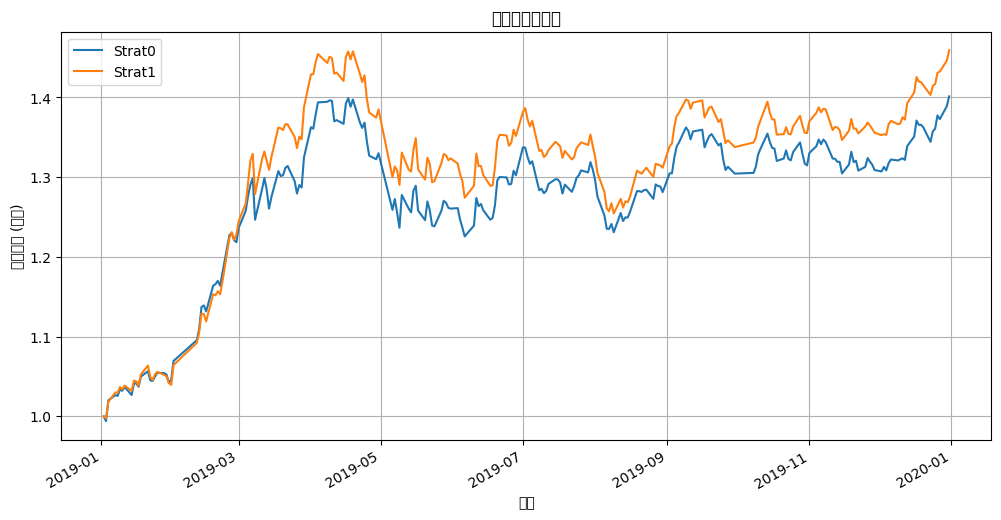

年度       收益率     日均收益率     年化收益率    最大回撤(%)      夏普比率
0  2019  0.377986  0.001549  0.477541 -13.953565  2.109758

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 strat0, strat1 已经从 backtest 结果里拿到
strat0 = result0[0]
strat1 = result1[0]

# 计算两条策略的日收益率序列
ret0 = pd.Series(strat0.analyzers._TimeReturn.get_analysis())
ret1 = pd.Series(strat1.analyzers._TimeReturn.get_analysis())

# 计算累计收益
cumret0 = (ret0 + 1).cumprod()
cumret1 = (ret1 + 1).cumprod()

# 在同一张图中绘制
plt.figure(figsize=(12, 6))
cumret0.plot(label='Strat0')
cumret1.plot(label='Strat1')
plt.title('累计收益率对比')
plt.xlabel('日期')
plt.ylabel('累计收益 (倍数)')
plt.legend()
plt.grid(True)
plt.show()

ret0 = [{
        '年度': year,
        '收益率': strat0.analyzers._Returns.get_analysis()['rtot'],
        '日均收益率': strat0.analyzers._Returns.get_analysis()['ravg'],
        '年化收益率': strat0.analyzers._Returns.get_analysis()['rnorm'],
        '最大回撤(%)': strat0.analyzers._DrawDown.get_analysis()['max']['drawdown']
        * (-1),
        '夏普比率': strat0.analyzers._SharpeRatio.get_analysis()['sharperatio'],
    }]
pd.DataFrame(ret0).sort_values(by='年化收益率', ascending=False)
ret1 = [{
        '年度': year,
        '收益率': strat1.analyzers._Returns.get_analysis()['rtot'],
        '日均收益率': strat1.analyzers._Returns.get_analysis()['ravg'],
        '年化收益率': strat1.analyzers._Returns.get_analysis()['rnorm'],
        '最大回撤(%)': strat1.analyzers._DrawDown.get_analysis()['max']['drawdown']
        * (-1),
        '夏普比率': strat1.analyzers._SharpeRatio.get_analysis()['sharperatio'],
    }]
pd.DataFrame(ret1).sort_values(by='年化收益率', ascending=False)
